# Multi Layer Percepteron for Noise Suppression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
Fs=48000
f=1000
no_of_samples=200000

t=np.arange(0,(no_of_samples)/Fs,1/Fs )


In [3]:
a=np.sin(2*np.pi*f*t)
#a=np.random.normal(0,1,np.shape(t))
noise=np.random.normal(0,1,np.shape(t))
a_noisy=a+noise
from sklearn.preprocessing import StandardScaler
a_noisy=StandardScaler().fit_transform(a_noisy.reshape(-1,1)).ravel()
sig_noi =np.c_[a,a_noisy]
signal_name=["clean_signal","noise added signal "]


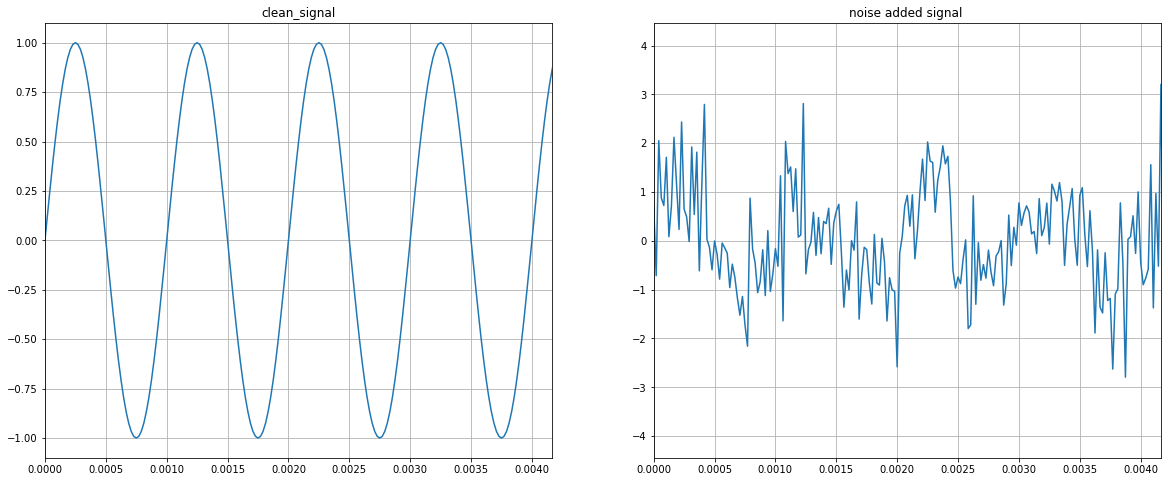

In [4]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
for idx,ax in enumerate (axs.ravel()):
    ax.plot(t,sig_noi[:,idx])
    ax.set_title(f"{signal_name[idx]}")
    ax.set_xlim(0,200/Fs)
    ax.grid(True)

# Multi Layer Perceptron Implementation

We will be using same clean signal and noisy signal for designing Multi Layer Perceptron
A MLP is a class of feedforward Artificial Neural Network(ANN).

In [8]:
noise=torch.from_numpy(noise)
a_noisy=torch.from_numpy(a_noisy)
a=torch.from_numpy(a).view(-1,1)
#noise.unsqueeze()


In [9]:
noise=noise.view(-1,1)
a_noisy=a_noisy.view(-1,1)
noise.shape

torch.Size([200001, 1])

In [10]:
#noise =noise.view(-1,1)

In [11]:
a_noisy.shape

torch.Size([200001, 1])

In [12]:
trainloader=torch.utils.data.DataLoader(tuple(zip(noise,a_noisy)),batch_size=32,shuffle=True)

In [13]:
# data,target=iter(trainloader).next()
# print(target)

In [14]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class MLP(nn.Module):
    def __init__(self,n_inputs):
        super(MLP,self).__init__()
        
        self.layer1=nn.Linear(n_inputs,10)
        self.layer2=nn.Linear(10,11)
        self.layer3=nn.Linear(11,1)
    
    def forward(self,x):
        x=torch.tanh(self.layer1(x))
        x=torch.tanh(self.layer2(x))
        return torch.tanh(self.layer3(x))
        
        

In [16]:
model=MLP(n_inputs=1).double() # single precision floating to double precision
device = torch.device("cpu")

In [17]:
model.to(device)

MLP(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=11, bias=True)
  (layer3): Linear(in_features=11, out_features=1, bias=True)
)

In [18]:
criterion=torch.nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
epochs=30
loss_list= []

In [19]:

for i in range(epochs):
    model.train()
    print("----------------------------------")
    print(f"this is the {i} epoch")
    print("----------------------------------")
    for i,(X,y) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs=model(X.double())
        loss=criterion(outputs,y)
        #print(outputs.shape)
        print(f" batch{i}---------{loss}")
        loss_list.append(loss.item())
        loss.backward() 
        optimizer.step()
        
              

        
    

----------------------------------
this is the 0 epoch
----------------------------------
 batch0---------0.7504144412696475
 batch1---------0.9125063101051591
 batch2---------1.420250138358582
 batch3---------0.934484366241138
 batch4---------0.7556981371781322
 batch5---------0.7285652079453968
 batch6---------0.903847971922374
 batch7---------1.533990195152988
 batch8---------1.1104337003240898
 batch9---------0.48098638196674337
 batch10---------1.6185804223238023
 batch11---------0.4530923022589147
 batch12---------0.7452192926390231
 batch13---------0.8026081251164691
 batch14---------0.43191742188599064
 batch15---------0.8387482787969046
 batch16---------1.1931199497093914
 batch17---------0.6928608491294767
 batch18---------1.1060307302484218
 batch19---------0.7461397779070138
 batch20---------1.0286475047420176
 batch21---------1.2199759028269204
 batch22---------1.4278689494876398
 batch23---------0.8255348677654897
 batch24---------0.6088274680253358
 batch25---------0.783

 batch238---------0.7518932759852675
 batch239---------0.7978854320891928
 batch240---------0.5785046449243654
 batch241---------0.5762010352989815
 batch242---------0.8043279653321062
 batch243---------0.7472260584347553
 batch244---------0.6809096628035998
 batch245---------0.5780327981828651
 batch246---------0.4752189940084352
 batch247---------0.7679381019497192
 batch248---------0.8111902098823981
 batch249---------0.6811026137659324
 batch250---------0.9484646012955138
 batch251---------0.6544145347982666
 batch252---------0.601907874381355
 batch253---------0.9030324196569226
 batch254---------0.5899771489020662
 batch255---------0.905369880254514
 batch256---------0.5852976487108472
 batch257---------0.6832909380858838
 batch258---------0.5975111368409269
 batch259---------0.6364268062101841
 batch260---------0.6323266322119782
 batch261---------0.8337343588260581
 batch262---------0.5451108818488357
 batch263---------0.6153857993047008
 batch264---------0.7355003777881123
 ba

 batch553---------0.42807166053026846
 batch554---------0.6023478238151472
 batch555---------0.487248070151092
 batch556---------0.39996389584098013
 batch557---------0.3891344974716795
 batch558---------0.5965838045928356
 batch559---------0.8611279130235387
 batch560---------0.5977520980848556
 batch561---------0.6427105428569979
 batch562---------0.552884759116878
 batch563---------0.336321669117439
 batch564---------0.6390286969319383
 batch565---------0.623360704191968
 batch566---------0.4125950074722623
 batch567---------0.7539921311151103
 batch568---------0.3091021167043494
 batch569---------0.5672578865107551
 batch570---------0.6871098214954939
 batch571---------0.5035595428292747
 batch572---------0.5479887494860225
 batch573---------0.5105668383841069
 batch574---------0.8308260576097197
 batch575---------0.4336867654463439
 batch576---------0.6079923662701571
 batch577---------0.7096456395793294
 batch578---------0.5148712342238582
 batch579---------0.41860731709299864
 b

 batch871---------0.4051932225551592
 batch872---------0.5145926552135118
 batch873---------0.43962245300469577
 batch874---------0.4935768790555504
 batch875---------0.5020124159464907
 batch876---------0.5047237564361648
 batch877---------0.48228546964315755
 batch878---------0.5319862909645235
 batch879---------0.6098128186652838
 batch880---------0.49220941173482846
 batch881---------0.37516263351851165
 batch882---------0.4436723219398758
 batch883---------0.36146116446216797
 batch884---------0.4705157584053978
 batch885---------0.4006278174200026
 batch886---------0.33574631014993384
 batch887---------0.4874831418728101
 batch888---------0.5271172749879428
 batch889---------0.41330411242895226
 batch890---------0.46679062560014023
 batch891---------0.504719976812207
 batch892---------0.41437106987753497
 batch893---------0.3777494868801067
 batch894---------0.5018875588571331
 batch895---------0.5019225588609962
 batch896---------0.4504458664615326
 batch897---------0.6597515927

 batch1365---------0.5100248347259904
 batch1366---------0.3069600055210396
 batch1367---------0.3933679315519514
 batch1368---------0.3157198293667708
 batch1369---------0.34720019940109803
 batch1370---------0.7758242291321771
 batch1371---------0.32093679384865187
 batch1372---------0.2759828705518075
 batch1373---------0.5289017894697204
 batch1374---------0.5298442951209048
 batch1375---------0.888649993705389
 batch1376---------0.5623398260447408
 batch1377---------0.4748789880114138
 batch1378---------0.3524552799361582
 batch1379---------0.41166116522958884
 batch1380---------0.4248248233731994
 batch1381---------0.5155802091544903
 batch1382---------0.38629718569266996
 batch1383---------0.38759790720555365
 batch1384---------0.5588456289523627
 batch1385---------0.37058121437109987
 batch1386---------0.40275005198289304
 batch1387---------0.3790850570746025
 batch1388---------0.3743852840312622
 batch1389---------0.4121495184657914
 batch1390---------0.5524758354861607
 batch

 batch1660---------0.6726938034181539
 batch1661---------0.7433179064521499
 batch1662---------0.39759157342020623
 batch1663---------0.3495821272817988
 batch1664---------0.429034962256208
 batch1665---------0.4177586181037838
 batch1666---------0.5241008067655717
 batch1667---------0.29051448102805283
 batch1668---------0.5710841705196171
 batch1669---------0.3928367149522106
 batch1670---------0.33345692004431104
 batch1671---------0.36479799946171276
 batch1672---------0.4639136644916883
 batch1673---------0.6031742195793481
 batch1674---------0.4555460836404218
 batch1675---------0.26328451844245004
 batch1676---------0.30666892529673473
 batch1677---------0.46101905890744943
 batch1678---------0.2752199379686985
 batch1679---------0.3758551374830673
 batch1680---------0.3353715072425504
 batch1681---------0.2822723626384608
 batch1682---------0.49233101889533054
 batch1683---------0.5350179543091766
 batch1684---------0.3734647881148911
 batch1685---------0.6116132856915328
 batc

 batch1972---------0.46468315116222214
 batch1973---------0.4268093340465602
 batch1974---------0.5077145683507029
 batch1975---------0.2860862442755039
 batch1976---------0.4979266843008651
 batch1977---------0.38269931001377566
 batch1978---------0.4427192639534168
 batch1979---------0.60490392249187
 batch1980---------0.4725907878429165
 batch1981---------0.3762437870563838
 batch1982---------0.3051999125763755
 batch1983---------0.3592172989029231
 batch1984---------0.2818799206832985
 batch1985---------0.31849218919510025
 batch1986---------0.30455222379154323
 batch1987---------0.509680083172509
 batch1988---------0.45981498167463986
 batch1989---------0.4512885417095599
 batch1990---------0.3383934464997409
 batch1991---------0.36997755985348363
 batch1992---------0.4402076598212892
 batch1993---------0.3875662143388261
 batch1994---------0.39792089244351025
 batch1995---------0.30343124917296205
 batch1996---------0.4210144966668082
 batch1997---------0.5247705788787073
 batch1

 batch2279---------0.44922694946993885
 batch2280---------0.4789470469798854
 batch2281---------0.5722764370007614
 batch2282---------0.40641748081965956
 batch2283---------0.4040043304659685
 batch2284---------0.3569732811593717
 batch2285---------0.47600736131511207
 batch2286---------0.4638064473643507
 batch2287---------0.38441830647282316
 batch2288---------0.3335159131187981
 batch2289---------0.2989268883215275
 batch2290---------0.45915005175683066
 batch2291---------0.38873835618919306
 batch2292---------0.3924329430713318
 batch2293---------0.4451373907262217
 batch2294---------0.30461040678368195
 batch2295---------0.4812680033474055
 batch2296---------0.3596804040377528
 batch2297---------0.39718880289864256
 batch2298---------0.37568546261549196
 batch2299---------0.40923913247341936
 batch2300---------0.34213006538640267
 batch2301---------0.4520494432325945
 batch2302---------0.44070006895987424
 batch2303---------0.3943029707471608
 batch2304---------0.6013018192652755


 batch2592---------0.4288046861639844
 batch2593---------0.28178227030466607
 batch2594---------0.3677359781921857
 batch2595---------0.4025246338400807
 batch2596---------0.4260378980549848
 batch2597---------0.4816077229378951
 batch2598---------0.42121950623730836
 batch2599---------0.36510094082916045
 batch2600---------0.39340109105396
 batch2601---------0.3424353867902436
 batch2602---------0.4443777545108529
 batch2603---------0.3373338440057911
 batch2604---------0.5353984611180039
 batch2605---------0.5326311955281554
 batch2606---------0.4727331967421642
 batch2607---------0.41017803556433
 batch2608---------0.5296437285063482
 batch2609---------0.5076159455845486
 batch2610---------0.46776195458693687
 batch2611---------0.3303913409271948
 batch2612---------0.3343406378086474
 batch2613---------0.41752891125401154
 batch2614---------0.3468690138643761
 batch2615---------0.2860230042398728
 batch2616---------0.31555371201045324
 batch2617---------0.35379862076958535
 batch261

 batch2904---------0.3751249588203869
 batch2905---------0.33687325924705114
 batch2906---------0.3050979059183054
 batch2907---------0.40268000896105527
 batch2908---------0.5172506396970111
 batch2909---------0.44809413835168366
 batch2910---------0.4615705900118776
 batch2911---------0.44694560659753835
 batch2912---------0.407427992737692
 batch2913---------0.3903211196650438
 batch2914---------0.42539971045889796
 batch2915---------0.49902483073957987
 batch2916---------0.38296733212848355
 batch2917---------0.3360613078663975
 batch2918---------0.4599182695725332
 batch2919---------0.41055508023667664
 batch2920---------0.5384412317614622
 batch2921---------0.409563633782975
 batch2922---------0.4327619877842426
 batch2923---------0.47569508116166803
 batch2924---------0.29761986026069986
 batch2925---------0.37338054371505136
 batch2926---------0.412028313943185
 batch2927---------0.39989907896469135
 batch2928---------0.5962273343168601
 batch2929---------0.3308907268873499
 ba

 batch3209---------0.455616039583508
 batch3210---------0.4212049086434835
 batch3211---------0.4897569078974805
 batch3212---------0.44061732654489055
 batch3213---------0.5544839643475538
 batch3214---------0.34286488357499767
 batch3215---------0.35016386336555916
 batch3216---------0.3539534568268293
 batch3217---------0.45610040992070744
 batch3218---------0.3704794938600982
 batch3219---------0.33541826576348466
 batch3220---------0.35886493714135237
 batch3221---------0.36022645855746827
 batch3222---------0.4262534348059554
 batch3223---------0.5327200182964069
 batch3224---------0.5407715528118802
 batch3225---------0.42006379532927884
 batch3226---------0.36580339096983766
 batch3227---------0.49599455201488796
 batch3228---------0.4594252412527649
 batch3229---------0.44669137416896604
 batch3230---------0.38568573901101694
 batch3231---------0.3987668812219395
 batch3232---------0.33342568464785505
 batch3233---------0.4581020497564752
 batch3234---------0.2986935561699725


 batch3525---------0.298261048161359
 batch3526---------0.39097716016529227
 batch3527---------0.3527017577378788
 batch3528---------0.4986689066752861
 batch3529---------0.33219617198955265
 batch3530---------0.5504123924560502
 batch3531---------0.3216338822812496
 batch3532---------0.5307403001382373
 batch3533---------0.666442363443492
 batch3534---------0.46576209142621383
 batch3535---------0.3858277768298425
 batch3536---------0.3438600686189045
 batch3537---------0.34583152985896426
 batch3538---------0.3844638132638984
 batch3539---------0.3936044429537675
 batch3540---------0.38451999843882695
 batch3541---------0.2965121049480702
 batch3542---------0.3894951606146827
 batch3543---------0.5232613695875546
 batch3544---------0.41501770088109696
 batch3545---------0.4080440623874437
 batch3546---------0.47281710359653284
 batch3547---------0.35134701849101246
 batch3548---------0.28255870787374987
 batch3549---------0.3471029751436186
 batch3550---------0.3210010211427269
 batc

 batch3844---------0.32072179153129343
 batch3845---------0.34304191552585683
 batch3846---------0.43281853254519503
 batch3847---------0.3146901026964525
 batch3848---------0.4776832272928109
 batch3849---------0.5029359435882653
 batch3850---------0.42999644297431183
 batch3851---------0.4942617089741025
 batch3852---------0.4620527516165762
 batch3853---------0.2643915631542305
 batch3854---------0.5118729478586641
 batch3855---------0.5648833476381734
 batch3856---------0.6318307545569588
 batch3857---------0.3870679654084227
 batch3858---------0.3996859109811572
 batch3859---------0.5129215150830414
 batch3860---------0.5383626853814207
 batch3861---------0.5539737045263669
 batch3862---------0.5872533749775114
 batch3863---------0.3856525081268525
 batch3864---------0.5521476122095337
 batch3865---------0.4087388817488975
 batch3866---------0.3348295904494319
 batch3867---------0.6050907371705361
 batch3868---------0.3650575915309069
 batch3869---------0.287397202914178
 batch387

 batch4160---------0.35568362852253643
 batch4161---------0.37135266425843094
 batch4162---------0.409198269329894
 batch4163---------0.41688636057583583
 batch4164---------0.4961326487143405
 batch4165---------0.45827544267108766
 batch4166---------0.3397340179223666
 batch4167---------0.5641039942059877
 batch4168---------0.6571890035086387
 batch4169---------0.5566018753056666
 batch4170---------0.40873915608236155
 batch4171---------0.2702707527582849
 batch4172---------0.4340566588640485
 batch4173---------0.3742102329290736
 batch4174---------0.44983822357171027
 batch4175---------0.40247212117599807
 batch4176---------0.35513084569886594
 batch4177---------0.42368261982761307
 batch4178---------0.4108625051524661
 batch4179---------0.3966766044819478
 batch4180---------0.39351581428738525
 batch4181---------0.45234993176778
 batch4182---------0.29522973465019303
 batch4183---------0.4642383974249753
 batch4184---------0.4971664094135259
 batch4185---------0.4096952022922157
 bat

 batch4471---------0.34423904919556
 batch4472---------0.37096335180587175
 batch4473---------0.4155118800024997
 batch4474---------0.4396766282105381
 batch4475---------0.4885824661193846
 batch4476---------0.36476343065596273
 batch4477---------0.387316301011685
 batch4478---------0.560586975930534
 batch4479---------0.3557364543029151
 batch4480---------0.417457481255834
 batch4481---------0.37821725351668867
 batch4482---------0.41561488348303705
 batch4483---------0.39705104275424996
 batch4484---------0.36028075215736305
 batch4485---------0.4654388358931155
 batch4486---------0.5433390412448197
 batch4487---------0.350789729769176
 batch4488---------0.38122141159705747
 batch4489---------0.4705142089027226
 batch4490---------0.4184669766381992
 batch4491---------0.3570864863660925
 batch4492---------0.3804075904026305
 batch4493---------0.3939474999672762
 batch4494---------0.45912447038262383
 batch4495---------0.295266937059799
 batch4496---------0.31204086974766065
 batch4497

 batch4767---------0.32085090347201056
 batch4768---------0.30760998057296685
 batch4769---------0.5219865042807491
 batch4770---------0.2745433110316765
 batch4771---------0.4077313349699502
 batch4772---------0.37994782400303184
 batch4773---------0.34872963511956123
 batch4774---------0.41262722174264865
 batch4775---------0.3843827712800926
 batch4776---------0.3025110001525877
 batch4777---------0.3395273399100602
 batch4778---------0.36951134055741736
 batch4779---------0.3403602612673605
 batch4780---------0.3462507223081436
 batch4781---------0.5476896051293466
 batch4782---------0.6211150996796992
 batch4783---------0.3721731916201034
 batch4784---------0.2907639279443728
 batch4785---------0.5171593581784508
 batch4786---------0.2671231534477471
 batch4787---------0.45443779347679547
 batch4788---------0.3623843528808771
 batch4789---------0.26462970708214345
 batch4790---------0.31715787056344596
 batch4791---------0.56692375074225
 batch4792---------0.41580109609481947
 bat

 batch5068---------0.26505739574548254
 batch5069---------0.33651407604581274
 batch5070---------0.41309516414749464
 batch5071---------0.3552707575973036
 batch5072---------0.21906128939540512
 batch5073---------0.31572061832832965
 batch5074---------0.25060348780460734
 batch5075---------0.3017011201365688
 batch5076---------0.5384169991842739
 batch5077---------0.3670116386291408
 batch5078---------0.45406215391415417
 batch5079---------0.36657677679814665
 batch5080---------0.36008965274942867
 batch5081---------0.40596024012680665
 batch5082---------0.4974415320008056
 batch5083---------0.3821161607329873
 batch5084---------0.3845072489278722
 batch5085---------0.48864132449935094
 batch5086---------0.45239720546370815
 batch5087---------0.47735808165099003
 batch5088---------0.38691089114222343
 batch5089---------0.5024671685720906
 batch5090---------0.37807696855293066
 batch5091---------0.5620103374342306
 batch5092---------0.4350722108368609
 batch5093---------0.37935061314085

 batch5350---------0.5398030577061287
 batch5351---------0.45966703900563266
 batch5352---------0.40695576718620974
 batch5353---------0.46952932628059874
 batch5354---------0.3729919440095003
 batch5355---------0.41142876368786707
 batch5356---------0.3175227832506127
 batch5357---------0.3406841508985393
 batch5358---------0.31011696177103376
 batch5359---------0.38388172594770786
 batch5360---------0.2697777188992789
 batch5361---------0.4906288088672725
 batch5362---------0.38306891968154083
 batch5363---------0.33450863142679715
 batch5364---------0.4703884279279772
 batch5365---------0.3109418118960843
 batch5366---------0.29441194690426964
 batch5367---------0.3799382934924649
 batch5368---------0.38072515885450875
 batch5369---------0.36156965760223614
 batch5370---------0.3985139967365933
 batch5371---------0.37818363447619857
 batch5372---------0.6443655082731282
 batch5373---------0.2975211365426145
 batch5374---------0.3552444578237204
 batch5375---------0.5349012272363798


 batch5630---------0.354083264695423
 batch5631---------0.32945206839089447
 batch5632---------0.5252758771420326
 batch5633---------0.4434562223535915
 batch5634---------0.37316712418029085
 batch5635---------0.4935331983656214
 batch5636---------0.4190956144522433
 batch5637---------0.39503676821464345
 batch5638---------0.3634475258780866
 batch5639---------0.33739057188110866
 batch5640---------0.28062836547870096
 batch5641---------0.4431971665694004
 batch5642---------0.38377877332573646
 batch5643---------0.4924117075365061
 batch5644---------0.33216196867104597
 batch5645---------0.3974148534941863
 batch5646---------0.3044793340308958
 batch5647---------0.26221645465368215
 batch5648---------0.3423710654673164
 batch5649---------0.22546389583402593
 batch5650---------0.4459534861632598
 batch5651---------0.4349215614895194
 batch5652---------0.37503670680671536
 batch5653---------0.359889371402793
 batch5654---------0.3773697010326863
 batch5655---------0.4160608770821692
 bat

 batch5892---------0.41737081407534227
 batch5893---------0.37751300121291703
 batch5894---------0.5478199919399385
 batch5895---------0.3132335971758896
 batch5896---------0.34501382076680015
 batch5897---------0.358023565138705
 batch5898---------0.2830263312340522
 batch5899---------0.3226831468903414
 batch5900---------0.3520196603635798
 batch5901---------0.3263340843748682
 batch5902---------0.41963291827295957
 batch5903---------0.26823910195084516
 batch5904---------0.37598581835210976
 batch5905---------0.5498302355695748
 batch5906---------0.38724285331786734
 batch5907---------0.35609270270785176
 batch5908---------0.4785375870107126
 batch5909---------0.49958668012001206
 batch5910---------0.4047660791222074
 batch5911---------0.49502391113747934
 batch5912---------0.40170751897183443
 batch5913---------0.42342705155192484
 batch5914---------0.3650059033855361
 batch5915---------0.594169143669653
 batch5916---------0.43567930208498296
 batch5917---------0.5247595101942535
 

 batch6170---------0.38104710945727205
 batch6171---------0.366872201804163
 batch6172---------0.28015152964869483
 batch6173---------0.4501896358247307
 batch6174---------0.42618912571746853
 batch6175---------0.3813061702733423
 batch6176---------0.5694302451189847
 batch6177---------0.4058181662253992
 batch6178---------0.34093395112882013
 batch6179---------0.46328872986508074
 batch6180---------0.3335254006935865
 batch6181---------0.31043226243722555
 batch6182---------0.571948392602594
 batch6183---------0.3973405401360809
 batch6184---------0.3674937464449776
 batch6185---------0.4057809076066662
 batch6186---------0.3630755912424677
 batch6187---------0.3734808609939994
 batch6188---------0.2816462280086047
 batch6189---------0.3712806886886807
 batch6190---------0.3529166314120351
 batch6191---------0.36745729920338255
 batch6192---------0.49722612668235433
 batch6193---------0.33884397286118856
 batch6194---------0.5241347299813885
 batch6195---------0.47337468803671123
 bat

 batch195---------0.4484547361528107
 batch196---------0.4109319338125118
 batch197---------0.3302003314579083
 batch198---------0.48976747231818263
 batch199---------0.4018422560603165
 batch200---------0.3985237771687712
 batch201---------0.35487400398155505
 batch202---------0.5921939036330159
 batch203---------0.6337353359952195
 batch204---------0.4212738759955059
 batch205---------0.47903530027293034
 batch206---------0.40684233632928224
 batch207---------0.20195513679524024
 batch208---------0.4984376750705348
 batch209---------0.428656839897998
 batch210---------0.4892676587987938
 batch211---------0.42333844142231725
 batch212---------0.40477275219058395
 batch213---------0.546972699331287
 batch214---------0.3158302655973169
 batch215---------0.3552982684705049
 batch216---------0.30898951372332817
 batch217---------0.3803790150930301
 batch218---------0.4811218387145106
 batch219---------0.47902224200171056
 batch220---------0.41108902304522266
 batch221---------0.4043914286

 batch448---------0.4960937904341427
 batch449---------0.5803222930747785
 batch450---------0.5735667239181907
 batch451---------0.45106989942763714
 batch452---------0.4199693390202193
 batch453---------0.34354598371026124
 batch454---------0.48583910659726437
 batch455---------0.34887567600177233
 batch456---------0.49425318376464966
 batch457---------0.38227220945354057
 batch458---------0.5400579054542287
 batch459---------0.3235294082839957
 batch460---------0.4207528815385516
 batch461---------0.34150634311603556
 batch462---------0.368935784605809
 batch463---------0.39289924423186706
 batch464---------0.4460079623415696
 batch465---------0.4861789141358921
 batch466---------0.5270555643557178
 batch467---------0.40247131021374116
 batch468---------0.3381958477496716
 batch469---------0.41807207178564815
 batch470---------0.44220483087145235
 batch471---------0.3766636533317873
 batch472---------0.4866555455890017
 batch473---------0.26998937467730166
 batch474---------0.4475116

 batch868---------0.47161558754895344
 batch869---------0.28646292351097546
 batch870---------0.39018626646383514
 batch871---------0.31815041615746537
 batch872---------0.5059238715665814
 batch873---------0.3215337901229145
 batch874---------0.44849046206835397
 batch875---------0.5642283959838879
 batch876---------0.44936809939587985
 batch877---------0.5049840860663836
 batch878---------0.35072997421314084
 batch879---------0.4657551423815792
 batch880---------0.31018416416192884
 batch881---------0.30964905964894973
 batch882---------0.5175789660004487
 batch883---------0.3739615525520622
 batch884---------0.3126547068982819
 batch885---------0.3668279002473529
 batch886---------0.3265132591357094
 batch887---------0.4869710829780406
 batch888---------0.5854254136651453
 batch889---------0.41319075512664966
 batch890---------0.42366039179641307
 batch891---------0.30246018187679474
 batch892---------0.327086691165103
 batch893---------0.5446276839931355
 batch894---------0.3171166

 batch1209---------0.3810195557846766
 batch1210---------0.3699619040334996
 batch1211---------0.3611084891023253
 batch1212---------0.45664913332932855
 batch1213---------0.4457313215905596
 batch1214---------0.48033790116590475
 batch1215---------0.42074577467365637
 batch1216---------0.5376008311256307
 batch1217---------0.30389640182886374
 batch1218---------0.30479423656453275
 batch1219---------0.3803303502790164
 batch1220---------0.27401630251069753
 batch1221---------0.4704854109923259
 batch1222---------0.5238404698744082
 batch1223---------0.5549833048337242
 batch1224---------0.4001848214049904
 batch1225---------0.3737947690594574
 batch1226---------0.3337733706154876
 batch1227---------0.32661626455440307
 batch1228---------0.5668745124392012
 batch1229---------0.3853035927325816
 batch1230---------0.42420909995106987
 batch1231---------0.3685879488999305
 batch1232---------0.4040281963372605
 batch1233---------0.38245847508120456
 batch1234---------0.461808423298127
 bat

 batch1577---------0.3306896361365441
 batch1578---------0.5578951546057824
 batch1579---------0.4849285218572007
 batch1580---------0.44649029705661963
 batch1581---------0.3959515278089157
 batch1582---------0.3718251121909474
 batch1583---------0.3827595094599884
 batch1584---------0.4064946545692023
 batch1585---------0.3996738090637121
 batch1586---------0.4312924084615153
 batch1587---------0.2762550624002784
 batch1588---------0.30114431324716573
 batch1589---------0.39151430389399583
 batch1590---------0.576252216163579
 batch1591---------0.3904414576112411
 batch1592---------0.45485404067907753
 batch1593---------0.44751241524690855
 batch1594---------0.5695375117969167
 batch1595---------0.46229971346003806
 batch1596---------0.3381199018954938
 batch1597---------0.4249489426824977
 batch1598---------0.540512753241537
 batch1599---------0.5216699256021387
 batch1600---------0.384953013584454
 batch1601---------0.4320140023875377
 batch1602---------0.42568550832441865
 batch16

 batch1798---------0.5171535177985396
 batch1799---------0.3856390629498725
 batch1800---------0.38674681261318855
 batch1801---------0.41773378193615945
 batch1802---------0.4793813505093989
 batch1803---------0.4503351437336167
 batch1804---------0.6293413936871166
 batch1805---------0.27067564964499974
 batch1806---------0.3461438465815221
 batch1807---------0.3074026674395971
 batch1808---------0.26558403343090353
 batch1809---------0.33040951630704046
 batch1810---------0.37811955918041706
 batch1811---------0.5319403412416572
 batch1812---------0.3982664447597729
 batch1813---------0.3899397559862866
 batch1814---------0.4573168975639363
 batch1815---------0.42755863777116876
 batch1816---------0.41440390127985816
 batch1817---------0.40634306880379456
 batch1818---------0.4656603081064346
 batch1819---------0.36676389724428143
 batch1820---------0.5889473510588253
 batch1821---------0.48097549673090906
 batch1822---------0.41033116438084094
 batch1823---------0.31110270577603055

 batch2109---------0.3409456782699768
 batch2110---------0.4285319298068917
 batch2111---------0.47053951710730274
 batch2112---------0.5456083266956591
 batch2113---------0.4374467233003574
 batch2114---------0.40981232950268887
 batch2115---------0.5882540601523093
 batch2116---------0.3840990257328799
 batch2117---------0.5979483499365836
 batch2118---------0.45214208521417376
 batch2119---------0.4731471767917811
 batch2120---------0.49448977087338136
 batch2121---------0.50103884556543
 batch2122---------0.4582055924130156
 batch2123---------0.36389363142000863
 batch2124---------0.3291642664271318
 batch2125---------0.49553549132212404
 batch2126---------0.4077054976608686
 batch2127---------0.336319007932948
 batch2128---------0.4011408876203975
 batch2129---------0.44009765155605757
 batch2130---------0.5278515003846052
 batch2131---------0.544059178788937
 batch2132---------0.3574305474553702
 batch2133---------0.34328915925143444
 batch2134---------0.5114878173379781
 batch21

 batch2430---------0.45514713633652115
 batch2431---------0.3397177926759764
 batch2432---------0.42432665122997537
 batch2433---------0.48181851520942004
 batch2434---------0.5531696858620436
 batch2435---------0.3997179902105976
 batch2436---------0.45567421427271393
 batch2437---------0.3285580366185727
 batch2438---------0.5211749246237456
 batch2439---------0.3698080074521036
 batch2440---------0.35563940069280797
 batch2441---------0.42477712663862754
 batch2442---------0.41047185062307834
 batch2443---------0.6239791764656375
 batch2444---------0.47059257004862043
 batch2445---------0.564754428736347
 batch2446---------0.521062368639271
 batch2447---------0.3052692270393176
 batch2448---------0.38245454206899265
 batch2449---------0.5631145508023034
 batch2450---------0.4641545537835507
 batch2451---------0.4819150519272649
 batch2452---------0.31851784791326765
 batch2453---------0.4723139375570319
 batch2454---------0.3387256685026624
 batch2455---------0.42780125279540215
 ba

 batch2749---------0.46004362601336957
 batch2750---------0.28864029443585654
 batch2751---------0.40723296040296003
 batch2752---------0.3684868989543497
 batch2753---------0.37524632711057604
 batch2754---------0.3195582106707017
 batch2755---------0.3475328043612099
 batch2756---------0.36681389310517587
 batch2757---------0.39528141294302366
 batch2758---------0.3206738454818553
 batch2759---------0.27956687243305345
 batch2760---------0.42247515905451144
 batch2761---------0.34792086868602984
 batch2762---------0.3580927246039553
 batch2763---------0.3910317735061891
 batch2764---------0.48367784536193537
 batch2765---------0.39531219323622846
 batch2766---------0.32313074609094694
 batch2767---------0.49959233823454885
 batch2768---------0.40285981354239786
 batch2769---------0.3250443643206192
 batch2770---------0.5105195394120626
 batch2771---------0.5989380938220953
 batch2772---------0.4569884924404105
 batch2773---------0.3932730089621935
 batch2774---------0.367688377371551

 batch3072---------0.44929958295515504
 batch3073---------0.5458460445403729
 batch3074---------0.6244490730942247
 batch3075---------0.28879456961557065
 batch3076---------0.3071729266722839
 batch3077---------0.4682928307559682
 batch3078---------0.3964111822356103
 batch3079---------0.4670797120341102
 batch3080---------0.441696573507384
 batch3081---------0.36162293528968864
 batch3082---------0.5048919609587708
 batch3083---------0.43060671870005496
 batch3084---------0.2948506590807608
 batch3085---------0.42463214370743874
 batch3086---------0.35952667956975914
 batch3087---------0.2991924563370664
 batch3088---------0.3622135590440268
 batch3089---------0.3485367621879145
 batch3090---------0.3733019082038568
 batch3091---------0.5073617411183541
 batch3092---------0.550853369728383
 batch3093---------0.39454077475442617
 batch3094---------0.5501878703336973
 batch3095---------0.5364119600606972
 batch3096---------0.38620778260683075
 batch3097---------0.46889334046381936
 batc

 batch3385---------0.490083474779497
 batch3386---------0.4074605614469157
 batch3387---------0.44039887902934344
 batch3388---------0.3653407842734651
 batch3389---------0.5562215277199563
 batch3390---------0.3829961665287127
 batch3391---------0.4370646182543973
 batch3392---------0.554896532908696
 batch3393---------0.31951189789189743
 batch3394---------0.3679551169817684
 batch3395---------0.45772683958006694
 batch3396---------0.40644952155068387
 batch3397---------0.36619774414245865
 batch3398---------0.3693982998463383
 batch3399---------0.46954750049370536
 batch3400---------0.2926548962368206
 batch3401---------0.3543364190965393
 batch3402---------0.49317208064128865
 batch3403---------0.4424019635353793
 batch3404---------0.4067916609487634
 batch3405---------0.4301318408895191
 batch3406---------0.36447767839451983
 batch3407---------0.46248528484555246
 batch3408---------0.42275213467776906
 batch3409---------0.47229235592497537
 batch3410---------0.41980103715123507
 b

 batch3707---------0.3525513114264479
 batch3708---------0.3992193138548058
 batch3709---------0.27635380368506135
 batch3710---------0.3911535660083433
 batch3711---------0.36199149110385276
 batch3712---------0.37363325756570714
 batch3713---------0.3775731708857438
 batch3714---------0.3606541690265654
 batch3715---------0.39313650546946755
 batch3716---------0.40836438656089913
 batch3717---------0.48282072575739804
 batch3718---------0.35992001337216056
 batch3719---------0.2913113349638249
 batch3720---------0.4136476999294405
 batch3721---------0.41124214671994364
 batch3722---------0.48439116234236984
 batch3723---------0.5386359880901357
 batch3724---------0.3346785748078564
 batch3725---------0.31807265052549966
 batch3726---------0.35905382816111175
 batch3727---------0.3120913849228116
 batch3728---------0.5350945620781936
 batch3729---------0.4280491761166409
 batch3730---------0.3915920539954056
 batch3731---------0.35497977020380145
 batch3732---------0.2551143394186909


 batch3994---------0.4265339155757767
 batch3995---------0.35932652298175005
 batch3996---------0.400713519611499
 batch3997---------0.5265271175182353
 batch3998---------0.4291350024827355
 batch3999---------0.41342848378987007
 batch4000---------0.36766135355731955
 batch4001---------0.3364141985698038
 batch4002---------0.6625887798822464
 batch4003---------0.33461081904522183
 batch4004---------0.3230118657737854
 batch4005---------0.6391471718295252
 batch4006---------0.3401753857026063
 batch4007---------0.38313436842417486
 batch4008---------0.44515547122308463
 batch4009---------0.2237434884543803
 batch4010---------0.6085720979520389
 batch4011---------0.44765453771056607
 batch4012---------0.4422859271744812
 batch4013---------0.3430626212667025
 batch4014---------0.5701238204664549
 batch4015---------0.3760833222433409
 batch4016---------0.3730581339768533
 batch4017---------0.4413743576454054
 batch4018---------0.32897466156755417
 batch4019---------0.3701489199407232
 batc

 batch4298---------0.47019860035579625
 batch4299---------0.4310957057029742
 batch4300---------0.287636943008188
 batch4301---------0.42332515375866664
 batch4302---------0.49939645202841476
 batch4303---------0.35204455348870145
 batch4304---------0.45274973967357446
 batch4305---------0.49499674036301633
 batch4306---------0.4702618126869291
 batch4307---------0.4320700352037559
 batch4308---------0.37936505239355167
 batch4309---------0.4064708860032136
 batch4310---------0.42964982059831225
 batch4311---------0.42740405766976575
 batch4312---------0.5577127358306027
 batch4313---------0.4576504465957835
 batch4314---------0.5193672486286272
 batch4315---------0.5254043336266412
 batch4316---------0.3390041769008809
 batch4317---------0.5521047162272088
 batch4318---------0.2661376723141668
 batch4319---------0.44885448973054964
 batch4320---------0.35452953117646235
 batch4321---------0.4746101193249375
 batch4322---------0.4593282205406712
 batch4323---------0.36244685333193716
 

 batch4625---------0.397871838000015
 batch4626---------0.4230185655383787
 batch4627---------0.4203134366601561
 batch4628---------0.40604226659019416
 batch4629---------0.3734345870475671
 batch4630---------0.5834102680856652
 batch4631---------0.5900381957323165
 batch4632---------0.4421083650952999
 batch4633---------0.38547017365906283
 batch4634---------0.362068170800398
 batch4635---------0.46520976881235543
 batch4636---------0.5219264556974446
 batch4637---------0.35751778993987704
 batch4638---------0.4523080431160239
 batch4639---------0.5025561702619505
 batch4640---------0.3907879480572356
 batch4641---------0.3443167421348885
 batch4642---------0.4680530757649807
 batch4643---------0.4016433884770215
 batch4644---------0.3392564353011399
 batch4645---------0.5230356909382605
 batch4646---------0.47345909261418295
 batch4647---------0.4067174707689289
 batch4648---------0.2836761527378253
 batch4649---------0.4136565026461744
 batch4650---------0.437997492922429
 batch4651

 batch4919---------0.43821526108103365
 batch4920---------0.41686475509965
 batch4921---------0.3335501898301766
 batch4922---------0.41271826989558247
 batch4923---------0.2682892160736409
 batch4924---------0.41177643616731185
 batch4925---------0.2779065531644014
 batch4926---------0.48288102139897127
 batch4927---------0.4482019904421928
 batch4928---------0.28689097039331035
 batch4929---------0.3611853901313482
 batch4930---------0.623959351790002
 batch4931---------0.33380169838758705
 batch4932---------0.4490876666963401
 batch4933---------0.3042352362568576
 batch4934---------0.47373653492750417
 batch4935---------0.3481670943817356
 batch4936---------0.4175132463145883
 batch4937---------0.5668051433122812
 batch4938---------0.35081362486422063
 batch4939---------0.45267744531480125
 batch4940---------0.4007832614896208
 batch4941---------0.2970124897806178
 batch4942---------0.49615393934055074
 batch4943---------0.453053844015168
 batch4944---------0.5064901420800808
 batch

 batch5233---------0.46133711524722754
 batch5234---------0.47197751754352657
 batch5235---------0.40701993272191056
 batch5236---------0.46667983476456854
 batch5237---------0.27059096202720406
 batch5238---------0.40201256856201034
 batch5239---------0.45963533921371463
 batch5240---------0.5635415487559059
 batch5241---------0.5267622636784899
 batch5242---------0.43476779102739466
 batch5243---------0.42301875183584114
 batch5244---------0.3662606430735539
 batch5245---------0.40402555164069975
 batch5246---------0.5181677740483687
 batch5247---------0.3872466686136475
 batch5248---------0.4683123150776818
 batch5249---------0.27957514316431065
 batch5250---------0.3363420596417988
 batch5251---------0.38559953758858523
 batch5252---------0.39529770625590593
 batch5253---------0.4116376232771641
 batch5254---------0.3431742594766388
 batch5255---------0.37835592441461613
 batch5256---------0.4024984633871357
 batch5257---------0.30926400801080894
 batch5258---------0.29015230068881

 batch5547---------0.39125095233818985
 batch5548---------0.4839359427778362
 batch5549---------0.3277831435528926
 batch5550---------0.47592252045753036
 batch5551---------0.36644181563100975
 batch5552---------0.49903896975182604
 batch5553---------0.43361420624971536
 batch5554---------0.5166892213577587
 batch5555---------0.4173106779460129
 batch5556---------0.4657304000278414
 batch5557---------0.3677150654262236
 batch5558---------0.4333443042611361
 batch5559---------0.3726034928180032
 batch5560---------0.2551212137468515
 batch5561---------0.4003608637567275
 batch5562---------0.32094364428013594
 batch5563---------0.2756091706960061
 batch5564---------0.4265260657033307
 batch5565---------0.3707996258624311
 batch5566---------0.4254182859980015
 batch5567---------0.465217596851947
 batch5568---------0.6851408236282757
 batch5569---------0.3702755222393641
 batch5570---------0.42630245277633333
 batch5571---------0.5281151965185295
 batch5572---------0.32645235771315095
 batc

 batch5874---------0.419116586107061
 batch5875---------0.4879893218257307
 batch5876---------0.4547704024232776
 batch5877---------0.5453469629363207
 batch5878---------0.38276007027598763
 batch5879---------0.4424014439756921
 batch5880---------0.4353073705886052
 batch5881---------0.35864214909855197
 batch5882---------0.44023138451937605
 batch5883---------0.5341706225279446
 batch5884---------0.3006676748858834
 batch5885---------0.2948138572056358
 batch5886---------0.4781468995173584
 batch5887---------0.41744423411515996
 batch5888---------0.4415844235943406
 batch5889---------0.3752023102847573
 batch5890---------0.3733305580222954
 batch5891---------0.6796072721066335
 batch5892---------0.45780247482566555
 batch5893---------0.36595984919355884
 batch5894---------0.38492093647922176
 batch5895---------0.36220492927556136
 batch5896---------0.5366843566182614
 batch5897---------0.2674847120825621
 batch5898---------0.5173452755024038
 batch5899---------0.460471899545268
 batch

 batch6199---------0.3480615231431625
 batch6200---------0.3675527241052936
 batch6201---------0.3461413372840361
 batch6202---------0.3332775004465138
 batch6203---------0.5028942260218086
 batch6204---------0.33989981678885606
 batch6205---------0.4207567287655504
 batch6206---------0.27464601850569076
 batch6207---------0.4803088004695238
 batch6208---------0.39970671383277745
 batch6209---------0.44123577998280133
 batch6210---------0.5180326477870376
 batch6211---------0.39540284048425417
 batch6212---------0.3374948438234495
 batch6213---------0.5909750063059817
 batch6214---------0.42623560128505755
 batch6215---------0.46193551820573064
 batch6216---------0.6457995449707059
 batch6217---------0.41772360017374804
 batch6218---------0.4431650183281885
 batch6219---------0.3675714512120166
 batch6220---------0.42251315338877377
 batch6221---------0.33843756932215274
 batch6222---------0.4066383501861126
 batch6223---------0.3686889955333324
 batch6224---------0.4252295505359027
 b

 batch245---------0.4098606813030015
 batch246---------0.46730662830186803
 batch247---------0.3619742149073497
 batch248---------0.5489981051028447
 batch249---------0.4301980177704381
 batch250---------0.4142107386762897
 batch251---------0.4084490787314029
 batch252---------0.32470771732889747
 batch253---------0.3745149497898189
 batch254---------0.37662160865766636
 batch255---------0.30213179023492787
 batch256---------0.4479735436457705
 batch257---------0.459913170187359
 batch258---------0.4686948338565281
 batch259---------0.29359329053807914
 batch260---------0.3932808188790098
 batch261---------0.3651731355498713
 batch262---------0.34670532323309
 batch263---------0.7570065075520671
 batch264---------0.4552592492270392
 batch265---------0.44511287623732587
 batch266---------0.6114274481063902
 batch267---------0.4027689485659138
 batch268---------0.4622419097651863
 batch269---------0.30211579243419584
 batch270---------0.38363006941875594
 batch271---------0.2741481433648

 batch561---------0.49283174773905497
 batch562---------0.39466825092946295
 batch563---------0.3759337329060227
 batch564---------0.3220139045384223
 batch565---------0.3993292661412238
 batch566---------0.3163921633148959
 batch567---------0.4603316183958034
 batch568---------0.44802649749550394
 batch569---------0.4172903812242665
 batch570---------0.4235559101423496
 batch571---------0.4255933873914645
 batch572---------0.4386642669466415
 batch573---------0.439907774702921
 batch574---------0.36313304805889923
 batch575---------0.4974245374491091
 batch576---------0.5552786591035894
 batch577---------0.47341800298908265
 batch578---------0.3553932822136562
 batch579---------0.4178984391279763
 batch580---------0.2689656325956319
 batch581---------0.5008609517672432
 batch582---------0.38797756385264626
 batch583---------0.3779547676990095
 batch584---------0.27643384930266596
 batch585---------0.42539670123426565
 batch586---------0.2850765406708283
 batch587---------0.45896793697

 batch883---------0.4378123929439348
 batch884---------0.4961029488518429
 batch885---------0.4841467327233324
 batch886---------0.4130764442005552
 batch887---------0.5949534142319545
 batch888---------0.538732769589655
 batch889---------0.4164764202789719
 batch890---------0.29611630018408763
 batch891---------0.46343473693762466
 batch892---------0.3450714950262826
 batch893---------0.43146522203246973
 batch894---------0.4078268202821911
 batch895---------0.46286880719952805
 batch896---------0.41097518438013236
 batch897---------0.5785777638032339
 batch898---------0.4291099885125489
 batch899---------0.48165232673600167
 batch900---------0.45674346513302
 batch901---------0.42531284361662325
 batch902---------0.3840203650686942
 batch903---------0.3878522924120043
 batch904---------0.4571942291351889
 batch905---------0.4553031066291699
 batch906---------0.3806953563001435
 batch907---------0.45336318618363114
 batch908---------0.3899445302331861
 batch909---------0.4914987938414

 batch1201---------0.49562624398580396
 batch1202---------0.3504338731972981
 batch1203---------0.27683577335005644
 batch1204---------0.5348484820162167
 batch1205---------0.3345058366117174
 batch1206---------0.47526109910750763
 batch1207---------0.4370033922529516
 batch1208---------0.4544938733281566
 batch1209---------0.37825038226949725
 batch1210---------0.3147143734691225
 batch1211---------0.5101145075299026
 batch1212---------0.34881245393019433
 batch1213---------0.2960511767120634
 batch1214---------0.4291301498987085
 batch1215---------0.4389026212538516
 batch1216---------0.46490985685737585
 batch1217---------0.34390653936368243
 batch1218---------0.39836890201204106
 batch1219---------0.45527811082467085
 batch1220---------0.3439661056210823
 batch1221---------0.4362511081195155
 batch1222---------0.2607794070089585
 batch1223---------0.4199773063541946
 batch1224---------0.22764522582139438
 batch1225---------0.3890288831263958
 batch1226---------0.529338313113632
 ba

 batch1526---------0.5235656196960855
 batch1527---------0.2623433495615317
 batch1528---------0.37802206288592166
 batch1529---------0.40799452073763576
 batch1530---------0.5044910470848915
 batch1531---------0.439307189693638
 batch1532---------0.3506300600932747
 batch1533---------0.38916171769504226
 batch1534---------0.396991829009975
 batch1535---------0.4127960615701606
 batch1536---------0.40058756777686744
 batch1537---------0.37639244180268155
 batch1538---------0.4324508048665685
 batch1539---------0.3178762378032084
 batch1540---------0.3906423885601861
 batch1541---------0.5366804873645181
 batch1542---------0.5030334767805017
 batch1543---------0.44131891060483625
 batch1544---------0.47689448276194857
 batch1545---------0.39193090048180657
 batch1546---------0.558879235427738
 batch1547---------0.4295825061850203
 batch1548---------0.45371215751499894
 batch1549---------0.3919324401827544
 batch1550---------0.4631646653633766
 batch1551---------0.34917663783376
 batch15

 batch1828---------0.43825623772422917
 batch1829---------0.39092132014206077
 batch1830---------0.4033962309964868
 batch1831---------0.4730751730071651
 batch1832---------0.5429093291106651
 batch1833---------0.3832228071968905
 batch1834---------0.37439281272974384
 batch1835---------0.3835791260599082
 batch1836---------0.25626218963477165
 batch1837---------0.48618164066348063
 batch1838---------0.5880119976544882
 batch1839---------0.4651089909940891
 batch1840---------0.33293963193251785
 batch1841---------0.32480129503355337
 batch1842---------0.49244399803581135
 batch1843---------0.6505767362503369
 batch1844---------0.41556960773594787
 batch1845---------0.20948200033960435
 batch1846---------0.36737111830119323
 batch1847---------0.36629614691156126
 batch1848---------0.3629223823858759
 batch1849---------0.4638701752833045
 batch1850---------0.3624068665865239
 batch1851---------0.34388205201303795
 batch1852---------0.47527485605870007
 batch1853---------0.522949468025037

 batch2149---------0.35765071289636713
 batch2150---------0.49491680598462673
 batch2151---------0.3761615189052873
 batch2152---------0.5177823827087316
 batch2153---------0.47645537800324195
 batch2154---------0.5086752651420122
 batch2155---------0.3220452799900251
 batch2156---------0.4422661239412077
 batch2157---------0.3095105982344962
 batch2158---------0.2827894699192639
 batch2159---------0.3613916473978435
 batch2160---------0.36810426921407186
 batch2161---------0.4004068202153021
 batch2162---------0.44300858021034406
 batch2163---------0.3129580789204316
 batch2164---------0.5129904794350904
 batch2165---------0.4612796261066426
 batch2166---------0.39365612500154834
 batch2167---------0.3141116706897565
 batch2168---------0.5287644932581317
 batch2169---------0.5336085151013739
 batch2170---------0.36960370442203344
 batch2171---------0.49720945666038685
 batch2172---------0.3866868866592681
 batch2173---------0.43085642189850437
 batch2174---------0.37830956135367433
 b

 batch2470---------0.3086443604162846
 batch2471---------0.33701078810115626
 batch2472---------0.4016673531678697
 batch2473---------0.549319336220576
 batch2474---------0.4303120065818128
 batch2475---------0.394381934773132
 batch2476---------0.43248375864324473
 batch2477---------0.49648449359772256
 batch2478---------0.455559780050269
 batch2479---------0.4445303365884023
 batch2480---------0.2909419212896132
 batch2481---------0.44017185803398445
 batch2482---------0.3926466127867029
 batch2483---------0.41343577752408167
 batch2484---------0.4087973407939787
 batch2485---------0.4079505515762572
 batch2486---------0.541497819871303
 batch2487---------0.33933012580947564
 batch2488---------0.2901017133995176
 batch2489---------0.3686269092995227
 batch2490---------0.39552649188283673
 batch2491---------0.383699086258634
 batch2492---------0.3979966766722671
 batch2493---------0.39960316865675066
 batch2494---------0.3290430547988249
 batch2495---------0.5583305098944931
 batch249

 batch2783---------0.476041735509215
 batch2784---------0.5203299378362879
 batch2785---------0.41134476419222366
 batch2786---------0.3059278770606847
 batch2787---------0.49968733595616616
 batch2788---------0.42127252856149755
 batch2789---------0.4613645991832683
 batch2790---------0.2832245211215979
 batch2791---------0.46888742509860404
 batch2792---------0.3751153809499
 batch2793---------0.37641349667535806
 batch2794---------0.4684187801534532
 batch2795---------0.32797467608668
 batch2796---------0.42573150975216223
 batch2797---------0.3875486450665515
 batch2798---------0.4644400131415579
 batch2799---------0.5609727691241321
 batch2800---------0.4781611541749566
 batch2801---------0.3332801215494917
 batch2802---------0.33658879879543196
 batch2803---------0.3831560849847326
 batch2804---------0.5785986041324188
 batch2805---------0.4795763598757956
 batch2806---------0.27773912351438257
 batch2807---------0.35009400400569257
 batch2808---------0.3740582436900419
 batch280

 batch3105---------0.5130979761456292
 batch3106---------0.38246648616919965
 batch3107---------0.3595453340644854
 batch3108---------0.4188358568864185
 batch3109---------0.3714315732427833
 batch3110---------0.34265818050083546
 batch3111---------0.33367686791426643
 batch3112---------0.48585624921549636
 batch3113---------0.275012842218177
 batch3114---------0.40233910490463265
 batch3115---------0.520951215738927
 batch3116---------0.43945756875617287
 batch3117---------0.3471464348038418
 batch3118---------0.6593774019777076
 batch3119---------0.32573648033727187
 batch3120---------0.29939274083415873
 batch3121---------0.4194645834359116
 batch3122---------0.4498227534607872
 batch3123---------0.3924159479846902
 batch3124---------0.3308588573923881
 batch3125---------0.39872007954573796
 batch3126---------0.355872363979965
 batch3127---------0.34224423498644835
 batch3128---------0.38882507923836707
 batch3129---------0.4892659601004562
 batch3130---------0.26477799378254274
 ba

 batch3431---------0.5381643739711571
 batch3432---------0.487070238843303
 batch3433---------0.47072129418397346
 batch3434---------0.39175492780047066
 batch3435---------0.38511510541985117
 batch3436---------0.38871423642108227
 batch3437---------0.36939475647525905
 batch3438---------0.48300638885724423
 batch3439---------0.31945042016490943
 batch3440---------0.41856752064705804
 batch3441---------0.345361828488747
 batch3442---------0.47779281656179473
 batch3443---------0.4372678131087024
 batch3444---------0.39927360733139516
 batch3445---------0.48454375232086716
 batch3446---------0.3649777561175038
 batch3447---------0.44413049088563084
 batch3448---------0.32910856571127606
 batch3449---------0.4764492455905982
 batch3450---------0.4438223028396252
 batch3451---------0.4054327119265762
 batch3452---------0.3241828241684123
 batch3453---------0.4473977065642852
 batch3454---------0.3668598846128098
 batch3455---------0.3969750637121141
 batch3456---------0.4897174894165862
 

 batch3755---------0.33922306160776555
 batch3756---------0.2932726599708285
 batch3757---------0.2687624485046638
 batch3758---------0.43779715694246535
 batch3759---------0.2943595352667009
 batch3760---------0.3961447780533269
 batch3761---------0.3370813394042459
 batch3762---------0.45534661885176453
 batch3763---------0.5489264971157574
 batch3764---------0.4032397071859912
 batch3765---------0.41314486875096557
 batch3766---------0.4891482332820251
 batch3767---------0.48428172750765947
 batch3768---------0.3667341113493497
 batch3769---------0.4055489541371702
 batch3770---------0.27941037366709914
 batch3771---------0.3761169689505204
 batch3772---------0.2751077476392976
 batch3773---------0.3959501953192308
 batch3774---------0.5063598326484839
 batch3775---------0.3487265967906712
 batch3776---------0.3551031235531782
 batch3777---------0.4584422485402174
 batch3778---------0.4089111487408976
 batch3779---------0.4755546105729884
 batch3780---------0.4151281977961616
 batch

 batch4031---------0.35012527913518376
 batch4032---------0.4657392793187807
 batch4033---------0.3145781967904616
 batch4034---------0.35250447570568433
 batch4035---------0.3510557386481433
 batch4036---------0.4121065727769424
 batch4037---------0.4185742800023522
 batch4038---------0.3993812672618619
 batch4039---------0.3811951482051985
 batch4040---------0.4427661347289368
 batch4041---------0.43918625313770226
 batch4042---------0.6286433673204495
 batch4043---------0.49206562177501795
 batch4044---------0.3418450715530787
 batch4045---------0.3714876093803462
 batch4046---------0.5214433674751786
 batch4047---------0.3888855112507132
 batch4048---------0.43907467285941176
 batch4049---------0.33624642620153533
 batch4050---------0.40391701267086383
 batch4051---------0.47819632049448046
 batch4052---------0.5175966827218068
 batch4053---------0.5833039631521817
 batch4054---------0.36649951365362987
 batch4055---------0.8015870083673707
 batch4056---------0.3120474534792772
 ba

 batch4301---------0.28353978270601193
 batch4302---------0.3993912956094987
 batch4303---------0.47255036014978613
 batch4304---------0.3176956984117492
 batch4305---------0.3740446467828105
 batch4306---------0.3112737991310951
 batch4307---------0.37460857063324743
 batch4308---------0.45402717779883167
 batch4309---------0.46474328575607216
 batch4310---------0.5015540465968816
 batch4311---------0.30955064194858084
 batch4312---------0.5261504348820534
 batch4313---------0.4193670299699897
 batch4314---------0.36827363486847775
 batch4315---------0.4591321413681384
 batch4316---------0.34167531512885446
 batch4317---------0.46194751924060523
 batch4318---------0.42070235505420117
 batch4319---------0.48929941651027486
 batch4320---------0.45394600512198696
 batch4321---------0.4061036839042888
 batch4322---------0.43575649183669807
 batch4323---------0.4545708335289854
 batch4324---------0.4399255009467918
 batch4325---------0.3059917061913037
 batch4326---------0.3983892001845412

 batch4569---------0.29796447930191566
 batch4570---------0.3301919541671457
 batch4571---------0.4141828548834159
 batch4572---------0.41812010944604616
 batch4573---------0.36117645725889186
 batch4574---------0.4765095716336355
 batch4575---------0.42728683452464755
 batch4576---------0.4738782328841385
 batch4577---------0.48434553265410507
 batch4578---------0.29069312385655605
 batch4579---------0.5122723085942172
 batch4580---------0.43476901589604516
 batch4581---------0.38927653659688155
 batch4582---------0.33041164155843705
 batch4583---------0.5470196596896629
 batch4584---------0.5107907788951113
 batch4585---------0.43399935522182753
 batch4586---------0.4926748588999336
 batch4587---------0.33707995710036787
 batch4588---------0.36883422762818063
 batch4589---------0.5570302818526902
 batch4590---------0.4099906441034831
 batch4591---------0.46150498898601616
 batch4592---------0.4708654152004004
 batch4593---------0.3781243397230719
 batch4594---------0.3966806241136841

 batch4853---------0.3488458762263233
 batch4854---------0.42310228373032144
 batch4855---------0.3770808726530639
 batch4856---------0.5774029450225211
 batch4857---------0.324303517712066
 batch4858---------0.2709990521531731
 batch4859---------0.3323916898707452
 batch4860---------0.3545674657832494
 batch4861---------0.3606478137197549
 batch4862---------0.39510872584950674
 batch4863---------0.4543015813010247
 batch4864---------0.23704472289553175
 batch4865---------0.3259829015446642
 batch4866---------0.5816022200866602
 batch4867---------0.43521618199567447
 batch4868---------0.4376775837742528
 batch4869---------0.4047452548770254
 batch4870---------0.37799530609950205
 batch4871---------0.394142738140587
 batch4872---------0.41429304424046587
 batch4873---------0.45209724552152286
 batch4874---------0.31377056182917884
 batch4875---------0.5215123023207967
 batch4876---------0.40137778153092907
 batch4877---------0.46103922270106434
 batch4878---------0.38027203372560625
 ba

 batch5141---------0.3874928692688965
 batch5142---------0.30518376222904103
 batch5143---------0.4634080621871891
 batch5144---------0.40491164731592993
 batch5145---------0.31329791384766664
 batch5146---------0.5954109634910254
 batch5147---------0.37032859107395766
 batch5148---------0.3726736845365195
 batch5149---------0.620850268298802
 batch5150---------0.4126866440390341
 batch5151---------0.33946197524898825
 batch5152---------0.373012254024334
 batch5153---------0.36807007384948803
 batch5154---------0.2961646853724075
 batch5155---------0.3946993277947287
 batch5156---------0.3606161885855216
 batch5157---------0.311149696171199
 batch5158---------0.3871233507206571
 batch5159---------0.42637773291701075
 batch5160---------0.3834810753227963
 batch5161---------0.41048405865517645
 batch5162---------0.3777042688201289
 batch5163---------0.45864473634400993
 batch5164---------0.3314292473146054
 batch5165---------0.3041514836509871
 batch5166---------0.45786026837999116
 batc

 batch5437---------0.30046758231609083
 batch5438---------0.4701853649929617
 batch5439---------0.43283940211645106
 batch5440---------0.3730619512660853
 batch5441---------0.4412013980147057
 batch5442---------0.46286690767964955
 batch5443---------0.38288358804801675
 batch5444---------0.3405088058518081
 batch5445---------0.6000919868460383
 batch5446---------0.3898077357555514
 batch5447---------0.3644886455822941
 batch5448---------0.2911198979112485
 batch5449---------0.35003536486679754
 batch5450---------0.46235288649468376
 batch5451---------0.4546131606300179
 batch5452---------0.40812018576314124
 batch5453---------0.31022805890687355
 batch5454---------0.3372731402874578
 batch5455---------0.3407194861991051
 batch5456---------0.310704585053755
 batch5457---------0.38327206884215764
 batch5458---------0.42362345324474776
 batch5459---------0.2770074568337874
 batch5460---------0.42998198443468255
 batch5461---------0.4142877178157355
 batch5462---------0.34620901208820665
 

 batch5730---------0.555902627518374
 batch5731---------0.4752630694201249
 batch5732---------0.49607627834378176
 batch5733---------0.37284293074692837
 batch5734---------0.4231894460504086
 batch5735---------0.40588145405031795
 batch5736---------0.549023728762036
 batch5737---------0.404016555722871
 batch5738---------0.4608188927741455
 batch5739---------0.5610040082655116
 batch5740---------0.3615337133668093
 batch5741---------0.3706516683655781
 batch5742---------0.30221475004351495
 batch5743---------0.38049493147451346
 batch5744---------0.5237397280461376
 batch5745---------0.34173251086429657
 batch5746---------0.45612247553038376
 batch5747---------0.3998055874172553
 batch5748---------0.3293933071998565
 batch5749---------0.3666950130221306
 batch5750---------0.3762524269878606
 batch5751---------0.3779001780411918
 batch5752---------0.28793610078592774
 batch5753---------0.3124138951617188
 batch5754---------0.3043961752971372
 batch5755---------0.5025382275687977
 batch5

 batch6006---------0.5210644487834045
 batch6007---------0.4255465538707892
 batch6008---------0.35838400130205383
 batch6009---------0.5226101410792516
 batch6010---------0.45750845944917445
 batch6011---------0.4359177764395978
 batch6012---------0.4948133621278106
 batch6013---------0.3950781001064235
 batch6014---------0.3913126233293703
 batch6015---------0.4167443045027033
 batch6016---------0.5015026788995323
 batch6017---------0.36137374777039255
 batch6018---------0.3641220431416659
 batch6019---------0.31818685102730104
 batch6020---------0.3777171290635746
 batch6021---------0.2978722240568399
 batch6022---------0.6789992377676382
 batch6023---------0.4199556898970794
 batch6024---------0.27936240477315566
 batch6025---------0.4941626290736633
 batch6026---------0.3540889351247325
 batch6027---------0.4374625537944471
 batch6028---------0.36733722637878297
 batch6029---------0.33056868194434713
 batch6030---------0.4656293599554453
 batch6031---------0.3555687134008925
 batc

 batch1---------0.45617220275914255
 batch2---------0.3231355850071374
 batch3---------0.46463708683250815
 batch4---------0.4123749990818116
 batch5---------0.34853586836376416
 batch6---------0.6459390964288182
 batch7---------0.3853943685173296
 batch8---------0.32621871805124336
 batch9---------0.4380161737761913
 batch10---------0.38703805166048455
 batch11---------0.3866972230036999
 batch12---------0.4032883018553388
 batch13---------0.39040269375270925
 batch14---------0.45524632862461784
 batch15---------0.3549388438148443
 batch16---------0.3307138398821022
 batch17---------0.4258374177755391
 batch18---------0.3169300296386587
 batch19---------0.3229340161534231
 batch20---------0.40782965789338854
 batch21---------0.3410237341835629
 batch22---------0.4677722969142494
 batch23---------0.401631133121791
 batch24---------0.4861685497398874
 batch25---------0.4707940641926569
 batch26---------0.3757203668568446
 batch27---------0.4505151034026732
 batch28---------0.44356323862

 batch263---------0.537071797593462
 batch264---------0.3632313965249248
 batch265---------0.3701440382869531
 batch266---------0.3040100757852672
 batch267---------0.38431108557771126
 batch268---------0.5693326577401346
 batch269---------0.5564437554582471
 batch270---------0.4565393862347953
 batch271---------0.4762751700878519
 batch272---------0.2759520692780917
 batch273---------0.3845112553817457
 batch274---------0.4464451548849368
 batch275---------0.47681147797882373
 batch276---------0.5080826581260431
 batch277---------0.47966973805004864
 batch278---------0.43952216795846427
 batch279---------0.3227232207213805
 batch280---------0.4961593614087823
 batch281---------0.4196287313198806
 batch282---------0.3824704742441443
 batch283---------0.3766731117669825
 batch284---------0.45591177121494125
 batch285---------0.3366501980100465
 batch286---------0.5048632040638596
 batch287---------0.4164268349166086
 batch288---------0.42870345590665465
 batch289---------0.4234308890875

 batch574---------0.309809079247975
 batch575---------0.5348123388341939
 batch576---------0.46380904543757656
 batch577---------0.5792005166014689
 batch578---------0.41719109785940417
 batch579---------0.4555152431211625
 batch580---------0.4116979377205147
 batch581---------0.503037632270011
 batch582---------0.3416396217196
 batch583---------0.5928477505931794
 batch584---------0.42903543586809334
 batch585---------0.4324478048686563
 batch586---------0.28101696531678366
 batch587---------0.33658534079981445
 batch588---------0.37618136286275283
 batch589---------0.38407026617342027
 batch590---------0.4100821865811785
 batch591---------0.4437996257676284
 batch592---------0.44193006391882717
 batch593---------0.24299067374280034
 batch594---------0.35629409551220026
 batch595---------0.33729156911448266
 batch596---------0.29775827656050485
 batch597---------0.4260380253978078
 batch598---------0.4198142940133336
 batch599---------0.4813636082709689
 batch600---------0.39133076816

 batch864---------0.4236478289168094
 batch865---------0.51884019320012
 batch866---------0.3233500798222555
 batch867---------0.34356031231319767
 batch868---------0.3693375620371724
 batch869---------0.35491518167160147
 batch870---------0.5081957971861067
 batch871---------0.4024360184310116
 batch872---------0.26204949249335613
 batch873---------0.40836814633325
 batch874---------0.3757833150671547
 batch875---------0.4410401561733852
 batch876---------0.32954196347656495
 batch877---------0.4440455084851833
 batch878---------0.4170826721603849
 batch879---------0.4022078328907374
 batch880---------0.6517449003582914
 batch881---------0.44259237497292025
 batch882---------0.5212014233718587
 batch883---------0.4378207760604226
 batch884---------0.3663935563070149
 batch885---------0.4227548532440333
 batch886---------0.31944409339398006
 batch887---------0.26236516299478996
 batch888---------0.43788010640062275
 batch889---------0.3497257404573221
 batch890---------0.44966927116184

 batch1108---------0.4071527883783998
 batch1109---------0.34832814306991167
 batch1110---------0.4793299349109313
 batch1111---------0.40328190969850963
 batch1112---------0.5328186698918923
 batch1113---------0.3700004298612649
 batch1114---------0.602435082912562
 batch1115---------0.27418017929184163
 batch1116---------0.2869085840422307
 batch1117---------0.34950680805302226
 batch1118---------0.4559713900730638
 batch1119---------0.30569724891770234
 batch1120---------0.39411543250566333
 batch1121---------0.3335659015118379
 batch1122---------0.4092629442788358
 batch1123---------0.38408769957562844
 batch1124---------0.4279675818343195
 batch1125---------0.314112560660281
 batch1126---------0.43516977715124233
 batch1127---------0.34143479270435406
 batch1128---------0.5161873384163028
 batch1129---------0.3496846820551528
 batch1130---------0.5889841838390489
 batch1131---------0.28510176717077534
 batch1132---------0.3671770424766774
 batch1133---------0.4613822574038601
 bat

 batch1376---------0.418033599761904
 batch1377---------0.5207348428120797
 batch1378---------0.44642812775957336
 batch1379---------0.4754748436233361
 batch1380---------0.4245866729381751
 batch1381---------0.32451587268355997
 batch1382---------0.6159010906954738
 batch1383---------0.49875966852837406
 batch1384---------0.4083578271757995
 batch1385---------0.3787764135355769
 batch1386---------0.30138403723502577
 batch1387---------0.40662808245090937
 batch1388---------0.3452126851622791
 batch1389---------0.2613296617785572
 batch1390---------0.36041117396911715
 batch1391---------0.3098534581234174
 batch1392---------0.4277531558176114
 batch1393---------0.5725843766801442
 batch1394---------0.39763358883201483
 batch1395---------0.47365288547038853
 batch1396---------0.36355609658401034
 batch1397---------0.325808407802613
 batch1398---------0.3147869669976727
 batch1399---------0.4045550856212905
 batch1400---------0.3438080686354622
 batch1401---------0.4469933232432484
 batc

 batch1659---------0.36842250281634464
 batch1660---------0.3627006289426709
 batch1661---------0.5523335516156307
 batch1662---------0.3154224103608876
 batch1663---------0.3785870316550194
 batch1664---------0.5024598203661763
 batch1665---------0.34658953960953304
 batch1666---------0.2690768837480474
 batch1667---------0.4971234876378867
 batch1668---------0.4101225130745999
 batch1669---------0.31661359708744047
 batch1670---------0.4819463905035715
 batch1671---------0.4353832976773303
 batch1672---------0.3546978793989508
 batch1673---------0.5049722128302283
 batch1674---------0.45377296637266124
 batch1675---------0.42372112536081086
 batch1676---------0.2927497308052376
 batch1677---------0.4154557244757907
 batch1678---------0.40418270710919085
 batch1679---------0.2809569644899941
 batch1680---------0.6223290872731796
 batch1681---------0.4021436837161234
 batch1682---------0.45753670197832025
 batch1683---------0.2849209387142941
 batch1684---------0.49182409884969375
 bat

 batch1914---------0.46366625842790643
 batch1915---------0.4902912197552032
 batch1916---------0.5035245252737772
 batch1917---------0.4158341218282308
 batch1918---------0.4653650150961022
 batch1919---------0.462176439702436
 batch1920---------0.3616278580119882
 batch1921---------0.3451689621278345
 batch1922---------0.41990577000759194
 batch1923---------0.573525506374192
 batch1924---------0.41523236665313734
 batch1925---------0.36454623399479175
 batch1926---------0.32643885062238653
 batch1927---------0.34691548917490295
 batch1928---------0.38324857116102723
 batch1929---------0.3346163344984775
 batch1930---------0.37061503146735636
 batch1931---------0.4936137763367976
 batch1932---------0.3346169559343034
 batch1933---------0.5644536847916753
 batch1934---------0.20978713702678306
 batch1935---------0.29800179805016414
 batch1936---------0.472450983708821
 batch1937---------0.4062040803926695
 batch1938---------0.43735389904066924
 batch1939---------0.3917291923725369
 bat

 batch2179---------0.42746313458238777
 batch2180---------0.3717755682212476
 batch2181---------0.35883201267165044
 batch2182---------0.45896252165709134
 batch2183---------0.3820119544509476
 batch2184---------0.3406914162158484
 batch2185---------0.3662011161717824
 batch2186---------0.41843609587084524
 batch2187---------0.4009219310386716
 batch2188---------0.31096181440505777
 batch2189---------0.33492048931846036
 batch2190---------0.4692700639563956
 batch2191---------0.4475760343292225
 batch2192---------0.3346181035881866
 batch2193---------0.4296676650343136
 batch2194---------0.3821501353898002
 batch2195---------0.33676426635507006
 batch2196---------0.4265977952733223
 batch2197---------0.4783497166190706
 batch2198---------0.2667104246614949
 batch2199---------0.5549591850337317
 batch2200---------0.3316080698254452
 batch2201---------0.32108594101717697
 batch2202---------0.3689682879428352
 batch2203---------0.4799846282640696
 batch2204---------0.35381512938009896
 ba

 batch2431---------0.3703993754812279
 batch2432---------0.30230194244900355
 batch2433---------0.43066921813168063
 batch2434---------0.747731911875275
 batch2435---------0.5179036796769704
 batch2436---------0.3662013780902256
 batch2437---------0.3618657815931715
 batch2438---------0.3969969650422211
 batch2439---------0.40298848079279426
 batch2440---------0.40712382784052503
 batch2441---------0.36750186022541104
 batch2442---------0.3177810391966597
 batch2443---------0.40627457948671586
 batch2444---------0.2917062855101039
 batch2445---------0.4493609231976368
 batch2446---------0.41259528216283714
 batch2447---------0.393262551576844
 batch2448---------0.39195706135782143
 batch2449---------0.34106705497913015
 batch2450---------0.33911357571293205
 batch2451---------0.4214966815964109
 batch2452---------0.3780058086149999
 batch2453---------0.4108931529507631
 batch2454---------0.3506016140001382
 batch2455---------0.36032944926610877
 batch2456---------0.34448379646359084
 b

 batch2668---------0.29292511890159656
 batch2669---------0.4856539015983492
 batch2670---------0.3908979739758722
 batch2671---------0.3889203832358207
 batch2672---------0.36026251734930215
 batch2673---------0.3437457943613081
 batch2674---------0.3421707037097742
 batch2675---------0.36832272348028916
 batch2676---------0.7518984285308146
 batch2677---------0.4339320198979546
 batch2678---------0.4979359056455341
 batch2679---------0.35526337555925813
 batch2680---------0.2929346255157761
 batch2681---------0.40096858327032003
 batch2682---------0.32926658459376057
 batch2683---------0.37701209418127885
 batch2684---------0.3463727166789997
 batch2685---------0.3420736959768491
 batch2686---------0.35211743597395
 batch2687---------0.4067207772095609
 batch2688---------0.35821227738004585
 batch2689---------0.3318530531761381
 batch2690---------0.3929997743335063
 batch2691---------0.4154978868363636
 batch2692---------0.3797911889793123
 batch2693---------0.47295353925778055
 batc

 batch2979---------0.6511377206178524
 batch2980---------0.389601602326523
 batch2981---------0.35169318826415447
 batch2982---------0.4957663212908437
 batch2983---------0.477002570509159
 batch2984---------0.4779967673836921
 batch2985---------0.42876083807048476
 batch2986---------0.2763134577058233
 batch2987---------0.7056718675989586
 batch2988---------0.26189525251354
 batch2989---------0.3829316557091954
 batch2990---------0.334661595287852
 batch2991---------0.46620624392449495
 batch2992---------0.41848739560746046
 batch2993---------0.47254649427644996
 batch2994---------0.4336934392435713
 batch2995---------0.3653143146894118
 batch2996---------0.5443805090516721
 batch2997---------0.32243325740297774
 batch2998---------0.46149657221994966
 batch2999---------0.25703250969346664
 batch3000---------0.5175137180211142
 batch3001---------0.32514772616434967
 batch3002---------0.4614704670143366
 batch3003---------0.47248145950477116
 batch3004---------0.36354424999778767
 batch

 batch3262---------0.4182108513700808
 batch3263---------0.40597392487063433
 batch3264---------0.34369926950652574
 batch3265---------0.5473149746700863
 batch3266---------0.36718841433025845
 batch3267---------0.30205297255025076
 batch3268---------0.4630242358675322
 batch3269---------0.4031007623383147
 batch3270---------0.5016456398896496
 batch3271---------0.41523456310837265
 batch3272---------0.38652830401823907
 batch3273---------0.3927135916086498
 batch3274---------0.42685840423714194
 batch3275---------0.32192725627378327
 batch3276---------0.3813957732352209
 batch3277---------0.3664144013126044
 batch3278---------0.47536984808706323
 batch3279---------0.5754380104403893
 batch3280---------0.37905810012663277
 batch3281---------0.4097593834018123
 batch3282---------0.3329201366911852
 batch3283---------0.6308866641559421
 batch3284---------0.3581424511083978
 batch3285---------0.4540621994747639
 batch3286---------0.503619687186003
 batch3287---------0.619649001518787
 bat

 batch3531---------0.4748283732320261
 batch3532---------0.3817273095983466
 batch3533---------0.39312287334614227
 batch3534---------0.347310841613901
 batch3535---------0.5421742952864124
 batch3536---------0.3499886907487836
 batch3537---------0.42709695803607856
 batch3538---------0.4893652953109277
 batch3539---------0.45899167751345377
 batch3540---------0.3507148145140739
 batch3541---------0.3745834033383031
 batch3542---------0.40555350989118805
 batch3543---------0.3244889513127186
 batch3544---------0.3488588101208407
 batch3545---------0.28308629740561003
 batch3546---------0.3679356077523205
 batch3547---------0.31411797659626245
 batch3548---------0.5200168707154544
 batch3549---------0.32702932887038705
 batch3550---------0.4567180917605812
 batch3551---------0.4064219677851749
 batch3552---------0.3774287714592862
 batch3553---------0.29217067350184306
 batch3554---------0.3432123050709539
 batch3555---------0.3630027626134378
 batch3556---------0.4191831162774947
 batc

 batch3796---------0.36541704801145647
 batch3797---------0.36113285906150094
 batch3798---------0.4768508235762634
 batch3799---------0.3445620862941779
 batch3800---------0.4046141033331706
 batch3801---------0.2707073060081778
 batch3802---------0.28701457316465045
 batch3803---------0.39390597353088996
 batch3804---------0.391849069085764
 batch3805---------0.35273804486668014
 batch3806---------0.4358038359059323
 batch3807---------0.33393102835087474
 batch3808---------0.4987650302431266
 batch3809---------0.344977713192954
 batch3810---------0.34319839740523295
 batch3811---------0.3977211527061752
 batch3812---------0.5238100641083672
 batch3813---------0.4417916048303342
 batch3814---------0.4329351968219857
 batch3815---------0.5141056309157607
 batch3816---------0.5039898932681632
 batch3817---------0.5192449284330103
 batch3818---------0.3432537031508222
 batch3819---------0.5564554330005038
 batch3820---------0.4715148356216742
 batch3821---------0.5476195409330926
 batch3

 batch4067---------0.3732106264156664
 batch4068---------0.39584404138545803
 batch4069---------0.33994278252188626
 batch4070---------0.43715365373519094
 batch4071---------0.4342812345539072
 batch4072---------0.3924356406489924
 batch4073---------0.3812276324752289
 batch4074---------0.35301101744407215
 batch4075---------0.45319170623407695
 batch4076---------0.42662656167039104
 batch4077---------0.39894379989226136
 batch4078---------0.32870966699798715
 batch4079---------0.3287887322134395
 batch4080---------0.5067290885889628
 batch4081---------0.34416137094850324
 batch4082---------0.29832879619115743
 batch4083---------0.3626348768147499
 batch4084---------0.3360080307357364
 batch4085---------0.3708495025176165
 batch4086---------0.3504713793114851
 batch4087---------0.4308170794280811
 batch4088---------0.24137374718173799
 batch4089---------0.4543909557955673
 batch4090---------0.4510481647258688
 batch4091---------0.45227604512751174
 batch4092---------0.435365352015018
 

 batch4351---------0.39295188336966425
 batch4352---------0.394266152061775
 batch4353---------0.6645002172774126
 batch4354---------0.5709434920690197
 batch4355---------0.44457042560752935
 batch4356---------0.37570662851276343
 batch4357---------0.3106153325047512
 batch4358---------0.4299316761189115
 batch4359---------0.32966740686239854
 batch4360---------0.43874805683379103
 batch4361---------0.38982783338351784
 batch4362---------0.3934749402839893
 batch4363---------0.3290552254720311
 batch4364---------0.3600921818547861
 batch4365---------0.2917018718131478
 batch4366---------0.4541349215279571
 batch4367---------0.5694966295052657
 batch4368---------0.3965564779988681
 batch4369---------0.34011337586171947
 batch4370---------0.4121933403167458
 batch4371---------0.4484160798361182
 batch4372---------0.5906115645238307
 batch4373---------0.405152965369987
 batch4374---------0.4944570459036083
 batch4375---------0.3245827016031203
 batch4376---------0.4675837469917001
 batch4

 batch4606---------0.6191567055548257
 batch4607---------0.527487111792264
 batch4608---------0.31747337442734125
 batch4609---------0.35217665185473923
 batch4610---------0.30234307342706895
 batch4611---------0.40779736776345177
 batch4612---------0.4413248772327624
 batch4613---------0.41611854348082417
 batch4614---------0.41739441779196573
 batch4615---------0.5367917148833167
 batch4616---------0.3632932282829519
 batch4617---------0.3187290628530224
 batch4618---------0.43426037573463083
 batch4619---------0.5262061549788015
 batch4620---------0.3899241935612455
 batch4621---------0.3764828698131658
 batch4622---------0.3912578233153961
 batch4623---------0.5241821082811121
 batch4624---------0.441372313626455
 batch4625---------0.3449384957129864
 batch4626---------0.3637703903531798
 batch4627---------0.3645382946047774
 batch4628---------0.6145449003807661
 batch4629---------0.40392912599276976
 batch4630---------0.36026617400919525
 batch4631---------0.38960387459487544
 bat

 batch4885---------0.36136350525848643
 batch4886---------0.3408747867191267
 batch4887---------0.34473861034912945
 batch4888---------0.5202645184516805
 batch4889---------0.2999713541762104
 batch4890---------0.6177726534223209
 batch4891---------0.5136440034073233
 batch4892---------0.4131576957642157
 batch4893---------0.47238357680598875
 batch4894---------0.29795973893748084
 batch4895---------0.5214024467284275
 batch4896---------0.41228624824383925
 batch4897---------0.36542086939933294
 batch4898---------0.3829866046369999
 batch4899---------0.4242346549252479
 batch4900---------0.4680675912786283
 batch4901---------0.31166452601256384
 batch4902---------0.3888346954659046
 batch4903---------0.4622778954784368
 batch4904---------0.38142806711759586
 batch4905---------0.38186772180496337
 batch4906---------0.4102561237875601
 batch4907---------0.4449366387915328
 batch4908---------0.48145383130526853
 batch4909---------0.5213998856726849
 batch4910---------0.47067383246135164
 

 batch5176---------0.4288797779232343
 batch5177---------0.3199384609238054
 batch5178---------0.5759775582581368
 batch5179---------0.2868214315530571
 batch5180---------0.3547636416013533
 batch5181---------0.3373920150694886
 batch5182---------0.49752228236402357
 batch5183---------0.3989322558860734
 batch5184---------0.42207889591887643
 batch5185---------0.3328149113660023
 batch5186---------0.48635532802469894
 batch5187---------0.3621457743579068
 batch5188---------0.3048604742052913
 batch5189---------0.3796668277677846
 batch5190---------0.43508505515795753
 batch5191---------0.32245735704383494
 batch5192---------0.8186474077744011
 batch5193---------0.3598684907806663
 batch5194---------0.39006479682416234
 batch5195---------0.37608969835638445
 batch5196---------0.323702918952631
 batch5197---------0.4113133659196682
 batch5198---------0.3508511303161017
 batch5199---------0.4398935705618524
 batch5200---------0.4284206579871512
 batch5201---------0.38017273789911177
 batc

 batch5468---------0.365329880102944
 batch5469---------0.4084712210297519
 batch5470---------0.4910160102259014
 batch5471---------0.4731455917568529
 batch5472---------0.4057377660505142
 batch5473---------0.37642331864792355
 batch5474---------0.30660721961908055
 batch5475---------0.37716871397311863
 batch5476---------0.4567414299994682
 batch5477---------0.4944770622037895
 batch5478---------0.40985456530787434
 batch5479---------0.42587396947822703
 batch5480---------0.41300452014218
 batch5481---------0.5408503780307781
 batch5482---------0.32563940391516333
 batch5483---------0.37141255481133534
 batch5484---------0.3414932512418638
 batch5485---------0.38635885794242586
 batch5486---------0.3859252682371901
 batch5487---------0.4470538331942025
 batch5488---------0.28254207269168136
 batch5489---------0.4273939936143085
 batch5490---------0.4236353244808391
 batch5491---------0.36418598240420247
 batch5492---------0.34801211680431376
 batch5493---------0.3315762639901001
 bat

 batch5747---------0.5595345931055515
 batch5748---------0.2397650363472185
 batch5749---------0.41234324352434115
 batch5750---------0.3863363797345644
 batch5751---------0.36271103530544846
 batch5752---------0.2811563661312436
 batch5753---------0.3841181984948544
 batch5754---------0.5165005899115813
 batch5755---------0.3841804856787825
 batch5756---------0.3686476574175018
 batch5757---------0.43448339963038285
 batch5758---------0.4602299560120587
 batch5759---------0.5754801281096572
 batch5760---------0.45592225001196696
 batch5761---------0.4546907739968139
 batch5762---------0.3972179743413483
 batch5763---------0.47903840541169734
 batch5764---------0.384688207410435
 batch5765---------0.35706453882164474
 batch5766---------0.40482651500917294
 batch5767---------0.29026051376695783
 batch5768---------0.4817002081986913
 batch5769---------0.3572763016102918
 batch5770---------0.4352038460779649
 batch5771---------0.3860923292499531
 batch5772---------0.36750070309465777
 bat

 batch6036---------0.3521876810093809
 batch6037---------0.4330874819110675
 batch6038---------0.5097806488045509
 batch6039---------0.5118910924566933
 batch6040---------0.3889821476197568
 batch6041---------0.38076585094777105
 batch6042---------0.48640456049024355
 batch6043---------0.4725237552762146
 batch6044---------0.45696057360713055
 batch6045---------0.46948515419902714
 batch6046---------0.3483951326054589
 batch6047---------0.268315881134379
 batch6048---------0.3949078200029213
 batch6049---------0.534548404775548
 batch6050---------0.4795196500030565
 batch6051---------0.29706600892177365
 batch6052---------0.41057658208530473
 batch6053---------0.36925198407701987
 batch6054---------0.41036600771002585
 batch6055---------0.45185599112388397
 batch6056---------0.4925601287842256
 batch6057---------0.30719172460917754
 batch6058---------0.3237074411133538
 batch6059---------0.5248979663468433
 batch6060---------0.5363394396185422
 batch6061---------0.5121717332292148
 bat

 batch59---------0.40868148665923987
 batch60---------0.4604029347881912
 batch61---------0.37255935432804377
 batch62---------0.45217017171521856
 batch63---------0.42669263543019853
 batch64---------0.4397216011265662
 batch65---------0.36915524903260594
 batch66---------0.45989251857200375
 batch67---------0.47269641450347766
 batch68---------0.35125150515285536
 batch69---------0.3715302455075614
 batch70---------0.43795519512919584
 batch71---------0.7582202293260878
 batch72---------0.36867149870237625
 batch73---------0.4091012819572042
 batch74---------0.5690091048940412
 batch75---------0.45834993718666556
 batch76---------0.5204431151628127
 batch77---------0.4400101234303317
 batch78---------0.38914699495274846
 batch79---------0.3371008197426526
 batch80---------0.3355853990329912
 batch81---------0.2829103198126037
 batch82---------0.340737192242322
 batch83---------0.3407067638064162
 batch84---------0.43801689711979336
 batch85---------0.4499487310355116
 batch86--------

 batch319---------0.5288420777809196
 batch320---------0.468861975466635
 batch321---------0.32893834586549475
 batch322---------0.4880377569350526
 batch323---------0.30653783963904135
 batch324---------0.42325183269787137
 batch325---------0.39005941542517397
 batch326---------0.5951647292693939
 batch327---------0.30948368539824106
 batch328---------0.4226908264478277
 batch329---------0.3676132391336995
 batch330---------0.492192367834081
 batch331---------0.3874342433523261
 batch332---------0.30329780504699577
 batch333---------0.36440620713804084
 batch334---------0.38409637047189343
 batch335---------0.3095026513405059
 batch336---------0.30356310893446703
 batch337---------0.6305721157610369
 batch338---------0.34829885589715515
 batch339---------0.45683995474188965
 batch340---------0.3629112989124523
 batch341---------0.42848392624552345
 batch342---------0.387644272085826
 batch343---------0.3910042531097223
 batch344---------0.4145654998894446
 batch345---------0.380998007

 batch626---------0.40013922405649227
 batch627---------0.630206628844643
 batch628---------0.36522365730423384
 batch629---------0.47279485927938947
 batch630---------0.5685903708954535
 batch631---------0.3215999512306679
 batch632---------0.5066166364078705
 batch633---------0.34297158184830506
 batch634---------0.5465190871214283
 batch635---------0.3574495685144202
 batch636---------0.6605159803451144
 batch637---------0.3999575654781799
 batch638---------0.3690353186408659
 batch639---------0.40213352249337325
 batch640---------0.32030221431276734
 batch641---------0.3822292214385089
 batch642---------0.38518829452713704
 batch643---------0.3348561692956475
 batch644---------0.43179611544384144
 batch645---------0.24868719922951465
 batch646---------0.4254938490608751
 batch647---------0.4888622408733587
 batch648---------0.3603256506134403
 batch649---------0.39064221378973346
 batch650---------0.27163218907321085
 batch651---------0.3540820175271045
 batch652---------0.39903339

 batch871---------0.4286824787692139
 batch872---------0.6926880846563914
 batch873---------0.29331672188545194
 batch874---------0.251369410951539
 batch875---------0.4045115445058871
 batch876---------0.5134276165303138
 batch877---------0.5301937159339711
 batch878---------0.42919331857218906
 batch879---------0.3790800429331549
 batch880---------0.5463255718757373
 batch881---------0.2988934466103197
 batch882---------0.46327919355276725
 batch883---------0.3187120719541952
 batch884---------0.574495826342219
 batch885---------0.39800093501941103
 batch886---------0.3829977502856217
 batch887---------0.39329139959100845
 batch888---------0.4040700558234325
 batch889---------0.38286333700695996
 batch890---------0.3530233636231549
 batch891---------0.5437637762752981
 batch892---------0.3875426771969718
 batch893---------0.32430560879823545
 batch894---------0.5696724631780479
 batch895---------0.30584432847146326
 batch896---------0.5201739413661373
 batch897---------0.510350583864

 batch1119---------0.48614854318464584
 batch1120---------0.5373568918399015
 batch1121---------0.25025950789176127
 batch1122---------0.43462915745321934
 batch1123---------0.6637123345041731
 batch1124---------0.43151646330495724
 batch1125---------0.4210641277015106
 batch1126---------0.423972667893338
 batch1127---------0.36345991585889803
 batch1128---------0.4523405756266057
 batch1129---------0.3168402317572226
 batch1130---------0.59178239597683
 batch1131---------0.33403134028996934
 batch1132---------0.40280123632683673
 batch1133---------0.30559500692629205
 batch1134---------0.41216487045126327
 batch1135---------0.48814837152463
 batch1136---------0.3313827835950473
 batch1137---------0.41566397735782606
 batch1138---------0.3194459317271566
 batch1139---------0.591969475281106
 batch1140---------0.28300390611710885
 batch1141---------0.5283909525302015
 batch1142---------0.40586024862109643
 batch1143---------0.4567131766986691
 batch1144---------0.4381409504041242
 batch

 batch1378---------0.5797131142095943
 batch1379---------0.44563304335530635
 batch1380---------0.5887499725346668
 batch1381---------0.29860911259550005
 batch1382---------0.35421712638175834
 batch1383---------0.2964671772227866
 batch1384---------0.4671972869729276
 batch1385---------0.27243803527218524
 batch1386---------0.402602519121536
 batch1387---------0.30848920243836825
 batch1388---------0.4033715445361331
 batch1389---------0.3726247779033335
 batch1390---------0.3495147937570805
 batch1391---------0.3613140757593994
 batch1392---------0.4940286002808765
 batch1393---------0.42608560683051944
 batch1394---------0.4535518531051323
 batch1395---------0.34461851241764496
 batch1396---------0.3455896158307919
 batch1397---------0.43168054413187823
 batch1398---------0.5079647100164517
 batch1399---------0.32010854181815795
 batch1400---------0.39808910796310476
 batch1401---------0.28188017472726545
 batch1402---------0.4179969834096894
 batch1403---------0.3276928107753198
 b

 batch1651---------0.44819762529288376
 batch1652---------0.45196067708549065
 batch1653---------0.4213302208724808
 batch1654---------0.6735905693092605
 batch1655---------0.5264696239754931
 batch1656---------0.32939182686760327
 batch1657---------0.418025718859966
 batch1658---------0.46049628302610746
 batch1659---------0.26726400704895215
 batch1660---------0.3497085215645819
 batch1661---------0.4030266681563659
 batch1662---------0.38915460521274825
 batch1663---------0.30957383176939846
 batch1664---------0.4904370112893974
 batch1665---------0.40643587360024985
 batch1666---------0.46198954728978514
 batch1667---------0.44992059288749986
 batch1668---------0.32372612472657597
 batch1669---------0.5458035373389396
 batch1670---------0.43831096256577123
 batch1671---------0.31134148610498014
 batch1672---------0.33990748508680846
 batch1673---------0.27099384128719295
 batch1674---------0.4151093780272156
 batch1675---------0.428034639828227
 batch1676---------0.3130089617656051

 batch1902---------0.3895463833477675
 batch1903---------0.36391668431854035
 batch1904---------0.37574310725226845
 batch1905---------0.38283823022559804
 batch1906---------0.35263472841154686
 batch1907---------0.43661079798091224
 batch1908---------0.3758947364942988
 batch1909---------0.3523723157658277
 batch1910---------0.3035866680748953
 batch1911---------0.42062399792531574
 batch1912---------0.33521461775721606
 batch1913---------0.3329002716309061
 batch1914---------0.3471870518320441
 batch1915---------0.4487105817298793
 batch1916---------0.366310351614212
 batch1917---------0.36200438573084315
 batch1918---------0.5566412297814879
 batch1919---------0.3534190866273591
 batch1920---------0.4217647152566495
 batch1921---------0.4251566218473398
 batch1922---------0.3752002347049138
 batch1923---------0.33131559473538014
 batch1924---------0.39299718948409373
 batch1925---------0.32513435311629235
 batch1926---------0.35149198220316624
 batch1927---------0.3729804230726743
 

 batch2127---------0.22147752260824344
 batch2128---------0.5346866208932946
 batch2129---------0.352876746749381
 batch2130---------0.5649940200757886
 batch2131---------0.39598403541564475
 batch2132---------0.4575113569134269
 batch2133---------0.3113247438582899
 batch2134---------0.9227652206295771
 batch2135---------0.38983566072064524
 batch2136---------0.44309846813359444
 batch2137---------0.4459721172013943
 batch2138---------0.6669562486249265
 batch2139---------0.3032411479688821
 batch2140---------0.3056184730910346
 batch2141---------0.4562233766339727
 batch2142---------0.3981954100063713
 batch2143---------0.30601640180080075
 batch2144---------0.3282984939565523
 batch2145---------0.37877816684594423
 batch2146---------0.3373576571406094
 batch2147---------0.5075337440265093
 batch2148---------0.444180647994524
 batch2149---------0.6284901310082811
 batch2150---------0.4429968634598069
 batch2151---------0.30041582005233813
 batch2152---------0.3367077607343308
 batch2

 batch2353---------0.336712188626722
 batch2354---------0.31585568883128357
 batch2355---------0.40087322565733996
 batch2356---------0.3817935234190982
 batch2357---------0.6157673027997596
 batch2358---------0.4130809512738704
 batch2359---------0.383343144544906
 batch2360---------0.3491141055800074
 batch2361---------0.4205149881535004
 batch2362---------0.33600897696053844
 batch2363---------0.4721094071288508
 batch2364---------0.4844933610298943
 batch2365---------0.2978344594321317
 batch2366---------0.357229477583009
 batch2367---------0.3529028009363779
 batch2368---------0.35282330920682425
 batch2369---------0.3858537493043721
 batch2370---------0.42438743551169633
 batch2371---------0.5867493389658864
 batch2372---------0.3422617470327043
 batch2373---------0.46484038397129857
 batch2374---------0.30353192993644273
 batch2375---------0.40126535745230346
 batch2376---------0.6225938335625829
 batch2377---------0.36593237447959104
 batch2378---------0.4394048556248601
 batch

 batch2580---------0.3474109621233119
 batch2581---------0.3623250345899983
 batch2582---------0.515187898847031
 batch2583---------0.20701196326666754
 batch2584---------0.673964926622159
 batch2585---------0.4506642837553884
 batch2586---------0.4406784852906933
 batch2587---------0.5430599455307237
 batch2588---------0.39500740551632896
 batch2589---------0.31454277866569097
 batch2590---------0.5296768467146677
 batch2591---------0.3656232166949169
 batch2592---------0.520892361987678
 batch2593---------0.32707959764278305
 batch2594---------0.4281765019346792
 batch2595---------0.32173714844971185
 batch2596---------0.3353237449936148
 batch2597---------0.26250102893651023
 batch2598---------0.38243231847798964
 batch2599---------0.3778212911062079
 batch2600---------0.45050426793208964
 batch2601---------0.3094898638884492
 batch2602---------0.6545414373849646
 batch2603---------0.36582514153942264
 batch2604---------0.47129666973239825
 batch2605---------0.48471674077524396
 bat

 batch2819---------0.36540563681273913
 batch2820---------0.4636380116405868
 batch2821---------0.31801037648866537
 batch2822---------0.524380610636568
 batch2823---------0.44882603564856866
 batch2824---------0.44541284146541815
 batch2825---------0.4420084032108731
 batch2826---------0.38881718723042574
 batch2827---------0.6128665141734415
 batch2828---------0.31352818818590344
 batch2829---------0.38483571110904496
 batch2830---------0.3727053368671845
 batch2831---------0.5811892753801928
 batch2832---------0.4149964684474239
 batch2833---------0.4256060264622474
 batch2834---------0.4044345482486653
 batch2835---------0.3347370694717965
 batch2836---------0.46007261075048556
 batch2837---------0.3153973850226361
 batch2838---------0.5184933285825148
 batch2839---------0.3980584977260048
 batch2840---------0.3050510262506909
 batch2841---------0.4320181640181944
 batch2842---------0.4945191404635362
 batch2843---------0.35029399131821115
 batch2844---------0.5102152266670688
 bat

 batch3082---------0.27739072369516465
 batch3083---------0.35989308478209125
 batch3084---------0.30715251832769735
 batch3085---------0.45928954575440445
 batch3086---------0.37787146167063074
 batch3087---------0.3123330785329747
 batch3088---------0.36729081582178064
 batch3089---------0.41519954019269356
 batch3090---------0.37139914487347225
 batch3091---------0.3236863350951734
 batch3092---------0.533156858596141
 batch3093---------0.33260334221929533
 batch3094---------0.29421402992441603
 batch3095---------0.37274995172461967
 batch3096---------0.2866021179842888
 batch3097---------0.4401127303873845
 batch3098---------0.38773452532344954
 batch3099---------0.37626795455260853
 batch3100---------0.3741724416682555
 batch3101---------0.3395568521150849
 batch3102---------0.3657068102289076
 batch3103---------0.3881712180372347
 batch3104---------0.46235363946219954
 batch3105---------0.32027444749494
 batch3106---------0.4304310665551656
 batch3107---------0.48544122424716174


 batch3323---------0.4302186656359761
 batch3324---------0.391529213675443
 batch3325---------0.3151875211132644
 batch3326---------0.3755591716192873
 batch3327---------0.42547536486025206
 batch3328---------0.4707950972848499
 batch3329---------0.2941379773044327
 batch3330---------0.5122814382982628
 batch3331---------0.39745781401112773
 batch3332---------0.5585881112371542
 batch3333---------0.46415650956625537
 batch3334---------0.3372604261805334
 batch3335---------0.36021760571545575
 batch3336---------0.4313469015457312
 batch3337---------0.352991549367137
 batch3338---------0.44176972705833434
 batch3339---------0.4317575032313712
 batch3340---------0.27865281851046036
 batch3341---------0.4200497799997789
 batch3342---------0.37398636237558286
 batch3343---------0.33927471325558817
 batch3344---------0.36845461575254573
 batch3345---------0.4687264151907989
 batch3346---------0.4189675214587863
 batch3347---------0.4170389565919789
 batch3348---------0.3630446596525021
 batc

 batch3708---------0.35121887648491557
 batch3709---------0.3355133635833568
 batch3710---------0.36482786549753754
 batch3711---------0.3764691902733204
 batch3712---------0.3463504196972168
 batch3713---------0.47735626036996376
 batch3714---------0.42481337175259337
 batch3715---------0.30307461517834816
 batch3716---------0.4004393060034471
 batch3717---------0.4479995689098567
 batch3718---------0.3767590574586689
 batch3719---------0.41300045537852426
 batch3720---------0.43949794004838105
 batch3721---------0.2886684863671682
 batch3722---------0.3733435953951368
 batch3723---------0.45689292266879744
 batch3724---------0.2893167451476212
 batch3725---------0.5980663945332786
 batch3726---------0.36708334232091494
 batch3727---------0.4518511653709347
 batch3728---------0.3994480645060817
 batch3729---------0.4100579945821074
 batch3730---------0.3032875904081861
 batch3731---------0.50093163957728
 batch3732---------0.4202222644393848
 batch3733---------0.396702301213448
 batch

 batch3936---------0.5702293006142999
 batch3937---------0.3152990948214303
 batch3938---------0.44202229075627497
 batch3939---------0.46380755097961524
 batch3940---------0.540843917374392
 batch3941---------0.3495569809239316
 batch3942---------0.3656701619543398
 batch3943---------0.3525684732362779
 batch3944---------0.3988867378600346
 batch3945---------0.4574973653796448
 batch3946---------0.3969354620746817
 batch3947---------0.486779332105696
 batch3948---------0.3680177149179489
 batch3949---------0.30922173302645595
 batch3950---------0.4126302745579471
 batch3951---------0.41013194513384954
 batch3952---------0.34909132457856845
 batch3953---------0.32807078351297314
 batch3954---------0.3461041122618843
 batch3955---------0.4383741510452507
 batch3956---------0.35109166762612876
 batch3957---------0.4271419178143754
 batch3958---------0.4100528841068314
 batch3959---------0.385850482241067
 batch3960---------0.34627189514218465
 batch3961---------0.568428659791596
 batch39

 batch4201---------0.41104740460945866
 batch4202---------0.45760858773667323
 batch4203---------0.37018641658612716
 batch4204---------0.4884500020151069
 batch4205---------0.47987304390454294
 batch4206---------0.36011508042888923
 batch4207---------0.3949338414320999
 batch4208---------0.35201361803012976
 batch4209---------0.35712479839599476
 batch4210---------0.32673527476032355
 batch4211---------0.6497124538378234
 batch4212---------0.35914697916292926
 batch4213---------0.5307548103362917
 batch4214---------0.3578355367242808
 batch4215---------0.4113723268284505
 batch4216---------0.5704035092342803
 batch4217---------0.35621069290940005
 batch4218---------0.4502255417155715
 batch4219---------0.31057346748515013
 batch4220---------0.40584632304657053
 batch4221---------0.38899944525531627
 batch4222---------0.3212088707661265
 batch4223---------0.2790003707090778
 batch4224---------0.3638906118364475
 batch4225---------0.34544142376491943
 batch4226---------0.30463649795318


 batch4542---------0.4277174768495294
 batch4543---------0.3431140004666484
 batch4544---------0.23935784637541124
 batch4545---------0.4456704926297927
 batch4546---------0.3627852074197511
 batch4547---------0.3748660756804466
 batch4548---------0.26047901508640225
 batch4549---------0.34117979038238455
 batch4550---------0.38902549961719257
 batch4551---------0.3548351550049182
 batch4552---------0.3562921123033823
 batch4553---------0.3512113773862875
 batch4554---------0.4339540211012994
 batch4555---------0.3512057411260985
 batch4556---------0.49786243040298717
 batch4557---------0.4423072517820479
 batch4558---------0.5402636157096062
 batch4559---------0.4234422054558476
 batch4560---------0.4805848309044482
 batch4561---------0.6536954359777718
 batch4562---------0.4119848912726753
 batch4563---------0.38307485633283056
 batch4564---------0.44085949822551046
 batch4565---------0.6045555177930841
 batch4566---------0.3928499255278157
 batch4567---------0.6974856489107145
 batc

 batch4948---------0.3930321207540406
 batch4949---------0.506807140430196
 batch4950---------0.32557812004640574
 batch4951---------0.43425186257636955
 batch4952---------0.7267100063852154
 batch4953---------0.7256089046861431
 batch4954---------0.34270407640525424
 batch4955---------0.31024235633040964
 batch4956---------0.5831698328771879
 batch4957---------0.5748861326604706
 batch4958---------0.39513139352623783
 batch4959---------0.5229705200821664
 batch4960---------0.36065987579121433
 batch4961---------0.4360229110800814
 batch4962---------0.6424121077203112
 batch4963---------0.44237429755227453
 batch4964---------0.6401362570446448
 batch4965---------0.3747923966674194
 batch4966---------0.3276613980331359
 batch4967---------0.26127268733414755
 batch4968---------0.4757712005279975
 batch4969---------0.3916665568534045
 batch4970---------0.42877265160884853
 batch4971---------0.36223987910972943
 batch4972---------0.28607799417229296
 batch4973---------0.2541739564890075
 b

 batch5200---------0.38753311114900085
 batch5201---------0.3955305921465138
 batch5202---------0.41229925590431427
 batch5203---------0.4023402098962543
 batch5204---------0.5067769887997576
 batch5205---------0.3109687150121274
 batch5206---------0.47813356714654426
 batch5207---------0.3697424627670388
 batch5208---------0.3318970132113904
 batch5209---------0.49423007381813494
 batch5210---------0.5306072359718598
 batch5211---------0.5558900457693602
 batch5212---------0.3953505223794159
 batch5213---------0.43354190921239105
 batch5214---------0.5116884159901711
 batch5215---------0.5384408085976194
 batch5216---------0.534804381804383
 batch5217---------0.3435304650095884
 batch5218---------0.31627977290607057
 batch5219---------0.3340784693337783
 batch5220---------0.3741376172344707
 batch5221---------0.42302143794940794
 batch5222---------0.3010894981388651
 batch5223---------0.348622449192726
 batch5224---------0.495236748546036
 batch5225---------0.43068655352977453
 batch5

 batch5469---------0.3294030223851753
 batch5470---------0.3915823687484934
 batch5471---------0.6676704978496234
 batch5472---------0.526995327183846
 batch5473---------0.3291601931903121
 batch5474---------0.37027385682146285
 batch5475---------0.3921931810799003
 batch5476---------0.34381286891283214
 batch5477---------0.43512720482530853
 batch5478---------0.3067611382018972
 batch5479---------0.30512813677469264
 batch5480---------0.5150499070893979
 batch5481---------0.38631855151693206
 batch5482---------0.4741912752742914
 batch5483---------0.3707335053897105
 batch5484---------0.304866958857392
 batch5485---------0.3820859435480036
 batch5486---------0.4632442051515072
 batch5487---------0.3831571696632703
 batch5488---------0.29505011859454294
 batch5489---------0.3908601473586879
 batch5490---------0.6116092682442396
 batch5491---------0.48166413453352797
 batch5492---------0.380057717377003
 batch5493---------0.639572454590991
 batch5494---------0.39396943187819483
 batch54

 batch5749---------0.3098920536750974
 batch5750---------0.5140442555017865
 batch5751---------0.35362209852074383
 batch5752---------0.38608157003024907
 batch5753---------0.42134054021479284
 batch5754---------0.3204927471086091
 batch5755---------0.5219225858103246
 batch5756---------0.7622164445369588
 batch5757---------0.3806491855369012
 batch5758---------0.34689067742161817
 batch5759---------0.342324664497897
 batch5760---------0.47306262869902577
 batch5761---------0.4223310310091224
 batch5762---------0.325716867552854
 batch5763---------0.44495020227425586
 batch5764---------0.3600496635117423
 batch5765---------0.3433755605309035
 batch5766---------0.3998668723892178
 batch5767---------0.46174047203925545
 batch5768---------0.43307997825023303
 batch5769---------0.29064753043777714
 batch5770---------0.4165640199964636
 batch5771---------0.6411676840034958
 batch5772---------0.4152878588071791
 batch5773---------0.47050385351615565
 batch5774---------0.4436749213802714
 bat

 batch6009---------0.3805924777582814
 batch6010---------0.39683630098364475
 batch6011---------0.3399375675400493
 batch6012---------0.5382462608880498
 batch6013---------0.3198800256559053
 batch6014---------0.5313244980053792
 batch6015---------0.3028745571922824
 batch6016---------0.6417809746774857
 batch6017---------0.36960729019876926
 batch6018---------0.365888378835564
 batch6019---------0.31429400508635863
 batch6020---------0.5231555399849477
 batch6021---------0.3459452001300853
 batch6022---------0.4296984753005485
 batch6023---------0.3356078464622979
 batch6024---------0.2950503521830585
 batch6025---------0.36873596734098146
 batch6026---------0.5420945170092922
 batch6027---------0.4156438507123673
 batch6028---------0.4378159132307192
 batch6029---------0.5973391177212816
 batch6030---------0.42197445541522677
 batch6031---------0.48562058844327843
 batch6032---------0.45724465985984525
 batch6033---------0.4009379320663397
 batch6034---------0.29925067277197626
 batc

 batch5---------0.4088687007413505
 batch6---------0.42806158914673653
 batch7---------0.42626631688110656
 batch8---------0.6411471772108293
 batch9---------0.43325386193075244
 batch10---------0.6298676726861745
 batch11---------0.28601654798652926
 batch12---------0.34283782527104956
 batch13---------0.4586889336607674
 batch14---------0.4098446368008785
 batch15---------0.38366253728322075
 batch16---------0.24391181011772442
 batch17---------0.2998201444001875
 batch18---------0.4777781094736953
 batch19---------0.3887750996761303
 batch20---------0.34300998970552576
 batch21---------0.45003987897302233
 batch22---------0.5062709135733569
 batch23---------0.4354124139095649
 batch24---------0.3256772551729094
 batch25---------0.3504711969547202
 batch26---------0.41496934074761366
 batch27---------0.36965520800077334
 batch28---------0.4684092974108927
 batch29---------0.3946941541438969
 batch30---------0.5321516245413193
 batch31---------0.4813618466201353
 batch32---------0.292

 batch242---------0.29373849686111003
 batch243---------0.46457667421219373
 batch244---------0.48526670799064686
 batch245---------0.41411079906971215
 batch246---------0.3915145957209175
 batch247---------0.5089515369076363
 batch248---------0.3229360453200614
 batch249---------0.34732295137716657
 batch250---------0.3434390152286115
 batch251---------0.36065662082116895
 batch252---------0.38242345206990896
 batch253---------0.47464736093357973
 batch254---------0.3027441984878566
 batch255---------0.47739151364116783
 batch256---------0.38496071534063486
 batch257---------0.3569868260115152
 batch258---------0.4529310870743076
 batch259---------0.48542420231582456
 batch260---------0.39653891522033524
 batch261---------0.2969610774105506
 batch262---------0.3831322716130069
 batch263---------0.3711039640370554
 batch264---------0.26243196576793015
 batch265---------0.3462185597464378
 batch266---------0.41960150091334447
 batch267---------0.3438583042779152
 batch268---------0.2670

 batch502---------0.28819473168255955
 batch503---------0.3522416957668868
 batch504---------0.31761958639778964
 batch505---------0.3830614457610524
 batch506---------0.37843982577992114
 batch507---------0.3705864341950312
 batch508---------0.30107927640664256
 batch509---------0.26733411894439335
 batch510---------0.4819312656169995
 batch511---------0.5414408338910475
 batch512---------0.36694279615632586
 batch513---------0.398573074552801
 batch514---------0.41541939037632025
 batch515---------0.37655905284976376
 batch516---------0.3051225319482782
 batch517---------0.3280300969200508
 batch518---------0.4575335659296427
 batch519---------0.5759766711224142
 batch520---------0.5033334118124743
 batch521---------0.37758701320961985
 batch522---------0.3160121995127829
 batch523---------0.3097283837034145
 batch524---------0.3978890945221895
 batch525---------0.31406643237860793
 batch526---------0.3362001207156411
 batch527---------0.3444608211100325
 batch528---------0.269005117

 batch767---------0.4228301126999059
 batch768---------0.33160618032210165
 batch769---------0.41045684256366605
 batch770---------0.6334240021046935
 batch771---------0.363680433031233
 batch772---------0.375824045016949
 batch773---------0.45238784802721843
 batch774---------0.37887534078133733
 batch775---------0.5035101551559376
 batch776---------0.33708348617668826
 batch777---------0.4123274488452063
 batch778---------0.46690082974872726
 batch779---------0.2455458250362393
 batch780---------0.3223523950468941
 batch781---------0.30409748044861334
 batch782---------0.27568644461432584
 batch783---------0.35239449998815076
 batch784---------0.3255035622867429
 batch785---------0.3141753023641647
 batch786---------0.46248293463956414
 batch787---------0.43509646792097884
 batch788---------0.4800678277811004
 batch789---------0.34903148699022335
 batch790---------0.35207416034456485
 batch791---------0.24215312599123567
 batch792---------0.5895915176942443
 batch793---------0.280738

 batch1043---------0.26663248210816654
 batch1044---------0.41744882758964064
 batch1045---------0.45650356722867824
 batch1046---------0.4056024899647579
 batch1047---------0.48258813768946124
 batch1048---------0.5921427575246541
 batch1049---------0.4743765554489931
 batch1050---------0.4240770267087902
 batch1051---------0.35302186591486195
 batch1052---------0.35792306852841477
 batch1053---------0.3669376290189051
 batch1054---------0.39368823809592884
 batch1055---------0.5266652823322929
 batch1056---------0.34132427106957913
 batch1057---------0.499441112281982
 batch1058---------0.6098150661363653
 batch1059---------0.3195285845551248
 batch1060---------0.4031072976513527
 batch1061---------0.5080332982440022
 batch1062---------0.38837515052005794
 batch1063---------0.39841036656225526
 batch1064---------0.39084217720619874
 batch1065---------0.4055573009179636
 batch1066---------0.3645379832837704
 batch1067---------0.4697357729952347
 batch1068---------0.34141442160170365
 

 batch1320---------0.48487954018155155
 batch1321---------0.26389981767323234
 batch1322---------0.5295293860449908
 batch1323---------0.422975425375851
 batch1324---------0.3559701804080573
 batch1325---------0.3851220993485344
 batch1326---------0.3714604240915439
 batch1327---------0.3150357847562424
 batch1328---------0.4179444501321344
 batch1329---------0.3747440435459449
 batch1330---------0.3703049107754127
 batch1331---------0.35499656081368436
 batch1332---------0.4707110835140193
 batch1333---------0.4567807890759319
 batch1334---------0.3073512599921218
 batch1335---------0.3418336216037416
 batch1336---------0.3871719114198505
 batch1337---------0.39081744546523167
 batch1338---------0.4858845397644272
 batch1339---------0.39537600598317874
 batch1340---------0.33924957845206116
 batch1341---------0.7146751799164379
 batch1342---------0.40457119006313746
 batch1343---------0.4706687208556468
 batch1344---------0.3785484377706285
 batch1345---------0.4756267041257616
 batch

 batch1599---------0.4168897792674488
 batch1600---------0.33153425308408313
 batch1601---------0.5685277520712096
 batch1602---------0.28980797449249585
 batch1603---------0.468344201560832
 batch1604---------0.3358095556485675
 batch1605---------0.38542576897248443
 batch1606---------0.3746246701759747
 batch1607---------0.4707803318616786
 batch1608---------0.5386325523411761
 batch1609---------0.4135510417084477
 batch1610---------0.3787971726518975
 batch1611---------0.40655885258684205
 batch1612---------0.3782782131193799
 batch1613---------0.3639390952052813
 batch1614---------0.44405799967723514
 batch1615---------0.3291518742312888
 batch1616---------0.5804996844179899
 batch1617---------0.2948464624232649
 batch1618---------0.40518924981729354
 batch1619---------0.3720119918698046
 batch1620---------0.3744569915453491
 batch1621---------0.3917074401662736
 batch1622---------0.325143278576769
 batch1623---------0.32843009545712193
 batch1624---------0.44968617696265556
 batch

 batch1866---------0.4459233967225884
 batch1867---------0.330838887876876
 batch1868---------0.4410414102747235
 batch1869---------0.4220937483363175
 batch1870---------0.29531429049314945
 batch1871---------0.36557617543912896
 batch1872---------0.31973434379042764
 batch1873---------0.42458234320469024
 batch1874---------0.33217634770616533
 batch1875---------0.328794201630358
 batch1876---------0.6051260692336498
 batch1877---------0.3382206378492851
 batch1878---------0.33770992055551813
 batch1879---------0.3674708101177586
 batch1880---------0.2731184540290592
 batch1881---------0.37672022817655854
 batch1882---------0.37247327856677326
 batch1883---------0.44562601201173085
 batch1884---------0.4368182370098978
 batch1885---------0.3227716474849474
 batch1886---------0.3662055684375416
 batch1887---------0.37189579930590533
 batch1888---------0.38168408149719524
 batch1889---------0.3214237358978407
 batch1890---------0.39501137554635424
 batch1891---------0.3490214679696038
 b

 batch2147---------0.4277456283996558
 batch2148---------0.48269295585789596
 batch2149---------0.3470238527829686
 batch2150---------0.314529660046394
 batch2151---------0.4518528185532646
 batch2152---------0.3214810941486044
 batch2153---------0.4551211145539595
 batch2154---------0.29905783457752266
 batch2155---------0.3325194872544505
 batch2156---------0.6923204106674639
 batch2157---------0.3834537253030157
 batch2158---------0.3884071639268084
 batch2159---------0.5297307915938608
 batch2160---------0.3294799075317443
 batch2161---------0.5714769998053564
 batch2162---------0.34935887064509913
 batch2163---------0.5553216696390919
 batch2164---------0.509069920733505
 batch2165---------0.3383753816101535
 batch2166---------0.3928224025038912
 batch2167---------0.4098026149447027
 batch2168---------0.3172783027838253
 batch2169---------0.36630050447092444
 batch2170---------0.2710413868486897
 batch2171---------0.31547759873198067
 batch2172---------0.4195549820462062
 batch217

 batch2431---------0.44248753849143085
 batch2432---------0.40751371869669634
 batch2433---------0.5707026206521302
 batch2434---------0.3903404269729978
 batch2435---------0.397754231355015
 batch2436---------0.4386179965745467
 batch2437---------0.3615154762803538
 batch2438---------0.3715389653741969
 batch2439---------0.32696594915907834
 batch2440---------0.6282806004039977
 batch2441---------0.2562868491174369
 batch2442---------0.5277596624034653
 batch2443---------0.49422316442790026
 batch2444---------0.5245387384282981
 batch2445---------0.5492870991603662
 batch2446---------0.43313891135308946
 batch2447---------0.42911063419348516
 batch2448---------0.4043407019658593
 batch2449---------0.4449783659598861
 batch2450---------0.3166075681412954
 batch2451---------0.38997780251510267
 batch2452---------0.5206895620307805
 batch2453---------0.35761438587892586
 batch2454---------0.28855157291675865
 batch2455---------0.394379838430005
 batch2456---------0.4642184490180817
 batc

 batch2714---------0.4001866692429251
 batch2715---------0.3321809757761895
 batch2716---------0.26332810019933794
 batch2717---------0.4952944225825438
 batch2718---------0.5134105787996975
 batch2719---------0.4696655298056331
 batch2720---------0.37420093977330393
 batch2721---------0.4036930563354187
 batch2722---------0.40120064030654734
 batch2723---------0.4074745170490016
 batch2724---------0.45583266267497924
 batch2725---------0.5072388602252912
 batch2726---------0.3697968338194923
 batch2727---------0.48518448654964635
 batch2728---------0.39180639909427994
 batch2729---------0.2827594035304757
 batch2730---------0.3379576264210455
 batch2731---------0.4254119283120379
 batch2732---------0.37668814646657395
 batch2733---------0.43191973027666797
 batch2734---------0.47119798531878565
 batch2735---------0.2874898555296256
 batch2736---------0.357571435352809
 batch2737---------0.5705871873266459
 batch2738---------0.4664734550112617
 batch2739---------0.4544585238915044
 bat

 batch2997---------0.4090361933479655
 batch2998---------0.39861760995671913
 batch2999---------0.4227640431992975
 batch3000---------0.3559674481097008
 batch3001---------0.3923125231577692
 batch3002---------0.45817851757596695
 batch3003---------0.3839415503449807
 batch3004---------0.36334839398158403
 batch3005---------0.352613120733166
 batch3006---------0.28914107980997544
 batch3007---------0.4178614600413524
 batch3008---------0.45502413723499907
 batch3009---------0.6003038834671899
 batch3010---------0.4415379263855151
 batch3011---------0.26886326003162786
 batch3012---------0.6055165088888703
 batch3013---------0.4574944873003216
 batch3014---------0.40727518032595245
 batch3015---------0.3128118617433659
 batch3016---------0.5355111751138193
 batch3017---------0.42076314106084806
 batch3018---------0.41295214145638204
 batch3019---------0.3741811603988639
 batch3020---------0.47325131805876886
 batch3021---------0.4188586095511292
 batch3022---------0.35551769922656284
 b

 batch3269---------0.4759314466967124
 batch3270---------0.5017240933382693
 batch3271---------0.4919191271348888
 batch3272---------0.450834447462793
 batch3273---------0.4196830973109631
 batch3274---------0.39117444010196567
 batch3275---------0.32890114857912645
 batch3276---------0.4026575070302544
 batch3277---------0.26401562217825925
 batch3278---------0.531541581772276
 batch3279---------0.4768991904350903
 batch3280---------0.41918699752546235
 batch3281---------0.36717634732393584
 batch3282---------0.5292057266355144
 batch3283---------0.39185738171241435
 batch3284---------0.3810804419474268
 batch3285---------0.40554069644168067
 batch3286---------0.32719017912990955
 batch3287---------0.353854504275016
 batch3288---------0.3288881681182806
 batch3289---------0.3432062047552204
 batch3290---------0.515110004882025
 batch3291---------0.6944260043306488
 batch3292---------0.38186492750565054
 batch3293---------0.5285395506458244
 batch3294---------0.3174013589650174
 batch3

 batch3546---------0.44679337344564146
 batch3547---------0.3496075731913553
 batch3548---------0.297408660587854
 batch3549---------0.4533470211146797
 batch3550---------0.412364802871948
 batch3551---------0.4413526549852337
 batch3552---------0.5662187364787038
 batch3553---------0.43447958418350263
 batch3554---------0.3342584641116696
 batch3555---------0.44133989777094507
 batch3556---------0.32028726984842015
 batch3557---------0.4548236251001837
 batch3558---------0.24323353128546735
 batch3559---------0.35746544669024927
 batch3560---------0.3802836503373252
 batch3561---------0.4910356247596878
 batch3562---------0.40856273398684884
 batch3563---------0.4270173546529986
 batch3564---------0.34339907135326525
 batch3565---------0.29283182212170694
 batch3566---------0.30801770240434906
 batch3567---------0.34616033959539516
 batch3568---------0.5089378676861623
 batch3569---------0.3982996675237319
 batch3570---------0.3885824026614246
 batch3571---------0.39625576106946836
 b

 batch3827---------0.4542426275474436
 batch3828---------0.2817797846221141
 batch3829---------0.42387154751252587
 batch3830---------0.3137258964069541
 batch3831---------0.24169630562236571
 batch3832---------0.5204366481293082
 batch3833---------0.5349372531108587
 batch3834---------0.4830747946612329
 batch3835---------0.3404077972205981
 batch3836---------0.5637594565938628
 batch3837---------0.4336719118206579
 batch3838---------0.5874150352420728
 batch3839---------0.4371763976860766
 batch3840---------0.31336645252455037
 batch3841---------0.602445626090386
 batch3842---------0.44323939880646757
 batch3843---------0.3311949360094315
 batch3844---------0.3862646819719442
 batch3845---------0.4208017959787783
 batch3846---------0.3938448565097355
 batch3847---------0.45065112612338354
 batch3848---------0.3831700791608516
 batch3849---------0.40389005955262247
 batch3850---------0.38066234200042
 batch3851---------0.32037273490123747
 batch3852---------0.4963747919415753
 batch38

 batch4108---------0.5547332651458804
 batch4109---------0.43881975626189906
 batch4110---------0.39997971565088675
 batch4111---------0.24330780306813693
 batch4112---------0.4304349160338268
 batch4113---------0.44991746254264275
 batch4114---------0.31441451553277633
 batch4115---------0.3031921273306849
 batch4116---------0.31060302708315046
 batch4117---------0.7166925762152557
 batch4118---------0.30000198314819715
 batch4119---------0.35548298476237966
 batch4120---------0.4507511255226257
 batch4121---------0.47881883028967354
 batch4122---------0.44618097669379353
 batch4123---------0.25794486872215516
 batch4124---------0.5527410663028964
 batch4125---------0.29423337405917427
 batch4126---------0.306582668475994
 batch4127---------0.41021267639659986
 batch4128---------0.33278009766687267
 batch4129---------0.3499480706727481
 batch4130---------0.49634772793144055
 batch4131---------0.42514919160785525
 batch4132---------0.44226983616642324
 batch4133---------0.4638387504061

 batch4380---------0.28099737295488153
 batch4381---------0.43684295922103333
 batch4382---------0.4108876208843466
 batch4383---------0.391417900453929
 batch4384---------0.340916633521777
 batch4385---------0.4244259046582601
 batch4386---------0.28931329062449024
 batch4387---------0.4421250925586662
 batch4388---------0.311112340154864
 batch4389---------0.3169637259781589
 batch4390---------0.39470988147768593
 batch4391---------0.4123422747129707
 batch4392---------0.4268142928116384
 batch4393---------0.44474296034815114
 batch4394---------0.3715926769834228
 batch4395---------0.3994210330974603
 batch4396---------0.3828705782659118
 batch4397---------0.3644639092063223
 batch4398---------0.3641204407752915
 batch4399---------0.3800220889444869
 batch4400---------0.3479723219254454
 batch4401---------0.32120395782134636
 batch4402---------0.375728395014376
 batch4403---------0.4390920522495839
 batch4404---------0.4268773621580223
 batch4405---------0.33889143555094425
 batch440

 batch4643---------0.42926049422123586
 batch4644---------0.2840327407334994
 batch4645---------0.3721166654860649
 batch4646---------0.33914316456701954
 batch4647---------0.41885554139192516
 batch4648---------0.2878347160893476
 batch4649---------0.3276908094967049
 batch4650---------0.47438402397527385
 batch4651---------0.42738019682314554
 batch4652---------0.3368639349526779
 batch4653---------0.3023735988408755
 batch4654---------0.305936370553264
 batch4655---------0.39265594725069186
 batch4656---------0.4896152401935843
 batch4657---------0.4166130374150916
 batch4658---------0.4883320357896993
 batch4659---------0.4378598510981317
 batch4660---------0.5131911396904317
 batch4661---------0.41759590966739035
 batch4662---------0.3540993435152687
 batch4663---------0.47527433075260983
 batch4664---------0.34735139334949183
 batch4665---------0.4163838609079724
 batch4666---------0.5079933550915491
 batch4667---------0.4994812313869992
 batch4668---------0.3457756874281302
 bat

 batch4908---------0.6509526663857482
 batch4909---------0.43892799256684106
 batch4910---------0.4290717996573292
 batch4911---------0.4247270379482033
 batch4912---------0.4214878362042742
 batch4913---------0.38034954038192403
 batch4914---------0.32167024960317203
 batch4915---------0.3501292293386491
 batch4916---------0.3536995780345116
 batch4917---------0.451636945146788
 batch4918---------0.47373397528878164
 batch4919---------0.41121070602311116
 batch4920---------0.369260315388541
 batch4921---------0.3602901750852754
 batch4922---------0.38238988551487074
 batch4923---------0.37414136536578796
 batch4924---------0.4212816378083138
 batch4925---------0.37090174205675697
 batch4926---------0.5604013055080069
 batch4927---------0.41169738073180484
 batch4928---------0.4624825349582262
 batch4929---------0.41758847273453975
 batch4930---------0.36412737086926483
 batch4931---------0.27766387044326346
 batch4932---------0.2988696217137882
 batch4933---------0.32451760283809944
 

 batch5183---------0.32332573531994524
 batch5184---------0.5982943948716688
 batch5185---------0.3365113896055232
 batch5186---------0.5138590431074799
 batch5187---------0.7324009830086312
 batch5188---------0.3447384965129887
 batch5189---------0.6285453837463272
 batch5190---------0.32573319505047665
 batch5191---------0.49986559020369326
 batch5192---------0.5273366543814011
 batch5193---------0.27145741818352803
 batch5194---------0.4413502633641908
 batch5195---------0.5948985493952399
 batch5196---------0.38934390859881385
 batch5197---------0.5234160623742606
 batch5198---------0.35366969092268197
 batch5199---------0.5171375837706687
 batch5200---------0.37326630551409223
 batch5201---------0.35217777664990607
 batch5202---------0.3530842295619495
 batch5203---------0.29987910854010913
 batch5204---------0.346012660719763
 batch5205---------0.3735016695132234
 batch5206---------0.44044867202376536
 batch5207---------0.42487062905847445
 batch5208---------0.28883530261547297
 

 batch5450---------0.3344388935181579
 batch5451---------0.2836444414478466
 batch5452---------0.37351394997343573
 batch5453---------0.2907198861260127
 batch5454---------0.3666943691850953
 batch5455---------0.47356839321671684
 batch5456---------0.3971796697954916
 batch5457---------0.4005126430162026
 batch5458---------0.3263668262894608
 batch5459---------0.35554625034659665
 batch5460---------0.41052295873665307
 batch5461---------0.6023376839162342
 batch5462---------0.31157561757481317
 batch5463---------0.5928777265369812
 batch5464---------0.37841137190310664
 batch5465---------0.44707916121996527
 batch5466---------0.38247867605220454
 batch5467---------0.615483590739752
 batch5468---------0.40610283654214374
 batch5469---------0.4422389974625051
 batch5470---------0.5737972071334226
 batch5471---------0.40662584961707676
 batch5472---------0.3644271711419771
 batch5473---------0.40130828098808985
 batch5474---------0.4254932132215109
 batch5475---------0.42489716026935054
 

 batch5728---------0.3719982697975803
 batch5729---------0.3629480209120225
 batch5730---------0.3869133573615007
 batch5731---------0.5262732771596275
 batch5732---------0.3855102291976261
 batch5733---------0.39243004133119097
 batch5734---------0.3868562049018346
 batch5735---------0.3378340541038424
 batch5736---------0.39722548388971646
 batch5737---------0.49118228829114885
 batch5738---------0.37578618460977076
 batch5739---------0.5696575007493394
 batch5740---------0.25460304038305287
 batch5741---------0.4222737055142024
 batch5742---------0.46202526769878344
 batch5743---------0.3614988836102718
 batch5744---------0.30519937221319354
 batch5745---------0.5523666227192074
 batch5746---------0.3761834885293646
 batch5747---------0.3809106180602072
 batch5748---------0.40844485963747235
 batch5749---------0.3865775887013868
 batch5750---------0.32896319020721293
 batch5751---------0.42604488445321653
 batch5752---------0.3708568644328299
 batch5753---------0.2995354371029352
 b

 batch6001---------0.24330951599441936
 batch6002---------0.34916374828720564
 batch6003---------0.38248785828362875
 batch6004---------0.3678801259218644
 batch6005---------0.4151736742123925
 batch6006---------0.5826675315955601
 batch6007---------0.43407631523185974
 batch6008---------0.41314769701372234
 batch6009---------0.4121854564329556
 batch6010---------0.515449873252038
 batch6011---------0.40470201395624517
 batch6012---------0.36581318310993516
 batch6013---------0.37528908336957095
 batch6014---------0.32136113002203687
 batch6015---------0.4215564803345315
 batch6016---------0.44199734236543486
 batch6017---------0.37267010649459625
 batch6018---------0.3402245729422145
 batch6019---------0.5587949822543009
 batch6020---------0.3010774705670268
 batch6021---------0.30359823038037026
 batch6022---------0.3087472046651783
 batch6023---------0.289957258016471
 batch6024---------0.39290940911935934
 batch6025---------0.48484033129606435
 batch6026---------0.4055910092906223


 batch1---------0.4689988971780815
 batch2---------0.4894996404628462
 batch3---------0.3575970426535347
 batch4---------0.3585760856674024
 batch5---------0.3403459679724513
 batch6---------0.4086196767892815
 batch7---------0.4327515694181795
 batch8---------0.4599319842676488
 batch9---------0.24616860954865272
 batch10---------0.462167674331897
 batch11---------0.5623503238623913
 batch12---------0.33640701340838564
 batch13---------0.5830390887463649
 batch14---------0.3486027362857752
 batch15---------0.33665678585216574
 batch16---------0.44002061375876506
 batch17---------0.4607690725042921
 batch18---------0.5489366055378292
 batch19---------0.4383792963505201
 batch20---------0.4722695132644514
 batch21---------0.35758605076853145
 batch22---------0.36117847508959877
 batch23---------0.47150077383987476
 batch24---------0.3529605702557164
 batch25---------0.43749643291986273
 batch26---------0.4119875079211401
 batch27---------0.4479710851299096
 batch28---------0.28290625740

 batch262---------0.37984114082946663
 batch263---------0.42593574240010995
 batch264---------0.40779604342049364
 batch265---------0.34356815096327725
 batch266---------0.39444462804110453
 batch267---------0.45982363808963184
 batch268---------0.40918373275357506
 batch269---------0.3358884911964497
 batch270---------0.40791129847116525
 batch271---------0.36407871584233525
 batch272---------0.6173772720042716
 batch273---------0.4128385258478536
 batch274---------0.49643779112766895
 batch275---------0.3344839926035609
 batch276---------0.40806928575756657
 batch277---------0.30772669185976353
 batch278---------0.3835409870041578
 batch279---------0.3038329284258158
 batch280---------0.4813823609180302
 batch281---------0.42239996925098444
 batch282---------0.6396327625132148
 batch283---------0.37676426169849075
 batch284---------0.45235709979879274
 batch285---------0.3554224426727108
 batch286---------0.37367182849870895
 batch287---------0.42038661388184706
 batch288---------0.4

 batch524---------0.45731978915393
 batch525---------0.42042513011638233
 batch526---------0.5131450084896136
 batch527---------0.3085581734296668
 batch528---------0.3774749154346983
 batch529---------0.30407566347151865
 batch530---------0.4053647853098651
 batch531---------0.3575176287387991
 batch532---------0.3791206727554731
 batch533---------0.3504932573828088
 batch534---------0.40338863736839886
 batch535---------0.5061736641202684
 batch536---------0.36706071401786783
 batch537---------0.5797784052374351
 batch538---------0.3835060398775827
 batch539---------0.5443360928225118
 batch540---------0.43011187629785164
 batch541---------0.47471396254684406
 batch542---------0.355626938474622
 batch543---------0.3901483521193201
 batch544---------0.4143796269244212
 batch545---------0.4750057465440245
 batch546---------0.3328472009494561
 batch547---------0.32156206421396494
 batch548---------0.36690431541526003
 batch549---------0.2782772543058745
 batch550---------0.4942160341766

 batch795---------0.36860351536795033
 batch796---------0.30310498266642405
 batch797---------0.35656350571428796
 batch798---------0.3577657852611841
 batch799---------0.37082872449354043
 batch800---------0.4967470453894522
 batch801---------0.46529838635308896
 batch802---------0.4604261176163864
 batch803---------0.3603554316249269
 batch804---------0.31393642740009536
 batch805---------0.4738100043016956
 batch806---------0.4951297323751368
 batch807---------0.4233446625070519
 batch808---------0.47467124822820483
 batch809---------0.3614531635380089
 batch810---------0.30597233625357717
 batch811---------0.34944741097255155
 batch812---------0.39801215192470035
 batch813---------0.2959485090631748
 batch814---------0.380542161522327
 batch815---------0.45318302025530854
 batch816---------0.4952220622623925
 batch817---------0.30214566517273006
 batch818---------0.4649811573450161
 batch819---------0.4110552003731245
 batch820---------0.48068309353333205
 batch821---------0.575107

 batch1071---------0.47438947163020706
 batch1072---------0.4123687798197342
 batch1073---------0.45157052768347467
 batch1074---------0.33963393703220845
 batch1075---------0.4362934736392461
 batch1076---------0.46574213727324676
 batch1077---------0.7807227146478333
 batch1078---------0.3501622910546881
 batch1079---------0.36369902256486575
 batch1080---------0.5349478396795333
 batch1081---------0.333928247072694
 batch1082---------0.48332222950847314
 batch1083---------0.2665977559855713
 batch1084---------0.3155464606835365
 batch1085---------0.37950920719683257
 batch1086---------0.39031248648115136
 batch1087---------0.4333354105047873
 batch1088---------0.40316079354566375
 batch1089---------0.4887634301307625
 batch1090---------0.39675265890452266
 batch1091---------0.2880094810232561
 batch1092---------0.361162410444602
 batch1093---------0.3255639380651701
 batch1094---------0.2494847499592013
 batch1095---------0.37094854698766705
 batch1096---------0.4228853157942844
 ba

 batch1350---------0.3231071471304266
 batch1351---------0.7000063914683703
 batch1352---------0.4697077228102383
 batch1353---------0.3859763554477903
 batch1354---------0.37657082274637427
 batch1355---------0.37782366781938953
 batch1356---------0.3619056162467291
 batch1357---------0.3294796772454318
 batch1358---------0.40082847869492527
 batch1359---------0.39894583724077365
 batch1360---------0.42395593500978607
 batch1361---------0.4456572198029872
 batch1362---------0.35083504960180567
 batch1363---------0.36664465092108733
 batch1364---------0.3418792586185041
 batch1365---------0.3371434961431667
 batch1366---------0.5026743185913407
 batch1367---------0.3509415452304901
 batch1368---------0.45456278417621127
 batch1369---------0.33703043201051985
 batch1370---------0.37942456420513404
 batch1371---------0.34785653760532576
 batch1372---------0.36019762492095164
 batch1373---------0.4841560321011533
 batch1374---------0.5772732357005647
 batch1375---------0.24483301058221024

 batch1627---------0.47859848841531977
 batch1628---------0.3712176548122207
 batch1629---------0.3609610081635423
 batch1630---------0.5665822060507796
 batch1631---------0.4895132092834118
 batch1632---------0.2984088152644773
 batch1633---------0.5480981442580135
 batch1634---------0.38156775405131443
 batch1635---------0.48128572734599945
 batch1636---------0.26062960954890657
 batch1637---------0.5885283194733173
 batch1638---------0.42330203850918147
 batch1639---------0.5258084198043388
 batch1640---------0.3258736209006317
 batch1641---------0.47709327176974625
 batch1642---------0.5067863423704027
 batch1643---------0.3292491078824665
 batch1644---------0.4726038544002876
 batch1645---------0.5442477303809133
 batch1646---------0.42869671597456305
 batch1647---------0.3328256273390729
 batch1648---------0.46624588191757343
 batch1649---------0.4815966167990461
 batch1650---------0.4086658047806679
 batch1651---------0.6243461206593859
 batch1652---------0.4065229067371065
 bat

 batch1914---------0.45275250595714756
 batch1915---------0.28785181080729316
 batch1916---------0.4834254388147473
 batch1917---------0.5505117929765867
 batch1918---------0.4267612502438022
 batch1919---------0.38035507606616425
 batch1920---------0.38592194338001284
 batch1921---------0.30298412118332835
 batch1922---------0.3542649808734178
 batch1923---------0.36141797182195556
 batch1924---------0.531585246569627
 batch1925---------0.5112228135843798
 batch1926---------0.4825657392492782
 batch1927---------0.3607077411012563
 batch1928---------0.43857921866268157
 batch1929---------0.4916458981036218
 batch1930---------0.37701662208622316
 batch1931---------0.38078098206644867
 batch1932---------0.3612839037135326
 batch1933---------0.3692397202309219
 batch1934---------0.3808678266908611
 batch1935---------0.3315148802322803
 batch1936---------0.4384132622234833
 batch1937---------0.32716259233029454
 batch1938---------0.33086100020250675
 batch1939---------0.4845910563393859
 b

 batch2202---------0.4794370548381532
 batch2203---------0.3425148517191508
 batch2204---------0.35091852852313954
 batch2205---------0.37589778673364915
 batch2206---------0.35522484252232495
 batch2207---------0.3410489370715011
 batch2208---------0.39413161036236205
 batch2209---------0.35086489339797305
 batch2210---------0.27289345194777676
 batch2211---------0.3244746905205862
 batch2212---------0.4012566422847971
 batch2213---------0.3410460254740006
 batch2214---------0.39110185423632227
 batch2215---------0.30822330936906606
 batch2216---------0.34237281049546203
 batch2217---------0.36540488062890464
 batch2218---------0.4504670919974323
 batch2219---------0.4110129226163432
 batch2220---------0.38479867494214376
 batch2221---------0.37281106387090235
 batch2222---------0.3552175618502511
 batch2223---------0.3936177363496318
 batch2224---------0.55107688802328
 batch2225---------0.3456290903947439
 batch2226---------0.5092306442514778
 batch2227---------0.4395305986783466
 b

 batch2497---------0.3782944643975841
 batch2498---------0.4601111774335543
 batch2499---------0.4165561121710122
 batch2500---------0.4413001793634522
 batch2501---------0.3952853870844628
 batch2502---------0.5769314228755712
 batch2503---------0.6435656988696824
 batch2504---------0.41306083934132604
 batch2505---------0.45483676396603095
 batch2506---------0.5266465657157409
 batch2507---------0.3258566553263055
 batch2508---------0.3327596276033956
 batch2509---------0.6370793393116045
 batch2510---------0.5162561883450828
 batch2511---------0.35041054157328366
 batch2512---------0.27916903708838214
 batch2513---------0.40862561248621343
 batch2514---------0.4113386669776129
 batch2515---------0.3579572433095674
 batch2516---------0.32362423603134804
 batch2517---------0.39323168098670896
 batch2518---------0.447344173264151
 batch2519---------0.4106636356605751
 batch2520---------0.33897332139594605
 batch2521---------0.3572355199294091
 batch2522---------0.49028089024787996
 bat

 batch2815---------0.42009987735964893
 batch2816---------0.3026137562175394
 batch2817---------0.3423941974735226
 batch2818---------0.5279365311011543
 batch2819---------0.3168265785693364
 batch2820---------0.40333457367893205
 batch2821---------0.32322283915682476
 batch2822---------0.45707201450365686
 batch2823---------0.2949569000254758
 batch2824---------0.35585448114436163
 batch2825---------0.3859539515326451
 batch2826---------0.5545086901181581
 batch2827---------0.28601239366224307
 batch2828---------0.3500942435711669
 batch2829---------0.38903971356154354
 batch2830---------0.2897231935528427
 batch2831---------0.4617641264687438
 batch2832---------0.3292582143373257
 batch2833---------0.2745963513510291
 batch2834---------0.37273418186121443
 batch2835---------0.31961956658392154
 batch2836---------0.4500908669923517
 batch2837---------0.42245820040863713
 batch2838---------0.3688098241245484
 batch2839---------0.43397037280423273
 batch2840---------0.529243566664249
 b

 batch3038---------0.4799753728978305
 batch3039---------0.42803605021014396
 batch3040---------0.3555433582202395
 batch3041---------0.34860431673821757
 batch3042---------0.32590347465512565
 batch3043---------0.3741345610068963
 batch3044---------0.3166491339443299
 batch3045---------0.35184662417976875
 batch3046---------0.4458795599589429
 batch3047---------0.3295378999053142
 batch3048---------0.48398866530575346
 batch3049---------0.5168064117378004
 batch3050---------0.3938939899744097
 batch3051---------0.4058866922733825
 batch3052---------0.4650771717642823
 batch3053---------0.4915168627853427
 batch3054---------0.38111998827045407
 batch3055---------0.3277984767577127
 batch3056---------0.3771416373061725
 batch3057---------0.293111320598661
 batch3058---------0.2885806557313998
 batch3059---------0.44837578646682313
 batch3060---------0.4222980892422646
 batch3061---------0.41386232182316585
 batch3062---------0.28058447520050794
 batch3063---------0.539112166478412
 batc

 batch3306---------0.38237880098609833
 batch3307---------0.28977503412627154
 batch3308---------0.4677196782934504
 batch3309---------0.3149135604113068
 batch3310---------0.3404831080863319
 batch3311---------0.32978925518649616
 batch3312---------0.6191626500168352
 batch3313---------0.37461636140007737
 batch3314---------0.4565266685470566
 batch3315---------0.3952378010502276
 batch3316---------0.3883662543400973
 batch3317---------0.40468316496979617
 batch3318---------0.4673199793952323
 batch3319---------0.4922994798354655
 batch3320---------0.28853409154922244
 batch3321---------0.40561819152154455
 batch3322---------0.46643976141223475
 batch3323---------0.4092806737936632
 batch3324---------0.5287801946023374
 batch3325---------0.41374334917958383
 batch3326---------0.46086260316054023
 batch3327---------0.44005713703020793
 batch3328---------0.37870155169021646
 batch3329---------0.38168580994598306
 batch3330---------0.49107544232049327
 batch3331---------0.562099827473258

 batch3588---------0.3416052343176059
 batch3589---------0.3869323864588118
 batch3590---------0.4247443438022942
 batch3591---------0.5458828105717543
 batch3592---------0.4031850914717442
 batch3593---------0.40229107043959056
 batch3594---------0.6235136297005277
 batch3595---------0.3165599397575836
 batch3596---------0.32687794808786663
 batch3597---------0.45347308173195217
 batch3598---------0.43423965804738884
 batch3599---------0.3932330505836466
 batch3600---------0.496411464559324
 batch3601---------0.5355289466871817
 batch3602---------0.30162579198199985
 batch3603---------0.4135224476508794
 batch3604---------0.42338227741692536
 batch3605---------0.4353784189312221
 batch3606---------0.38289399566473603
 batch3607---------0.3657040033927059
 batch3608---------0.5303885094731189
 batch3609---------0.3326738913740278
 batch3610---------0.43624006679361316
 batch3611---------0.30363948076984354
 batch3612---------0.36344387340045403
 batch3613---------0.2515690370578263
 ba

 batch3870---------0.590130796640209
 batch3871---------0.46040937588892117
 batch3872---------0.4049144524696252
 batch3873---------0.3689297801664073
 batch3874---------0.4741493092338904
 batch3875---------0.35927058520055155
 batch3876---------0.37822457968747375
 batch3877---------0.2930398745563455
 batch3878---------0.35006352469951585
 batch3879---------0.3181385753834857
 batch3880---------0.46137502244312195
 batch3881---------0.43270090806354944
 batch3882---------0.35617172050115686
 batch3883---------0.5307782126621587
 batch3884---------0.2876518180254362
 batch3885---------0.36854192764276295
 batch3886---------0.307409249140496
 batch3887---------0.30502538983684613
 batch3888---------0.663171872686066
 batch3889---------0.287593465453288
 batch3890---------0.37440097235426983
 batch3891---------0.39901039607867195
 batch3892---------0.35258906015584845
 batch3893---------0.35158704744265756
 batch3894---------0.5018070744434597
 batch3895---------0.37497093340451343
 b

 batch4156---------0.5032543695264475
 batch4157---------0.3190189897675596
 batch4158---------0.5412234984417776
 batch4159---------0.4239732041918178
 batch4160---------0.3130966745865283
 batch4161---------0.4470464081028852
 batch4162---------0.4305130950326432
 batch4163---------0.4136868964453504
 batch4164---------0.4779963434981294
 batch4165---------0.35679612201513666
 batch4166---------0.3574045350426044
 batch4167---------0.33950907404058306
 batch4168---------0.3224373563415473
 batch4169---------0.49322598031556564
 batch4170---------0.5397457700001321
 batch4171---------0.4058787761790933
 batch4172---------0.5430378724916435
 batch4173---------0.3293190894633563
 batch4174---------0.3922689274276461
 batch4175---------0.464831194109128
 batch4176---------0.34890732646343214
 batch4177---------0.29112660611687563
 batch4178---------0.4849384036366044
 batch4179---------0.42479537479674645
 batch4180---------0.4285910828926
 batch4181---------0.5595192032897657
 batch4182

 batch4432---------0.30134039480255953
 batch4433---------0.5050939575934683
 batch4434---------0.2474999300324014
 batch4435---------0.36811259477580033
 batch4436---------0.38447223482603854
 batch4437---------0.46775249684384623
 batch4438---------0.510017685906794
 batch4439---------0.2996539034315529
 batch4440---------0.3720108185627186
 batch4441---------0.46705842278962084
 batch4442---------0.3343262092336806
 batch4443---------0.4973115657112579
 batch4444---------0.35084913228386505
 batch4445---------0.47440561017499927
 batch4446---------0.34123802848521173
 batch4447---------0.6698883041036626
 batch4448---------0.38568932593950933
 batch4449---------0.3570601531871414
 batch4450---------0.3961102475447996
 batch4451---------0.4093719798191025
 batch4452---------0.39009409683958507
 batch4453---------0.27549103000975617
 batch4454---------0.4997979939670314
 batch4455---------0.40820910872056754
 batch4456---------0.33405837315692344
 batch4457---------0.5529502725833464


 batch4717---------0.31346613810350876
 batch4718---------0.3290537646474618
 batch4719---------0.292450368097194
 batch4720---------0.30018480724771274
 batch4721---------0.5836398455331886
 batch4722---------0.430277294658445
 batch4723---------0.4919510334176646
 batch4724---------0.44706994310628156
 batch4725---------0.46788785512183056
 batch4726---------0.48089299461424834
 batch4727---------0.3860602104908427
 batch4728---------0.3951989288576987
 batch4729---------0.4443994506578933
 batch4730---------0.38041668875080864
 batch4731---------0.30782382236783346
 batch4732---------0.36579961040077114
 batch4733---------0.265104761400204
 batch4734---------0.324606572760183
 batch4735---------0.41278110893765957
 batch4736---------0.33119686345717075
 batch4737---------0.4150698328830819
 batch4738---------0.48756022991489684
 batch4739---------0.35163137484299845
 batch4740---------0.2574737406233086
 batch4741---------0.2520955000443892
 batch4742---------0.5216568756785034
 bat

 batch5001---------0.34477862027610107
 batch5002---------0.3308007002548583
 batch5003---------0.36247828144551275
 batch5004---------0.29046301726505597
 batch5005---------0.3406548755185478
 batch5006---------0.27550293523330466
 batch5007---------0.37080402059149725
 batch5008---------0.4658938502961644
 batch5009---------0.45610140132069704
 batch5010---------0.33070956970938303
 batch5011---------0.5312087773480545
 batch5012---------0.43020811047866486
 batch5013---------0.4265908118322189
 batch5014---------0.37798646765436383
 batch5015---------0.5072613882179501
 batch5016---------0.3635285895923486
 batch5017---------0.2989823063029827
 batch5018---------0.4306178617974232
 batch5019---------0.3150307178270934
 batch5020---------0.5303608374415318
 batch5021---------0.48541719306626274
 batch5022---------0.4078431999826614
 batch5023---------0.4348718034991792
 batch5024---------0.3156022752772851
 batch5025---------0.5316566809055505
 batch5026---------0.39004051866749734
 

 batch5296---------0.27036139544796617
 batch5297---------0.3783084359376291
 batch5298---------0.338598005723142
 batch5299---------0.4443232665516107
 batch5300---------0.41597655811056866
 batch5301---------0.37776791272379556
 batch5302---------0.2971042390061992
 batch5303---------0.476668638118822
 batch5304---------0.27641801240994035
 batch5305---------0.4354082033795429
 batch5306---------0.48144826396751517
 batch5307---------0.34311387281601086
 batch5308---------0.3765092785699374
 batch5309---------0.34150819186967885
 batch5310---------0.342072957588869
 batch5311---------0.43919675724630713
 batch5312---------0.28173682040279197
 batch5313---------0.5221963150641851
 batch5314---------0.27330962771688705
 batch5315---------0.2688028946173213
 batch5316---------0.3549236481828509
 batch5317---------0.36896394447265046
 batch5318---------0.29943717460109487
 batch5319---------0.39441665313803853
 batch5320---------0.5390727831415127
 batch5321---------0.450953901518853
 ba

 batch5589---------0.3019782197708772
 batch5590---------0.3970073536799386
 batch5591---------0.44768723089941825
 batch5592---------0.49092182895495096
 batch5593---------0.40175798338456287
 batch5594---------0.46441669522574525
 batch5595---------0.452656652198294
 batch5596---------0.4935822322003151
 batch5597---------0.36847234784528066
 batch5598---------0.572224228500132
 batch5599---------0.4052727231011655
 batch5600---------0.5762441265144884
 batch5601---------0.38464070104349596
 batch5602---------0.49132682780234666
 batch5603---------0.2836331144626216
 batch5604---------0.5826513614587396
 batch5605---------0.46677462444537754
 batch5606---------0.3507242030716434
 batch5607---------0.6901509799600999
 batch5608---------0.39868317678184484
 batch5609---------0.4430989912316739
 batch5610---------0.4164673410777505
 batch5611---------0.4111078542987067
 batch5612---------0.36909937061649944
 batch5613---------0.5364717214843462
 batch5614---------0.41922491475988766
 ba

 batch5921---------0.3814410561458176
 batch5922---------0.3695144092376046
 batch5923---------0.4211473723891715
 batch5924---------0.3585461910917242
 batch5925---------0.3481464248369538
 batch5926---------0.410161314496016
 batch5927---------0.3512567279013925
 batch5928---------0.33532944275473053
 batch5929---------0.38713716883447374
 batch5930---------0.29081256875956124
 batch5931---------0.570209334074893
 batch5932---------0.3791905612367964
 batch5933---------0.37293026580737515
 batch5934---------0.44514770332823306
 batch5935---------0.6098742078198993
 batch5936---------0.45818240285047074
 batch5937---------0.3732360243989724
 batch5938---------0.3670982495484644
 batch5939---------0.4405859997570002
 batch5940---------0.4184062459530334
 batch5941---------0.4405075265883691
 batch5942---------0.5417907851053521
 batch5943---------0.3356313035116562
 batch5944---------0.30760217640382226
 batch5945---------0.33751702318291454
 batch5946---------0.3443830148047934
 batch

 batch6198---------0.5380023820739342
 batch6199---------0.6116755433102001
 batch6200---------0.590495536870651
 batch6201---------0.29519741664807925
 batch6202---------0.28335205863786067
 batch6203---------0.48142911413480677
 batch6204---------0.4248715738961707
 batch6205---------0.37239243147507184
 batch6206---------0.3055411309706263
 batch6207---------0.4471580949067821
 batch6208---------0.20018259456585563
 batch6209---------0.3807505135631339
 batch6210---------0.41369653361472375
 batch6211---------0.2997777317538669
 batch6212---------0.34087640566232025
 batch6213---------0.46091596779964394
 batch6214---------0.508759913113022
 batch6215---------0.4395200550546979
 batch6216---------0.41977646992025514
 batch6217---------0.35743067077601376
 batch6218---------0.46415368147989955
 batch6219---------0.3981053354486709
 batch6220---------0.42576702263765226
 batch6221---------0.37351591835492975
 batch6222---------0.5296779716037037
 batch6223---------0.3846617576408129
 

 batch210---------0.46352465578625085
 batch211---------0.3862948000077732
 batch212---------0.4001131164555084
 batch213---------0.3857803626173991
 batch214---------0.46653494027500203
 batch215---------0.44250112882438164
 batch216---------0.6926643158042064
 batch217---------0.38867160751258856
 batch218---------0.34300933199577366
 batch219---------0.5017683804333855
 batch220---------0.42676392773170646
 batch221---------0.27992792105871056
 batch222---------0.313700129542838
 batch223---------0.5134592708201033
 batch224---------0.3671369279571777
 batch225---------0.386495782284666
 batch226---------0.4648545408768598
 batch227---------0.45357767327311416
 batch228---------0.36775457655301114
 batch229---------0.4260731659787258
 batch230---------0.39169472267994293
 batch231---------0.39654892343596104
 batch232---------0.48735916977969124
 batch233---------0.5007816933510384
 batch234---------0.49698930668347097
 batch235---------0.3940755056588775
 batch236---------0.3782870

 batch504---------0.4311654401231654
 batch505---------0.45706330616768454
 batch506---------0.3734163638498702
 batch507---------0.4604466407104686
 batch508---------0.5570112953272198
 batch509---------0.431094864950878
 batch510---------0.3147257258937285
 batch511---------0.32189410554254383
 batch512---------0.5013527745854545
 batch513---------0.35224497716892245
 batch514---------0.42704854556647265
 batch515---------0.32618870533868743
 batch516---------0.45590171659060075
 batch517---------0.3525133855059412
 batch518---------0.32646468498567754
 batch519---------0.34351766056624955
 batch520---------0.3329071267729926
 batch521---------0.31369629239635427
 batch522---------0.3349799029047751
 batch523---------0.5038843751341707
 batch524---------0.4201084618018577
 batch525---------0.3713477305345097
 batch526---------0.2392256489726509
 batch527---------0.3284142141534237
 batch528---------0.370925733534914
 batch529---------0.39067551494784125
 batch530---------0.3679859992

 batch778---------0.3611810875773956
 batch779---------0.34218852356839
 batch780---------0.4325837738182362
 batch781---------0.31982888255240377
 batch782---------0.4013879461777371
 batch783---------0.4252129206090148
 batch784---------0.40041450141031343
 batch785---------0.42041288038377506
 batch786---------0.32680381810057946
 batch787---------0.2929892601472725
 batch788---------0.3557445970339823
 batch789---------0.3667650809387811
 batch790---------0.4141834860492109
 batch791---------0.39974005220421915
 batch792---------0.44355143091395766
 batch793---------0.3090204713821024
 batch794---------0.29292134763207733
 batch795---------0.3504504476256033
 batch796---------0.52184977394459
 batch797---------0.39164255706930196
 batch798---------0.501031921388866
 batch799---------0.542929414052741
 batch800---------0.24538521903753305
 batch801---------0.4463697936787163
 batch802---------0.4219909835777563
 batch803---------0.5671306757293181
 batch804---------0.330116487903620

 batch1055---------0.34333705254531
 batch1056---------0.41192871672863984
 batch1057---------0.39672066784972876
 batch1058---------0.3355749435801103
 batch1059---------0.4261065736553794
 batch1060---------0.5470672030819221
 batch1061---------0.4252206077119879
 batch1062---------0.4776255322580064
 batch1063---------0.4453874279619042
 batch1064---------0.3537099743108898
 batch1065---------0.44142211114602126
 batch1066---------0.38952023083192444
 batch1067---------0.25267812573740245
 batch1068---------0.4734285511895413
 batch1069---------0.39638071606818237
 batch1070---------0.3789201343214917
 batch1071---------0.443071403390213
 batch1072---------0.3819224574474296
 batch1073---------0.3701518066542313
 batch1074---------0.539407035958243
 batch1075---------0.4808668528907748
 batch1076---------0.3853754386504845
 batch1077---------0.43286361388602324
 batch1078---------0.36219056658470405
 batch1079---------0.35559678007906914
 batch1080---------0.28495107926888985
 batch

 batch1337---------0.42680439167164624
 batch1338---------0.4789411051247253
 batch1339---------0.5364268596451935
 batch1340---------0.42562641427260184
 batch1341---------0.46093186308432094
 batch1342---------0.5244385688421292
 batch1343---------0.6471002097130918
 batch1344---------0.5010845997218707
 batch1345---------0.4614901143386109
 batch1346---------0.34832888565864706
 batch1347---------0.3210218839356598
 batch1348---------0.3265637957759785
 batch1349---------0.49460501462017614
 batch1350---------0.49780731397526434
 batch1351---------0.5563428056504123
 batch1352---------0.33722341660875943
 batch1353---------0.5654859265042732
 batch1354---------0.31638952264012427
 batch1355---------0.39101398072054383
 batch1356---------0.3121948915054669
 batch1357---------0.7114713837071454
 batch1358---------0.367500700634046
 batch1359---------0.33958111855907513
 batch1360---------0.4898831195357029
 batch1361---------0.3523850403287644
 batch1362---------0.3765036560740775
 ba

 batch1626---------0.3574894334827184
 batch1627---------0.31853160954725684
 batch1628---------0.41240029458655136
 batch1629---------0.3905145204257647
 batch1630---------0.4408554679696085
 batch1631---------0.4234122738157653
 batch1632---------0.4661903922637685
 batch1633---------0.2821378990920258
 batch1634---------0.43228700037227624
 batch1635---------0.39479241400521514
 batch1636---------0.5414627793776497
 batch1637---------0.3600408090497187
 batch1638---------0.671860560603849
 batch1639---------0.36314204683929063
 batch1640---------0.4037201711218411
 batch1641---------0.32628873370858824
 batch1642---------0.3735276201635514
 batch1643---------0.45981830487474296
 batch1644---------0.455528480730511
 batch1645---------0.3029942231241568
 batch1646---------0.5122771117733629
 batch1647---------0.354313994228971
 batch1648---------0.6145788868998721
 batch1649---------0.38382184730195446
 batch1650---------0.39462737630669537
 batch1651---------0.4229368952632679
 batch

 batch1943---------0.612136630384417
 batch1944---------0.29009137236960325
 batch1945---------0.374801730755988
 batch1946---------0.3490419378359779
 batch1947---------0.48398681023580326
 batch1948---------0.42433078582272427
 batch1949---------0.35954037138674666
 batch1950---------0.5429215554964865
 batch1951---------0.5087927376674499
 batch1952---------0.31302816408101797
 batch1953---------0.5064615560625979
 batch1954---------0.36538273927918347
 batch1955---------0.3454547822294593
 batch1956---------0.297312827666071
 batch1957---------0.34237241302405114
 batch1958---------0.4220628315196795
 batch1959---------0.5198855801739771
 batch1960---------0.333939544192196
 batch1961---------0.27261935019438743
 batch1962---------0.34514071776510513
 batch1963---------0.32534301722556347
 batch1964---------0.40894462480774363
 batch1965---------0.33871904021340643
 batch1966---------0.47426555669266407
 batch1967---------0.4514959993769925
 batch1968---------0.35269968936138396
 b

 batch2236---------0.4222679409013542
 batch2237---------0.5818390896785559
 batch2238---------0.36465050302996
 batch2239---------0.3867324267448323
 batch2240---------0.330272742316301
 batch2241---------0.5426758829784939
 batch2242---------0.37372874126376743
 batch2243---------0.39981349580218933
 batch2244---------0.34780093267735873
 batch2245---------0.49421259100963943
 batch2246---------0.42226491519134995
 batch2247---------0.3451941827505501
 batch2248---------0.49855182515134744
 batch2249---------0.3279803346970662
 batch2250---------0.3411993457427814
 batch2251---------0.28382777660899355
 batch2252---------0.3177152055332204
 batch2253---------0.4243147890358152
 batch2254---------0.4768635932431217
 batch2255---------0.4407745484832153
 batch2256---------0.37830579918751217
 batch2257---------0.4055513560613345
 batch2258---------0.4496152707894123
 batch2259---------0.45303771424985384
 batch2260---------0.40781517015050484
 batch2261---------0.3869277183749449
 batc

 batch2529---------0.3809009933172972
 batch2530---------0.2785182478606061
 batch2531---------0.37702516376995077
 batch2532---------0.3598905435003275
 batch2533---------0.3680965198928122
 batch2534---------0.28124499696572514
 batch2535---------0.34403530101581814
 batch2536---------0.35184600014607037
 batch2537---------0.334283307480449
 batch2538---------0.6558169573783346
 batch2539---------0.3448728127402371
 batch2540---------0.4134399969080563
 batch2541---------0.445208719370057
 batch2542---------0.3336356210776711
 batch2543---------0.3734797625379012
 batch2544---------0.43554503232260805
 batch2545---------0.3701736677236045
 batch2546---------0.3551145047306692
 batch2547---------0.428052600120736
 batch2548---------0.4447658265168582
 batch2549---------0.34457103613505186
 batch2550---------0.3511300725974197
 batch2551---------0.3632264485790256
 batch2552---------0.36221273563992373
 batch2553---------0.48046068552207455
 batch2554---------0.39388299672680627
 batch

 batch2854---------0.5073069412438526
 batch2855---------0.37166714402329837
 batch2856---------0.5070251969795105
 batch2857---------0.3464876090116332
 batch2858---------0.3995620768200725
 batch2859---------0.4018849839569074
 batch2860---------0.3886526916478582
 batch2861---------0.5207227764500993
 batch2862---------0.26927830461875824
 batch2863---------0.33936550039886526
 batch2864---------0.402133040379891
 batch2865---------0.5816271859500217
 batch2866---------0.4697715646129867
 batch2867---------0.3592516066179281
 batch2868---------0.369928653285473
 batch2869---------0.3208523044019723
 batch2870---------0.35932250791643583
 batch2871---------0.36405671208632645
 batch2872---------0.4299653846555484
 batch2873---------0.412321974861551
 batch2874---------0.4145328434005549
 batch2875---------0.331660170649211
 batch2876---------0.33406273694562233
 batch2877---------0.6343266735822309
 batch2878---------0.35145151398380525
 batch2879---------0.49206924984565437
 batch28

 batch3143---------0.46085802101803786
 batch3144---------0.42304667587534184
 batch3145---------0.4079536940205426
 batch3146---------0.5107314683718049
 batch3147---------0.4921489106533482
 batch3148---------0.38759809945590246
 batch3149---------0.5047617549516847
 batch3150---------0.34827183602229483
 batch3151---------0.3822132378902176
 batch3152---------0.308385039609636
 batch3153---------0.33926253287936964
 batch3154---------0.3788516519518365
 batch3155---------0.43233920878977194
 batch3156---------0.4375418466900519
 batch3157---------0.4836519504539689
 batch3158---------0.438991078175997
 batch3159---------0.36179077132715287
 batch3160---------0.4595397559804236
 batch3161---------0.5961262128005362
 batch3162---------0.3969096376935115
 batch3163---------0.36115339003583297
 batch3164---------0.35234114012161144
 batch3165---------0.3970882806672692
 batch3166---------0.38127439060854346
 batch3167---------0.2785821159630044
 batch3168---------0.44931049135590495
 ba

 batch3432---------0.43824804235857684
 batch3433---------0.4097834683868815
 batch3434---------0.5343056064001882
 batch3435---------0.34712788104399683
 batch3436---------0.48359169767223575
 batch3437---------0.4055206891916341
 batch3438---------0.3377755598383921
 batch3439---------0.35079736135715406
 batch3440---------0.31160845634006534
 batch3441---------0.29881328844550914
 batch3442---------0.3775859255787414
 batch3443---------0.3927535851988455
 batch3444---------0.5194196152465809
 batch3445---------0.3059361833949392
 batch3446---------0.4205113252862822
 batch3447---------0.3414834915146567
 batch3448---------0.3969623565490198
 batch3449---------0.4237044341097421
 batch3450---------0.3867299935765671
 batch3451---------0.4395895623844737
 batch3452---------0.46947091173768274
 batch3453---------0.31749738032686475
 batch3454---------0.35351869550364584
 batch3455---------0.32114666815400333
 batch3456---------0.35180077950131095
 batch3457---------0.45483285209882096


 batch3728---------0.5421872816398918
 batch3729---------0.38387355578996496
 batch3730---------0.42565708824387877
 batch3731---------0.38699741187370085
 batch3732---------0.26807032573986533
 batch3733---------0.38481322633900794
 batch3734---------0.3713885288280974
 batch3735---------0.34909276810640244
 batch3736---------0.4203972465493289
 batch3737---------0.4202223926725624
 batch3738---------0.4752407694432266
 batch3739---------0.3779918173352224
 batch3740---------0.4323430133050281
 batch3741---------0.5247422681472953
 batch3742---------0.39015659669915337
 batch3743---------0.4553690874113457
 batch3744---------0.4798259296325422
 batch3745---------0.28198289723089254
 batch3746---------0.47944376856266757
 batch3747---------0.6342062494771742
 batch3748---------0.3055281236083731
 batch3749---------0.5569997503052703
 batch3750---------0.326377461579509
 batch3751---------0.38982951552838097
 batch3752---------0.48250355569189224
 batch3753---------0.29808440965938443
 

 batch4020---------0.47060512775455565
 batch4021---------0.33901725827758855
 batch4022---------0.37481538695841093
 batch4023---------0.37264008450205977
 batch4024---------0.4616714252406132
 batch4025---------0.42903296566547233
 batch4026---------0.4150364128338387
 batch4027---------0.5471752428947303
 batch4028---------0.33973458068473417
 batch4029---------0.5160541911471842
 batch4030---------0.4142621001283873
 batch4031---------0.37009938396983727
 batch4032---------0.3536785518293535
 batch4033---------0.30404897062730546
 batch4034---------0.5502462429056267
 batch4035---------0.3517389869689335
 batch4036---------0.26576474680655665
 batch4037---------0.404513122406822
 batch4038---------0.46850612246201684
 batch4039---------0.3814772500267812
 batch4040---------0.3304318741933777
 batch4041---------0.31659677224198857
 batch4042---------0.4032598097138197
 batch4043---------0.3053500996257885
 batch4044---------0.5579636360585153
 batch4045---------0.4318199081339361
 b

 batch4309---------0.41212822637460594
 batch4310---------0.35128266135275465
 batch4311---------0.3325140415008903
 batch4312---------0.27290313376771513
 batch4313---------0.37458349115479794
 batch4314---------0.3553587607777664
 batch4315---------0.3364747881792778
 batch4316---------0.4807569518339554
 batch4317---------0.4453399051841531
 batch4318---------0.44325685941334
 batch4319---------0.492668429391974
 batch4320---------0.4684497487072764
 batch4321---------0.43184457471057136
 batch4322---------0.3715369796460899
 batch4323---------0.3863566372565301
 batch4324---------0.37841186714379715
 batch4325---------0.3555899414350071
 batch4326---------0.30007917963211483
 batch4327---------0.29362586932122103
 batch4328---------0.3172813803206365
 batch4329---------0.45184239659438746
 batch4330---------0.32248900533065833
 batch4331---------0.3300104192808629
 batch4332---------0.37971105155887763
 batch4333---------0.3067937434747623
 batch4334---------0.48480286818605756
 ba

 batch4590---------0.506022239287049
 batch4591---------0.39833075724231976
 batch4592---------0.35257167274434253
 batch4593---------0.3303785027091551
 batch4594---------0.2989391658544001
 batch4595---------0.4539888793474123
 batch4596---------0.37524892637989915
 batch4597---------0.6025228283853443
 batch4598---------0.33496719635727434
 batch4599---------0.3690637639064834
 batch4600---------0.45025500321914186
 batch4601---------0.27666591361982046
 batch4602---------0.44559314541459516
 batch4603---------0.2991484216410847
 batch4604---------0.27479588916762104
 batch4605---------0.36364376613199934
 batch4606---------0.3360496695568953
 batch4607---------0.38368851742700527
 batch4608---------0.3777758389424062
 batch4609---------0.2668077350364869
 batch4610---------0.414191603244093
 batch4611---------0.3944036523263503
 batch4612---------0.31773546574846884
 batch4613---------0.3619198822619244
 batch4614---------0.44615801696937885
 batch4615---------0.35976157390789826
 

 batch4881---------0.4918457159539727
 batch4882---------0.45425884212646994
 batch4883---------0.2749254690522577
 batch4884---------0.47607231954861184
 batch4885---------0.5253539546654187
 batch4886---------0.5351935621853781
 batch4887---------0.5050019585942224
 batch4888---------0.33225650691035497
 batch4889---------0.42675359162302906
 batch4890---------0.47713085597387744
 batch4891---------0.37698726952600703
 batch4892---------0.337850871428237
 batch4893---------0.34277161164789416
 batch4894---------0.3609458901219872
 batch4895---------0.3999943485210625
 batch4896---------0.40732185718862046
 batch4897---------0.34141535798524114
 batch4898---------0.2623759707826589
 batch4899---------0.3947239980618913
 batch4900---------0.40495684598849857
 batch4901---------0.46988830653107383
 batch4902---------0.34003343218937054
 batch4903---------0.3265041442295595
 batch4904---------0.435819966777498
 batch4905---------0.3759563457717608
 batch4906---------0.41924912793564006
 

 batch5171---------0.4126665997916448
 batch5172---------0.49203270016408845
 batch5173---------0.31551222593049166
 batch5174---------0.3768249491057374
 batch5175---------0.4345327734690617
 batch5176---------0.4297023061750873
 batch5177---------0.3770636952902662
 batch5178---------0.5386045580540159
 batch5179---------0.33042738176385533
 batch5180---------0.43869748128556124
 batch5181---------0.378398627855776
 batch5182---------0.46038288378055264
 batch5183---------0.3866986999245981
 batch5184---------0.2639430331432989
 batch5185---------0.40646400041179936
 batch5186---------0.4601870013170132
 batch5187---------0.3126115582473646
 batch5188---------0.5732132020384376
 batch5189---------0.37851309596749194
 batch5190---------0.30643782018672494
 batch5191---------0.35446772718787045
 batch5192---------0.3491403224504805
 batch5193---------0.3905654681828655
 batch5194---------0.45708216496517673
 batch5195---------0.6086442028526338
 batch5196---------0.30224097143639034
 b

 batch5455---------0.4042498347841689
 batch5456---------0.38448632927615306
 batch5457---------0.3770163181022362
 batch5458---------0.4454468845569246
 batch5459---------0.42122948412180883
 batch5460---------0.49095307768669566
 batch5461---------0.38697172310925115
 batch5462---------0.32388185709458595
 batch5463---------0.41275465951214574
 batch5464---------0.3821057549718047
 batch5465---------0.3431233007761886
 batch5466---------0.26918774102996834
 batch5467---------0.3720247056827623
 batch5468---------0.3951785550346735
 batch5469---------0.3897294076522969
 batch5470---------0.3736635052199798
 batch5471---------0.4746428647534707
 batch5472---------0.5080862099829806
 batch5473---------0.3739126343467488
 batch5474---------0.29179368758048985
 batch5475---------0.3368566158840925
 batch5476---------0.4288325857021914
 batch5477---------0.4098089981447791
 batch5478---------0.37650687086915247
 batch5479---------0.35033256529332923
 batch5480---------0.4320973633102432
 b

 batch5712---------0.36075399134638564
 batch5713---------0.4713341686843582
 batch5714---------0.35656425696647753
 batch5715---------0.4365545075967292
 batch5716---------0.39752962079113735
 batch5717---------0.32212137577349764
 batch5718---------0.38637037773594873
 batch5719---------0.41847771426358116
 batch5720---------0.3404558258769643
 batch5721---------0.49056221212726125
 batch5722---------0.288695436149474
 batch5723---------0.4317897949176118
 batch5724---------0.596669124893106
 batch5725---------0.36151966534863367
 batch5726---------0.35890720835629447
 batch5727---------0.4248136576908892
 batch5728---------0.28419032171131153
 batch5729---------0.4427362234289766
 batch5730---------0.633557164740571
 batch5731---------0.3733008954466025
 batch5732---------0.5915251736977118
 batch5733---------0.27803467066944787
 batch5734---------0.4132120619003425
 batch5735---------0.5263143271923567
 batch5736---------0.4105697525571059
 batch5737---------0.40993399995918006
 ba

 batch5940---------0.4261695576200073
 batch5941---------0.333537539521176
 batch5942---------0.3469491861277414
 batch5943---------0.5080112602856929
 batch5944---------0.40280102661962675
 batch5945---------0.3615531759040381
 batch5946---------0.36126113104017
 batch5947---------0.48408320127256743
 batch5948---------0.3110874138400106
 batch5949---------0.34151888598169744
 batch5950---------0.36351319144750915
 batch5951---------0.44716377583523814
 batch5952---------0.33265503606247765
 batch5953---------0.5659333102390194
 batch5954---------0.3337501927729148
 batch5955---------0.23877663686456396
 batch5956---------0.4075411503521614
 batch5957---------0.3375385675775452
 batch5958---------0.39380616016411635
 batch5959---------0.3027791812445527
 batch5960---------0.49615808072424494
 batch5961---------0.4166744945495416
 batch5962---------0.42079411737769146
 batch5963---------0.47411595610774826
 batch5964---------0.38276299079400533
 batch5965---------0.32709982694795037
 b

 batch6173---------0.6155951977381031
 batch6174---------0.3508116945826724
 batch6175---------0.35532273287566946
 batch6176---------0.3630267521915679
 batch6177---------0.33640820662390863
 batch6178---------0.42230444774690357
 batch6179---------0.5192273513975013
 batch6180---------0.3830475694797441
 batch6181---------0.3663571867555159
 batch6182---------0.3670935740973115
 batch6183---------0.36520950209412645
 batch6184---------0.4413440741059824
 batch6185---------0.38777543660763125
 batch6186---------0.4500520506286527
 batch6187---------0.3686508365678467
 batch6188---------0.4089841967534362
 batch6189---------0.42574899062592436
 batch6190---------0.37600464333923506
 batch6191---------0.33899678540531714
 batch6192---------0.41425717893572683
 batch6193---------0.33075453609585426
 batch6194---------0.40488340325508765
 batch6195---------0.45348938737493755
 batch6196---------0.42891790997344514
 batch6197---------0.5430479278321689
 batch6198---------0.5128753403774683

 batch153---------0.4141228658353889
 batch154---------0.49337076639330657
 batch155---------0.3172483426028603
 batch156---------0.422514272495799
 batch157---------0.5018214811774125
 batch158---------0.5067407394943
 batch159---------0.4734159373053754
 batch160---------0.42319478834721347
 batch161---------0.5181322950569485
 batch162---------0.3896237296329064
 batch163---------0.39942661442380467
 batch164---------0.5127435249320111
 batch165---------0.4730343365086055
 batch166---------0.3113559971803736
 batch167---------0.34561402711431455
 batch168---------0.49301486666000915
 batch169---------0.32891640386354803
 batch170---------0.3901554820258567
 batch171---------0.2562027474717095
 batch172---------0.29649678854983763
 batch173---------0.38973696319251094
 batch174---------0.3220957863053493
 batch175---------0.43081913335141175
 batch176---------0.47889698579829404
 batch177---------0.4148155296627767
 batch178---------0.35435779231922554
 batch179---------0.39454217578

 batch386---------0.4137045032227765
 batch387---------0.3355395405514073
 batch388---------0.2989737403548036
 batch389---------0.39917062873463266
 batch390---------0.37231566118358606
 batch391---------0.4230907888438669
 batch392---------0.3363379898155625
 batch393---------0.3414586710900126
 batch394---------0.30189907783867564
 batch395---------0.45996111036695375
 batch396---------0.4602580155023207
 batch397---------0.3254583937044682
 batch398---------0.6677297544100276
 batch399---------0.4136550398815621
 batch400---------0.38538992961967783
 batch401---------0.454420403644487
 batch402---------0.4512404320566759
 batch403---------0.37545361322420284
 batch404---------0.24544780731495539
 batch405---------0.3439287827384785
 batch406---------0.7146030573180198
 batch407---------0.3264511200886516
 batch408---------0.24646574139353175
 batch409---------0.32077268518392377
 batch410---------0.4046387498926878
 batch411---------0.2519910979739252
 batch412---------0.3861059675

 batch625---------0.37424211144927116
 batch626---------0.35791583006449396
 batch627---------0.4065491011098682
 batch628---------0.34713582949626437
 batch629---------0.2987962269734362
 batch630---------0.2814426186640395
 batch631---------0.387489433494538
 batch632---------0.3283543832951036
 batch633---------0.38518134924257924
 batch634---------0.3924698635129198
 batch635---------0.45821461472216407
 batch636---------0.43239543636190436
 batch637---------0.4334465082992307
 batch638---------0.555785871278833
 batch639---------0.31540152832310797
 batch640---------0.4832483074088586
 batch641---------0.4043236143778752
 batch642---------0.4634712173937081
 batch643---------0.5006071966858509
 batch644---------0.3596880876350147
 batch645---------0.47918462853208715
 batch646---------0.3919238583136122
 batch647---------0.3347204792172382
 batch648---------0.47065699197440186
 batch649---------0.5255165692285882
 batch650---------0.5231076304531943
 batch651---------0.41902194658

 batch986---------0.34154321882450794
 batch987---------0.47705530129970264
 batch988---------0.6217429850419981
 batch989---------0.2788301738951262
 batch990---------0.32493448418844195
 batch991---------0.30888245746116366
 batch992---------0.3814716505840598
 batch993---------0.40249382323392735
 batch994---------0.3592657138515314
 batch995---------0.38245523610394927
 batch996---------0.43895215582694563
 batch997---------0.48116232062514375
 batch998---------0.37034946273798286
 batch999---------0.5117271217049094
 batch1000---------0.4074888091696409
 batch1001---------0.36084183205183606
 batch1002---------0.5350233983362035
 batch1003---------0.3571102108777668
 batch1004---------0.30733617342259845
 batch1005---------0.38440970895132764
 batch1006---------0.3925755329027273
 batch1007---------0.39826946233737026
 batch1008---------0.38730538980788687
 batch1009---------0.37795488311882947
 batch1010---------0.7254076364315583
 batch1011---------0.30107155866882224
 batch1012

 batch1228---------0.3307628088461244
 batch1229---------0.3546004524874401
 batch1230---------0.37784014490371237
 batch1231---------0.3806156532322162
 batch1232---------0.41893070731757703
 batch1233---------0.3514645160093226
 batch1234---------0.33714811432055597
 batch1235---------0.33894780937256797
 batch1236---------0.41941399742290514
 batch1237---------0.3947150391467228
 batch1238---------0.6076098298953636
 batch1239---------0.39157117580756895
 batch1240---------0.3584324964898383
 batch1241---------0.28193299588071197
 batch1242---------0.32462081543774474
 batch1243---------0.4365178633673096
 batch1244---------0.39682563588802666
 batch1245---------0.5385952735601175
 batch1246---------0.3071492491706957
 batch1247---------0.3658118877569817
 batch1248---------0.3948272522499007
 batch1249---------0.325329458551263
 batch1250---------0.31836986521244487
 batch1251---------0.543579402562809
 batch1252---------0.34070924745504416
 batch1253---------0.46861856221805753
 b

 batch1452---------0.5092287853544715
 batch1453---------0.36923148150543883
 batch1454---------0.4383907525001523
 batch1455---------0.3371033236553579
 batch1456---------0.367753841033169
 batch1457---------0.3028511369364622
 batch1458---------0.29046415572269313
 batch1459---------0.3930423475924622
 batch1460---------0.29997196216748795
 batch1461---------0.42781029837502693
 batch1462---------0.4412694235318884
 batch1463---------0.46285894069027145
 batch1464---------0.4505291818127116
 batch1465---------0.6202922101401831
 batch1466---------0.4351106970295724
 batch1467---------0.2959771966971865
 batch1468---------0.44999827392580083
 batch1469---------0.32435878842974364
 batch1470---------0.41562172382038154
 batch1471---------0.4334173178183068
 batch1472---------0.5707376130205025
 batch1473---------0.3840810498304361
 batch1474---------0.3297112042040357
 batch1475---------0.33264818279655156
 batch1476---------0.42788453079248345
 batch1477---------0.3591343661773011
 ba

 batch1760---------0.4134962852903714
 batch1761---------0.31992234752225923
 batch1762---------0.41200571642534056
 batch1763---------0.3810910121175614
 batch1764---------0.4122842493311485
 batch1765---------0.42156642622603163
 batch1766---------0.397055633645225
 batch1767---------0.5491130962106154
 batch1768---------0.450753100695138
 batch1769---------0.5500127758658786
 batch1770---------0.32618549552851417
 batch1771---------0.4279208450557831
 batch1772---------0.31444228868961827
 batch1773---------0.2733716360177854
 batch1774---------0.4325093291770796
 batch1775---------0.526160452588513
 batch1776---------0.40675498670595633
 batch1777---------0.40379617219588526
 batch1778---------0.4012611636054234
 batch1779---------0.28239854949639753
 batch1780---------0.316548084200274
 batch1781---------0.5022878814435628
 batch1782---------0.48790786462251057
 batch1783---------0.30352383351819623
 batch1784---------0.37013370448781335
 batch1785---------0.45935542572539223
 bat

 batch1995---------0.25219078125559163
 batch1996---------0.5257186816022872
 batch1997---------0.3805491431264506
 batch1998---------0.3974344958978086
 batch1999---------0.41566857820210396
 batch2000---------0.30942602027721533
 batch2001---------0.33225636094539074
 batch2002---------0.3118618342948722
 batch2003---------0.379264050682444
 batch2004---------0.35130351888031086
 batch2005---------0.5894500912348779
 batch2006---------0.482265554651056
 batch2007---------0.36360311366183834
 batch2008---------0.29325835740115325
 batch2009---------0.3800959982298514
 batch2010---------0.40462625566246174
 batch2011---------0.5790771127956792
 batch2012---------0.45198558163178604
 batch2013---------0.35622504337259264
 batch2014---------0.4015986657266276
 batch2015---------0.2779123345418516
 batch2016---------0.4760343738512406
 batch2017---------0.3787826231495541
 batch2018---------0.36252868409318506
 batch2019---------0.40924764115116086
 batch2020---------0.39587282243471006
 

 batch2264---------0.47478980131396026
 batch2265---------0.4277507165164897
 batch2266---------0.4055150649932272
 batch2267---------0.38279202968287784
 batch2268---------0.4972775392972417
 batch2269---------0.30885719880028234
 batch2270---------0.36933219375068504
 batch2271---------0.4047478469848727
 batch2272---------0.36541532544109784
 batch2273---------0.47612708432824435
 batch2274---------0.3167391337605998
 batch2275---------0.344846445213964
 batch2276---------0.3742136424581877
 batch2277---------0.4014133108801559
 batch2278---------0.3213488468491108
 batch2279---------0.324371779437411
 batch2280---------0.3338828768722196
 batch2281---------0.31640076895721514
 batch2282---------0.3917947727972398
 batch2283---------0.4133206649449679
 batch2284---------0.29838440121858456
 batch2285---------0.5077608957369052
 batch2286---------0.4107658545676851
 batch2287---------0.49617536388498407
 batch2288---------0.4608947396026343
 batch2289---------0.4144412846412261
 batc

 batch2541---------0.3643682220143153
 batch2542---------0.3998824364944768
 batch2543---------0.33487038194075247
 batch2544---------0.2668167456043499
 batch2545---------0.3309693289065061
 batch2546---------0.47940878327252234
 batch2547---------0.3037712320345405
 batch2548---------0.35810869179490423
 batch2549---------0.5380481805024747
 batch2550---------0.447593440412977
 batch2551---------0.39240382851504546
 batch2552---------0.4208894065143256
 batch2553---------0.5489867136693298
 batch2554---------0.3231599759226753
 batch2555---------0.3983460563274286
 batch2556---------0.28458932763734307
 batch2557---------0.4028066248254329
 batch2558---------0.4239869316641478
 batch2559---------0.5198877277826598
 batch2560---------0.45188473566010817
 batch2561---------0.28746074209883166
 batch2562---------0.4330889850025116
 batch2563---------0.33035561374761624
 batch2564---------0.4859337818567764
 batch2565---------0.31434554545694776
 batch2566---------0.36495072548372787
 ba

 batch2806---------0.38602348783967255
 batch2807---------0.2726985891483215
 batch2808---------0.4677496916147555
 batch2809---------0.3601503006012697
 batch2810---------0.31262407050232605
 batch2811---------0.3600541562858389
 batch2812---------0.3813727521878044
 batch2813---------0.431418456218925
 batch2814---------0.4642617377405759
 batch2815---------0.34014779945188606
 batch2816---------0.3549125415023129
 batch2817---------0.4287627506367374
 batch2818---------0.3896320822228395
 batch2819---------0.48866135905204455
 batch2820---------0.2856631850119722
 batch2821---------0.4336661118433446
 batch2822---------0.3696519284073009
 batch2823---------0.5177882204613203
 batch2824---------0.4202796128076255
 batch2825---------0.3204862601233154
 batch2826---------0.5135295359771749
 batch2827---------0.4986407243823881
 batch2828---------0.3115019883267213
 batch2829---------0.45720926270091533
 batch2830---------0.3409748751575121
 batch2831---------0.32426004086955984
 batch2

 batch3083---------0.337002796883955
 batch3084---------0.33746213629099575
 batch3085---------0.40121973113924
 batch3086---------0.3035072977728632
 batch3087---------0.38516365343059034
 batch3088---------0.4740458587343134
 batch3089---------0.45823006339916433
 batch3090---------0.38767654709560706
 batch3091---------0.4777383125515492
 batch3092---------0.4004469191705986
 batch3093---------0.35000400464804593
 batch3094---------0.4560941092955787
 batch3095---------0.42145327346345135
 batch3096---------0.40727001243275657
 batch3097---------0.3282219834985415
 batch3098---------0.38331926071448963
 batch3099---------0.31131313035458175
 batch3100---------0.6384051613113337
 batch3101---------0.4000174494706874
 batch3102---------0.2822415403172918
 batch3103---------0.42985454944286106
 batch3104---------0.3628181120717189
 batch3105---------0.4470305355508838
 batch3106---------0.2945308587974462
 batch3107---------0.4472540842153927
 batch3108---------0.4116526399089465
 batc

 batch3359---------0.4028246025644312
 batch3360---------0.42788639670778655
 batch3361---------0.32851399636203843
 batch3362---------0.36129174438374645
 batch3363---------0.4274168140647754
 batch3364---------0.380118032148279
 batch3365---------0.4110534614017496
 batch3366---------0.5451385342989366
 batch3367---------0.4105308825176348
 batch3368---------0.4489764117439724
 batch3369---------0.3094497447941102
 batch3370---------0.4192419249152377
 batch3371---------0.3555853416707593
 batch3372---------0.43720394688583064
 batch3373---------0.5242677285348595
 batch3374---------0.4499293655344878
 batch3375---------0.2382400705349601
 batch3376---------0.4539198228150021
 batch3377---------0.40007436366356136
 batch3378---------0.5247105800368944
 batch3379---------0.43409878430195625
 batch3380---------0.32452498140273617
 batch3381---------0.5572621275562398
 batch3382---------0.49850709543318317
 batch3383---------0.4852777732180832
 batch3384---------0.5520010966850022
 batc

 batch3640---------0.34121271257628016
 batch3641---------0.47570668906291835
 batch3642---------0.37748886717585783
 batch3643---------0.3987660682258235
 batch3644---------0.36237578712511287
 batch3645---------0.23150264980858382
 batch3646---------0.49703068169117404
 batch3647---------0.44156518047192206
 batch3648---------0.38583832471629936
 batch3649---------0.5056673517000622
 batch3650---------0.5886020019473035
 batch3651---------0.3079910766196804
 batch3652---------0.4886566899501999
 batch3653---------0.4754508843894379
 batch3654---------0.5249080751816173
 batch3655---------0.3603841346199951
 batch3656---------0.3506983622770238
 batch3657---------0.38633188137612196
 batch3658---------0.41565169036433036
 batch3659---------0.3119659511905473
 batch3660---------0.28304142347616906
 batch3661---------0.4472720988547445
 batch3662---------0.4229326220367959
 batch3663---------0.45080267086058173
 batch3664---------0.31892868059032065
 batch3665---------0.5757438359494711

 batch3866---------0.44939449195423475
 batch3867---------0.4825689750729494
 batch3868---------0.43581103095808693
 batch3869---------0.5451350150535211
 batch3870---------0.4669178387895962
 batch3871---------0.3382627148039492
 batch3872---------0.5428017730988275
 batch3873---------0.3897048409382877
 batch3874---------0.33339570275292074
 batch3875---------0.4093821976031273
 batch3876---------0.44595780400388624
 batch3877---------0.48945937544957185
 batch3878---------0.3962110477770078
 batch3879---------0.3812904508252755
 batch3880---------0.5110783807253361
 batch3881---------0.3648361284124559
 batch3882---------0.31834014255932064
 batch3883---------0.5060842940361404
 batch3884---------0.4047989431563669
 batch3885---------0.3748219825269378
 batch3886---------0.49403768485737565
 batch3887---------0.3723541973152866
 batch3888---------0.40566092089309536
 batch3889---------0.415681379917007
 batch3890---------0.5553301545252958
 batch3891---------0.41380238669697955
 bat

 batch4135---------0.4724606996127625
 batch4136---------0.31626173029906934
 batch4137---------0.45617985156408636
 batch4138---------0.43604790778701136
 batch4139---------0.3510475769103021
 batch4140---------0.35373513065246
 batch4141---------0.5891891045468216
 batch4142---------0.4417636883902604
 batch4143---------0.4527974302281186
 batch4144---------0.4701724184903666
 batch4145---------0.42055759275387206
 batch4146---------0.4739143654412095
 batch4147---------0.4023405254085292
 batch4148---------0.33660066049057424
 batch4149---------0.45241451930579335
 batch4150---------0.3626775582970453
 batch4151---------0.45062981725908025
 batch4152---------0.3767640036595628
 batch4153---------0.32275656538695985
 batch4154---------0.32797859654567796
 batch4155---------0.37971333546202896
 batch4156---------0.437428874164587
 batch4157---------0.38999435892426043
 batch4158---------0.32192777014390217
 batch4159---------0.41885684736450285
 batch4160---------0.3654675710758348
 b

 batch4399---------0.36879127935413253
 batch4400---------0.3496197252618335
 batch4401---------0.3804364348696012
 batch4402---------0.4347162104569781
 batch4403---------0.3222355479097633
 batch4404---------0.24652191348967506
 batch4405---------0.4449282038159614
 batch4406---------0.3700844230998521
 batch4407---------0.3087112065331057
 batch4408---------0.2556287714563742
 batch4409---------0.42129227408178604
 batch4410---------0.4333018154379999
 batch4411---------0.35563696566306924
 batch4412---------0.2852693933419421
 batch4413---------0.42494137691180234
 batch4414---------0.30275610073394854
 batch4415---------0.3209588022673269
 batch4416---------0.3797436431542342
 batch4417---------0.45995489784618737
 batch4418---------0.38615275800588444
 batch4419---------0.47466676449363654
 batch4420---------0.434530244511636
 batch4421---------0.3842000149960439
 batch4422---------0.3284536982817723
 batch4423---------0.3624425785427995
 batch4424---------0.32823245451344363
 ba

 batch4677---------0.4055478981779168
 batch4678---------0.3841574223210099
 batch4679---------0.3387270692757077
 batch4680---------0.4101140651611741
 batch4681---------0.3919629848863686
 batch4682---------0.45995990990216934
 batch4683---------0.3729170235835759
 batch4684---------0.4609227708218644
 batch4685---------0.48416998813693785
 batch4686---------0.3097049954872112
 batch4687---------0.39434340733668377
 batch4688---------0.5745864950509891
 batch4689---------0.33884339672153274
 batch4690---------0.3548898687644435
 batch4691---------0.34536513570945804
 batch4692---------0.31630611530170605
 batch4693---------0.5075326451534872
 batch4694---------0.36060478898896
 batch4695---------0.38267747587968165
 batch4696---------0.4161028137279323
 batch4697---------0.3480080628881726
 batch4698---------0.4575435042785843
 batch4699---------0.4817713870449709
 batch4700---------0.4991936161103131
 batch4701---------0.31912916283532095
 batch4702---------0.33772990874368797
 batc

 batch4953---------0.42952790633089327
 batch4954---------0.30106323236062094
 batch4955---------0.38647989305995045
 batch4956---------0.5247454426666673
 batch4957---------0.387340800831193
 batch4958---------0.3868418991048818
 batch4959---------0.38615718631252893
 batch4960---------0.4512642955686893
 batch4961---------0.3980717800779044
 batch4962---------0.37865095979269425
 batch4963---------0.44603346721862325
 batch4964---------0.4170026869729712
 batch4965---------0.40345599300243684
 batch4966---------0.5398224894816217
 batch4967---------0.3152832808634049
 batch4968---------0.3947186940135997
 batch4969---------0.47427829036151015
 batch4970---------0.5148936842519037
 batch4971---------0.3158210573696816
 batch4972---------0.554849066490101
 batch4973---------0.41697303682621845
 batch4974---------0.4076908089621298
 batch4975---------0.26418968447193686
 batch4976---------0.3415088628119005
 batch4977---------0.42579532620822047
 batch4978---------0.2999456795935667
 ba

 batch5234---------0.27981984301528523
 batch5235---------0.3834962207075626
 batch5236---------0.4166542440264642
 batch5237---------0.4809197087882187
 batch5238---------0.3880581077588682
 batch5239---------0.4198306353889688
 batch5240---------0.5274016984650753
 batch5241---------0.37247115591097524
 batch5242---------0.3608764447572784
 batch5243---------0.4424277034546122
 batch5244---------0.3692395276839521
 batch5245---------0.4031455645952104
 batch5246---------0.45369904145834306
 batch5247---------0.32711638243130603
 batch5248---------0.6283464742280593
 batch5249---------0.3025035476790536
 batch5250---------0.3817778177933439
 batch5251---------0.336582078024147
 batch5252---------0.2576231168454833
 batch5253---------0.3291587680374849
 batch5254---------0.5129057668975788
 batch5255---------0.3799407419653444
 batch5256---------0.362536741299827
 batch5257---------0.3540045585189059
 batch5258---------0.4079042903365254
 batch5259---------0.44374144975491236
 batch526

 batch5511---------0.4587977965173795
 batch5512---------0.33721768242610173
 batch5513---------0.24618754311894028
 batch5514---------0.35715665576345523
 batch5515---------0.27628441484824545
 batch5516---------0.3327112838379166
 batch5517---------0.34192041225778613
 batch5518---------0.3860321747447567
 batch5519---------0.30585962454340393
 batch5520---------0.5021091898454063
 batch5521---------0.3749167102248756
 batch5522---------0.29054358256679036
 batch5523---------0.41322031363657047
 batch5524---------0.3416525462776274
 batch5525---------0.3637991532493975
 batch5526---------0.4176886458262519
 batch5527---------0.3773865373602131
 batch5528---------0.26871345023826376
 batch5529---------0.4351479943764538
 batch5530---------0.45052688966514565
 batch5531---------0.3416488733680715
 batch5532---------0.4190499892876191
 batch5533---------0.4063243489983901
 batch5534---------0.42408347707465077
 batch5535---------0.4548308432484525
 batch5536---------0.3625069806953618
 

 batch5782---------0.455135419240722
 batch5783---------0.36639097646646196
 batch5784---------0.3121415933962318
 batch5785---------0.44151395047150876
 batch5786---------0.5249821986870005
 batch5787---------0.3383612170817015
 batch5788---------0.4746055720244299
 batch5789---------0.45104411172857795
 batch5790---------0.5951755757539176
 batch5791---------0.398936624297888
 batch5792---------0.3299742188711042
 batch5793---------0.2486735591277046
 batch5794---------0.47987172620035135
 batch5795---------0.47610054716814765
 batch5796---------0.47760135834494827
 batch5797---------0.3578752001175392
 batch5798---------0.4617628654974322
 batch5799---------0.35740991025360164
 batch5800---------0.28599145047289204
 batch5801---------0.29168694081153385
 batch5802---------0.525315526448794
 batch5803---------0.47769966431025146
 batch5804---------0.40104869188320047
 batch5805---------0.40664562450272657
 batch5806---------0.5666322719213962
 batch5807---------0.25394854777090026
 b

 batch6058---------0.38272570200446365
 batch6059---------0.24890381028475095
 batch6060---------0.44768501204367334
 batch6061---------0.3876762249600526
 batch6062---------0.3923099095473525
 batch6063---------0.3276434818187286
 batch6064---------0.46310851359440064
 batch6065---------0.44565041522513954
 batch6066---------0.35323489149921694
 batch6067---------0.42798517715241163
 batch6068---------0.3208260229778731
 batch6069---------0.5848498097105482
 batch6070---------0.30007278649441027
 batch6071---------0.46587531588721953
 batch6072---------0.34799878172337007
 batch6073---------0.5662697977842296
 batch6074---------0.38088324794909323
 batch6075---------0.3583494625633559
 batch6076---------0.3287957055324918
 batch6077---------0.40268382739709496
 batch6078---------0.6021594373987094
 batch6079---------0.3550222963078832
 batch6080---------0.3937967951022698
 batch6081---------0.37905128520761266
 batch6082---------0.3424168517981503
 batch6083---------0.3987300595774789

 batch62---------0.2862927701610341
 batch63---------0.47700767055725046
 batch64---------0.3010096040785871
 batch65---------0.3434350053308036
 batch66---------0.40015364946716836
 batch67---------0.2782619792011976
 batch68---------0.4715702124569665
 batch69---------0.4797548334648639
 batch70---------0.4608407511981085
 batch71---------0.2984869247728332
 batch72---------0.3897222971290495
 batch73---------0.34702035828701866
 batch74---------0.281375116733197
 batch75---------0.5961175857680074
 batch76---------0.3500231789226077
 batch77---------0.3176376305266865
 batch78---------0.35400623634906214
 batch79---------0.48546375330144687
 batch80---------0.2972957881626749
 batch81---------0.43423007398311597
 batch82---------0.30660596814422525
 batch83---------0.43627067985842394
 batch84---------0.4171880316554205
 batch85---------0.37148359080937793
 batch86---------0.5721700192216884
 batch87---------0.38802602917308415
 batch88---------0.40799580219010995
 batch89---------0

 batch305---------0.3206909786114004
 batch306---------0.49409065460592366
 batch307---------0.5189173883685847
 batch308---------0.7241490740408586
 batch309---------0.38634989288101873
 batch310---------0.41160581724909584
 batch311---------0.3249119133540931
 batch312---------0.47421962376337207
 batch313---------0.41453532815750216
 batch314---------0.40670542114468033
 batch315---------0.4054899671764002
 batch316---------0.316882057132968
 batch317---------0.43100003970614653
 batch318---------0.4335915727347921
 batch319---------0.35409027024560497
 batch320---------0.3598443120818964
 batch321---------0.4419127833082074
 batch322---------0.4308653964992034
 batch323---------0.3045204547141363
 batch324---------0.4969954876586493
 batch325---------0.47355302785305686
 batch326---------0.3960128767347342
 batch327---------0.4094374046356049
 batch328---------0.3491951955156872
 batch329---------0.3535659348942246
 batch330---------0.5798651146160753
 batch331---------0.4265478296

 batch569---------0.4615083708630741
 batch570---------0.3540097776144404
 batch571---------0.39628926398859043
 batch572---------0.46631871734655606
 batch573---------0.3468659585895224
 batch574---------0.32498463218308754
 batch575---------0.541170434729661
 batch576---------0.34222909095469106
 batch577---------0.31337831675078376
 batch578---------0.4663654039017979
 batch579---------0.39174026355952996
 batch580---------0.5648409240132725
 batch581---------0.3954658187464688
 batch582---------0.4820640136644667
 batch583---------0.37232621948624545
 batch584---------0.3641775606795466
 batch585---------0.32637870674240343
 batch586---------0.34441536119050825
 batch587---------0.39188583105918895
 batch588---------0.3796862140789821
 batch589---------0.40424256629934346
 batch590---------0.5636186065892874
 batch591---------0.5558682937934215
 batch592---------0.39612567196485476
 batch593---------0.326761885343941
 batch594---------0.3642638204775849
 batch595---------0.50251440

 batch838---------0.36847200096801686
 batch839---------0.3439424817678791
 batch840---------0.3217440021720944
 batch841---------0.4424580169081116
 batch842---------0.4592735741883906
 batch843---------0.37902833758551824
 batch844---------0.40922848915815124
 batch845---------0.23001332485348175
 batch846---------0.3444538340520668
 batch847---------0.5377911801112314
 batch848---------0.4851995065109578
 batch849---------0.5364890434856044
 batch850---------0.44938290922974733
 batch851---------0.40599225016919704
 batch852---------0.4119364134192688
 batch853---------0.4266191290908456
 batch854---------0.3286146917685981
 batch855---------0.478788713889292
 batch856---------0.4854027396165016
 batch857---------0.32857423959879306
 batch858---------0.3146243610570719
 batch859---------0.5222061293268632
 batch860---------0.38357994515971733
 batch861---------0.5023195540354787
 batch862---------0.2628144794367905
 batch863---------0.45450776694317485
 batch864---------0.4194975850

 batch1104---------0.4818921536855629
 batch1105---------0.4337814257871798
 batch1106---------0.4134849695344634
 batch1107---------0.3587805767787029
 batch1108---------0.2546499763232378
 batch1109---------0.4187036924680042
 batch1110---------0.3244183178877922
 batch1111---------0.3948040894485396
 batch1112---------0.42017386019188696
 batch1113---------0.4972920081501422
 batch1114---------0.2944577643567672
 batch1115---------0.5335070607325314
 batch1116---------0.35207096927791137
 batch1117---------0.4479106006916687
 batch1118---------0.2665264220421385
 batch1119---------0.3676580658883035
 batch1120---------0.42174608200985275
 batch1121---------0.35465016186592235
 batch1122---------0.4830634496650614
 batch1123---------0.3222946429525052
 batch1124---------0.3463556620599907
 batch1125---------0.37035351176110465
 batch1126---------0.34021398022107546
 batch1127---------0.36747576341663335
 batch1128---------0.4542082041248378
 batch1129---------0.38705039234771266
 bat

 batch1380---------0.4087158296572948
 batch1381---------0.4185407451665257
 batch1382---------0.3461182887089214
 batch1383---------0.4912924416244048
 batch1384---------0.30170320005595813
 batch1385---------0.4648717162013529
 batch1386---------0.3646348422865357
 batch1387---------0.36012295765116703
 batch1388---------0.47395547950052497
 batch1389---------0.34197293827007236
 batch1390---------0.39301180939740854
 batch1391---------0.34113351352960064
 batch1392---------0.46828654006305964
 batch1393---------0.46202495933154925
 batch1394---------0.3484306236808986
 batch1395---------0.3878350799521962
 batch1396---------0.33773692631143615
 batch1397---------0.39558454428087375
 batch1398---------0.38643114651712435
 batch1399---------0.4897544048845709
 batch1400---------0.40224338182178065
 batch1401---------0.29261480096508985
 batch1402---------0.5725654835865123
 batch1403---------0.32353249133694945
 batch1404---------0.2884953843024273
 batch1405---------0.426186308262671

 batch1656---------0.48237410279306836
 batch1657---------0.3828598714353319
 batch1658---------0.3931329728886722
 batch1659---------0.3903802892326146
 batch1660---------0.48012402048531155
 batch1661---------0.4240044675329739
 batch1662---------0.4620977216788726
 batch1663---------0.5864517910999751
 batch1664---------0.3611504718917083
 batch1665---------0.42406798941004287
 batch1666---------0.4290320210160866
 batch1667---------0.5467052415119069
 batch1668---------0.44198312995144495
 batch1669---------0.3828063146645654
 batch1670---------0.33433894654364626
 batch1671---------0.44589237064730347
 batch1672---------0.26757442360054673
 batch1673---------0.4131969096083507
 batch1674---------0.40237576394980934
 batch1675---------0.29865663160402617
 batch1676---------0.40443960134830187
 batch1677---------0.4068861751169483
 batch1678---------0.36672308399626
 batch1679---------0.37717558860002487
 batch1680---------0.4324316778665538
 batch1681---------0.3831188118876717
 ba

 batch1935---------0.30910030296216157
 batch1936---------0.37645579964412
 batch1937---------0.31985324100033463
 batch1938---------0.37541795926600247
 batch1939---------0.290210255782111
 batch1940---------0.3568974278063917
 batch1941---------0.4905253612404169
 batch1942---------0.48552531098903207
 batch1943---------0.42271131503869985
 batch1944---------0.34891845757410644
 batch1945---------0.3563684190752827
 batch1946---------0.41297944648804874
 batch1947---------0.47989100490731806
 batch1948---------0.2999972751917585
 batch1949---------0.37844151804861426
 batch1950---------0.32739279186424797
 batch1951---------0.3409981280225405
 batch1952---------0.4155890024562536
 batch1953---------0.3571249206783365
 batch1954---------0.556566072383934
 batch1955---------0.5269711932069686
 batch1956---------0.298211635983438
 batch1957---------0.3468128561283837
 batch1958---------0.42415901595834177
 batch1959---------0.3354936197740882
 batch1960---------0.538002218997756
 batch1

 batch2209---------0.4818010024331532
 batch2210---------0.34698559762775755
 batch2211---------0.44984270866084375
 batch2212---------0.3098405494053572
 batch2213---------0.5015975560563924
 batch2214---------0.44904730703869095
 batch2215---------0.3447970644750562
 batch2216---------0.2693753067084676
 batch2217---------0.4080177365077351
 batch2218---------0.303283529598451
 batch2219---------0.552699171656948
 batch2220---------0.5136880194862707
 batch2221---------0.540295900122668
 batch2222---------0.405181501001193
 batch2223---------0.40459308795592464
 batch2224---------0.3941685770651071
 batch2225---------0.38066351258434916
 batch2226---------0.3171709910442853
 batch2227---------0.31442373118761485
 batch2228---------0.43644882129148377
 batch2229---------0.418819625894499
 batch2230---------0.42721162874338847
 batch2231---------0.4324702357244965
 batch2232---------0.35151651462647276
 batch2233---------0.3792498902545757
 batch2234---------0.46995165593154453
 batch2

 batch2480---------0.5356934190420134
 batch2481---------0.36332938752835575
 batch2482---------0.43568238437279494
 batch2483---------0.3513864286957691
 batch2484---------0.40811951830859067
 batch2485---------0.41248892457447456
 batch2486---------0.5109854294222206
 batch2487---------0.34450091417799494
 batch2488---------0.3738945525129589
 batch2489---------0.33823669757957253
 batch2490---------0.3515122057108713
 batch2491---------0.3088741494075029
 batch2492---------0.363633138185917
 batch2493---------0.5064053172738423
 batch2494---------0.4751156038035409
 batch2495---------0.3007198108612089
 batch2496---------0.4134367399793194
 batch2497---------0.5116235349875538
 batch2498---------0.3562957508066188
 batch2499---------0.4262897353009608
 batch2500---------0.3523781406876211
 batch2501---------0.3451846435700569
 batch2502---------0.39619695663431065
 batch2503---------0.41298899817058426
 batch2504---------0.43121196598741773
 batch2505---------0.3902401110003931
 bat

 batch2758---------0.39702874070715416
 batch2759---------0.3698356269449448
 batch2760---------0.41123596224769376
 batch2761---------0.3526432887633981
 batch2762---------0.3530184000203509
 batch2763---------0.33607700488540904
 batch2764---------0.537168735235715
 batch2765---------0.376131563364102
 batch2766---------0.4125962056955065
 batch2767---------0.2753896797008349
 batch2768---------0.24906915957608516
 batch2769---------0.35592254841841153
 batch2770---------0.33702383882477044
 batch2771---------0.490791922532829
 batch2772---------0.31286779258316033
 batch2773---------0.4917437905859677
 batch2774---------0.41934666768592627
 batch2775---------0.425114912391584
 batch2776---------0.516654518263046
 batch2777---------0.3824283613754166
 batch2778---------0.3660177339058592
 batch2779---------0.3624956533473484
 batch2780---------0.28238376540311166
 batch2781---------0.4261046782766438
 batch2782---------0.3548043197205855
 batch2783---------0.39827857958808743
 batch2

 batch3033---------0.50929600607299
 batch3034---------0.4597090755013342
 batch3035---------0.37727981110688885
 batch3036---------0.3350273044223594
 batch3037---------0.31174877447079735
 batch3038---------0.39559695312433896
 batch3039---------0.6500503066869494
 batch3040---------0.3835270043372445
 batch3041---------0.535020173863006
 batch3042---------0.44955133605971126
 batch3043---------0.2964850246221573
 batch3044---------0.35765656761521464
 batch3045---------0.5154185529757749
 batch3046---------0.4190452368134442
 batch3047---------0.44828750775436155
 batch3048---------0.39121227706162087
 batch3049---------0.41891597805784553
 batch3050---------0.3741128850218509
 batch3051---------0.662184136038067
 batch3052---------0.3524806355128975
 batch3053---------0.33608676453861297
 batch3054---------0.3633632582210877
 batch3055---------0.3005364886534454
 batch3056---------0.3460607406330283
 batch3057---------0.32138770861852606
 batch3058---------0.43544562986805296
 batc

 batch3314---------0.27480009194175414
 batch3315---------0.37231495368794215
 batch3316---------0.275035262871772
 batch3317---------0.3391837682248453
 batch3318---------0.34716651138749083
 batch3319---------0.3097638680377381
 batch3320---------0.35121273609777737
 batch3321---------0.3597834694012484
 batch3322---------0.4094897742873622
 batch3323---------0.357524805940736
 batch3324---------0.39820566274180946
 batch3325---------0.6140921934923168
 batch3326---------0.36124346205055147
 batch3327---------0.3943531285014717
 batch3328---------0.31420020007406835
 batch3329---------0.38742651601771727
 batch3330---------0.44617128719595
 batch3331---------0.3433945833200683
 batch3332---------0.4702170133599082
 batch3333---------0.28111003257079686
 batch3334---------0.3223792521389772
 batch3335---------0.3005735589784025
 batch3336---------0.36089108767087885
 batch3337---------0.32198675291952833
 batch3338---------0.304315560935319
 batch3339---------0.5041491590351305
 batch

 batch3589---------0.3852553014622263
 batch3590---------0.4894016446641657
 batch3591---------0.4384642414511315
 batch3592---------0.3627539076405559
 batch3593---------0.4344908339739415
 batch3594---------0.5801296216388936
 batch3595---------0.3594589599663827
 batch3596---------0.2300207751035231
 batch3597---------0.5062509587475739
 batch3598---------0.3822645047791041
 batch3599---------0.4224922283082661
 batch3600---------0.27420111794426527
 batch3601---------0.3455653587909383
 batch3602---------0.297233152154106
 batch3603---------0.4033816089295246
 batch3604---------0.5369501523676815
 batch3605---------0.5327095889083237
 batch3606---------0.2638380523715183
 batch3607---------0.41077376851356207
 batch3608---------0.42069937647389893
 batch3609---------0.38396673308908347
 batch3610---------0.4968037120148136
 batch3611---------0.36137206826318047
 batch3612---------0.3679959137753474
 batch3613---------0.29590444659642895
 batch3614---------0.3616376450553682
 batch3

 batch3857---------0.4731704645071044
 batch3858---------0.4814611250327989
 batch3859---------0.5253377749497408
 batch3860---------0.334322487460391
 batch3861---------0.3007224966173621
 batch3862---------0.3595578392922515
 batch3863---------0.45399283322694384
 batch3864---------0.42634072498327225
 batch3865---------0.3040695639453405
 batch3866---------0.49555197200575585
 batch3867---------0.3118019655783669
 batch3868---------0.346790195725094
 batch3869---------0.3566396068362678
 batch3870---------0.375846470792989
 batch3871---------0.4066288629998056
 batch3872---------0.4210057335051547
 batch3873---------0.5434246040972174
 batch3874---------0.38032763231813654
 batch3875---------0.38917008033240974
 batch3876---------0.4147618835734548
 batch3877---------0.4856767123584613
 batch3878---------0.32814949558258777
 batch3879---------0.5691865314027438
 batch3880---------0.3645924883375936
 batch3881---------0.3223131672345222
 batch3882---------0.5338314797914937
 batch388

 batch4123---------0.4224953311420903
 batch4124---------0.42968651176358696
 batch4125---------0.43828368049260324
 batch4126---------0.35837656726754485
 batch4127---------0.3921568917524575
 batch4128---------0.4784972533914641
 batch4129---------0.5594715049473958
 batch4130---------0.5430694476034067
 batch4131---------0.32920097845156104
 batch4132---------0.44146071501189255
 batch4133---------0.26068029146125793
 batch4134---------0.4904756461937798
 batch4135---------0.48229063425342594
 batch4136---------0.41830747176730815
 batch4137---------0.40201154436844255
 batch4138---------0.38428580866678946
 batch4139---------0.3651325811754361
 batch4140---------0.34023604865348595
 batch4141---------0.6271642983422785
 batch4142---------0.358939069528834
 batch4143---------0.4843108746402245
 batch4144---------0.41728741283716186
 batch4145---------0.3592252021806802
 batch4146---------0.3553563679250342
 batch4147---------0.34055366149450605
 batch4148---------0.42834091124741625

 batch4393---------0.3240360524061941
 batch4394---------0.4534551426911733
 batch4395---------0.5208686352552057
 batch4396---------0.43899600174166475
 batch4397---------0.36143495154079935
 batch4398---------0.45962009799114756
 batch4399---------0.45302331398113793
 batch4400---------0.4101661685417361
 batch4401---------0.36795015616888105
 batch4402---------0.37895496229518244
 batch4403---------0.31937485308984936
 batch4404---------0.3715673068483355
 batch4405---------0.36092702968506174
 batch4406---------0.4604139870659919
 batch4407---------0.46011501095320295
 batch4408---------0.3882615190024132
 batch4409---------0.4007030360840278
 batch4410---------0.23450162779225203
 batch4411---------0.36498794019787717
 batch4412---------0.4853379606062051
 batch4413---------0.48383218734207856
 batch4414---------0.4574014839915957
 batch4415---------0.466622613290527
 batch4416---------0.2792570741728094
 batch4417---------0.507803973702619
 batch4418---------0.322802317759744
 ba

 batch4645---------0.27190664551350163
 batch4646---------0.3910010435907421
 batch4647---------0.3123891422685464
 batch4648---------0.3569825350367511
 batch4649---------0.2877012258865108
 batch4650---------0.3525122409527916
 batch4651---------0.4119521969557657
 batch4652---------0.32797334210461454
 batch4653---------0.4282817262441857
 batch4654---------0.4289060728758671
 batch4655---------0.4269925567762131
 batch4656---------0.36191325839122823
 batch4657---------0.2607341060985996
 batch4658---------0.4058033606766899
 batch4659---------0.349383650726193
 batch4660---------0.3426230543307359
 batch4661---------0.4544205245705896
 batch4662---------0.4924136389413245
 batch4663---------0.35722935952322776
 batch4664---------0.2581601287991561
 batch4665---------0.4086080456544736
 batch4666---------0.37764732666384143
 batch4667---------0.35361826233569954
 batch4668---------0.4310803375147153
 batch4669---------0.4719197842303392
 batch4670---------0.35771969531433667
 batch

 batch4891---------0.3413952842647957
 batch4892---------0.31778076350276074
 batch4893---------0.42997282640100776
 batch4894---------0.4285057554104437
 batch4895---------0.3586983392317332
 batch4896---------0.242935831741878
 batch4897---------0.35908125236833466
 batch4898---------0.49653153862847366
 batch4899---------0.40986597861396956
 batch4900---------0.3799326585508321
 batch4901---------0.4486763868157345
 batch4902---------0.3785400032370977
 batch4903---------0.33413944414666186
 batch4904---------0.5006073686747256
 batch4905---------0.3834242259695971
 batch4906---------0.29130282500418536
 batch4907---------0.37317290586199214
 batch4908---------0.4020286117545358
 batch4909---------0.4256909486187092
 batch4910---------0.3927728291738769
 batch4911---------0.6734917295614701
 batch4912---------0.4555057816036263
 batch4913---------0.3644212979040784
 batch4914---------0.38967482886283333
 batch4915---------0.465966158338355
 batch4916---------0.41919723678801213
 bat

 batch5153---------0.39331002929386366
 batch5154---------0.3056064319049759
 batch5155---------0.47274347529156047
 batch5156---------0.39152031282591115
 batch5157---------0.4582351627255921
 batch5158---------0.37635331064972233
 batch5159---------0.43738035824857696
 batch5160---------0.28304299862017873
 batch5161---------0.39358970675460736
 batch5162---------0.33663665463005105
 batch5163---------0.3150621364493979
 batch5164---------0.38659890600964786
 batch5165---------0.4193380439862774
 batch5166---------0.3917581837808266
 batch5167---------0.4267484795411516
 batch5168---------0.37904867356774463
 batch5169---------0.3800734218395794
 batch5170---------0.26490142442569564
 batch5171---------0.4092593708743657
 batch5172---------0.44728059932955616
 batch5173---------0.42597211899698184
 batch5174---------0.3515406903797499
 batch5175---------0.5277231198275413
 batch5176---------0.6005734293685746
 batch5177---------0.4186970190165675
 batch5178---------0.287677317633923


 batch5422---------0.44599951165304436
 batch5423---------0.4348659161050574
 batch5424---------0.5078637883320236
 batch5425---------0.40127222499543785
 batch5426---------0.3001214710494808
 batch5427---------0.38178048798345554
 batch5428---------0.39971140166890495
 batch5429---------0.3983581910560794
 batch5430---------0.39944801475565683
 batch5431---------0.37851083596670626
 batch5432---------0.5422433366193096
 batch5433---------0.527119400298808
 batch5434---------0.39228657663492644
 batch5435---------0.5334035365344224
 batch5436---------0.45161984524977306
 batch5437---------0.3654783514061397
 batch5438---------0.34252723551845743
 batch5439---------0.5629850358530988
 batch5440---------0.44108394074212004
 batch5441---------0.32103353827492265
 batch5442---------0.5145642410665844
 batch5443---------0.32695309117205296
 batch5444---------0.3381328654546517
 batch5445---------0.33915969735324974
 batch5446---------0.4316311803284249
 batch5447---------0.501879264701011
 

 batch5700---------0.369544178621568
 batch5701---------0.4398432691008025
 batch5702---------0.435613803736027
 batch5703---------0.34128968681908434
 batch5704---------0.3535704216932445
 batch5705---------0.3825651505093177
 batch5706---------0.4615774880897245
 batch5707---------0.36079942982846214
 batch5708---------0.313196232111893
 batch5709---------0.3524949710215042
 batch5710---------0.3324142656872258
 batch5711---------0.4411738575713319
 batch5712---------0.5355799165544184
 batch5713---------0.2960399678361072
 batch5714---------0.5880266170819588
 batch5715---------0.41771929612471936
 batch5716---------0.47557985661616
 batch5717---------0.3982297986951996
 batch5718---------0.3295561049877175
 batch5719---------0.3047732373794914
 batch5720---------0.46581275804004296
 batch5721---------0.45739401580479516
 batch5722---------0.4173380922820032
 batch5723---------0.36453232899949206
 batch5724---------0.37248075064601005
 batch5725---------0.29529972735804716
 batch572

 batch5993---------0.32558764725687556
 batch5994---------0.39022232900267617
 batch5995---------0.3318275111790693
 batch5996---------0.3372825630862675
 batch5997---------0.4438436843947177
 batch5998---------0.5729895706139473
 batch5999---------0.2982983540270482
 batch6000---------0.5118956217884861
 batch6001---------0.3157332494323948
 batch6002---------0.4417904930792664
 batch6003---------0.4146003711155414
 batch6004---------0.4862089352118888
 batch6005---------0.3625780920056443
 batch6006---------0.31147182618867636
 batch6007---------0.305965528465707
 batch6008---------0.22533380979483625
 batch6009---------0.2575751169587504
 batch6010---------0.36728082958900166
 batch6011---------0.4794249729761254
 batch6012---------0.35687579800794045
 batch6013---------0.5798554589318559
 batch6014---------0.4397216232844087
 batch6015---------0.35706271908864684
 batch6016---------0.42189255961780914
 batch6017---------0.4403876204254298
 batch6018---------0.3742090733864325
 batc

 batch8---------0.39448075340013644
 batch9---------0.3255897487432832
 batch10---------0.36634889124627995
 batch11---------0.6515390584290843
 batch12---------0.33918576450908267
 batch13---------0.311275305054698
 batch14---------0.395568508316883
 batch15---------0.40393667672499584
 batch16---------0.5311097481815296
 batch17---------0.33066646211266393
 batch18---------0.36477480322483713
 batch19---------0.36242635731484957
 batch20---------0.40405828852890213
 batch21---------0.342697096305632
 batch22---------0.5114946424265117
 batch23---------0.39467975356294627
 batch24---------0.3473764245188876
 batch25---------0.41802644052195304
 batch26---------0.2767646672441556
 batch27---------0.5385914785121704
 batch28---------0.5128669747685608
 batch29---------0.3547407887923681
 batch30---------0.3331853026371784
 batch31---------0.5172152986659945
 batch32---------0.40630465075454025
 batch33---------0.5390062381361039
 batch34---------0.40634602746785986
 batch35---------0.32

 batch294---------0.3259527868430188
 batch295---------0.542584437021611
 batch296---------0.3612908149740495
 batch297---------0.6756931793178133
 batch298---------0.42389840575187054
 batch299---------0.3922722218836334
 batch300---------0.571180999569562
 batch301---------0.44200442103077314
 batch302---------0.6468887921481385
 batch303---------0.4349944585454034
 batch304---------0.33632388892379456
 batch305---------0.3838812792800136
 batch306---------0.430210080736022
 batch307---------0.33577425521093945
 batch308---------0.3424366065780388
 batch309---------0.617476199715445
 batch310---------0.44598173272748415
 batch311---------0.3285881233548399
 batch312---------0.46148124666684576
 batch313---------0.39815301876475995
 batch314---------0.41916033255527985
 batch315---------0.28702084989954085
 batch316---------0.38806482844911305
 batch317---------0.37642959857834385
 batch318---------0.3315621200730414
 batch319---------0.3695442399211704
 batch320---------0.32885093631

 batch588---------0.3440892238429795
 batch589---------0.42899021227613815
 batch590---------0.3293031764923432
 batch591---------0.34065474653021854
 batch592---------0.3654858139810699
 batch593---------0.47608463269552
 batch594---------0.3710198380988855
 batch595---------0.3168193937865415
 batch596---------0.36842070491627094
 batch597---------0.41849696482848103
 batch598---------0.26497474565750223
 batch599---------0.3713901216004827
 batch600---------0.49929089428743817
 batch601---------0.32796235295459536
 batch602---------0.3706452848276998
 batch603---------0.4546222066466934
 batch604---------0.358513239556975
 batch605---------0.3914960310025382
 batch606---------0.33487313334245133
 batch607---------0.4750559947261556
 batch608---------0.34816203850131966
 batch609---------0.422913328224401
 batch610---------0.31434503942430086
 batch611---------0.40028874306198636
 batch612---------0.2420169499028515
 batch613---------0.5045662104655033
 batch614---------0.30248566973

 batch864---------0.4464011177184141
 batch865---------0.4383214778180321
 batch866---------0.46392129315006
 batch867---------0.41488966248887715
 batch868---------0.49402364032679624
 batch869---------0.48223740571890306
 batch870---------0.3498749828735183
 batch871---------0.30855869413739345
 batch872---------0.2482791637821419
 batch873---------0.3497310260487937
 batch874---------0.4564901951154983
 batch875---------0.4610595382529864
 batch876---------0.31558597182499104
 batch877---------0.48645781579617114
 batch878---------0.35120468076776074
 batch879---------0.39219285121473013
 batch880---------0.28222535940412036
 batch881---------0.34378122995994487
 batch882---------0.4817026156799403
 batch883---------0.3796248875858263
 batch884---------0.4600155596354714
 batch885---------0.4031199943293585
 batch886---------0.3907739243661851
 batch887---------0.37953165607768996
 batch888---------0.46584060758568235
 batch889---------0.3809153305622859
 batch890---------0.36571278

 batch1148---------0.3239487887450291
 batch1149---------0.43828589284273906
 batch1150---------0.3606387282531367
 batch1151---------0.3949252769413491
 batch1152---------0.34124009608383665
 batch1153---------0.35636739918021526
 batch1154---------0.41343042917715567
 batch1155---------0.36035836100584184
 batch1156---------0.3633108532160941
 batch1157---------0.4505593067835148
 batch1158---------0.2599156395127489
 batch1159---------0.280148130649768
 batch1160---------0.2660270768665141
 batch1161---------0.31958209395852244
 batch1162---------0.4994988192205052
 batch1163---------0.3642515634332237
 batch1164---------0.35801231745429435
 batch1165---------0.3338892887188857
 batch1166---------0.3008478884078847
 batch1167---------0.4471622365435146
 batch1168---------0.35630812422646807
 batch1169---------0.32080618471432104
 batch1170---------0.3771740007183332
 batch1171---------0.3974897964102615
 batch1172---------0.38669383192544327
 batch1173---------0.35653223455116095
 b

 batch1432---------0.25075245227613674
 batch1433---------0.42891404368529573
 batch1434---------0.37545981915896287
 batch1435---------0.5808125363638771
 batch1436---------0.5805100490726189
 batch1437---------0.33931928075126805
 batch1438---------0.4779640245745722
 batch1439---------0.3270348864147151
 batch1440---------0.5400828652985384
 batch1441---------0.44628816025256846
 batch1442---------0.35931352716482695
 batch1443---------0.3398920962786503
 batch1444---------0.3563598545895128
 batch1445---------0.36234932418353155
 batch1446---------0.417157314986935
 batch1447---------0.4291269675669255
 batch1448---------0.37472380419487633
 batch1449---------0.38289877375696924
 batch1450---------0.3241784564124784
 batch1451---------0.30477766679747614
 batch1452---------0.35758109517200704
 batch1453---------0.5148312581924674
 batch1454---------0.303496605904503
 batch1455---------0.422237753999957
 batch1456---------0.3833487392809389
 batch1457---------0.3689714858337955
 bat

 batch1722---------0.37817233756353413
 batch1723---------0.3966791954458627
 batch1724---------0.44518243039887084
 batch1725---------0.3915454589223179
 batch1726---------0.41245227589653677
 batch1727---------0.4429668069539418
 batch1728---------0.3828201473244827
 batch1729---------0.3558842744841737
 batch1730---------0.39440566386268217
 batch1731---------0.32658787390989524
 batch1732---------0.3979651908686728
 batch1733---------0.4211723450601335
 batch1734---------0.4173036491608708
 batch1735---------0.3428292795537868
 batch1736---------0.3744605986987139
 batch1737---------0.36224053202032946
 batch1738---------0.2909587767452564
 batch1739---------0.26896830646675673
 batch1740---------0.3333736999091755
 batch1741---------0.41953245830866204
 batch1742---------0.45779163231043085
 batch1743---------0.44429855713048516
 batch1744---------0.2720586360162817
 batch1745---------0.3028438053575729
 batch1746---------0.4604134429767658
 batch1747---------0.3620911997648877
 b

 batch2015---------0.5505701967365151
 batch2016---------0.29857196145695336
 batch2017---------0.45029991580469453
 batch2018---------0.3190840839686627
 batch2019---------0.5745301861499426
 batch2020---------0.29798100022137
 batch2021---------0.5376086470151519
 batch2022---------0.30470626130523437
 batch2023---------0.43756362330993787
 batch2024---------0.3287488182950501
 batch2025---------0.29081759743720503
 batch2026---------0.5313427643147892
 batch2027---------0.4316799248294616
 batch2028---------0.5213553092905902
 batch2029---------0.32101390574365063
 batch2030---------0.34471175468113335
 batch2031---------0.31711775937098063
 batch2032---------0.42077576268608463
 batch2033---------0.502731587799072
 batch2034---------0.3463417103348829
 batch2035---------0.3709082321149736
 batch2036---------0.30106367343639456
 batch2037---------0.3810140861372432
 batch2038---------0.3733646968825506
 batch2039---------0.30615871741800793
 batch2040---------0.4494967228775679
 bat

 batch2301---------0.3959671603224162
 batch2302---------0.4841330345231708
 batch2303---------0.3504285279782269
 batch2304---------0.3887372299512224
 batch2305---------0.45056950194442597
 batch2306---------0.4282336679019214
 batch2307---------0.45386823745935906
 batch2308---------0.3608542111821909
 batch2309---------0.43629839144294125
 batch2310---------0.3881894736339115
 batch2311---------0.4130287523393141
 batch2312---------0.46041208553902857
 batch2313---------0.4612795748393895
 batch2314---------0.3207739091606897
 batch2315---------0.3750341404440719
 batch2316---------0.4414803520090119
 batch2317---------0.39260888916143577
 batch2318---------0.4037025843569769
 batch2319---------0.36321000292173705
 batch2320---------0.4288457326044909
 batch2321---------0.3634276964964908
 batch2322---------0.21777041517293882
 batch2323---------0.5294913166621714
 batch2324---------0.3646835374065116
 batch2325---------0.3397156997486877
 batch2326---------0.3591281015817846
 batc

 batch2588---------0.5142115106276948
 batch2589---------0.42599289750996533
 batch2590---------0.3529385553087938
 batch2591---------0.3205009094656456
 batch2592---------0.5049686982307646
 batch2593---------0.4141313546457671
 batch2594---------0.35876588024312606
 batch2595---------0.49379959676541463
 batch2596---------0.45865314829494425
 batch2597---------0.4966052371902987
 batch2598---------0.44404013127138553
 batch2599---------0.4525065034703869
 batch2600---------0.4223572433779045
 batch2601---------0.46993118740886286
 batch2602---------0.4505116165117864
 batch2603---------0.34608260368131805
 batch2604---------0.41231219778771083
 batch2605---------0.3765810177490772
 batch2606---------0.37361813907539454
 batch2607---------0.4016957157953375
 batch2608---------0.4581510293930471
 batch2609---------0.42262117775301944
 batch2610---------0.4053515064036731
 batch2611---------0.46627757753338167
 batch2612---------0.36916258080216585
 batch2613---------0.3033705340064866


 batch2843---------0.3992724642529484
 batch2844---------0.3052477962432081
 batch2845---------0.29539940941114035
 batch2846---------0.4265680060235404
 batch2847---------0.49190364591050184
 batch2848---------0.26353722091713594
 batch2849---------0.3730990720638595
 batch2850---------0.3857973777987938
 batch2851---------0.42673948119623595
 batch2852---------0.4350610450690443
 batch2853---------0.5061446059813623
 batch2854---------0.4236035169011786
 batch2855---------0.41871156061024967
 batch2856---------0.5204714057581801
 batch2857---------0.37169356633229195
 batch2858---------0.3615359277854585
 batch2859---------0.5693039410050058
 batch2860---------0.4633186235624482
 batch2861---------0.3263326520906017
 batch2862---------0.35867259107687655
 batch2863---------0.36863549926375927
 batch2864---------0.538434532502253
 batch2865---------0.39526717667195554
 batch2866---------0.37795885902386017
 batch2867---------0.41352843984945775
 batch2868---------0.5329624726087586
 b

 batch3122---------0.41047490714891016
 batch3123---------0.4478853440126323
 batch3124---------0.32447445869846625
 batch3125---------0.3355740103613175
 batch3126---------0.33251101317202436
 batch3127---------0.35406099487793363
 batch3128---------0.35971293796978976
 batch3129---------0.3816822691695664
 batch3130---------0.33096694823777645
 batch3131---------0.42186651461756197
 batch3132---------0.4211990372745958
 batch3133---------0.3228627591831903
 batch3134---------0.37951178660189766
 batch3135---------0.3559101908532477
 batch3136---------0.3641487713280803
 batch3137---------0.44021622903720636
 batch3138---------0.5818759033866687
 batch3139---------0.5944163332576746
 batch3140---------0.3649556609982151
 batch3141---------0.3074237310754374
 batch3142---------0.3961120908623907
 batch3143---------0.5795592013372247
 batch3144---------0.31124927341779784
 batch3145---------0.524758353158193
 batch3146---------0.2841963672053488
 batch3147---------0.37235084075322056
 b

 batch3404---------0.278684854317395
 batch3405---------0.4553945925025408
 batch3406---------0.37338517291157663
 batch3407---------0.48821239633489294
 batch3408---------0.3347719543331004
 batch3409---------0.5665545230030242
 batch3410---------0.5688298983487639
 batch3411---------0.346966926636165
 batch3412---------0.45251548276284903
 batch3413---------0.43736545414174066
 batch3414---------0.4427799161589527
 batch3415---------0.48310905948504124
 batch3416---------0.32573440895144573
 batch3417---------0.6200885498672135
 batch3418---------0.39108043378612195
 batch3419---------0.43007756590948276
 batch3420---------0.3670073195205483
 batch3421---------0.45717012219051434
 batch3422---------0.6006999432562476
 batch3423---------0.33829150452302253
 batch3424---------0.4575716615210569
 batch3425---------0.32852995251182104
 batch3426---------0.4484235794399416
 batch3427---------0.41468177595772576
 batch3428---------0.3163504108066654
 batch3429---------0.4755850572776139
 b

 batch3638---------0.47688773856244737
 batch3639---------0.3674878478918966
 batch3640---------0.5129977510025154
 batch3641---------0.4089933075200618
 batch3642---------0.4014825800697098
 batch3643---------0.373064058920353
 batch3644---------0.5419835805391084
 batch3645---------0.47693990946479636
 batch3646---------0.456915767360265
 batch3647---------0.3748054288421726
 batch3648---------0.4427118952175695
 batch3649---------0.3977335235138347
 batch3650---------0.3641752461640083
 batch3651---------0.43458067279594187
 batch3652---------0.5731358534449124
 batch3653---------0.3298142369696838
 batch3654---------0.388003311192577
 batch3655---------0.3305810558525785
 batch3656---------0.41372564887837193
 batch3657---------0.3862525892618881
 batch3658---------0.39653364862591994
 batch3659---------0.4101749298338271
 batch3660---------0.41261290116635796
 batch3661---------0.3646320298400975
 batch3662---------0.44614028167500724
 batch3663---------0.4439254110912843
 batch36

 batch3899---------0.5495765217093634
 batch3900---------0.34223251248693165
 batch3901---------0.432497062394885
 batch3902---------0.4716424084014184
 batch3903---------0.3761802216231167
 batch3904---------0.3405150191263029
 batch3905---------0.37538453766024227
 batch3906---------0.2971935612231986
 batch3907---------0.4015467012167414
 batch3908---------0.33584039509008334
 batch3909---------0.32542116426892465
 batch3910---------0.45895250129379145
 batch3911---------0.35230478037197344
 batch3912---------0.46892910548327366
 batch3913---------0.4614698960984658
 batch3914---------0.33840938879613114
 batch3915---------0.46800634643681355
 batch3916---------0.37142346462970965
 batch3917---------0.6913244283821336
 batch3918---------0.3024984072539437
 batch3919---------0.4517009330550709
 batch3920---------0.4157113902544512
 batch3921---------0.3873223566408649
 batch3922---------0.380391596411387
 batch3923---------0.5371531326734857
 batch3924---------0.32353506960482253
 ba

 batch4191---------0.35238093377719437
 batch4192---------0.25202536464263925
 batch4193---------0.458177981015255
 batch4194---------0.3662233895174448
 batch4195---------0.2998375841520687
 batch4196---------0.4082150600554785
 batch4197---------0.3571498026651997
 batch4198---------0.6551462294500079
 batch4199---------0.42136046286578094
 batch4200---------0.2721088993232093
 batch4201---------0.578804300247839
 batch4202---------0.4620130943580678
 batch4203---------0.335240160790845
 batch4204---------0.374998137313183
 batch4205---------0.4360914586220159
 batch4206---------0.32112314457757135
 batch4207---------0.5128799450556205
 batch4208---------0.368426842254326
 batch4209---------0.2802878255167248
 batch4210---------0.3481746594585224
 batch4211---------0.5007689387583815
 batch4212---------0.3612937505901179
 batch4213---------0.33994102349818134
 batch4214---------0.5090619068282793
 batch4215---------0.42156628533453144
 batch4216---------0.42308280217924765
 batch4217

 batch4435---------0.349258986496764
 batch4436---------0.4562658972724201
 batch4437---------0.4674490404878966
 batch4438---------0.462388218486453
 batch4439---------0.2791111954350832
 batch4440---------0.526920135746161
 batch4441---------0.3009163837407948
 batch4442---------0.390228061124693
 batch4443---------0.6173111208960547
 batch4444---------0.3584679792161843
 batch4445---------0.33033331483072914
 batch4446---------0.3567149109221549
 batch4447---------0.5386707093047062
 batch4448---------0.4203240417416387
 batch4449---------0.3829489574590035
 batch4450---------0.3786364212183919
 batch4451---------0.4415565200355921
 batch4452---------0.34957140034865297
 batch4453---------0.3242371560513083
 batch4454---------0.28952385983361106
 batch4455---------0.4125853248171607
 batch4456---------0.4660649844165156
 batch4457---------0.3513274460288212
 batch4458---------0.516185340719206
 batch4459---------0.32759451382838345
 batch4460---------0.46116603273126877
 batch4461--

 batch4701---------0.35701492694818227
 batch4702---------0.2914867676924404
 batch4703---------0.3538236458871832
 batch4704---------0.5631105543058289
 batch4705---------0.4115694773495555
 batch4706---------0.42207275667936994
 batch4707---------0.5524662324314089
 batch4708---------0.39701846844381256
 batch4709---------0.4118077893345563
 batch4710---------0.4799742176468279
 batch4711---------0.6549884565286478
 batch4712---------0.3291964691623567
 batch4713---------0.32936252257894383
 batch4714---------0.37137244563269456
 batch4715---------0.37539081278272496
 batch4716---------0.46762150216681864
 batch4717---------0.3115856673973685
 batch4718---------0.5275230490532802
 batch4719---------0.3839059070086443
 batch4720---------0.4170012041330061
 batch4721---------0.3178347445519159
 batch4722---------0.5386635577395348
 batch4723---------0.398433925780872
 batch4724---------0.2630750017489012
 batch4725---------0.32982251356682174
 batch4726---------0.4615552233626543
 batc

 batch4977---------0.305029775073981
 batch4978---------0.4949401182159118
 batch4979---------0.36345411868071165
 batch4980---------0.4222226695227559
 batch4981---------0.47823293990025895
 batch4982---------0.3479647451281772
 batch4983---------0.49520554132898964
 batch4984---------0.4321972262761121
 batch4985---------0.3260992891014844
 batch4986---------0.43533091762564946
 batch4987---------0.39410082133139357
 batch4988---------0.44739382674979905
 batch4989---------0.4629232671368601
 batch4990---------0.38175275882416093
 batch4991---------0.2751709926764999
 batch4992---------0.2863892501212194
 batch4993---------0.6953820609494085
 batch4994---------0.44858572616264736
 batch4995---------0.3652320622187377
 batch4996---------0.35908738864831447
 batch4997---------0.5008839621179386
 batch4998---------0.3567402895922367
 batch4999---------0.40587575847667745
 batch5000---------0.3067166565181523
 batch5001---------0.36294868918492895
 batch5002---------0.39790326930545095
 

 batch5249---------0.5054792125080849
 batch5250---------0.3852494073233764
 batch5251---------0.415269774193492
 batch5252---------0.359365106849476
 batch5253---------0.39224024220268966
 batch5254---------0.38547633333862674
 batch5255---------0.46215191077594914
 batch5256---------0.515874585705477
 batch5257---------0.4357331604303288
 batch5258---------0.31903316590817926
 batch5259---------0.37485537327136176
 batch5260---------0.4072134840226461
 batch5261---------0.4025900874168272
 batch5262---------0.435149671843505
 batch5263---------0.34202706646144204
 batch5264---------0.318649183289481
 batch5265---------0.3756626505865274
 batch5266---------0.5478672182709696
 batch5267---------0.5128437290839165
 batch5268---------0.32478429406649684
 batch5269---------0.344885743413324
 batch5270---------0.3842128842706758
 batch5271---------0.4292672417302186
 batch5272---------0.4166701079355743
 batch5273---------0.402605622188123
 batch5274---------0.3598203744102436
 batch5275--

 batch5537---------0.25153568980245294
 batch5538---------0.43560076131928893
 batch5539---------0.4283356731258923
 batch5540---------0.4289127907628434
 batch5541---------0.37614033965366145
 batch5542---------0.36027743111579025
 batch5543---------0.3581545309851696
 batch5544---------0.6105438350687052
 batch5545---------0.44031031996518927
 batch5546---------0.41764094450529904
 batch5547---------0.4489360563028856
 batch5548---------0.30643098850910155
 batch5549---------0.34238090588422376
 batch5550---------0.45839959107310574
 batch5551---------0.3538025484526296
 batch5552---------0.40726031207642077
 batch5553---------0.42169724345979975
 batch5554---------0.4246665181904963
 batch5555---------0.41281065129742195
 batch5556---------0.44859020555847323
 batch5557---------0.4230485034560405
 batch5558---------0.38223593369641007
 batch5559---------0.39103007902647835
 batch5560---------0.3750750080737052
 batch5561---------0.5159929268061629
 batch5562---------0.33188997915669

 batch5822---------0.38280084248590607
 batch5823---------0.4244688029945198
 batch5824---------0.34657410681198153
 batch5825---------0.5983947351311341
 batch5826---------0.615519548349106
 batch5827---------0.36357888131416927
 batch5828---------0.4386035764764903
 batch5829---------0.4211434976890232
 batch5830---------0.31931725142066764
 batch5831---------0.5074416252635983
 batch5832---------0.28508764695475886
 batch5833---------0.29598203159953906
 batch5834---------0.43784212199274763
 batch5835---------0.3202000194237564
 batch5836---------0.42259034696877534
 batch5837---------0.34890009046378334
 batch5838---------0.49399794816711834
 batch5839---------0.3605902690462286
 batch5840---------0.3880898191805504
 batch5841---------0.5224041045996173
 batch5842---------0.49849200378639535
 batch5843---------0.3855556186191873
 batch5844---------0.27602197556745445
 batch5845---------0.3727709828985124
 batch5846---------0.38853836530799607
 batch5847---------0.3060716761068952


 batch6111---------0.6541905866803212
 batch6112---------0.33159176175150573
 batch6113---------0.306668718776436
 batch6114---------0.49724098026206576
 batch6115---------0.3157677329234966
 batch6116---------0.4540432781467843
 batch6117---------0.29460791135288533
 batch6118---------0.4587529464636384
 batch6119---------0.5480609962510441
 batch6120---------0.4720738290320131
 batch6121---------0.33991649707670674
 batch6122---------0.4195092499686199
 batch6123---------0.36426822210296617
 batch6124---------0.5212285768441033
 batch6125---------0.3837430414586848
 batch6126---------0.42009989332654457
 batch6127---------0.3586306057883263
 batch6128---------0.4793147094785565
 batch6129---------0.37571778522342686
 batch6130---------0.3271129322998755
 batch6131---------0.35531639494796474
 batch6132---------0.3813068946566284
 batch6133---------0.36810533573290355
 batch6134---------0.5426630948837103
 batch6135---------0.37705697292924256
 batch6136---------0.4528854069767718
 ba

 batch126---------0.35271902151864465
 batch127---------0.30825129286821096
 batch128---------0.36663791741545704
 batch129---------0.4504177599939163
 batch130---------0.349763618277406
 batch131---------0.38302307476983233
 batch132---------0.35710176580100084
 batch133---------0.530318089118747
 batch134---------0.3563796470069002
 batch135---------0.345596901412312
 batch136---------0.4359490991077559
 batch137---------0.4765692962555404
 batch138---------0.3402941489343001
 batch139---------0.32212717910681643
 batch140---------0.36124943334661874
 batch141---------0.3292709964442854
 batch142---------0.5831007542505047
 batch143---------0.3708179660260511
 batch144---------0.2965713279652213
 batch145---------0.37281580313927465
 batch146---------0.48810821961896106
 batch147---------0.4105474567488201
 batch148---------0.3563937896279703
 batch149---------0.3962716553740987
 batch150---------0.28907538911475844
 batch151---------0.47526685314084544
 batch152---------0.3952788931

 batch376---------0.44460706324398047
 batch377---------0.3744320024769619
 batch378---------0.3691221639158102
 batch379---------0.35687961049611255
 batch380---------0.5252130195739995
 batch381---------0.35863397906333805
 batch382---------0.3588823154102442
 batch383---------0.5354603643610948
 batch384---------0.4757711502359746
 batch385---------0.43894773735921483
 batch386---------0.30837832860130393
 batch387---------0.3474601230245322
 batch388---------0.36989886516775144
 batch389---------0.4196532950216866
 batch390---------0.323192433062648
 batch391---------0.6293272967262404
 batch392---------0.2997272963015478
 batch393---------0.41495282459304583
 batch394---------0.5926083173952335
 batch395---------0.4083597305655611
 batch396---------0.5130548457474793
 batch397---------0.43472272910562104
 batch398---------0.3334268486656593
 batch399---------0.41665827610944706
 batch400---------0.484262879599903
 batch401---------0.6301541755376815
 batch402---------0.31576378406

 batch645---------0.3471957445863315
 batch646---------0.39019237860104256
 batch647---------0.3450679000824516
 batch648---------0.4656822187670247
 batch649---------0.34936108964515117
 batch650---------0.5734481731738931
 batch651---------0.3814527810028365
 batch652---------0.355085735473299
 batch653---------0.5208449964669131
 batch654---------0.3014454064193484
 batch655---------0.2653490099301999
 batch656---------0.3204272075982672
 batch657---------0.3308885272517066
 batch658---------0.38710825714983316
 batch659---------0.3311364135515916
 batch660---------0.464057084162238
 batch661---------0.3169287487776925
 batch662---------0.42337507221952037
 batch663---------0.3744973987458521
 batch664---------0.27262664862905883
 batch665---------0.2706964425493392
 batch666---------0.5899240592237966
 batch667---------0.34724916382821686
 batch668---------0.3676264268551025
 batch669---------0.41272255842726435
 batch670---------0.48519002998881966
 batch671---------0.300952522563

 batch937---------0.41182384936554006
 batch938---------0.2909613910571381
 batch939---------0.3483267385527332
 batch940---------0.3478660770709403
 batch941---------0.308463862633228
 batch942---------0.3549693120228861
 batch943---------0.4406024372944578
 batch944---------0.3602250625866775
 batch945---------0.36454895773588825
 batch946---------0.2918602393400208
 batch947---------0.40020775433369316
 batch948---------0.3360550777165554
 batch949---------0.42617998260004564
 batch950---------0.35439047935357165
 batch951---------0.4943293294071708
 batch952---------0.40471107862521927
 batch953---------0.4571648441540454
 batch954---------0.4048096437997117
 batch955---------0.3611755482234098
 batch956---------0.3726424765572667
 batch957---------0.40345047311904425
 batch958---------0.5013003207534114
 batch959---------0.3541368898944733
 batch960---------0.4411748136323401
 batch961---------0.4131517664380902
 batch962---------0.38347131967534037
 batch963---------0.44126483056

 batch1227---------0.42416483185573983
 batch1228---------0.48011417358951974
 batch1229---------0.36966247489627946
 batch1230---------0.44003987863497734
 batch1231---------0.390011574973127
 batch1232---------0.35729225389633623
 batch1233---------0.5655562689790523
 batch1234---------0.27636228768451376
 batch1235---------0.3297909831694775
 batch1236---------0.3085280079815109
 batch1237---------0.3713648422302471
 batch1238---------0.29474071150421394
 batch1239---------0.40371378853534406
 batch1240---------0.5295380036784136
 batch1241---------0.4101444812923966
 batch1242---------0.30269412400850654
 batch1243---------0.5216085699278752
 batch1244---------0.546403999559379
 batch1245---------0.2691762587556513
 batch1246---------0.5243039876585415
 batch1247---------0.4089066945394517
 batch1248---------0.32503994073595815
 batch1249---------0.419595860926704
 batch1250---------0.31332616254474543
 batch1251---------0.48853086895245074
 batch1252---------0.4305069959481118
 ba

 batch1541---------0.3402716478916363
 batch1542---------0.37909302013551677
 batch1543---------0.4122787143635205
 batch1544---------0.504278605956686
 batch1545---------0.3850759824130248
 batch1546---------0.3898350029403337
 batch1547---------0.4104536907749536
 batch1548---------0.40986596296422095
 batch1549---------0.3219186545896925
 batch1550---------0.4017075122214274
 batch1551---------0.3609352203983275
 batch1552---------0.41565771526634854
 batch1553---------0.36794105745861416
 batch1554---------0.40968223019823163
 batch1555---------0.4064727038013597
 batch1556---------0.30849993030111655
 batch1557---------0.36773193344905747
 batch1558---------0.4181350843582653
 batch1559---------0.40167121505886416
 batch1560---------0.3123518596246983
 batch1561---------0.32321798525336953
 batch1562---------0.29925222756457875
 batch1563---------0.4354011253618094
 batch1564---------0.35690867324361797
 batch1565---------0.38281482762690777
 batch1566---------0.45092802835572654


 batch1826---------0.45072333724682095
 batch1827---------0.3649616426746747
 batch1828---------0.5058075013269219
 batch1829---------0.3754769272273488
 batch1830---------0.4500569665542309
 batch1831---------0.2938699344822074
 batch1832---------0.2812886453162125
 batch1833---------0.39003194928702156
 batch1834---------0.419307986235942
 batch1835---------0.4103294727547597
 batch1836---------0.31939208744600767
 batch1837---------0.3521578025458722
 batch1838---------0.3767370928470938
 batch1839---------0.42277455687964033
 batch1840---------0.3399361277023871
 batch1841---------0.3196557300988227
 batch1842---------0.4081579889430455
 batch1843---------0.2521344361699571
 batch1844---------0.45582558062898587
 batch1845---------0.3762918824568756
 batch1846---------0.47419336090423336
 batch1847---------0.4356857035242875
 batch1848---------0.5676583842784284
 batch1849---------0.379047063382983
 batch1850---------0.4092581761492986
 batch1851---------0.4483802220843139
 batch18

 batch2147---------0.39301338056120616
 batch2148---------0.3686807064125802
 batch2149---------0.3891971347864611
 batch2150---------0.34153785666546543
 batch2151---------0.40858028601459195
 batch2152---------0.3740178015735085
 batch2153---------0.357088722827237
 batch2154---------0.4224523885784497
 batch2155---------0.35632992976111993
 batch2156---------0.25337886070830357
 batch2157---------0.25455326147056034
 batch2158---------0.35208639449241896
 batch2159---------0.3941826175730755
 batch2160---------0.436587491595384
 batch2161---------0.449392047489561
 batch2162---------0.29930029520241025
 batch2163---------0.3939782658014368
 batch2164---------0.37191777633639755
 batch2165---------0.4421218471381281
 batch2166---------0.5090544301225712
 batch2167---------0.437147076609545
 batch2168---------0.24603295314733498
 batch2169---------0.4451031099491443
 batch2170---------0.3571766781537267
 batch2171---------0.621733385447431
 batch2172---------0.4807718078751652
 batch2

 batch2437---------0.3242878146175354
 batch2438---------0.2621144508387102
 batch2439---------0.5829582085250206
 batch2440---------0.5869427641064962
 batch2441---------0.45454910133481297
 batch2442---------0.2549921116512917
 batch2443---------0.4706665513352071
 batch2444---------0.6001543418893538
 batch2445---------0.3538300632735446
 batch2446---------0.45304729509322644
 batch2447---------0.5507520560295459
 batch2448---------0.31012556506853484
 batch2449---------0.29032014887074076
 batch2450---------0.46242339018365997
 batch2451---------0.2685338633435128
 batch2452---------0.3993645472701186
 batch2453---------0.3382422600392585
 batch2454---------0.6082762741650459
 batch2455---------0.36319725560715
 batch2456---------0.3159011729814838
 batch2457---------0.42046768235487963
 batch2458---------0.4011103452858667
 batch2459---------0.489905694703367
 batch2460---------0.4236217396164002
 batch2461---------0.34813277450933844
 batch2462---------0.32982821763603226
 batch2

 batch2708---------0.3473413218508713
 batch2709---------0.33085879561222803
 batch2710---------0.3267989612573254
 batch2711---------0.4694221547341721
 batch2712---------0.37127078632671
 batch2713---------0.4582328088893281
 batch2714---------0.4576455700739285
 batch2715---------0.4681048447915941
 batch2716---------0.3574948049856833
 batch2717---------0.3603312019926202
 batch2718---------0.41256198271697764
 batch2719---------0.30872711463945907
 batch2720---------0.39083571607270967
 batch2721---------0.4061579675346924
 batch2722---------0.3308085511230914
 batch2723---------0.4084857219074699
 batch2724---------0.45104363918015056
 batch2725---------0.6555755596586444
 batch2726---------0.3515791439374267
 batch2727---------0.39673304109554175
 batch2728---------0.3382812526172581
 batch2729---------0.28978093842017505
 batch2730---------0.43524417973467816
 batch2731---------0.3286132736290558
 batch2732---------0.30802689971524155
 batch2733---------0.3313219389427573
 batc

 batch2944---------0.34709978868399194
 batch2945---------0.30804859353311737
 batch2946---------0.4399235575819393
 batch2947---------0.41081946325024166
 batch2948---------0.5380389730574802
 batch2949---------0.32223195574678
 batch2950---------0.42166804882822667
 batch2951---------0.3863198124421997
 batch2952---------0.4559550900850181
 batch2953---------0.3070095100832325
 batch2954---------0.37357007949596505
 batch2955---------0.26507579620293914
 batch2956---------0.3809399625784599
 batch2957---------0.40163756155283753
 batch2958---------0.44126323474577045
 batch2959---------0.3789399751245372
 batch2960---------0.3820808851893283
 batch2961---------0.3383639052512625
 batch2962---------0.4403512681920086
 batch2963---------0.429750582310583
 batch2964---------0.387789135369098
 batch2965---------0.36346643406256257
 batch2966---------0.45569621158766627
 batch2967---------0.4159530233080515
 batch2968---------0.3947897366425981
 batch2969---------0.33503839454102485
 batc

 batch3174---------0.36726606327411204
 batch3175---------0.44589986593089215
 batch3176---------0.41706479369814
 batch3177---------0.29406811936057387
 batch3178---------0.5014900167851774
 batch3179---------0.43018684135861895
 batch3180---------0.42781308801724477
 batch3181---------0.45943558143845303
 batch3182---------0.4619463462678615
 batch3183---------0.3552552703326328
 batch3184---------0.3456275698383266
 batch3185---------0.3086859480785139
 batch3186---------0.41136142117220664
 batch3187---------0.5271918740162054
 batch3188---------0.33224179892742367
 batch3189---------0.497553733531069
 batch3190---------0.23597898061031838
 batch3191---------0.409989748986317
 batch3192---------0.39924528351894345
 batch3193---------0.4724977449299085
 batch3194---------0.46731011834168984
 batch3195---------0.4053797264630793
 batch3196---------0.45285477046336725
 batch3197---------0.31804321782158146
 batch3198---------0.49750442666776507
 batch3199---------0.3857050540138418
 b

 batch3415---------0.29376918345717284
 batch3416---------0.41518139787875935
 batch3417---------0.35568048232100175
 batch3418---------0.4080897026019978
 batch3419---------0.3310489638810983
 batch3420---------0.4714498262201079
 batch3421---------0.4738035145035961
 batch3422---------0.37877875617587664
 batch3423---------0.4519044295805319
 batch3424---------0.8304326582436293
 batch3425---------0.4379836302333869
 batch3426---------0.43689076260241455
 batch3427---------0.2609304505700647
 batch3428---------0.45097350971347594
 batch3429---------0.4611937860923987
 batch3430---------0.37032525972829267
 batch3431---------0.37488616862922325
 batch3432---------0.43671286210578375
 batch3433---------0.4526409155013595
 batch3434---------0.3745269965444784
 batch3435---------0.3909865015615831
 batch3436---------0.35459025643675857
 batch3437---------0.46458619403039364
 batch3438---------0.3519609093433052
 batch3439---------0.5012431911973805
 batch3440---------0.35443781807637464


 batch3679---------0.22228420751586092
 batch3680---------0.4004347125792912
 batch3681---------0.4759053353127122
 batch3682---------0.28559970539819124
 batch3683---------0.48349379857714114
 batch3684---------0.37617506960632563
 batch3685---------0.44247593829019993
 batch3686---------0.3751841089342427
 batch3687---------0.43667247466369064
 batch3688---------0.36060684252277203
 batch3689---------0.43872159094715674
 batch3690---------0.47082196113735664
 batch3691---------0.4161032166332653
 batch3692---------0.3045945853249601
 batch3693---------0.4926530808592534
 batch3694---------0.5946425285076451
 batch3695---------0.29710135941638816
 batch3696---------0.3826893439710636
 batch3697---------0.40435162998621743
 batch3698---------0.33867831263850867
 batch3699---------0.26639539194491113
 batch3700---------0.3660708226514572
 batch3701---------0.41728019725792875
 batch3702---------0.48259513127601206
 batch3703---------0.354657534991854
 batch3704---------0.410900151735521

 batch3940---------0.37749403998635983
 batch3941---------0.386233924071505
 batch3942---------0.3582053714958665
 batch3943---------0.328648381252365
 batch3944---------0.5348372280759395
 batch3945---------0.39606712830324
 batch3946---------0.5259733358481111
 batch3947---------0.2581356934200694
 batch3948---------0.31062960793581623
 batch3949---------0.3839931440698179
 batch3950---------0.3589464787342992
 batch3951---------0.3116020261514261
 batch3952---------0.4884776007523305
 batch3953---------0.35883504630703705
 batch3954---------0.33974175170958
 batch3955---------0.41301241266472255
 batch3956---------0.3726768538766201
 batch3957---------0.4555423302272427
 batch3958---------0.38461011142672397
 batch3959---------0.38704119708316
 batch3960---------0.27171483871315266
 batch3961---------0.3474686717970481
 batch3962---------0.3018608546609981
 batch3963---------0.32689483357447446
 batch3964---------0.4001497526874189
 batch3965---------0.3700189290360676
 batch3966---

 batch4344---------0.42988898724303665
 batch4345---------0.3556583848810634
 batch4346---------0.42035624606147326
 batch4347---------0.32344307585240295
 batch4348---------0.37471831615441276
 batch4349---------0.4843715472408663
 batch4350---------0.5557573011516738
 batch4351---------0.2746637189888963
 batch4352---------0.3537625482371739
 batch4353---------0.28272059341104316
 batch4354---------0.4003926708108566
 batch4355---------0.33044767381060275
 batch4356---------0.543501293367324
 batch4357---------0.41353685060889656
 batch4358---------0.41601275907858276
 batch4359---------0.32349655694628543
 batch4360---------0.46237875798723
 batch4361---------0.46215230112427613
 batch4362---------0.2738865334398657
 batch4363---------0.325742419932517
 batch4364---------0.5987336090151533
 batch4365---------0.3716117149337207
 batch4366---------0.41026190896373027
 batch4367---------0.39170549290011913
 batch4368---------0.3719269326825577
 batch4369---------0.39497637089165716
 ba

 batch4606---------0.44014477828596427
 batch4607---------0.3894972935688002
 batch4608---------0.24897309705055948
 batch4609---------0.378905413781247
 batch4610---------0.3927167173095678
 batch4611---------0.48981859122109017
 batch4612---------0.4954030967368975
 batch4613---------0.39553563970253913
 batch4614---------0.384260416856238
 batch4615---------0.38374867938516055
 batch4616---------0.3109625109033608
 batch4617---------0.3543829626513376
 batch4618---------0.23634119966254302
 batch4619---------0.38900533033970547
 batch4620---------0.37161555276085906
 batch4621---------0.4747631667316017
 batch4622---------0.4439661588999535
 batch4623---------0.3608788469925674
 batch4624---------0.37654660870222956
 batch4625---------0.3649489712714324
 batch4626---------0.4441413188876858
 batch4627---------0.4422734496190433
 batch4628---------0.36777575463722234
 batch4629---------0.3270691093827521
 batch4630---------0.6067938852290863
 batch4631---------0.35226171682744256
 ba

 batch4955---------0.6253711540112307
 batch4956---------0.5020412998193909
 batch4957---------0.31151931837214925
 batch4958---------0.48585175885232823
 batch4959---------0.3022010817535402
 batch4960---------0.48056471138490653
 batch4961---------0.40412032719545754
 batch4962---------0.3400317692975574
 batch4963---------0.35891477812654915
 batch4964---------0.30776323760733054
 batch4965---------0.3694261063333405
 batch4966---------0.4223367278088739
 batch4967---------0.3190652040202052
 batch4968---------0.3859177854044595
 batch4969---------0.47479318513654806
 batch4970---------0.39900394971878833
 batch4971---------0.3635082771805461
 batch4972---------0.5762088611261151
 batch4973---------0.4610780519025243
 batch4974---------0.4046304647016359
 batch4975---------0.42858387300071366
 batch4976---------0.3705017592154169
 batch4977---------0.35458432000814344
 batch4978---------0.3895550226499147
 batch4979---------0.3024801781449846
 batch4980---------0.3717713016269685
 b

 batch5386---------0.4020017235106257
 batch5387---------0.41463858076028004
 batch5388---------0.35765955428329166
 batch5389---------0.48724256277359707
 batch5390---------0.3563430490360717
 batch5391---------0.44795917208441205
 batch5392---------0.28862753126895824
 batch5393---------0.360107538594159
 batch5394---------0.5300494272254186
 batch5395---------0.3650996967722736
 batch5396---------0.29766816232500315
 batch5397---------0.45938662662634017
 batch5398---------0.43294726975511544
 batch5399---------0.40767078026918996
 batch5400---------0.3834815525006065
 batch5401---------0.5713574971344217
 batch5402---------0.35669136663327516
 batch5403---------0.3765862373732323
 batch5404---------0.3774268324666165
 batch5405---------0.5609749151116998
 batch5406---------0.3645152888429557
 batch5407---------0.310377837388488
 batch5408---------0.4152611574648166
 batch5409---------0.3651165665923771
 batch5410---------0.460447000881372
 batch5411---------0.35365714129811976
 bat

 batch5659---------0.45983616747027467
 batch5660---------0.30174460689956895
 batch5661---------0.25162447513666597
 batch5662---------0.31996242589352053
 batch5663---------0.3562429740297891
 batch5664---------0.39805672371536144
 batch5665---------0.3758083957117613
 batch5666---------0.3023655934353317
 batch5667---------0.4164963149621129
 batch5668---------0.6838473939579188
 batch5669---------0.5008712298882454
 batch5670---------0.6269009135153651
 batch5671---------0.3951393518992212
 batch5672---------0.3533134380106974
 batch5673---------0.41727468676136387
 batch5674---------0.3983856421996924
 batch5675---------0.3886205486567587
 batch5676---------0.34375594990781566
 batch5677---------0.561164293472212
 batch5678---------0.43684039841007277
 batch5679---------0.3248268059585525
 batch5680---------0.3623449423730727
 batch5681---------0.4283273785136229
 batch5682---------0.38299094522243593
 batch5683---------0.4258850696017695
 batch5684---------0.478036962986511
 batc

 batch5936---------0.4031191438397682
 batch5937---------0.4667867661879882
 batch5938---------0.4441966892816727
 batch5939---------0.2509199420349457
 batch5940---------0.5458449881372942
 batch5941---------0.4381759188661148
 batch5942---------0.34261667843929633
 batch5943---------0.3214980365488137
 batch5944---------0.49862525690362075
 batch5945---------0.5170554449627007
 batch5946---------0.469313967020888
 batch5947---------0.3455582141310106
 batch5948---------0.37688644603162674
 batch5949---------0.37977994711234886
 batch5950---------0.2892698207176587
 batch5951---------0.39481808304925814
 batch5952---------0.36108139364912467
 batch5953---------0.37859527403886034
 batch5954---------0.3315700594008807
 batch5955---------0.44924468756765834
 batch5956---------0.34774297094823564
 batch5957---------0.32779729661755475
 batch5958---------0.3755603624134034
 batch5959---------0.35916104310043623
 batch5960---------0.4158389064439473
 batch5961---------0.3911504423790695
 b

 batch6212---------0.24379084254787986
 batch6213---------0.38660773626077194
 batch6214---------0.33855031402162394
 batch6215---------0.4076544901785619
 batch6216---------0.2784788509938437
 batch6217---------0.4213250615854286
 batch6218---------0.36577039811355755
 batch6219---------0.4309625142601547
 batch6220---------0.42868938736694595
 batch6221---------0.27553983089944617
 batch6222---------0.5374754404186378
 batch6223---------0.3882613946541904
 batch6224---------0.43954861876215007
 batch6225---------0.4039484806680046
 batch6226---------0.4285558210939586
 batch6227---------0.4707807258936635
 batch6228---------0.3812195792690808
 batch6229---------0.34919633881698947
 batch6230---------0.34329807838989834
 batch6231---------0.4290681112431417
 batch6232---------0.46049790114915623
 batch6233---------0.32261368588123795
 batch6234---------0.3827674963457798
 batch6235---------0.6013676850363779
 batch6236---------0.33241063051780106
 batch6237---------0.4330381729742658


 batch201---------0.3466027955123762
 batch202---------0.34921972376697064
 batch203---------0.373865763121328
 batch204---------0.40168364131333306
 batch205---------0.35045151424402704
 batch206---------0.32795732832968594
 batch207---------0.5586009270813415
 batch208---------0.35939896056778375
 batch209---------0.4051422109728289
 batch210---------0.298235544311005
 batch211---------0.28139657622461056
 batch212---------0.4317246197650928
 batch213---------0.3889365150492332
 batch214---------0.46169189294210317
 batch215---------0.40009058575851747
 batch216---------0.5401821806365582
 batch217---------0.3316358713133798
 batch218---------0.266669222933246
 batch219---------0.285199619483244
 batch220---------0.390398191570263
 batch221---------0.32915995732970477
 batch222---------0.4135279399244328
 batch223---------0.5632908840482167
 batch224---------0.5766989399191813
 batch225---------0.3744420438850613
 batch226---------0.39736384220462995
 batch227---------0.3370821127774

 batch445---------0.3953505823066582
 batch446---------0.38632983744128574
 batch447---------0.3429128020730573
 batch448---------0.33427581686788155
 batch449---------0.4355615754245607
 batch450---------0.4201549534608798
 batch451---------0.3017353446429753
 batch452---------0.29594407979530823
 batch453---------0.36773638062911257
 batch454---------0.40059269625944716
 batch455---------0.3409024077140962
 batch456---------0.42245091731731216
 batch457---------0.3758855058539583
 batch458---------0.3443749623744676
 batch459---------0.42615439302226893
 batch460---------0.3260108588172172
 batch461---------0.38407797616937955
 batch462---------0.31978100026079703
 batch463---------0.3691677587103134
 batch464---------0.41468489060684066
 batch465---------0.3844122173508463
 batch466---------0.34377025019172963
 batch467---------0.30330280979156554
 batch468---------0.3006802516239577
 batch469---------0.37841428355318657
 batch470---------0.42560254145396736
 batch471---------0.3617

 batch710---------0.4002202634203531
 batch711---------0.3729399978531931
 batch712---------0.3640087667734106
 batch713---------0.5065100790919006
 batch714---------0.41710744244904585
 batch715---------0.44631677628864136
 batch716---------0.4423451647011494
 batch717---------0.4933591664239608
 batch718---------0.4242538848316677
 batch719---------0.37068503463883434
 batch720---------0.3283643603693576
 batch721---------0.2574178135748553
 batch722---------0.5270813607448884
 batch723---------0.4419070509694366
 batch724---------0.4089775812637396
 batch725---------0.3504807350973111
 batch726---------0.5720088639870383
 batch727---------0.39962268760016806
 batch728---------0.5771793487955157
 batch729---------0.5814799813558325
 batch730---------0.43651712910432516
 batch731---------0.6566726521845809
 batch732---------0.41973281496956916
 batch733---------0.4686733469259127
 batch734---------0.329204613828914
 batch735---------0.481636783600202
 batch736---------0.31727662477861

 batch984---------0.3615046571571777
 batch985---------0.37747623396013985
 batch986---------0.49505329881775595
 batch987---------0.3947130327143719
 batch988---------0.41442353265182763
 batch989---------0.49202875823562653
 batch990---------0.411664537474685
 batch991---------0.4107936744216643
 batch992---------0.40664171593629916
 batch993---------0.2913086200417485
 batch994---------0.43984847174079433
 batch995---------0.3323652592218574
 batch996---------0.3717287166676788
 batch997---------0.4442900996082996
 batch998---------0.4318030953728489
 batch999---------0.3544341752987016
 batch1000---------0.38529510153956326
 batch1001---------0.42853988648262753
 batch1002---------0.34177717326858503
 batch1003---------0.3607154237496598
 batch1004---------0.4943721130421528
 batch1005---------0.3377680916114493
 batch1006---------0.3034442754891134
 batch1007---------0.3633201156173492
 batch1008---------0.5033640343838063
 batch1009---------0.3549880119769242
 batch1010---------0

 batch1261---------0.3474644463791223
 batch1262---------0.45212451638182516
 batch1263---------0.40702433382462255
 batch1264---------0.38373365380168906
 batch1265---------0.4822681271844017
 batch1266---------0.47505249227989643
 batch1267---------0.4661616015521812
 batch1268---------0.415168616448955
 batch1269---------0.3669425394606926
 batch1270---------0.4115263024774069
 batch1271---------0.4224761329490023
 batch1272---------0.47702838985046914
 batch1273---------0.3416076838336169
 batch1274---------0.5676073814869176
 batch1275---------0.29913454980059095
 batch1276---------0.3970575835981971
 batch1277---------0.37500073977758935
 batch1278---------0.41469803112975756
 batch1279---------0.3153264188788517
 batch1280---------0.28989743808882634
 batch1281---------0.5018864280484863
 batch1282---------0.47516143465624716
 batch1283---------0.21138827109128452
 batch1284---------0.47672102794836024
 batch1285---------0.4339884268249671
 batch1286---------0.3333685942226407
 

 batch1540---------0.3862532332803692
 batch1541---------0.4273837647510733
 batch1542---------0.3030265935082581
 batch1543---------0.520015639321716
 batch1544---------0.3902506756134768
 batch1545---------0.30244923289465675
 batch1546---------0.36770031677181747
 batch1547---------0.33356892229009627
 batch1548---------0.3320595602644469
 batch1549---------0.3621152665222359
 batch1550---------0.3465167400090373
 batch1551---------0.43759783461462587
 batch1552---------0.28036565798885305
 batch1553---------0.33263447471030444
 batch1554---------0.40697983209993005
 batch1555---------0.41433737028772166
 batch1556---------0.4417157830077954
 batch1557---------0.5445641903664669
 batch1558---------0.3153380910958751
 batch1559---------0.4028823856523026
 batch1560---------0.5053727320296947
 batch1561---------0.5619023309204638
 batch1562---------0.3337441961062225
 batch1563---------0.4693704039837888
 batch1564---------0.3883950248559288
 batch1565---------0.49398714838826524
 bat

 batch1811---------0.3260801338924222
 batch1812---------0.7595282793686094
 batch1813---------0.3586159885827975
 batch1814---------0.61985681624451
 batch1815---------0.36399392615991866
 batch1816---------0.41504398010141214
 batch1817---------0.40560773242887627
 batch1818---------0.5067062622580114
 batch1819---------0.5181481971524317
 batch1820---------0.35556777156976754
 batch1821---------0.5071057710383773
 batch1822---------0.38991854770407564
 batch1823---------0.34251583561372506
 batch1824---------0.30032320913557103
 batch1825---------0.5479509567870715
 batch1826---------0.4533445104134509
 batch1827---------0.3857818749371549
 batch1828---------0.5429157602405101
 batch1829---------0.314659826565534
 batch1830---------0.4488746605785225
 batch1831---------0.5491377291792972
 batch1832---------0.4040646058131866
 batch1833---------0.4631879966900277
 batch1834---------0.4932716620593566
 batch1835---------0.4701416367445766
 batch1836---------0.33612888132516966
 batch1

 batch2085---------0.40266340760192765
 batch2086---------0.4015640016317722
 batch2087---------0.4509024754445061
 batch2088---------0.43372164826262516
 batch2089---------0.3967268767954191
 batch2090---------0.3490571767335592
 batch2091---------0.37323515895394227
 batch2092---------0.4513142745001741
 batch2093---------0.4217048833939494
 batch2094---------0.304567824574491
 batch2095---------0.4424241929473951
 batch2096---------0.4296755940461504
 batch2097---------0.33883408439169216
 batch2098---------0.4243427060317756
 batch2099---------0.30046405963667067
 batch2100---------0.32409781942895416
 batch2101---------0.25408992551843973
 batch2102---------0.40702303939938844
 batch2103---------0.31067314859930206
 batch2104---------0.38881833827563084
 batch2105---------0.5797276264518845
 batch2106---------0.2719775167421383
 batch2107---------0.3188798190668751
 batch2108---------0.3549783924445027
 batch2109---------0.40920440661668933
 batch2110---------0.47712259276405156
 

 batch2360---------0.3766956939226601
 batch2361---------0.412736446943324
 batch2362---------0.35710657792278633
 batch2363---------0.43849790579993464
 batch2364---------0.388382971540318
 batch2365---------0.4921224647651281
 batch2366---------0.4878481240408621
 batch2367---------0.5207259485348097
 batch2368---------0.40848836005269495
 batch2369---------0.21742516559281658
 batch2370---------0.35067027414224583
 batch2371---------0.5263029389183534
 batch2372---------0.3019746554779054
 batch2373---------0.4807180025342207
 batch2374---------0.34432075978774523
 batch2375---------0.41834792739598625
 batch2376---------0.362772973761996
 batch2377---------0.39305635338660433
 batch2378---------0.3748551505287369
 batch2379---------0.4104181019623886
 batch2380---------0.4755952788850727
 batch2381---------0.5935540793509522
 batch2382---------0.39355920431816505
 batch2383---------0.48181744779672586
 batch2384---------0.44429982469270907
 batch2385---------0.3733395628726473
 bat

 batch2637---------0.5639766226984143
 batch2638---------0.5492458375448918
 batch2639---------0.29208846051647813
 batch2640---------0.3288760354036241
 batch2641---------0.5636838783838846
 batch2642---------0.3595497762414515
 batch2643---------0.50912955813701
 batch2644---------0.32704260360599136
 batch2645---------0.3664460461384009
 batch2646---------0.6037254972484909
 batch2647---------0.43200546018192404
 batch2648---------0.3940014397585357
 batch2649---------0.4014501162902193
 batch2650---------0.463846295495317
 batch2651---------0.35199347061182
 batch2652---------0.3036726846113422
 batch2653---------0.2801081770655958
 batch2654---------0.4820608800751728
 batch2655---------0.43835309565691655
 batch2656---------0.2798747334618563
 batch2657---------0.4836765253101648
 batch2658---------0.3777056039643335
 batch2659---------0.3611403244027357
 batch2660---------0.4965315642935495
 batch2661---------0.3118398461329917
 batch2662---------0.28958722009860893
 batch2663--

 batch2859---------0.4220860143911599
 batch2860---------0.42678561934772385
 batch2861---------0.5569597002624259
 batch2862---------0.286375409298372
 batch2863---------0.3530856355943103
 batch2864---------0.3578746453710551
 batch2865---------0.2950582760001785
 batch2866---------0.5025584040389811
 batch2867---------0.3003177309275077
 batch2868---------0.33256474716574563
 batch2869---------0.344354760860763
 batch2870---------0.32154704005032936
 batch2871---------0.4224564352703888
 batch2872---------0.5762796346377509
 batch2873---------0.34787667841886477
 batch2874---------0.3797345762552845
 batch2875---------0.38847957608728856
 batch2876---------0.5050179158827622
 batch2877---------0.2967819848468071
 batch2878---------0.2718932162240221
 batch2879---------0.37322351708433454
 batch2880---------0.49264388630586714
 batch2881---------0.47228834427339017
 batch2882---------0.3664181255868767
 batch2883---------0.31967034298736047
 batch2884---------0.4526723484666523
 batc

 batch3123---------0.4485395517159729
 batch3124---------0.30957799628799954
 batch3125---------0.37569793343165914
 batch3126---------0.5059075499042816
 batch3127---------0.3214612092571472
 batch3128---------0.39220472770561643
 batch3129---------0.5944336544696347
 batch3130---------0.3821093615474437
 batch3131---------0.4080141658549293
 batch3132---------0.2434852929527303
 batch3133---------0.4698073662860724
 batch3134---------0.501414529273183
 batch3135---------0.5642694268201993
 batch3136---------0.44650133772241796
 batch3137---------0.39486086018023614
 batch3138---------0.2961987295436543
 batch3139---------0.3018298098910824
 batch3140---------0.4268267646234904
 batch3141---------0.4434665749727206
 batch3142---------0.4416310828425755
 batch3143---------0.4891468597995632
 batch3144---------0.4022427451711754
 batch3145---------0.326396934668786
 batch3146---------0.5662163162173401
 batch3147---------0.32143771373250823
 batch3148---------0.38343153072627295
 batch3

 batch3385---------0.2793949826881198
 batch3386---------0.35456255353333893
 batch3387---------0.404793391408393
 batch3388---------0.41829802065119104
 batch3389---------0.343036777564244
 batch3390---------0.31144845783885755
 batch3391---------0.28551011523851777
 batch3392---------0.4773218470721176
 batch3393---------0.3954592027501119
 batch3394---------0.3090938713162699
 batch3395---------0.4811324962638641
 batch3396---------0.46569540885367244
 batch3397---------0.3801860308321253
 batch3398---------0.4089951622637926
 batch3399---------0.4514808079713743
 batch3400---------0.39414454762512374
 batch3401---------0.33916053454906414
 batch3402---------0.513151582143699
 batch3403---------0.24813778239402914
 batch3404---------0.47638729980973044
 batch3405---------0.32885503413142814
 batch3406---------0.4137277968120549
 batch3407---------0.37131669652371785
 batch3408---------0.3571348997140825
 batch3409---------0.3653506885663755
 batch3410---------0.42635159669832146
 ba

 batch3655---------0.6163270959493594
 batch3656---------0.5512407347303726
 batch3657---------0.3761470082762273
 batch3658---------0.41437250377338586
 batch3659---------0.5263903125365861
 batch3660---------0.3850053647563754
 batch3661---------0.3448521687384577
 batch3662---------0.4060632048796137
 batch3663---------0.28283440050721703
 batch3664---------0.4295784700706753
 batch3665---------0.25632159898151574
 batch3666---------0.44225702157254804
 batch3667---------0.4205259836728939
 batch3668---------0.3432081626309893
 batch3669---------0.4420882483917057
 batch3670---------0.33742177585253985
 batch3671---------0.42233550725186286
 batch3672---------0.37620152726926515
 batch3673---------0.3758024267589941
 batch3674---------0.3784508346393355
 batch3675---------0.35252481535374747
 batch3676---------0.45507943714001403
 batch3677---------0.4560042554008475
 batch3678---------0.3711978159791014
 batch3679---------0.5161940892681133
 batch3680---------0.5635227149872676
 ba

 batch3933---------0.33979702578416593
 batch3934---------0.42026717637280914
 batch3935---------0.24025140875901657
 batch3936---------0.34969655040830494
 batch3937---------0.35501474241315756
 batch3938---------0.3782828137575554
 batch3939---------0.3217777064625318
 batch3940---------0.6466606531840323
 batch3941---------0.38417916654188766
 batch3942---------0.43026072152749584
 batch3943---------0.3196113842818767
 batch3944---------0.3119515673628769
 batch3945---------0.4293074669445159
 batch3946---------0.36302321868471266
 batch3947---------0.4116791215509333
 batch3948---------0.3515300864299346
 batch3949---------0.31164735710108443
 batch3950---------0.4538261230068875
 batch3951---------0.48140987422264564
 batch3952---------0.4040430213679305
 batch3953---------0.3888193519152674
 batch3954---------0.4725485070213872
 batch3955---------0.5993779613111465
 batch3956---------0.42335782036172254
 batch3957---------0.42992034303370075
 batch3958---------0.4054888974238609


 batch4210---------0.39085473057381737
 batch4211---------0.4098332417380087
 batch4212---------0.34117321498952585
 batch4213---------0.5597658441375404
 batch4214---------0.49436407510530495
 batch4215---------0.5221463493565518
 batch4216---------0.3359437351544511
 batch4217---------0.3520330832142156
 batch4218---------0.40335523436155973
 batch4219---------0.515413413633681
 batch4220---------0.39032642349747
 batch4221---------0.3376138411825129
 batch4222---------0.48655018934287964
 batch4223---------0.35828602437861734
 batch4224---------0.3229084285606639
 batch4225---------0.5166261564871907
 batch4226---------0.28571555587013064
 batch4227---------0.3515002677209812
 batch4228---------0.45161313522093216
 batch4229---------0.3967528934887889
 batch4230---------0.4501178668244039
 batch4231---------0.4147830952308878
 batch4232---------0.3418819224217401
 batch4233---------0.35673748766981694
 batch4234---------0.4725654093126227
 batch4235---------0.36145925095150155
 batc

 batch4487---------0.3025297764566054
 batch4488---------0.34516887346912656
 batch4489---------0.31885673654484237
 batch4490---------0.46456502709020836
 batch4491---------0.4570818723031462
 batch4492---------0.37474915344129506
 batch4493---------0.28102985264918856
 batch4494---------0.5068741889182047
 batch4495---------0.26911722036912533
 batch4496---------0.3626510482907529
 batch4497---------0.5282591575703897
 batch4498---------0.40460740877886836
 batch4499---------0.2903188470893192
 batch4500---------0.34339533775625514
 batch4501---------0.6214088133495561
 batch4502---------0.3922346785209934
 batch4503---------0.4529436807751588
 batch4504---------0.6664053600069226
 batch4505---------0.42714752522441446
 batch4506---------0.3604068283564161
 batch4507---------0.4079585792679846
 batch4508---------0.3297856054122048
 batch4509---------0.3042093876044003
 batch4510---------0.277179826136863
 batch4511---------0.47148514251298174
 batch4512---------0.5366158086732582
 ba

 batch4757---------0.4710067588661233
 batch4758---------0.40938643906562
 batch4759---------0.32168386873388366
 batch4760---------0.428804421329977
 batch4761---------0.5437794738991475
 batch4762---------0.3303483424831475
 batch4763---------0.5067482516210118
 batch4764---------0.4188654118785371
 batch4765---------0.34042505853676397
 batch4766---------0.3719046255914737
 batch4767---------0.40251771685666254
 batch4768---------0.33905315293553034
 batch4769---------0.46757891069594415
 batch4770---------0.460021839494546
 batch4771---------0.3587789290569395
 batch4772---------0.5032813416295272
 batch4773---------0.3074954270814322
 batch4774---------0.3458459654023849
 batch4775---------0.33637190272465145
 batch4776---------0.3865784708955984
 batch4777---------0.40540218915856047
 batch4778---------0.4511576614276134
 batch4779---------0.4242498138249323
 batch4780---------0.37395064629334396
 batch4781---------0.41889523105931625
 batch4782---------0.29371513957484874
 batch

 batch5035---------0.29508605898071594
 batch5036---------0.38050148082391644
 batch5037---------0.37941846885733244
 batch5038---------0.2926668572423258
 batch5039---------0.24761658992936839
 batch5040---------0.33727392783611565
 batch5041---------0.4337855453677754
 batch5042---------0.3856442066538573
 batch5043---------0.29274555058343377
 batch5044---------0.3605564072141916
 batch5045---------0.3123537644205263
 batch5046---------0.4894290121068438
 batch5047---------0.3609258570287471
 batch5048---------0.38604691674374064
 batch5049---------0.36539007509222865
 batch5050---------0.3805318977069611
 batch5051---------0.3433329857945
 batch5052---------0.3382638100543325
 batch5053---------0.4047165446948096
 batch5054---------0.316093118426872
 batch5055---------0.3320944013787728
 batch5056---------0.49629329149173346
 batch5057---------0.3319806023120403
 batch5058---------0.3929412327898517
 batch5059---------0.41240214695595684
 batch5060---------0.3559477989238809
 batch

 batch5310---------0.3434294456215594
 batch5311---------0.42482858113666155
 batch5312---------0.3662412895994293
 batch5313---------0.3215566065182309
 batch5314---------0.3902596688165304
 batch5315---------0.38432098682056826
 batch5316---------0.3246132549971519
 batch5317---------0.349621184797257
 batch5318---------0.463653467573986
 batch5319---------0.3757744773302535
 batch5320---------0.32772381239835935
 batch5321---------0.4250265707330384
 batch5322---------0.41425719701014224
 batch5323---------0.46035409465145294
 batch5324---------0.3371979454225868
 batch5325---------0.5420687646273372
 batch5326---------0.4031289315884627
 batch5327---------0.3232082373165876
 batch5328---------0.44956381664374595
 batch5329---------0.40628250056100174
 batch5330---------0.4786454551728661
 batch5331---------0.39150773391654003
 batch5332---------0.4248781064681507
 batch5333---------0.506450303307763
 batch5334---------0.33905094913529615
 batch5335---------0.3554215268334692
 batch

 batch5587---------0.3438987660124831
 batch5588---------0.38785674306847884
 batch5589---------0.31710469401540853
 batch5590---------0.322153328055255
 batch5591---------0.36157866571739306
 batch5592---------0.3452179661093863
 batch5593---------0.4161183299476062
 batch5594---------0.3880343614190161
 batch5595---------0.363433575462621
 batch5596---------0.5029472185420432
 batch5597---------0.47945240818786306
 batch5598---------0.3031927016643144
 batch5599---------0.4911998148443484
 batch5600---------0.3256602809932768
 batch5601---------0.34083168653978735
 batch5602---------0.3679513580474236
 batch5603---------0.4670609259815743
 batch5604---------0.32959712797628354
 batch5605---------0.4232063206124712
 batch5606---------0.36937962670518454
 batch5607---------0.39353344843314225
 batch5608---------0.4104689151749658
 batch5609---------0.2883758752533391
 batch5610---------0.5821601125273779
 batch5611---------0.4091575933609963
 batch5612---------0.585322716837869
 batch5

 batch5861---------0.3799383042485263
 batch5862---------0.39323805163298964
 batch5863---------0.25664766080019985
 batch5864---------0.6163006447714634
 batch5865---------0.4652343120017489
 batch5866---------0.47884554651554445
 batch5867---------0.49571135949209166
 batch5868---------0.43181517120686796
 batch5869---------0.5068509473266615
 batch5870---------0.4479275016210074
 batch5871---------0.298588487339748
 batch5872---------0.35039152664566386
 batch5873---------0.29737158962803767
 batch5874---------0.3287138132319408
 batch5875---------0.3344006996472337
 batch5876---------0.48136301951117777
 batch5877---------0.5509728532977305
 batch5878---------0.3220445794074175
 batch5879---------0.3570935290503301
 batch5880---------0.5321426903584505
 batch5881---------0.44448146550598855
 batch5882---------0.45677385823258554
 batch5883---------0.3434068946039345
 batch5884---------0.3491845204825827
 batch5885---------0.6006448620889058
 batch5886---------0.34157829926276717
 b

 batch6139---------0.27276013407758526
 batch6140---------0.2745478425723408
 batch6141---------0.4228330202609792
 batch6142---------0.3783591757989123
 batch6143---------0.3406938357992765
 batch6144---------0.4269593762589653
 batch6145---------0.5297449695705017
 batch6146---------0.30970945434186575
 batch6147---------0.3595284394104317
 batch6148---------0.42987697283654486
 batch6149---------0.3893066071064392
 batch6150---------0.38465028474800417
 batch6151---------0.39114947032517944
 batch6152---------0.3413939357840989
 batch6153---------0.39123416294057917
 batch6154---------0.44847682578923936
 batch6155---------0.31123942415059713
 batch6156---------0.28380754731903735
 batch6157---------0.47399137669438257
 batch6158---------0.4339550687918118
 batch6159---------0.36458054818875335
 batch6160---------0.4471798666033125
 batch6161---------0.3821830289083984
 batch6162---------0.41746019382916155
 batch6163---------0.4406116657408893
 batch6164---------0.32136903407219697

 batch137---------0.4268712788953935
 batch138---------0.3368971367422491
 batch139---------0.380042287695068
 batch140---------0.4536047185768502
 batch141---------0.4444050024987396
 batch142---------0.42758361645957244
 batch143---------0.6564430753223565
 batch144---------0.39155099075039534
 batch145---------0.47925847361540563
 batch146---------0.41231018794080765
 batch147---------0.380637487178489
 batch148---------0.34694914978083746
 batch149---------0.3592386600505287
 batch150---------0.36002570563014835
 batch151---------0.355500780892425
 batch152---------0.2980059368870532
 batch153---------0.3561695851183236
 batch154---------0.37981837760775006
 batch155---------0.36368798607254776
 batch156---------0.3179442160837443
 batch157---------0.3186473005087427
 batch158---------0.35458610646308536
 batch159---------0.386491549528173
 batch160---------0.42451678853330266
 batch161---------0.3767220669042531
 batch162---------0.5312464860709043
 batch163---------0.437814136721

 batch408---------0.39390010135244796
 batch409---------0.5436814522092445
 batch410---------0.34670273916438565
 batch411---------0.34819347939867656
 batch412---------0.4383087189950301
 batch413---------0.3389605656554465
 batch414---------0.4003688292893536
 batch415---------0.4597803780301277
 batch416---------0.3987417923102722
 batch417---------0.46969760008268957
 batch418---------0.3650890097369134
 batch419---------0.42944537276764727
 batch420---------0.44178893309697503
 batch421---------0.3535654470290953
 batch422---------0.4454133081419496
 batch423---------0.38812366793218533
 batch424---------0.35128571434846334
 batch425---------0.5553499197695978
 batch426---------0.4350632887213025
 batch427---------0.43885456907563747
 batch428---------0.3736078107883848
 batch429---------0.42268350591761505
 batch430---------0.316211299564165
 batch431---------0.34201337953767813
 batch432---------0.34425001192715476
 batch433---------0.76909230656313
 batch434---------0.449595694

 batch699---------0.39161090884144656
 batch700---------0.4044476955592841
 batch701---------0.29911841499864295
 batch702---------0.24032393366299765
 batch703---------0.3232093637009551
 batch704---------0.36803921300378833
 batch705---------0.40979846789788626
 batch706---------0.3728551842108605
 batch707---------0.5224431050253207
 batch708---------0.34412529464014596
 batch709---------0.4074102325765548
 batch710---------0.26157381777097594
 batch711---------0.40325594859821773
 batch712---------0.28163537111153414
 batch713---------0.3463006787223597
 batch714---------0.37281711681611207
 batch715---------0.3915072135238107
 batch716---------0.375880747070485
 batch717---------0.3820369061036364
 batch718---------0.338287506987382
 batch719---------0.33316508879705403
 batch720---------0.3612439074183071
 batch721---------0.3908288074357386
 batch722---------0.587509474860817
 batch723---------0.5001927555170973
 batch724---------0.2983320836537988
 batch725---------0.4200475998

 batch970---------0.3117244033252984
 batch971---------0.4543904708637899
 batch972---------0.3266848865003566
 batch973---------0.35185235790612074
 batch974---------0.37821422610242095
 batch975---------0.39843551106499375
 batch976---------0.4587326830473555
 batch977---------0.4332052884329226
 batch978---------0.41875630793894325
 batch979---------0.525707609144483
 batch980---------0.6660315937698887
 batch981---------0.4513425159278291
 batch982---------0.29704519375396005
 batch983---------0.4269251727734499
 batch984---------0.47488574149544915
 batch985---------0.4485506559799115
 batch986---------0.23398947626292782
 batch987---------0.39866310023197343
 batch988---------0.5277547040743774
 batch989---------0.345996819521295
 batch990---------0.34382212562157183
 batch991---------0.37661090654347007
 batch992---------0.5002649194939819
 batch993---------0.3253791449931872
 batch994---------0.4267291268602758
 batch995---------0.44871449259710894
 batch996---------0.336725981

 batch1253---------0.3828188705460036
 batch1254---------0.4613618254007452
 batch1255---------0.3878853608957019
 batch1256---------0.4196184177815786
 batch1257---------0.3003984703244026
 batch1258---------0.4531484942336496
 batch1259---------0.3289567951122033
 batch1260---------0.4291355178946971
 batch1261---------0.4736378209072896
 batch1262---------0.4538952155771182
 batch1263---------0.35578271633637887
 batch1264---------0.43187431724394
 batch1265---------0.5283293073998023
 batch1266---------0.35015012079599267
 batch1267---------0.4275849485065232
 batch1268---------0.4183226597474127
 batch1269---------0.3633427225557739
 batch1270---------0.5160285719000687
 batch1271---------0.4653064086148336
 batch1272---------0.3802746186733177
 batch1273---------0.5266555203449076
 batch1274---------0.23177428717732015
 batch1275---------0.4067226349683919
 batch1276---------0.3870904624713165
 batch1277---------0.35493611934666053
 batch1278---------0.4162632755706471
 batch1279

 batch1553---------0.37001225978583163
 batch1554---------0.5099996949673233
 batch1555---------0.44896659185798465
 batch1556---------0.475897119427961
 batch1557---------0.530150901136464
 batch1558---------0.29268302600001395
 batch1559---------0.33561678964522396
 batch1560---------0.6936768196034567
 batch1561---------0.5568956392309763
 batch1562---------0.3786785563940263
 batch1563---------0.3713207604949388
 batch1564---------0.4640900388787539
 batch1565---------0.4934499019032549
 batch1566---------0.40907351035632306
 batch1567---------0.2873138398330172
 batch1568---------0.2732234260853134
 batch1569---------0.33965551085688916
 batch1570---------0.356343015480199
 batch1571---------0.3798596651666385
 batch1572---------0.2550083509315785
 batch1573---------0.48065815403151047
 batch1574---------0.3648350141027062
 batch1575---------0.36293426934481987
 batch1576---------0.4546599577837079
 batch1577---------0.4162368008512225
 batch1578---------0.33087963179654456
 batch

 batch1833---------0.4160697504602032
 batch1834---------0.4907445101988996
 batch1835---------0.45558768881611933
 batch1836---------0.31133758786501087
 batch1837---------0.5573915071379976
 batch1838---------0.37283461466919343
 batch1839---------0.28691902074309883
 batch1840---------0.34544097562822546
 batch1841---------0.4130729374312437
 batch1842---------0.3786347332533895
 batch1843---------0.37766352608700604
 batch1844---------0.35610524057591425
 batch1845---------0.4253729650069642
 batch1846---------0.37603665005243736
 batch1847---------0.3570336036315254
 batch1848---------0.4811241139560033
 batch1849---------0.5775766516417195
 batch1850---------0.37222228818543845
 batch1851---------0.291428543051677
 batch1852---------0.3323596365903718
 batch1853---------0.28982347889280885
 batch1854---------0.4337396213334769
 batch1855---------0.4054926818840602
 batch1856---------0.48321405899788006
 batch1857---------0.39152403461407387
 batch1858---------0.42949212508838785


 batch2157---------0.36586453804470676
 batch2158---------0.33455978662480035
 batch2159---------0.25923359892891845
 batch2160---------0.47026083220317205
 batch2161---------0.36681715207606735
 batch2162---------0.39620624930368403
 batch2163---------0.29406414376963486
 batch2164---------0.36020772016478514
 batch2165---------0.5788789496979052
 batch2166---------0.3176259677540186
 batch2167---------0.3833810957279695
 batch2168---------0.6057398194299238
 batch2169---------0.3291976902022388
 batch2170---------0.3733991158475728
 batch2171---------0.32439802653554
 batch2172---------0.5199687975619293
 batch2173---------0.3786645583220608
 batch2174---------0.47213214462749015
 batch2175---------0.42248434925192735
 batch2176---------0.4427904719567695
 batch2177---------0.4490325531716337
 batch2178---------0.4346761228216826
 batch2179---------0.4897873582969977
 batch2180---------0.3306243722643989
 batch2181---------0.4333374027289812
 batch2182---------0.45958816568534994
 ba

 batch2439---------0.30725930196547746
 batch2440---------0.30061312651805816
 batch2441---------0.3227253596853666
 batch2442---------0.47679384768351474
 batch2443---------0.35580470432504746
 batch2444---------0.3850918587443373
 batch2445---------0.4367980191006573
 batch2446---------0.3168521079753482
 batch2447---------0.38926048411248393
 batch2448---------0.35757595477709875
 batch2449---------0.3830058297837783
 batch2450---------0.3624686248756548
 batch2451---------0.454588810232482
 batch2452---------0.40221708877215623
 batch2453---------0.3661949052511161
 batch2454---------0.5493641209094571
 batch2455---------0.3579986723234888
 batch2456---------0.363677413491198
 batch2457---------0.4729900322211232
 batch2458---------0.28172846404169904
 batch2459---------0.32848098448492774
 batch2460---------0.32542411033046253
 batch2461---------0.43144693390181993
 batch2462---------0.3722395970809111
 batch2463---------0.39300050170262835
 batch2464---------0.363777012455203
 ba

 batch2725---------0.3960993696531119
 batch2726---------0.5791910715021973
 batch2727---------0.34144428036802144
 batch2728---------0.37522381925165327
 batch2729---------0.5383281972799004
 batch2730---------0.31184161354333023
 batch2731---------0.6432526943043102
 batch2732---------0.31560397961368725
 batch2733---------0.4440345814552178
 batch2734---------0.29156067453541235
 batch2735---------0.4917866552319043
 batch2736---------0.42917834225959584
 batch2737---------0.3310481358982782
 batch2738---------0.4148448504933746
 batch2739---------0.40069704651498284
 batch2740---------0.42768632610286594
 batch2741---------0.3302248347433212
 batch2742---------0.5183069023646695
 batch2743---------0.36651812194248534
 batch2744---------0.37434770189566413
 batch2745---------0.33006709801188444
 batch2746---------0.40890343916232463
 batch2747---------0.44631377826006885
 batch2748---------0.3824793076636891
 batch2749---------0.41338117064249164
 batch2750---------0.333062984943090

 batch3009---------0.4740363454369725
 batch3010---------0.4251283394287458
 batch3011---------0.38698275816365313
 batch3012---------0.27252990571676744
 batch3013---------0.42825002451756006
 batch3014---------0.3977094902101118
 batch3015---------0.4860102067085481
 batch3016---------0.3228631607904089
 batch3017---------0.3199918231707187
 batch3018---------0.4786804845261383
 batch3019---------0.2928410622875336
 batch3020---------0.5570303615724735
 batch3021---------0.4964999218720014
 batch3022---------0.593957724493161
 batch3023---------0.36487403269377905
 batch3024---------0.40366051337037134
 batch3025---------0.39710191372110454
 batch3026---------0.41106313832128494
 batch3027---------0.3865481695134882
 batch3028---------0.27331976565824967
 batch3029---------0.4783268217424699
 batch3030---------0.36509229470110616
 batch3031---------0.4726195087565477
 batch3032---------0.2724809746495298
 batch3033---------0.2945459130718069
 batch3034---------0.4387997339454178
 bat

 batch3285---------0.2959106002912182
 batch3286---------0.33757266523228213
 batch3287---------0.3946797395369629
 batch3288---------0.49918796832953677
 batch3289---------0.3088291207760668
 batch3290---------0.40532312575227225
 batch3291---------0.40971898213333346
 batch3292---------0.32556733304929364
 batch3293---------0.34514449554397664
 batch3294---------0.4821995362449536
 batch3295---------0.5355683532057148
 batch3296---------0.4640335426012081
 batch3297---------0.5165727580300519
 batch3298---------0.2946159499444065
 batch3299---------0.2914588537741834
 batch3300---------0.2645623787678919
 batch3301---------0.34088685015832226
 batch3302---------0.36852495063050383
 batch3303---------0.3486905847909605
 batch3304---------0.5120020188146965
 batch3305---------0.41898385593838366
 batch3306---------0.6125572439698233
 batch3307---------0.47358653258951783
 batch3308---------0.27275527284346407
 batch3309---------0.35374201420369744
 batch3310---------0.2953555246820547


 batch3572---------0.4471447624283954
 batch3573---------0.4984066169885225
 batch3574---------0.3623803742701788
 batch3575---------0.45416188826070875
 batch3576---------0.584339362506073
 batch3577---------0.42127089155969677
 batch3578---------0.4220223606034884
 batch3579---------0.6117121268146628
 batch3580---------0.2880447776539021
 batch3581---------0.42432218201227057
 batch3582---------0.31811269445477564
 batch3583---------0.3290878157544874
 batch3584---------0.48556365815688174
 batch3585---------0.30863097683155866
 batch3586---------0.3337640736155957
 batch3587---------0.3356630683410063
 batch3588---------0.45398015775324546
 batch3589---------0.4610630283868893
 batch3590---------0.48262376235380516
 batch3591---------0.7166204582577947
 batch3592---------0.4170792043637029
 batch3593---------0.45783618308904084
 batch3594---------0.3538032208283346
 batch3595---------0.4459656420044705
 batch3596---------0.3727944510234519
 batch3597---------0.3866119387187635
 bat

 batch3881---------0.33147143756372965
 batch3882---------0.4122895500300303
 batch3883---------0.39907575839093107
 batch3884---------0.40832875892231385
 batch3885---------0.3269105570949983
 batch3886---------0.2868487527756517
 batch3887---------0.4169428954119646
 batch3888---------0.34526132963671874
 batch3889---------0.429938908064239
 batch3890---------0.357118924564523
 batch3891---------0.45873467434503373
 batch3892---------0.4705728186353477
 batch3893---------0.2734842499275816
 batch3894---------0.4734125352605474
 batch3895---------0.328210256570036
 batch3896---------0.4302564388007107
 batch3897---------0.3642151618961355
 batch3898---------0.3775712171734645
 batch3899---------0.33359195804066977
 batch3900---------0.44787657543517356
 batch3901---------0.3848705498445206
 batch3902---------0.42147147676765706
 batch3903---------0.44321863054921984
 batch3904---------0.27839951831249354
 batch3905---------0.36835254201874645
 batch3906---------0.29105684681793387
 ba

 batch4216---------0.3678312343058051
 batch4217---------0.4347793960649947
 batch4218---------0.3390122725486019
 batch4219---------0.4553696104208583
 batch4220---------0.3871480069300839
 batch4221---------0.3411615654469218
 batch4222---------0.33608977264224715
 batch4223---------0.33290061793460846
 batch4224---------0.4292956363227514
 batch4225---------0.4357870810677358
 batch4226---------0.4636247538038758
 batch4227---------0.345071223956263
 batch4228---------0.40520860063950526
 batch4229---------0.40507888537421066
 batch4230---------0.5196548568933217
 batch4231---------0.4253935047677919
 batch4232---------0.43545845356663176
 batch4233---------0.3764243442303769
 batch4234---------0.337638340089912
 batch4235---------0.3340151515433371
 batch4236---------0.44563088970608444
 batch4237---------0.3722239140661225
 batch4238---------0.4849823688784677
 batch4239---------0.4629399459275173
 batch4240---------0.34940003214361
 batch4241---------0.3706254167464872
 batch4242

 batch4551---------0.4320704133422945
 batch4552---------0.3283077626600333
 batch4553---------0.40353070630816384
 batch4554---------0.33577871920267893
 batch4555---------0.4190402086180771
 batch4556---------0.4066282251926121
 batch4557---------0.3509569266656951
 batch4558---------0.43396711074580047
 batch4559---------0.46162127085274574
 batch4560---------0.5251502533372763
 batch4561---------0.35257340882940347
 batch4562---------0.31055540172040585
 batch4563---------0.39898877505994945
 batch4564---------0.5249577928124083
 batch4565---------0.4023853017705019
 batch4566---------0.2659968404687161
 batch4567---------0.4274967849322816
 batch4568---------0.40381003658923054
 batch4569---------0.35820372304677617
 batch4570---------0.628082681780677
 batch4571---------0.36670166015421046
 batch4572---------0.31660048829781423
 batch4573---------0.3386787996071576
 batch4574---------0.3770073009997622
 batch4575---------0.4724828254109069
 batch4576---------0.28325707824687196
 

 batch4840---------0.39987237982440615
 batch4841---------0.318949397835658
 batch4842---------0.520388245600221
 batch4843---------0.356715291153654
 batch4844---------0.3490882992313581
 batch4845---------0.494399943424342
 batch4846---------0.3692881477058033
 batch4847---------0.44655527004242523
 batch4848---------0.4241262269544456
 batch4849---------0.4505321566308051
 batch4850---------0.4559920764908436
 batch4851---------0.37263165705982043
 batch4852---------0.36755231454431525
 batch4853---------0.38492471171342885
 batch4854---------0.37764050627028856
 batch4855---------0.42950406177400124
 batch4856---------0.48707148220187896
 batch4857---------0.3822781591303413
 batch4858---------0.4496291474410201
 batch4859---------0.3309481450134369
 batch4860---------0.45000831595538393
 batch4861---------0.3729528312192582
 batch4862---------0.32679719909220467
 batch4863---------0.29438737428714323
 batch4864---------0.3417909054457018
 batch4865---------0.40225214564941125
 bat

 batch5169---------0.3498731025794448
 batch5170---------0.4083539392913713
 batch5171---------0.3025411639569333
 batch5172---------0.4816587176690597
 batch5173---------0.47513024309337165
 batch5174---------0.272936392458029
 batch5175---------0.6003802917198315
 batch5176---------0.5665084961073058
 batch5177---------0.45432286450168413
 batch5178---------0.463393963933814
 batch5179---------0.41556096678827603
 batch5180---------0.42255937928082876
 batch5181---------0.3854882685271551
 batch5182---------0.38510075840366886
 batch5183---------0.3528804182953613
 batch5184---------0.41549198858073133
 batch5185---------0.44077352065624964
 batch5186---------0.46954508000234635
 batch5187---------0.3903519937807174
 batch5188---------0.668985249553822
 batch5189---------0.2729041398780838
 batch5190---------0.3327012071671097
 batch5191---------0.34098506577145543
 batch5192---------0.3363728942823012
 batch5193---------0.346078984933466
 batch5194---------0.2786291526015879
 batch5

 batch5498---------0.41344151265919754
 batch5499---------0.527486494667912
 batch5500---------0.3470871697376138
 batch5501---------0.4459660223196286
 batch5502---------0.4242202917996932
 batch5503---------0.3051459002866162
 batch5504---------0.2644669204835559
 batch5505---------0.3803671996548855
 batch5506---------0.4901135064567062
 batch5507---------0.5394313877498245
 batch5508---------0.38618817887707696
 batch5509---------0.40832733890413386
 batch5510---------0.31998752772572314
 batch5511---------0.40482645262351963
 batch5512---------0.4617144237471775
 batch5513---------0.37597713703980934
 batch5514---------0.3995170053527043
 batch5515---------0.495548162671119
 batch5516---------0.26954471822865234
 batch5517---------0.28690837831391236
 batch5518---------0.2970787128743616
 batch5519---------0.420917520127126
 batch5520---------0.4572983501499422
 batch5521---------0.4495948860648772
 batch5522---------0.33896097700002736
 batch5523---------0.5446640467816343
 batch

 batch5831---------0.5186747017394814
 batch5832---------0.3481239353766372
 batch5833---------0.43563499241204495
 batch5834---------0.2972913829321485
 batch5835---------0.41403684839706
 batch5836---------0.33525516305686603
 batch5837---------0.3735455068630264
 batch5838---------0.3448003397650264
 batch5839---------0.38122743345376275
 batch5840---------0.5115366051837699
 batch5841---------0.38799007859424195
 batch5842---------0.33336785496303645
 batch5843---------0.3899690480337601
 batch5844---------0.3363580625612422
 batch5845---------0.32823643827622667
 batch5846---------0.4287791785746662
 batch5847---------0.4268979833815566
 batch5848---------0.4504577054348566
 batch5849---------0.3768579275082721
 batch5850---------0.28964826661435344
 batch5851---------0.45480201899803613
 batch5852---------0.36034784955388116
 batch5853---------0.4469365647805427
 batch5854---------0.3749337412470311
 batch5855---------0.4519169303466736
 batch5856---------0.3563288929703721
 batc

 batch6118---------0.3059343253977875
 batch6119---------0.42155495714485686
 batch6120---------0.2979882863708299
 batch6121---------0.41542150390263555
 batch6122---------0.42909457651708965
 batch6123---------0.5686436073627965
 batch6124---------0.4619331880243577
 batch6125---------0.3881312282553483
 batch6126---------0.47327652779996676
 batch6127---------0.3559106156115482
 batch6128---------0.27528865830476335
 batch6129---------0.41100937462422976
 batch6130---------0.3421901255793391
 batch6131---------0.3617237084300219
 batch6132---------0.37866491008509595
 batch6133---------0.30817290573357436
 batch6134---------0.4058689262794527
 batch6135---------0.49649743681908887
 batch6136---------0.34662705416570966
 batch6137---------0.4609496226246369
 batch6138---------0.3994545868473256
 batch6139---------0.3245882185673207
 batch6140---------0.5121107545663992
 batch6141---------0.5264069396929796
 batch6142---------0.45288084346782875
 batch6143---------0.38943496392879345


 batch119---------0.4332490547453757
 batch120---------0.4385940617189259
 batch121---------0.60977806768907
 batch122---------0.2931119704132889
 batch123---------0.3381290125789679
 batch124---------0.4382440588660389
 batch125---------0.41251795726664453
 batch126---------0.3687396136710648
 batch127---------0.2790983054885472
 batch128---------0.3808759975364737
 batch129---------0.3938066260705725
 batch130---------0.3627208145243545
 batch131---------0.3703471151627059
 batch132---------0.34106224819846953
 batch133---------0.42606100796645235
 batch134---------0.3097747793615828
 batch135---------0.3685529001932186
 batch136---------0.42370769628566496
 batch137---------0.461582500248858
 batch138---------0.4335926797182261
 batch139---------0.5342601773729155
 batch140---------0.3925645405967979
 batch141---------0.4930424323249345
 batch142---------0.5294966701604444
 batch143---------0.3624486559521469
 batch144---------0.4500137259298709
 batch145---------0.47307695895526297

 batch372---------0.39322405955769535
 batch373---------0.4071322218927856
 batch374---------0.28653833263090395
 batch375---------0.2971982365416501
 batch376---------0.5044398848810725
 batch377---------0.3368518855843617
 batch378---------0.3983099059446267
 batch379---------0.30216819730568656
 batch380---------0.37420672335186234
 batch381---------0.37582308148180477
 batch382---------0.32500380883637403
 batch383---------0.5803177281295592
 batch384---------0.5154084306924254
 batch385---------0.27487878636315355
 batch386---------0.5648928716535766
 batch387---------0.48563702692744914
 batch388---------0.6166719998638206
 batch389---------0.3998868140048173
 batch390---------0.365853394813117
 batch391---------0.32216396348306797
 batch392---------0.4421849585366506
 batch393---------0.41914760240558413
 batch394---------0.460887092598425
 batch395---------0.3921466145579001
 batch396---------0.38355944839257816
 batch397---------0.4370783089427517
 batch398---------0.331078417

 batch641---------0.4135438884466297
 batch642---------0.5089381046694996
 batch643---------0.369452855522791
 batch644---------0.3772691701798408
 batch645---------0.4020897844928104
 batch646---------0.3917728951676956
 batch647---------0.5254747844489366
 batch648---------0.3132581409806209
 batch649---------0.49403208055304293
 batch650---------0.4352259152382405
 batch651---------0.36298862858755104
 batch652---------0.4504785675219941
 batch653---------0.38799802644244036
 batch654---------0.4644184873921273
 batch655---------0.48582138581193607
 batch656---------0.26857238696882635
 batch657---------0.36044493979522135
 batch658---------0.5842897634456553
 batch659---------0.37386007346119365
 batch660---------0.43082231324644205
 batch661---------0.33538388897816374
 batch662---------0.3861734589967838
 batch663---------0.3308649203842693
 batch664---------0.2787465234022161
 batch665---------0.3734937810201069
 batch666---------0.495692503488561
 batch667---------0.29581354392

 batch918---------0.5349038027979645
 batch919---------0.6116424737095284
 batch920---------0.318145620518142
 batch921---------0.3636541607923392
 batch922---------0.5095400925387105
 batch923---------0.32163210282911203
 batch924---------0.4518760561587827
 batch925---------0.30786593740172075
 batch926---------0.49108611548312897
 batch927---------0.44813682756976336
 batch928---------0.32709363993481727
 batch929---------0.3972651051842453
 batch930---------0.2737723190688232
 batch931---------0.3835035701144931
 batch932---------0.5280953131068153
 batch933---------0.3735011068035526
 batch934---------0.4974220187320784
 batch935---------0.3755665310190831
 batch936---------0.44410938078216267
 batch937---------0.558461490600277
 batch938---------0.303948292855077
 batch939---------0.33566910277760786
 batch940---------0.38525873374428127
 batch941---------0.35791227869952796
 batch942---------0.4144826868932382
 batch943---------0.3559184137475282
 batch944---------0.387872680452

 batch1203---------0.4514386297936116
 batch1204---------0.32309997694982123
 batch1205---------0.45644350751568535
 batch1206---------0.44769654483243315
 batch1207---------0.32971507458521976
 batch1208---------0.40802125799337935
 batch1209---------0.44486353225465936
 batch1210---------0.34701737061623544
 batch1211---------0.5466813968372212
 batch1212---------0.5525087826516497
 batch1213---------0.4756698140245869
 batch1214---------0.4588676528205511
 batch1215---------0.4844394469613443
 batch1216---------0.3270227457422258
 batch1217---------0.4967347526623589
 batch1218---------0.3726526390754058
 batch1219---------0.39607422763582967
 batch1220---------0.40554544892966354
 batch1221---------0.34801306342365895
 batch1222---------0.35630686280098184
 batch1223---------0.36236670530044307
 batch1224---------0.39272368263605495
 batch1225---------0.3721094008588598
 batch1226---------0.39117920223962876
 batch1227---------0.44695867630150354
 batch1228---------0.38197523181765

 batch1489---------0.34820567651697293
 batch1490---------0.4158982470365728
 batch1491---------0.3035924696455823
 batch1492---------0.46490590686407385
 batch1493---------0.31521088834822636
 batch1494---------0.43714874160698636
 batch1495---------0.3939978139299369
 batch1496---------0.3903244137491777
 batch1497---------0.48485344455317464
 batch1498---------0.2963118456425211
 batch1499---------0.3953358550108884
 batch1500---------0.3793767032676887
 batch1501---------0.39961008698078126
 batch1502---------0.34090246609326436
 batch1503---------0.43132741901726096
 batch1504---------0.3911379994670366
 batch1505---------0.5376789053238827
 batch1506---------0.47346557039609094
 batch1507---------0.46620221620767166
 batch1508---------0.37483062186814897
 batch1509---------0.3940736057077189
 batch1510---------0.3167457943105081
 batch1511---------0.30252506776580057
 batch1512---------0.358939137937548
 batch1513---------0.44485348532017216
 batch1514---------0.33195243897812654

 batch1762---------0.3674057296145979
 batch1763---------0.338371682606498
 batch1764---------0.313425097048591
 batch1765---------0.34131014157854117
 batch1766---------0.6342384836204372
 batch1767---------0.28468525063705713
 batch1768---------0.5237700007316317
 batch1769---------0.6478504441961787
 batch1770---------0.3544128023099456
 batch1771---------0.5157407436560975
 batch1772---------0.29866477559645455
 batch1773---------0.3206428668368537
 batch1774---------0.41614391139630325
 batch1775---------0.37526262972928875
 batch1776---------0.32613384200116324
 batch1777---------0.331770155353415
 batch1778---------0.30103605978451775
 batch1779---------0.3081824888105429
 batch1780---------0.35887369415493947
 batch1781---------0.4360891319908139
 batch1782---------0.4207685147668267
 batch1783---------0.41664845650287624
 batch1784---------0.23574886282756174
 batch1785---------0.4062939103074988
 batch1786---------0.41514564353010874
 batch1787---------0.35064272581902073
 ba

 batch2070---------0.5791362592623018
 batch2071---------0.4866882757087967
 batch2072---------0.2924017382459736
 batch2073---------0.3347685358647548
 batch2074---------0.2913170170834149
 batch2075---------0.5327739153174459
 batch2076---------0.3648529828254071
 batch2077---------0.44893452357503594
 batch2078---------0.5542546660933417
 batch2079---------0.39170123651201266
 batch2080---------0.32276557894264757
 batch2081---------0.48649628460172656
 batch2082---------0.48486427462649995
 batch2083---------0.3712961873492931
 batch2084---------0.368290544128879
 batch2085---------0.4108880305899621
 batch2086---------0.4527494804077069
 batch2087---------0.3330055364849252
 batch2088---------0.44714058481504093
 batch2089---------0.39515179637986286
 batch2090---------0.4327228312893805
 batch2091---------0.33377301846450885
 batch2092---------0.423215926995798
 batch2093---------0.30956561556567086
 batch2094---------0.3191286043785221
 batch2095---------0.36657290135388776
 bat

 batch2404---------0.35745109320581747
 batch2405---------0.33049248921603747
 batch2406---------0.3657140826274055
 batch2407---------0.5477412307494545
 batch2408---------0.3788406793301497
 batch2409---------0.37957256948282714
 batch2410---------0.4710429030644417
 batch2411---------0.39229442344553445
 batch2412---------0.42175945809630977
 batch2413---------0.30274373466750887
 batch2414---------0.3490689631942848
 batch2415---------0.427713174745765
 batch2416---------0.43020603106604416
 batch2417---------0.31595885481120745
 batch2418---------0.4042083656217904
 batch2419---------0.4136805117418169
 batch2420---------0.30521431681652533
 batch2421---------0.2840498550681167
 batch2422---------0.359821398117535
 batch2423---------0.4169395360783461
 batch2424---------0.32909981378418884
 batch2425---------0.4166818658826899
 batch2426---------0.4608068453522942
 batch2427---------0.48247967087352894
 batch2428---------0.43263167098019795
 batch2429---------0.4129308366909258
 b

 batch2735---------0.39108677282879223
 batch2736---------0.29906170208353516
 batch2737---------0.38919788942108985
 batch2738---------0.37090470537539
 batch2739---------0.37753508639346317
 batch2740---------0.3506347945729194
 batch2741---------0.37908680054051835
 batch2742---------0.3214038693464294
 batch2743---------0.3849654915198185
 batch2744---------0.47833252676154625
 batch2745---------0.4947741249686471
 batch2746---------0.7640369396140705
 batch2747---------0.6419004318008563
 batch2748---------0.3924970311862183
 batch2749---------0.25022575730402496
 batch2750---------0.30478958803105094
 batch2751---------0.338685992195125
 batch2752---------0.32213188698819717
 batch2753---------0.3243599465602027
 batch2754---------0.418472369477461
 batch2755---------0.32511667594232474
 batch2756---------0.38012490794937337
 batch2757---------0.30679438634026623
 batch2758---------0.4376402726704084
 batch2759---------0.40765597597813497
 batch2760---------0.41743204054238886
 b

 batch3067---------0.4674134742470662
 batch3068---------0.3398216484334087
 batch3069---------0.3213708879691207
 batch3070---------0.3202936137760486
 batch3071---------0.31337967666264366
 batch3072---------0.48185423707087355
 batch3073---------0.2777675750824716
 batch3074---------0.4541396636843421
 batch3075---------0.40873572310060136
 batch3076---------0.40467380022711413
 batch3077---------0.2863774231964278
 batch3078---------0.37742179298139017
 batch3079---------0.3715061225704744
 batch3080---------0.36276143101299263
 batch3081---------0.36542468991605487
 batch3082---------0.43013827947474964
 batch3083---------0.526003774402866
 batch3084---------0.3532917838291518
 batch3085---------0.33289032515528916
 batch3086---------0.3140720255285955
 batch3087---------0.4993958570042012
 batch3088---------0.39125014715521933
 batch3089---------0.4432508554406996
 batch3090---------0.4194658381221943
 batch3091---------0.43241117620996755
 batch3092---------0.4512639400044354
 b

 batch3374---------0.4416029332924235
 batch3375---------0.3789810051699256
 batch3376---------0.3894993982291566
 batch3377---------0.3065466025420803
 batch3378---------0.36008188614958736
 batch3379---------0.4556984955135948
 batch3380---------0.4709909219385537
 batch3381---------0.4155415967393953
 batch3382---------0.3970218432404543
 batch3383---------0.4408617878099145
 batch3384---------0.39225924750887675
 batch3385---------0.35164347458461903
 batch3386---------0.3669868357427176
 batch3387---------0.41557273013704576
 batch3388---------0.31963101563981455
 batch3389---------0.4401132521380873
 batch3390---------0.44561469846260127
 batch3391---------0.4754260625442341
 batch3392---------0.4029138088697797
 batch3393---------0.471550101903888
 batch3394---------0.3116212200229387
 batch3395---------0.3891260192494075
 batch3396---------0.3882457702469502
 batch3397---------0.48747590382068245
 batch3398---------0.4786764182815943
 batch3399---------0.26318268770904696
 batc

 batch3702---------0.5372964146495528
 batch3703---------0.3755568294676767
 batch3704---------0.4122351619005047
 batch3705---------0.3544145066823376
 batch3706---------0.43577656371971346
 batch3707---------0.447609229869331
 batch3708---------0.4660459478569604
 batch3709---------0.30383141648157375
 batch3710---------0.23463976225313526
 batch3711---------0.6278125403031541
 batch3712---------0.34223799326121546
 batch3713---------0.34518896984766845
 batch3714---------0.3645891426582445
 batch3715---------0.3848903616369955
 batch3716---------0.46268219463731813
 batch3717---------0.47384376462388517
 batch3718---------0.5747721978819464
 batch3719---------0.5031068969041897
 batch3720---------0.27091504410029055
 batch3721---------0.40209434076839945
 batch3722---------0.32875347133501936
 batch3723---------0.4333272744033322
 batch3724---------0.4440700226273807
 batch3725---------0.5062771899238647
 batch3726---------0.4407427023600342
 batch3727---------0.3769816343115302
 ba

 batch4029---------0.34593441215754406
 batch4030---------0.48286491694193057
 batch4031---------0.3599896044200328
 batch4032---------0.33110291490680777
 batch4033---------0.364805705579559
 batch4034---------0.3214898725607329
 batch4035---------0.3371251112341075
 batch4036---------0.37963475526275525
 batch4037---------0.33573465227605037
 batch4038---------0.4093607663241012
 batch4039---------0.40862764668661516
 batch4040---------0.3384379537832637
 batch4041---------0.416662950483365
 batch4042---------0.50605529200206
 batch4043---------0.4530898113748356
 batch4044---------0.3078835603122883
 batch4045---------0.38321213209618177
 batch4046---------0.49742126055906594
 batch4047---------0.33001643751395726
 batch4048---------0.3269471248394653
 batch4049---------0.40078468752938584
 batch4050---------0.2811061924766297
 batch4051---------0.42395522369072225
 batch4052---------0.4311594922108769
 batch4053---------0.35682799837777124
 batch4054---------0.4939614848500353
 bat

 batch4315---------0.34831059415802446
 batch4316---------0.23011009921191347
 batch4317---------0.41253175753463844
 batch4318---------0.43609191450569224
 batch4319---------0.48839795441385353
 batch4320---------0.44554128248750546
 batch4321---------0.31208982869602664
 batch4322---------0.3064514554888335
 batch4323---------0.3797769175403576
 batch4324---------0.41299571049085515
 batch4325---------0.43493512311468907
 batch4326---------0.3689674730401735
 batch4327---------0.40001379076322197
 batch4328---------0.40558899787234326
 batch4329---------0.3146265672664275
 batch4330---------0.43899639546225777
 batch4331---------0.36891406217254674
 batch4332---------0.31857209492402727
 batch4333---------0.5246502372292348
 batch4334---------0.32995756527374526
 batch4335---------0.42334161468529025
 batch4336---------0.45078527992360284
 batch4337---------0.36220603575731636
 batch4338---------0.35922852831285035
 batch4339---------0.4085715268336593
 batch4340---------0.4050626066

 batch4644---------0.3448301656025987
 batch4645---------0.2799372886040733
 batch4646---------0.37844090185817914
 batch4647---------0.399497165383689
 batch4648---------0.44810154492815857
 batch4649---------0.30582426216319025
 batch4650---------0.5682786149509493
 batch4651---------0.4351034419613422
 batch4652---------0.578654975800131
 batch4653---------0.3116816781661753
 batch4654---------0.37406083173536914
 batch4655---------0.34693282028926475
 batch4656---------0.271495889457619
 batch4657---------0.3404240537861829
 batch4658---------0.3079761920376848
 batch4659---------0.3356343813732625
 batch4660---------0.3307849249667435
 batch4661---------0.3523863100504381
 batch4662---------0.34381748249819094
 batch4663---------0.3039171441813888
 batch4664---------0.2543229307300086
 batch4665---------0.3956365833604845
 batch4666---------0.475839437031186
 batch4667---------0.3875297788312399
 batch4668---------0.41663552223141703
 batch4669---------0.3769492801081923
 batch467

 batch4928---------0.4105857294623527
 batch4929---------0.3141210458120227
 batch4930---------0.3773391265503506
 batch4931---------0.27750083382770513
 batch4932---------0.29150956579732
 batch4933---------0.4931031814805882
 batch4934---------0.41554152514162657
 batch4935---------0.26832705799913276
 batch4936---------0.4369548722353592
 batch4937---------0.38737518739041427
 batch4938---------0.3801659849512562
 batch4939---------0.4019547889765545
 batch4940---------0.3244902063844336
 batch4941---------0.4690957782698685
 batch4942---------0.3852636071451584
 batch4943---------0.41329842612019413
 batch4944---------0.37836977115213843
 batch4945---------0.5486185144455067
 batch4946---------0.28177569468755564
 batch4947---------0.3521990636438855
 batch4948---------0.43542633140986114
 batch4949---------0.3678601469003217
 batch4950---------0.3069758085329032
 batch4951---------0.4415699393467261
 batch4952---------0.25278936819040443
 batch4953---------0.5104177140038113
 batc

 batch5203---------0.37342674069487414
 batch5204---------0.3719851798055705
 batch5205---------0.49955571487452155
 batch5206---------0.34104979719988704
 batch5207---------0.2741919575199116
 batch5208---------0.41043460437600976
 batch5209---------0.441011157491378
 batch5210---------0.6405649305107725
 batch5211---------0.4281374786220831
 batch5212---------0.39664876993838033
 batch5213---------0.3659812081090063
 batch5214---------0.44657434115667316
 batch5215---------0.4168011960893534
 batch5216---------0.35224459282738585
 batch5217---------0.29142105738299384
 batch5218---------0.43922750686189777
 batch5219---------0.30772608082249975
 batch5220---------0.3818311909461245
 batch5221---------0.3230343746997416
 batch5222---------0.4585158326035717
 batch5223---------0.3155445065282797
 batch5224---------0.39598135888115854
 batch5225---------0.35023103380643184
 batch5226---------0.37094843464998645
 batch5227---------0.3897742303721342
 batch5228---------0.396074662937343
 

 batch5488---------0.35676685058872903
 batch5489---------0.34882673921308566
 batch5490---------0.45370454083766065
 batch5491---------0.3845568083233264
 batch5492---------0.39594770164304693
 batch5493---------0.3430670790689293
 batch5494---------0.3733484172518823
 batch5495---------0.42922887932245657
 batch5496---------0.43069990163314376
 batch5497---------0.5379371897776414
 batch5498---------0.373328166966819
 batch5499---------0.33452197317288335
 batch5500---------0.39897475892027096
 batch5501---------0.3317289737271288
 batch5502---------0.44098976463504946
 batch5503---------0.4866137264375337
 batch5504---------0.41308233339572464
 batch5505---------0.45026494292164554
 batch5506---------0.2938156732630681
 batch5507---------0.32038629371987093
 batch5508---------0.32847866320530594
 batch5509---------0.33503893455157097
 batch5510---------0.4425774166071532
 batch5511---------0.29574213897445917
 batch5512---------0.4451151688076673
 batch5513---------0.466556523767869

 batch5771---------0.4985684913721279
 batch5772---------0.33881716139889195
 batch5773---------0.3380967508714278
 batch5774---------0.3122614377851066
 batch5775---------0.4418104354035617
 batch5776---------0.36453292131454545
 batch5777---------0.4503908917111928
 batch5778---------0.36758480791905396
 batch5779---------0.491686372582672
 batch5780---------0.5436461228982998
 batch5781---------0.32971445527695376
 batch5782---------0.4374520080844346
 batch5783---------0.7021095580650816
 batch5784---------0.4257946192314709
 batch5785---------0.44760754413201065
 batch5786---------0.4027487354182294
 batch5787---------0.3451860206161096
 batch5788---------0.3853194194708099
 batch5789---------0.3618479617089675
 batch5790---------0.5609039858725506
 batch5791---------0.3407011507350135
 batch5792---------0.39355193500180485
 batch5793---------0.3389671863894572
 batch5794---------0.3371794911235425
 batch5795---------0.4102727194421879
 batch5796---------0.3333742661022673
 batch5

 batch6054---------0.2569379252213899
 batch6055---------0.5144474065819693
 batch6056---------0.36871826933118446
 batch6057---------0.4107322977994187
 batch6058---------0.34440897279953536
 batch6059---------0.5931481291688555
 batch6060---------0.38277387603053936
 batch6061---------0.33802215418862813
 batch6062---------0.47026413174845977
 batch6063---------0.36522331838799543
 batch6064---------0.3969863269923484
 batch6065---------0.40964471999776575
 batch6066---------0.476370507358481
 batch6067---------0.274576030368554
 batch6068---------0.42744204608237474
 batch6069---------0.46354964448238056
 batch6070---------0.4328504810289322
 batch6071---------0.34879249678117386
 batch6072---------0.3036807449859392
 batch6073---------0.39656196836476937
 batch6074---------0.3875688948436215
 batch6075---------0.5224519020547984
 batch6076---------0.34170454560027363
 batch6077---------0.3111216445721995
 batch6078---------0.3713808002810405
 batch6079---------0.3741342609471804
 b

 batch71---------0.4155505134173831
 batch72---------0.3920401107011178
 batch73---------0.37059297712061506
 batch74---------0.322744410522095
 batch75---------0.5641627284380659
 batch76---------0.4172780192375803
 batch77---------0.4494687907828864
 batch78---------0.33554309194285514
 batch79---------0.2992815413217058
 batch80---------0.3488476378170562
 batch81---------0.3540731151959783
 batch82---------0.555121087686036
 batch83---------0.3597831693240827
 batch84---------0.34901875260816306
 batch85---------0.4613059439073738
 batch86---------0.49504059324220306
 batch87---------0.33780593877702075
 batch88---------0.36266545974635
 batch89---------0.3156365367042548
 batch90---------0.4431346556043737
 batch91---------0.5244365937328663
 batch92---------0.5433512471326416
 batch93---------0.39389913523913883
 batch94---------0.3401853241186827
 batch95---------0.43622856482625705
 batch96---------0.3353976757472745
 batch97---------0.45746152188922173
 batch98---------0.33718

 batch337---------0.48822561161812544
 batch338---------0.5000494782176393
 batch339---------0.30830186644114277
 batch340---------0.4997119275400653
 batch341---------0.40088072407478637
 batch342---------0.43354735064315364
 batch343---------0.3891247566492806
 batch344---------0.510544044954762
 batch345---------0.4520249294760388
 batch346---------0.5033187348672382
 batch347---------0.3725007086677098
 batch348---------0.3605450658780296
 batch349---------0.5703186050605118
 batch350---------0.36918619544744463
 batch351---------0.39998888086867435
 batch352---------0.4146010120097218
 batch353---------0.35305195991740446
 batch354---------0.34187939865824446
 batch355---------0.41926576614943334
 batch356---------0.45357016193472965
 batch357---------0.3329858826703941
 batch358---------0.42397627833292667
 batch359---------0.5915759607321311
 batch360---------0.3603152614491495
 batch361---------0.42498019095263917
 batch362---------0.5150479310529894
 batch363---------0.4065058

 batch621---------0.284286244928608
 batch622---------0.3617628594854047
 batch623---------0.33249309784119957
 batch624---------0.4885352964511972
 batch625---------0.33194101564972833
 batch626---------0.46994277029577836
 batch627---------0.4110151189455388
 batch628---------0.32892647718934476
 batch629---------0.3326114660166749
 batch630---------0.3788112496915571
 batch631---------0.575024140801541
 batch632---------0.4447464471608631
 batch633---------0.4948082048024103
 batch634---------0.42165486155453247
 batch635---------0.3629974015241084
 batch636---------0.37950526292431064
 batch637---------0.29672845187515984
 batch638---------0.31377904373925564
 batch639---------0.4468675273676856
 batch640---------0.3910251408108683
 batch641---------0.4069031009891814
 batch642---------0.3740007077737636
 batch643---------0.35700595979026944
 batch644---------0.3484116765260601
 batch645---------0.44536419331631455
 batch646---------0.311974001209778
 batch647---------0.29797484890

 batch883---------0.42218338517519427
 batch884---------0.3321091966415612
 batch885---------0.5045642674694993
 batch886---------0.35088435980286725
 batch887---------0.4459252344811817
 batch888---------0.34000666250076617
 batch889---------0.4509272978706823
 batch890---------0.4631656593115391
 batch891---------0.3417757113583434
 batch892---------0.35366848630412984
 batch893---------0.46955882598256815
 batch894---------0.3827304796166645
 batch895---------0.48128295863530435
 batch896---------0.4515606323839673
 batch897---------0.30711879033319
 batch898---------0.40896994458049857
 batch899---------0.39005143687104
 batch900---------0.485071695281593
 batch901---------0.32337039501429654
 batch902---------0.45053629873249434
 batch903---------0.4831647386259812
 batch904---------0.4251589652308333
 batch905---------0.39623966739929883
 batch906---------0.365613914165306
 batch907---------0.45733928429149745
 batch908---------0.3511593259167851
 batch909---------0.4164394074315

 batch1130---------0.46908806318777585
 batch1131---------0.34623262656578785
 batch1132---------0.40024853586489445
 batch1133---------0.41440333549781944
 batch1134---------0.31267198559442855
 batch1135---------0.3313150140081901
 batch1136---------0.6286031151046099
 batch1137---------0.295236899916328
 batch1138---------0.3564562903358178
 batch1139---------0.3968783289700607
 batch1140---------0.40264373234003925
 batch1141---------0.3908187938372211
 batch1142---------0.4381933189490329
 batch1143---------0.3172910779532552
 batch1144---------0.47930902370042916
 batch1145---------0.41026023766606595
 batch1146---------0.4951585802139914
 batch1147---------0.36092859457109294
 batch1148---------0.31195724439167477
 batch1149---------0.30507699275911226
 batch1150---------0.3095819605393114
 batch1151---------0.4257920812488663
 batch1152---------0.45383127017089997
 batch1153---------0.3460387359133372
 batch1154---------0.27468273852419983
 batch1155---------0.3749271611739648


 batch1360---------0.45110629463810975
 batch1361---------0.5019880424979621
 batch1362---------0.4053282871975259
 batch1363---------0.45873797434632496
 batch1364---------0.30455236290475707
 batch1365---------0.4041010273807455
 batch1366---------0.39624913287056274
 batch1367---------0.3276187968629011
 batch1368---------0.23946388342791852
 batch1369---------0.43109602772551836
 batch1370---------0.3380838897490566
 batch1371---------0.4258562555855582
 batch1372---------0.3628961204250611
 batch1373---------0.43923063782341043
 batch1374---------0.41369981823321234
 batch1375---------0.46159426990304653
 batch1376---------0.36522916377131986
 batch1377---------0.43855626144363224
 batch1378---------0.304717076724532
 batch1379---------0.3612810306513505
 batch1380---------0.3560025597637529
 batch1381---------0.31453335474314675
 batch1382---------0.3350228483241119
 batch1383---------0.3325893658218504
 batch1384---------0.422719502897203
 batch1385---------0.21645227966274821
 

 batch1609---------0.31838121868237496
 batch1610---------0.36703638595057186
 batch1611---------0.3922118852705409
 batch1612---------0.3638088473927208
 batch1613---------0.356758164104977
 batch1614---------0.42141968542640357
 batch1615---------0.4420892482576714
 batch1616---------0.3160122408045852
 batch1617---------0.4395200463486557
 batch1618---------0.3401911934080586
 batch1619---------0.2969167130204163
 batch1620---------0.4545002476434136
 batch1621---------0.5069167686514247
 batch1622---------0.25998882361887715
 batch1623---------0.41872778793498944
 batch1624---------0.47430779379534505
 batch1625---------0.33400925489760347
 batch1626---------0.3162126655407653
 batch1627---------0.5089595229181245
 batch1628---------0.30489833256090754
 batch1629---------0.36956939630831154
 batch1630---------0.4883898773962295
 batch1631---------0.3526171507159338
 batch1632---------0.3845243620391985
 batch1633---------0.35647952027768126
 batch1634---------0.5004429642863477
 ba

 batch1867---------0.6013768097205712
 batch1868---------0.3239152136865498
 batch1869---------0.34492263315244365
 batch1870---------0.4172324603583583
 batch1871---------0.5916898484178467
 batch1872---------0.31154236027242943
 batch1873---------0.3596775751557061
 batch1874---------0.42679929173853004
 batch1875---------0.3262632163289515
 batch1876---------0.520323162795064
 batch1877---------0.4640412322688203
 batch1878---------0.5281068537855278
 batch1879---------0.4314661974800918
 batch1880---------0.6521486275438861
 batch1881---------0.32587638168169236
 batch1882---------0.5852934921040739
 batch1883---------0.44335617513315834
 batch1884---------0.3355192305197616
 batch1885---------0.35840114274370194
 batch1886---------0.4667891446925358
 batch1887---------0.46762040555105966
 batch1888---------0.5111430497228836
 batch1889---------0.37925109763901826
 batch1890---------0.27745498028302357
 batch1891---------0.47420377597469343
 batch1892---------0.37558506413098913
 b

 batch2116---------0.49569578086016725
 batch2117---------0.437706535523554
 batch2118---------0.47351184173050886
 batch2119---------0.3478688820988237
 batch2120---------0.39776435169701446
 batch2121---------0.38471515198759243
 batch2122---------0.5025335708984857
 batch2123---------0.4151114597953765
 batch2124---------0.3662024672214086
 batch2125---------0.49071893376268577
 batch2126---------0.5250868552899799
 batch2127---------0.30894564589969553
 batch2128---------0.43085982341098883
 batch2129---------0.33382180981631915
 batch2130---------0.42875091687239875
 batch2131---------0.3824193955741182
 batch2132---------0.3310387269543965
 batch2133---------0.41038444121264006
 batch2134---------0.3577034022964676
 batch2135---------0.336324194464147
 batch2136---------0.33042004232417094
 batch2137---------0.4759019252028745
 batch2138---------0.5456374758419278
 batch2139---------0.4258319458043116
 batch2140---------0.3954254581003818
 batch2141---------0.4557220366434651
 ba

 batch2518---------0.29143355544323424
 batch2519---------0.3658271830437383
 batch2520---------0.29960591811744464
 batch2521---------0.485259777623071
 batch2522---------0.31954624768851925
 batch2523---------0.44396655080977054
 batch2524---------0.49670623665890573
 batch2525---------0.4244927459104028
 batch2526---------0.3298698447876166
 batch2527---------0.6075198605541169
 batch2528---------0.331909104295747
 batch2529---------0.336196329749387
 batch2530---------0.47022868737672696
 batch2531---------0.34289640531226506
 batch2532---------0.3382342900938331
 batch2533---------0.3022333464442635
 batch2534---------0.3206084419251322
 batch2535---------0.3813193800319834
 batch2536---------0.33191586156473474
 batch2537---------0.35359807606675153
 batch2538---------0.36292556583192553
 batch2539---------0.3131985778947729
 batch2540---------0.4448891340656193
 batch2541---------0.4719371106009078
 batch2542---------0.5933143355267098
 batch2543---------0.41437877733254935
 bat

 batch2765---------0.4034299343955008
 batch2766---------0.38960349752682427
 batch2767---------0.3228720309401433
 batch2768---------0.43494381413490535
 batch2769---------0.4061408264348857
 batch2770---------0.36471279846139754
 batch2771---------0.41170994767560215
 batch2772---------0.4554715660655958
 batch2773---------0.3343351002631225
 batch2774---------0.4396356632358716
 batch2775---------0.2884694306517109
 batch2776---------0.35365300527839044
 batch2777---------0.3372456934069225
 batch2778---------0.39463720989670403
 batch2779---------0.4526270286397519
 batch2780---------0.3796576446006736
 batch2781---------0.3647478211368963
 batch2782---------0.3538625161800408
 batch2783---------0.3649367000554592
 batch2784---------0.4598377845817031
 batch2785---------0.4151278390455102
 batch2786---------0.44164802820684157
 batch2787---------0.3983117310666448
 batch2788---------0.33131307144803573
 batch2789---------0.4515734058726149
 batch2790---------0.33869731747730364
 ba

 batch3107---------0.50133350192321
 batch3108---------0.30828984308355695
 batch3109---------0.4819703297772179
 batch3110---------0.3774766613027254
 batch3111---------0.4098999323353696
 batch3112---------0.27354959234531667
 batch3113---------0.5407949528015348
 batch3114---------0.6791679543324429
 batch3115---------0.31954728107471686
 batch3116---------0.571512824606044
 batch3117---------0.46382110112785746
 batch3118---------0.4329586266271028
 batch3119---------0.357935502280022
 batch3120---------0.4971753322113506
 batch3121---------0.34336996142453097
 batch3122---------0.4730122298181935
 batch3123---------0.29428440548503587
 batch3124---------0.41284671324885
 batch3125---------0.5009453973237102
 batch3126---------0.3970092317012884
 batch3127---------0.38115345904578873
 batch3128---------0.33616137842885574
 batch3129---------0.36369086196260314
 batch3130---------0.44392160493559796
 batch3131---------0.4176608598350717
 batch3132---------0.37254991553471706
 batch3

 batch3325---------0.43736327140549586
 batch3326---------0.3964721070846582
 batch3327---------0.4278646619365541
 batch3328---------0.32412533887406564
 batch3329---------0.41024906481703827
 batch3330---------0.3388834424856174
 batch3331---------0.5172912904362293
 batch3332---------0.5223281054070474
 batch3333---------0.4365044932993756
 batch3334---------0.30581267737292706
 batch3335---------0.3519264298916483
 batch3336---------0.46957782001652626
 batch3337---------0.3957481477665859
 batch3338---------0.38344769526395195
 batch3339---------0.398160829856587
 batch3340---------0.26696754693160163
 batch3341---------0.3842874174098123
 batch3342---------0.3848647137578884
 batch3343---------0.43590781982329085
 batch3344---------0.3661271576697071
 batch3345---------0.40004793816624773
 batch3346---------0.31335733935979326
 batch3347---------0.39519235105326256
 batch3348---------0.4093873934827598
 batch3349---------0.4062673534513417
 batch3350---------0.5557843247870843
 b

 batch3586---------0.33886354544005737
 batch3587---------0.5822889687348711
 batch3588---------0.4063141561150496
 batch3589---------0.4136970886785294
 batch3590---------0.35165811686703285
 batch3591---------0.5672197877268405
 batch3592---------0.33485488466811986
 batch3593---------0.48340747888623165
 batch3594---------0.41826281082997113
 batch3595---------0.3362533862658686
 batch3596---------0.2764116037606472
 batch3597---------0.38141495550448884
 batch3598---------0.5547466843013572
 batch3599---------0.4226385573528947
 batch3600---------0.3439731788929068
 batch3601---------0.4691970997373791
 batch3602---------0.34265977832401767
 batch3603---------0.32478088119229004
 batch3604---------0.6211384707077473
 batch3605---------0.3039368630858594
 batch3606---------0.3987814694251072
 batch3607---------0.2863131101703686
 batch3608---------0.41961885912470664
 batch3609---------0.2897838408695439
 batch3610---------0.4709685328965679
 batch3611---------0.36393670808320394
 b

 batch3856---------0.3666334057762989
 batch3857---------0.3834368087197935
 batch3858---------0.49076375559674346
 batch3859---------0.20083551601601934
 batch3860---------0.31639413848559134
 batch3861---------0.37709624902052796
 batch3862---------0.44559930620515076
 batch3863---------0.49237274547905807
 batch3864---------0.4889765713121004
 batch3865---------0.36979595533993964
 batch3866---------0.4384989643619668
 batch3867---------0.34301602912612383
 batch3868---------0.33281406223887056
 batch3869---------0.5319532274859267
 batch3870---------0.3065291399362941
 batch3871---------0.40028252128549824
 batch3872---------0.43661486931648086
 batch3873---------0.3461556108406796
 batch3874---------0.5078275904908085
 batch3875---------0.8057715679272525
 batch3876---------0.3513591045083819
 batch3877---------0.5793839131004644
 batch3878---------0.340746034532699
 batch3879---------0.355412735064696
 batch3880---------0.3090198134052293
 batch3881---------0.40625138043470155
 b

 batch4126---------0.590638902240301
 batch4127---------0.48493535804704346
 batch4128---------0.41650259790164956
 batch4129---------0.39197026009109387
 batch4130---------0.493211112674773
 batch4131---------0.2881802358203548
 batch4132---------0.5506628576573049
 batch4133---------0.37586523397010624
 batch4134---------0.4931923087176163
 batch4135---------0.3899536902182731
 batch4136---------0.329173921179379
 batch4137---------0.3684246518295958
 batch4138---------0.4434332353256933
 batch4139---------0.4818371493726037
 batch4140---------0.37120484765182693
 batch4141---------0.44321416187713736
 batch4142---------0.3989835232491289
 batch4143---------0.28812647048033946
 batch4144---------0.39406853975763173
 batch4145---------0.34829672481676366
 batch4146---------0.42125598111815266
 batch4147---------0.3846897432550873
 batch4148---------0.3088160960188353
 batch4149---------0.47849176572434665
 batch4150---------0.30471804658462076
 batch4151---------0.4095288920379744
 ba

 batch4403---------0.41665686477735864
 batch4404---------0.35295291069661233
 batch4405---------0.4565416544779424
 batch4406---------0.3973681723937936
 batch4407---------0.3886183692507593
 batch4408---------0.3924633911598684
 batch4409---------0.4119309197092786
 batch4410---------0.49798062725098224
 batch4411---------0.2769872820011084
 batch4412---------0.5622051065207656
 batch4413---------0.6017575490197982
 batch4414---------0.3585733739004775
 batch4415---------0.3117523628267408
 batch4416---------0.3120724895969705
 batch4417---------0.37872646070497756
 batch4418---------0.3899581518851469
 batch4419---------0.39798199467441137
 batch4420---------0.4661416706598005
 batch4421---------0.3550374270278971
 batch4422---------0.31521905548774787
 batch4423---------0.46564483421152464
 batch4424---------0.3551280582585279
 batch4425---------0.37483294140117085
 batch4426---------0.2591321030306748
 batch4427---------0.44575744500195763
 batch4428---------0.3604556268129598
 ba

 batch4656---------0.32153950477568044
 batch4657---------0.4642389341595886
 batch4658---------0.5103330532160765
 batch4659---------0.4198800957477794
 batch4660---------0.30969195489762724
 batch4661---------0.3475892109873869
 batch4662---------0.3691693943038299
 batch4663---------0.4278897181862291
 batch4664---------0.48226748231855887
 batch4665---------0.2848695250280273
 batch4666---------0.32552267649393085
 batch4667---------0.3053351868560684
 batch4668---------0.4020936992052961
 batch4669---------0.48521483405664423
 batch4670---------0.3894434367673013
 batch4671---------0.36675419811793575
 batch4672---------0.5014197534359353
 batch4673---------0.43339821735193884
 batch4674---------0.31734787598582015
 batch4675---------0.4385935789580816
 batch4676---------0.36099963454162565
 batch4677---------0.5103507338839336
 batch4678---------0.3072519448138913
 batch4679---------0.3991724285899444
 batch4680---------0.28674676104326513
 batch4681---------0.46605971757702214
 

 batch4926---------0.44821776480354325
 batch4927---------0.36819278951532386
 batch4928---------0.4551368380150532
 batch4929---------0.49276073684668387
 batch4930---------0.39111498791598065
 batch4931---------0.3793380636840384
 batch4932---------0.3440459338307017
 batch4933---------0.3045296972935123
 batch4934---------0.45195190723665124
 batch4935---------0.3447622673835092
 batch4936---------0.39632547550517594
 batch4937---------0.38447654238782225
 batch4938---------0.4965545138153531
 batch4939---------0.31386055894868825
 batch4940---------0.428371043708717
 batch4941---------0.24929166194745023
 batch4942---------0.3189919092552903
 batch4943---------0.3463989325664605
 batch4944---------0.4284502598071003
 batch4945---------0.38039902940100156
 batch4946---------0.41542916923469286
 batch4947---------0.3159646538169433
 batch4948---------0.41936683611927783
 batch4949---------0.38942968579964937
 batch4950---------0.2999724751018438
 batch4951---------0.26499972222230883

 batch5188---------0.42643359511161655
 batch5189---------0.3725478768492297
 batch5190---------0.40658364740364406
 batch5191---------0.4509077508605006
 batch5192---------0.429453057045914
 batch5193---------0.4349141785270252
 batch5194---------0.37944660954966064
 batch5195---------0.41681765259387443
 batch5196---------0.3075919589396878
 batch5197---------0.6004321937951894
 batch5198---------0.3884119088486867
 batch5199---------0.47213315642000364
 batch5200---------0.3286504493619613
 batch5201---------0.4415762087381788
 batch5202---------0.46730058144277126
 batch5203---------0.309229754852251
 batch5204---------0.43237563038455284
 batch5205---------0.3614878315523023
 batch5206---------0.44689558868795964
 batch5207---------0.4265056757850052
 batch5208---------0.4119755704974012
 batch5209---------0.31357789177107503
 batch5210---------0.4281341390682398
 batch5211---------0.3980176505010942
 batch5212---------0.4714600198963717
 batch5213---------0.4085468536437592
 batc

 batch5463---------0.3439122432962971
 batch5464---------0.5203444398020846
 batch5465---------0.2656944047217361
 batch5466---------0.3461146520946202
 batch5467---------0.44302531653008576
 batch5468---------0.5286946055377547
 batch5469---------0.3185923361556191
 batch5470---------0.4144162106929446
 batch5471---------0.2664451394144087
 batch5472---------0.44581356728104427
 batch5473---------0.39771094521327127
 batch5474---------0.3781189533810009
 batch5475---------0.424314905660164
 batch5476---------0.35135648348816106
 batch5477---------0.3876778922420414
 batch5478---------0.3158262080785631
 batch5479---------0.3964563794072584
 batch5480---------0.3574251962431988
 batch5481---------0.3566037322791784
 batch5482---------0.5596761865936384
 batch5483---------0.4921166202537511
 batch5484---------0.3335990856112637
 batch5485---------0.436636325397817
 batch5486---------0.47674849343807035
 batch5487---------0.34328092226876816
 batch5488---------0.47697071611038616
 batch5

 batch5736---------0.4477683246065368
 batch5737---------0.5145268457322102
 batch5738---------0.3147093420118985
 batch5739---------0.36760882510522275
 batch5740---------0.4016158497564838
 batch5741---------0.4386226944064796
 batch5742---------0.39726439011609993
 batch5743---------0.32755610829617876
 batch5744---------0.3140592856158615
 batch5745---------0.41744673725097853
 batch5746---------0.39690297832839483
 batch5747---------0.28421581494417164
 batch5748---------0.28172060986186076
 batch5749---------0.38468574118053533
 batch5750---------0.34270558176964266
 batch5751---------0.39456746221703154
 batch5752---------0.4415698112678925
 batch5753---------0.44855855051627713
 batch5754---------0.4315765907632263
 batch5755---------0.393507575673948
 batch5756---------0.3941299030889
 batch5757---------0.38552043002051034
 batch5758---------0.37037695916908453
 batch5759---------0.4575159088620886
 batch5760---------0.40132407491153804
 batch5761---------0.4604076398143789
 b

 batch6012---------0.3589122711760071
 batch6013---------0.5733610272101094
 batch6014---------0.37186895110062157
 batch6015---------0.304688400288158
 batch6016---------0.4436288221308167
 batch6017---------0.528327074588576
 batch6018---------0.4527419814642454
 batch6019---------0.39759841274874286
 batch6020---------0.342159881784895
 batch6021---------0.36502372975051367
 batch6022---------0.3661773756516785
 batch6023---------0.41129951052535363
 batch6024---------0.288389380377672
 batch6025---------0.254414200716629
 batch6026---------0.312213390819606
 batch6027---------0.5024964317934466
 batch6028---------0.5146674950794804
 batch6029---------0.5469115927887478
 batch6030---------0.40180258290596826
 batch6031---------0.45720631801954387
 batch6032---------0.4524711808810595
 batch6033---------0.5088011474509042
 batch6034---------0.3329766935017504
 batch6035---------0.3735459458938404
 batch6036---------0.35418306578265235
 batch6037---------0.5223855163400972
 batch6038-

 batch21---------0.4481309185008949
 batch22---------0.378068760370492
 batch23---------0.3867351641136013
 batch24---------0.4307027531238726
 batch25---------0.288246201519255
 batch26---------0.3547266592494275
 batch27---------0.38431827787262357
 batch28---------0.4107450760382196
 batch29---------0.5748285179453033
 batch30---------0.2835328447318164
 batch31---------0.44890594572506204
 batch32---------0.3865210528637575
 batch33---------0.3891686264867553
 batch34---------0.46660501922020764
 batch35---------0.46092891859624224
 batch36---------0.4178056902445764
 batch37---------0.49213018086049165
 batch38---------0.28868130199670766
 batch39---------0.4238160148472901
 batch40---------0.4075173756215097
 batch41---------0.33519823434927964
 batch42---------0.3743624524807221
 batch43---------0.3278186537355947
 batch44---------0.402251588540716
 batch45---------0.4254278424592466
 batch46---------0.44981474675755184
 batch47---------0.3360609090191602
 batch48---------0.3752

 batch250---------0.38806633565278825
 batch251---------0.3592332356320012
 batch252---------0.3559440988916093
 batch253---------0.3269042487677422
 batch254---------0.28459634565470265
 batch255---------0.4987783871905806
 batch256---------0.36796897607736306
 batch257---------0.44453646890178145
 batch258---------0.3433420872124163
 batch259---------0.4449437444737802
 batch260---------0.3791849026751276
 batch261---------0.35834302869921486
 batch262---------0.270059800457415
 batch263---------0.35645855689622047
 batch264---------0.3050516935819734
 batch265---------0.31790293492396193
 batch266---------0.40546114534444
 batch267---------0.42646034602193295
 batch268---------0.29450518941329573
 batch269---------0.3270189056229154
 batch270---------0.4596202590234062
 batch271---------0.3450281478411847
 batch272---------0.3847770795117268
 batch273---------0.563511665782808
 batch274---------0.4405115487008896
 batch275---------0.4880889246395106
 batch276---------0.4287312069280

 batch504---------0.39927161698584585
 batch505---------0.281224116573726
 batch506---------0.4615231475137395
 batch507---------0.44368920460468486
 batch508---------0.3063604139910164
 batch509---------0.3918221281571761
 batch510---------0.5188624163555784
 batch511---------0.37979902548534483
 batch512---------0.46650321023026986
 batch513---------0.35845765890779785
 batch514---------0.2802909783737907
 batch515---------0.35689815685337095
 batch516---------0.3459325042256107
 batch517---------0.38205209396910633
 batch518---------0.31093234499863
 batch519---------0.4186121694063963
 batch520---------0.4017532680665157
 batch521---------0.36808733959874357
 batch522---------0.4207017837483172
 batch523---------0.3876845713023822
 batch524---------0.42070715705839523
 batch525---------0.5302601325341888
 batch526---------0.38163781831794297
 batch527---------0.34736527989651944
 batch528---------0.4110337475279471
 batch529---------0.4283403228039766
 batch530---------0.4292589625

 batch771---------0.4489407937894448
 batch772---------0.37619844632155086
 batch773---------0.41554636528722877
 batch774---------0.4275294715240945
 batch775---------0.3190480437803705
 batch776---------0.33727671574827656
 batch777---------0.3210289783707184
 batch778---------0.4953871854374796
 batch779---------0.46548130617583894
 batch780---------0.2991498515083492
 batch781---------0.4212501252645312
 batch782---------0.44086302826125984
 batch783---------0.40143964944036403
 batch784---------0.3832835502596726
 batch785---------0.5211070414612105
 batch786---------0.47605351919918804
 batch787---------0.29658056746874906
 batch788---------0.37191250603095694
 batch789---------0.43550723799647434
 batch790---------0.3558668087833997
 batch791---------0.32035877072764485
 batch792---------0.46396377308243675
 batch793---------0.46870866508313835
 batch794---------0.611141875692672
 batch795---------0.3335774216786165
 batch796---------0.4428810293491911
 batch797---------0.460000

 batch1039---------0.4715454157283542
 batch1040---------0.21617573167302984
 batch1041---------0.28712440903966174
 batch1042---------0.3884721377507222
 batch1043---------0.740157544380988
 batch1044---------0.44536999075959294
 batch1045---------0.3056617593750711
 batch1046---------0.3928218687431051
 batch1047---------0.26648409849894905
 batch1048---------0.5900215154761391
 batch1049---------0.34605993215784764
 batch1050---------0.37946652362575845
 batch1051---------0.39584596005883077
 batch1052---------0.4776475184719064
 batch1053---------0.30027386528511624
 batch1054---------0.46052792905336715
 batch1055---------0.39273742336962136
 batch1056---------0.4309865809974014
 batch1057---------0.3084856791837553
 batch1058---------0.34001800132575133
 batch1059---------0.4520185695578468
 batch1060---------0.3393260435516217
 batch1061---------0.43946687037187404
 batch1062---------0.4209860570327432
 batch1063---------0.4473732388905449
 batch1064---------0.2675777203618537
 

 batch1315---------0.31756335310679984
 batch1316---------0.2901289369311417
 batch1317---------0.33827228969768464
 batch1318---------0.39935759430717527
 batch1319---------0.4168173531665311
 batch1320---------0.36727711600476265
 batch1321---------0.403283595124527
 batch1322---------0.5722374288013392
 batch1323---------0.434679436587845
 batch1324---------0.36719721475430417
 batch1325---------0.4311384553829641
 batch1326---------0.36668368742620405
 batch1327---------0.29119462173020866
 batch1328---------0.39018266705357085
 batch1329---------0.3220046969928901
 batch1330---------0.3184453032946534
 batch1331---------0.43958789456838443
 batch1332---------0.3226726881049868
 batch1333---------0.40943319836160674
 batch1334---------0.4552398565327757
 batch1335---------0.5619727492522563
 batch1336---------0.4857941701259068
 batch1337---------0.39239041806528024
 batch1338---------0.32531457361850635
 batch1339---------0.6752024883170205
 batch1340---------0.46413367525171934
 

 batch1580---------0.3926045022937378
 batch1581---------0.3465347610526081
 batch1582---------0.358894008293155
 batch1583---------0.5403103701755071
 batch1584---------0.3170551300512423
 batch1585---------0.33567452561323274
 batch1586---------0.39140039194862986
 batch1587---------0.5681538733313202
 batch1588---------0.356844979472747
 batch1589---------0.5100533642680463
 batch1590---------0.41373937331911614
 batch1591---------0.41524539668049965
 batch1592---------0.39973302284964163
 batch1593---------0.48783089123805956
 batch1594---------0.45843681560588495
 batch1595---------0.4304536638018065
 batch1596---------0.3613521262245
 batch1597---------0.49623542940896254
 batch1598---------0.44967145089729793
 batch1599---------0.3096192954703363
 batch1600---------0.4775749758983938
 batch1601---------0.3679919287840093
 batch1602---------0.42033358553452316
 batch1603---------0.4232358996069505
 batch1604---------0.24076615023232592
 batch1605---------0.5060496380896866
 batch

 batch1854---------0.3519394781554163
 batch1855---------0.255252968318977
 batch1856---------0.370807953027141
 batch1857---------0.37527707014505113
 batch1858---------0.363011140847511
 batch1859---------0.3250689444121652
 batch1860---------0.32027138585787623
 batch1861---------0.6129850191663055
 batch1862---------0.4589317186623343
 batch1863---------0.4032267650609161
 batch1864---------0.4022099482910931
 batch1865---------0.3855327366540867
 batch1866---------0.36888651887533724
 batch1867---------0.6610887586636529
 batch1868---------0.3438589889890551
 batch1869---------0.4722192427547422
 batch1870---------0.3562324831916524
 batch1871---------0.2666861284634784
 batch1872---------0.4338573905020194
 batch1873---------0.26821895242167626
 batch1874---------0.4589055800573918
 batch1875---------0.4741170827205673
 batch1876---------0.35284398832670866
 batch1877---------0.3180276408883439
 batch1878---------0.34830856593536885
 batch1879---------0.4367655771892617
 batch188

 batch2132---------0.43363667211973533
 batch2133---------0.5095409797858419
 batch2134---------0.3557047104344626
 batch2135---------0.33179028096709356
 batch2136---------0.3811728294105868
 batch2137---------0.3575540225658269
 batch2138---------0.5831619943744327
 batch2139---------0.5411875618148767
 batch2140---------0.34247615466118575
 batch2141---------0.36258987901479256
 batch2142---------0.27842462583091987
 batch2143---------0.36025434182489824
 batch2144---------0.3874412518279351
 batch2145---------0.3555453851721518
 batch2146---------0.38155681314140316
 batch2147---------0.29879548599406147
 batch2148---------0.3348050056297657
 batch2149---------0.6109503684939037
 batch2150---------0.2851638858587854
 batch2151---------0.35786207268156645
 batch2152---------0.5104632407366004
 batch2153---------0.5857985107907416
 batch2154---------0.2656114092379776
 batch2155---------0.3874292600166848
 batch2156---------0.3151063430940703
 batch2157---------0.31992225001656016
 b

 batch2408---------0.37362845676974826
 batch2409---------0.3501117753969642
 batch2410---------0.3656189043772686
 batch2411---------0.3880204358819652
 batch2412---------0.38466940441608105
 batch2413---------0.3923105672799807
 batch2414---------0.30929510104116664
 batch2415---------0.4822512594968706
 batch2416---------0.30088096739981585
 batch2417---------0.3298307560392241
 batch2418---------0.64382420399913
 batch2419---------0.4198103322496642
 batch2420---------0.3278073734509821
 batch2421---------0.42920929021934173
 batch2422---------0.4125694468048118
 batch2423---------0.36559993934391305
 batch2424---------0.4510213881383871
 batch2425---------0.5666891202116014
 batch2426---------0.37267477885311184
 batch2427---------0.44375887736971475
 batch2428---------0.3432290171199151
 batch2429---------0.440611024752009
 batch2430---------0.4298764843590183
 batch2431---------0.4005050595847225
 batch2432---------0.6056378813675539
 batch2433---------0.305876803567296
 batch24

 batch2683---------0.3208781768834419
 batch2684---------0.45665279078713006
 batch2685---------0.3684669355928447
 batch2686---------0.4447503440333427
 batch2687---------0.5974714262181197
 batch2688---------0.3354643202193516
 batch2689---------0.4994067486862803
 batch2690---------0.3868450192301277
 batch2691---------0.3276548743353992
 batch2692---------0.3551227686670032
 batch2693---------0.49556812421981977
 batch2694---------0.35602959246998345
 batch2695---------0.4361977402707521
 batch2696---------0.38817673294090405
 batch2697---------0.3569629965231903
 batch2698---------0.29687863716366264
 batch2699---------0.33817710232050074
 batch2700---------0.39111166494456046
 batch2701---------0.47363651538070933
 batch2702---------0.38095004052864295
 batch2703---------0.49664714963985457
 batch2704---------0.36448760994463525
 batch2705---------0.3356922607427687
 batch2706---------0.29008483316125305
 batch2707---------0.3661595401450741
 batch2708---------0.3862107589565589


 batch2957---------0.5105825310815348
 batch2958---------0.36391936089114935
 batch2959---------0.5807309809776547
 batch2960---------0.45025770707997026
 batch2961---------0.2946459359465796
 batch2962---------0.5217447713297674
 batch2963---------0.29156083087719575
 batch2964---------0.39548090599851937
 batch2965---------0.4256812482281729
 batch2966---------0.35837684255123203
 batch2967---------0.40519596271781033
 batch2968---------0.45833727973395
 batch2969---------0.45807866363661676
 batch2970---------0.3509326192381823
 batch2971---------0.42319016480601995
 batch2972---------0.4768492633735851
 batch2973---------0.3097692894587369
 batch2974---------0.3181928164911394
 batch2975---------0.3291141337982624
 batch2976---------0.41416849897611907
 batch2977---------0.5095894552495104
 batch2978---------0.287758318294888
 batch2979---------0.39513352286056214
 batch2980---------0.3703259268775081
 batch2981---------0.3010386518078817
 batch2982---------0.46115251264347057
 bat

 batch3226---------0.4617170882423188
 batch3227---------0.4232440816986748
 batch3228---------0.46209703701008675
 batch3229---------0.5595238511280434
 batch3230---------0.36525803445928323
 batch3231---------0.40269026783502937
 batch3232---------0.2702702243611103
 batch3233---------0.4121363917741393
 batch3234---------0.3121656209885036
 batch3235---------0.3424863151752633
 batch3236---------0.43746946077420046
 batch3237---------0.43539442682903895
 batch3238---------0.36302299836315954
 batch3239---------0.3040202981294303
 batch3240---------0.3663199615625208
 batch3241---------0.44231510806928975
 batch3242---------0.48976933117475513
 batch3243---------0.2902349775169134
 batch3244---------0.332150325219813
 batch3245---------0.34372634133341984
 batch3246---------0.5496635719059069
 batch3247---------0.35523693713266924
 batch3248---------0.35932207882164324
 batch3249---------0.47067522488352703
 batch3250---------0.33653988044229793
 batch3251---------0.39634772361169057

 batch3506---------0.397197047624158
 batch3507---------0.434951578311469
 batch3508---------0.38122724323487095
 batch3509---------0.37730565000740546
 batch3510---------0.31322829766280136
 batch3511---------0.34532501319441516
 batch3512---------0.5445755555207579
 batch3513---------0.5326874350448452
 batch3514---------0.3863534442633951
 batch3515---------0.45291988675582506
 batch3516---------0.33906259728213156
 batch3517---------0.2963399182649044
 batch3518---------0.34628490703962195
 batch3519---------0.3240381957950359
 batch3520---------0.44065801516431224
 batch3521---------0.4972798980129814
 batch3522---------0.31162090845504214
 batch3523---------0.32076975326291823
 batch3524---------0.36773714401167434
 batch3525---------0.3451035179593279
 batch3526---------0.4734546409614559
 batch3527---------0.5041571096508611
 batch3528---------0.4817686603521656
 batch3529---------0.38682930034827756
 batch3530---------0.4637682159833222
 batch3531---------0.341120554416791
 ba

 batch3782---------0.4818551300418572
 batch3783---------0.39686336446075426
 batch3784---------0.2943591714969885
 batch3785---------0.42224405113622393
 batch3786---------0.4688816660917378
 batch3787---------0.4873534147686994
 batch3788---------0.3490762942519688
 batch3789---------0.4179595870348414
 batch3790---------0.4319914015291898
 batch3791---------0.280534615437999
 batch3792---------0.5001751999355237
 batch3793---------0.42086270784989616
 batch3794---------0.46262355059970406
 batch3795---------0.41799660818137846
 batch3796---------0.4070834363307453
 batch3797---------0.5495441247096455
 batch3798---------0.4248889811121597
 batch3799---------0.43553449355915136
 batch3800---------0.4218258546705752
 batch3801---------0.42892671804608573
 batch3802---------0.32058711281599656
 batch3803---------0.5073214538013231
 batch3804---------0.38512767757851557
 batch3805---------0.3022991109696021
 batch3806---------0.4049497690483499
 batch3807---------0.3203602887590091
 bat

 batch4059---------0.4022823061891928
 batch4060---------0.4009945000954874
 batch4061---------0.28183201850887074
 batch4062---------0.5917527263610922
 batch4063---------0.28217687272683123
 batch4064---------0.36351323156528087
 batch4065---------0.24984614018528156
 batch4066---------0.35343689215893986
 batch4067---------0.43024604771882846
 batch4068---------0.3638403770957943
 batch4069---------0.33174463477173255
 batch4070---------0.42265772007908975
 batch4071---------0.4139154145209642
 batch4072---------0.31166965342055214
 batch4073---------0.3969933027819169
 batch4074---------0.5632122521357268
 batch4075---------0.37209602513464374
 batch4076---------0.35021077573059706
 batch4077---------0.37783217967976224
 batch4078---------0.6313380998408065
 batch4079---------0.34635400342026224
 batch4080---------0.3191543112324966
 batch4081---------0.4119989545216136
 batch4082---------0.33126383004281773
 batch4083---------0.4559374039065392
 batch4084---------0.358772340521208

 batch4334---------0.37816126364870617
 batch4335---------0.24907092240864215
 batch4336---------0.32458174750605095
 batch4337---------0.410620503136979
 batch4338---------0.3354587859711675
 batch4339---------0.411106694548461
 batch4340---------0.3355644897982519
 batch4341---------0.3957830563316721
 batch4342---------0.4460023393629997
 batch4343---------0.3708893170852034
 batch4344---------0.33210844913424953
 batch4345---------0.30784294094416553
 batch4346---------0.3058867056287589
 batch4347---------0.42833342176339756
 batch4348---------0.5345495733315404
 batch4349---------0.39598087878627897
 batch4350---------0.4173227083407203
 batch4351---------0.25739235277737693
 batch4352---------0.317359203401549
 batch4353---------0.31335749876234564
 batch4354---------0.3443827840067085
 batch4355---------0.3624140392369007
 batch4356---------0.2622917872848829
 batch4357---------0.45430395035920873
 batch4358---------0.2846372124582781
 batch4359---------0.3251168165157372
 batc

 batch4603---------0.4442391456974748
 batch4604---------0.40765096832516967
 batch4605---------0.46273291345440065
 batch4606---------0.38609788737266043
 batch4607---------0.3100434845372575
 batch4608---------0.40101027445236187
 batch4609---------0.4438145544099316
 batch4610---------0.3049533051480793
 batch4611---------0.4010971879181587
 batch4612---------0.5560353765226922
 batch4613---------0.5111762516538068
 batch4614---------0.402687780579256
 batch4615---------0.5625358346065646
 batch4616---------0.3827705121256284
 batch4617---------0.32038587675371566
 batch4618---------0.40778553811350865
 batch4619---------0.39861780983005957
 batch4620---------0.37489225888622707
 batch4621---------0.5180690572265826
 batch4622---------0.4587842145108171
 batch4623---------0.534800697165111
 batch4624---------0.5462826447279839
 batch4625---------0.35515188924865343
 batch4626---------0.35373088175988837
 batch4627---------0.42447155499003175
 batch4628---------0.5176732641032402
 ba

 batch4886---------0.2961668761794393
 batch4887---------0.4967058953062886
 batch4888---------0.41913987372782224
 batch4889---------0.3076900030133688
 batch4890---------0.24777997021671028
 batch4891---------0.44589435954230006
 batch4892---------0.5909831399775852
 batch4893---------0.4122539410997031
 batch4894---------0.3375315370428543
 batch4895---------0.30294792182847813
 batch4896---------0.33109477694982703
 batch4897---------0.500156360865643
 batch4898---------0.3255500928582251
 batch4899---------0.3696043428639242
 batch4900---------0.30725362190191047
 batch4901---------0.401077781915367
 batch4902---------0.3182977160470587
 batch4903---------0.3173383773848486
 batch4904---------0.33870470825894705
 batch4905---------0.3713846009610403
 batch4906---------0.4036303961000307
 batch4907---------0.29015022469152785
 batch4908---------0.5010310105893161
 batch4909---------0.3704198620877484
 batch4910---------0.4566953973450789
 batch4911---------0.37593631658749554
 batc

 batch5170---------0.3818058297316146
 batch5171---------0.44536214720946243
 batch5172---------0.4382835795243626
 batch5173---------0.4309948982927473
 batch5174---------0.2632429884586137
 batch5175---------0.3996943499297556
 batch5176---------0.3861512423718477
 batch5177---------0.39016555312898493
 batch5178---------0.3279844222608448
 batch5179---------0.46636463959632424
 batch5180---------0.38601563657089566
 batch5181---------0.31167735019390136
 batch5182---------0.3020866655350664
 batch5183---------0.29382204955560026
 batch5184---------0.35475188740963176
 batch5185---------0.3564334420519172
 batch5186---------0.4135293866037915
 batch5187---------0.4118104835538601
 batch5188---------0.7045903396440176
 batch5189---------0.385998716063237
 batch5190---------0.4222290586512397
 batch5191---------0.34083507106982425
 batch5192---------0.44728230445115247
 batch5193---------0.3361516741086238
 batch5194---------0.46281363959917643
 batch5195---------0.3002616944784685
 ba

 batch5455---------0.3780016569216362
 batch5456---------0.41703572956601875
 batch5457---------0.5310436893426052
 batch5458---------0.307377502171879
 batch5459---------0.4104157415150025
 batch5460---------0.2940185171104102
 batch5461---------0.4020146073477717
 batch5462---------0.32826921993439306
 batch5463---------0.5579723755066527
 batch5464---------0.4123731695533389
 batch5465---------0.5053815656168514
 batch5466---------0.3910847488599665
 batch5467---------0.2999249694220638
 batch5468---------0.40925562895467066
 batch5469---------0.32570410874423955
 batch5470---------0.3919574016716352
 batch5471---------0.31713558498767813
 batch5472---------0.4022587090615483
 batch5473---------0.3595585514844973
 batch5474---------0.33164391771191865
 batch5475---------0.3983395073258813
 batch5476---------0.4056914325726827
 batch5477---------0.2640710573990853
 batch5478---------0.4432030255161058
 batch5479---------0.36175471241596435
 batch5480---------0.5978132913140438
 batch

 batch5739---------0.609719998165815
 batch5740---------0.4098350512455243
 batch5741---------0.4763697647129587
 batch5742---------0.42560966656814003
 batch5743---------0.7280979742284064
 batch5744---------0.2922864432287299
 batch5745---------0.44987111312258016
 batch5746---------0.41907630659191075
 batch5747---------0.3251195796510458
 batch5748---------0.36269215143319056
 batch5749---------0.4215330805036587
 batch5750---------0.34709868721619586
 batch5751---------0.4706343563219498
 batch5752---------0.46813846589615854
 batch5753---------0.3803766342258393
 batch5754---------0.3360979783624999
 batch5755---------0.40835079623330167
 batch5756---------0.3730545263265158
 batch5757---------0.4873618952409985
 batch5758---------0.29772850144986296
 batch5759---------0.4913493541461495
 batch5760---------0.4370641408598045
 batch5761---------0.41101152595096
 batch5762---------0.5229138236419432
 batch5763---------0.30976753614269265
 batch5764---------0.3122152714914985
 batch

 batch6019---------0.4256142027472035
 batch6020---------0.3859102505381906
 batch6021---------0.48029435981511187
 batch6022---------0.5261058177891619
 batch6023---------0.41501291760674797
 batch6024---------0.2595890836244074
 batch6025---------0.38739938892437614
 batch6026---------0.4149312923340185
 batch6027---------0.3904161525420177
 batch6028---------0.5115947131228424
 batch6029---------0.30453638957048085
 batch6030---------0.3224373700920737
 batch6031---------0.33831980221691715
 batch6032---------0.49745383082137434
 batch6033---------0.2775780191593381
 batch6034---------0.5992362966472795
 batch6035---------0.3192279684166832
 batch6036---------0.46124772722669694
 batch6037---------0.5425998133584897
 batch6038---------0.383360101319784
 batch6039---------0.5067515429462818
 batch6040---------0.3547684996950998
 batch6041---------0.5609591121444903
 batch6042---------0.3723345250490853
 batch6043---------0.466666571790744
 batch6044---------0.27354245508178765
 batch

 batch33---------0.363339196642237
 batch34---------0.40764683313502054
 batch35---------0.2600576431996414
 batch36---------0.44664210762730194
 batch37---------0.40507961537146303
 batch38---------0.3637566883642762
 batch39---------0.353400895588582
 batch40---------0.30842607597667976
 batch41---------0.339235827133909
 batch42---------0.407672459585875
 batch43---------0.34382126504402954
 batch44---------0.3875121374463754
 batch45---------0.3650329960001304
 batch46---------0.41067106797380337
 batch47---------0.39511963346063994
 batch48---------0.3243622673029629
 batch49---------0.33620780363488295
 batch50---------0.33365992554272955
 batch51---------0.3809123228610511
 batch52---------0.36407431446109045
 batch53---------0.4647384233810091
 batch54---------0.28403996666863024
 batch55---------0.3731075548579425
 batch56---------0.3228919816196081
 batch57---------0.2681521339130532
 batch58---------0.34211315479112775
 batch59---------0.28305892049320486
 batch60---------0.

 batch316---------0.4367147553773074
 batch317---------0.45097730013639076
 batch318---------0.35992466160555053
 batch319---------0.473660535448529
 batch320---------0.38470394265033536
 batch321---------0.3758639467692628
 batch322---------0.36934903013796416
 batch323---------0.4225257702464067
 batch324---------0.22335424199105952
 batch325---------0.4425908665100108
 batch326---------0.321583997977808
 batch327---------0.44764999585892234
 batch328---------0.3145898321361739
 batch329---------0.4250159874702377
 batch330---------0.503423880141063
 batch331---------0.35310351713217203
 batch332---------0.3722676868394804
 batch333---------0.30690624709556025
 batch334---------0.5827373075243614
 batch335---------0.4320766158996797
 batch336---------0.421856948093415
 batch337---------0.41476712596282694
 batch338---------0.4858982682169154
 batch339---------0.3629446069008167
 batch340---------0.26747299095466476
 batch341---------0.34868977669523327
 batch342---------0.33067801941

 batch575---------0.33986741147254806
 batch576---------0.3720097466229363
 batch577---------0.35798806727172416
 batch578---------0.24323398338569496
 batch579---------0.3423451713411296
 batch580---------0.2918299200193355
 batch581---------0.48595735790317224
 batch582---------0.41107523170016935
 batch583---------0.4381718042081384
 batch584---------0.38549551266104837
 batch585---------0.4618386170800505
 batch586---------0.4770914769522237
 batch587---------0.4297108295844294
 batch588---------0.33168847013526914
 batch589---------0.4515639837433882
 batch590---------0.4401076231083155
 batch591---------0.38214811939060156
 batch592---------0.3293963704774155
 batch593---------0.41333469302211134
 batch594---------0.36033351732274715
 batch595---------0.3662580495842691
 batch596---------0.2950180903303068
 batch597---------0.48835294852160205
 batch598---------0.3320657951136836
 batch599---------0.4556209828548792
 batch600---------0.4101850701006777
 batch601---------0.3568238

 batch847---------0.5156685652057641
 batch848---------0.4198292600323307
 batch849---------0.3220954293313314
 batch850---------0.3164212540866919
 batch851---------0.3569245311138257
 batch852---------0.36567379348938167
 batch853---------0.365674755513964
 batch854---------0.3824612876729619
 batch855---------0.4515677822357994
 batch856---------0.4754938230399558
 batch857---------0.3836623036227863
 batch858---------0.4348739887302405
 batch859---------0.4589136795035732
 batch860---------0.4262907645683078
 batch861---------0.28340256120009794
 batch862---------0.8954986243705747
 batch863---------0.47124593567503636
 batch864---------0.36829661946787895
 batch865---------0.5797716749997747
 batch866---------0.4161554585936844
 batch867---------0.41771946535436333
 batch868---------0.2709893001984698
 batch869---------0.4127807295860345
 batch870---------0.5421166398324531
 batch871---------0.3284730639626653
 batch872---------0.3798294546008435
 batch873---------0.58235168257185

 batch1126---------0.3660492749065185
 batch1127---------0.27682662172794525
 batch1128---------0.2734611174612647
 batch1129---------0.4032923443223868
 batch1130---------0.5212090222632562
 batch1131---------0.4382685604512495
 batch1132---------0.391145900048509
 batch1133---------0.3380070616369372
 batch1134---------0.5498667338598872
 batch1135---------0.5055848389811485
 batch1136---------0.39619814375454876
 batch1137---------0.4027752221313727
 batch1138---------0.3151199354259648
 batch1139---------0.3910941705438727
 batch1140---------0.375550401193705
 batch1141---------0.3957554249513556
 batch1142---------0.3888612796488808
 batch1143---------0.42118383484593314
 batch1144---------0.3295100445931455
 batch1145---------0.5551036948395724
 batch1146---------0.42990898137368744
 batch1147---------0.42357423066408945
 batch1148---------0.32541331034601056
 batch1149---------0.30311105130008176
 batch1150---------0.39321750114351023
 batch1151---------0.3401449221304003
 batch

 batch1379---------0.4021179814809065
 batch1380---------0.3951610867921591
 batch1381---------0.4262226953070191
 batch1382---------0.37229682614379084
 batch1383---------0.31176987349226093
 batch1384---------0.3617805491987584
 batch1385---------0.45728500659031324
 batch1386---------0.333626013265582
 batch1387---------0.5471620570302159
 batch1388---------0.38992698157677264
 batch1389---------0.32260777057391454
 batch1390---------0.3084322019308871
 batch1391---------0.5399832445301158
 batch1392---------0.33646949946494925
 batch1393---------0.3076915417599243
 batch1394---------0.5175912562841891
 batch1395---------0.43337939264119973
 batch1396---------0.5031291652553064
 batch1397---------0.38888283465916185
 batch1398---------0.3085916485359519
 batch1399---------0.29497468707601754
 batch1400---------0.3244548269601507
 batch1401---------0.43126016307671566
 batch1402---------0.27958191466426147
 batch1403---------0.4059880725397286
 batch1404---------0.385943426315998
 ba

 batch1735---------0.411883092082936
 batch1736---------0.41265508292814906
 batch1737---------0.41074484215680157
 batch1738---------0.3749165445556543
 batch1739---------0.4128870702092656
 batch1740---------0.4109270676862699
 batch1741---------0.46127239383930574
 batch1742---------0.3638219996532012
 batch1743---------0.5075886602874611
 batch1744---------0.3742004959043207
 batch1745---------0.3669935398306374
 batch1746---------0.3866248831733887
 batch1747---------0.4665627704373188
 batch1748---------0.515495994012218
 batch1749---------0.4270115045933698
 batch1750---------0.3343146526768756
 batch1751---------0.3447937951981213
 batch1752---------0.46959104139869046
 batch1753---------0.3003292716081749
 batch1754---------0.4539300084440173
 batch1755---------0.2771768314503394
 batch1756---------0.2501788268659335
 batch1757---------0.41609638526391907
 batch1758---------0.30232938464235
 batch1759---------0.3507810507033059
 batch1760---------0.4266392611788677
 batch1761-

 batch1957---------0.3174983888209728
 batch1958---------0.4490334320939911
 batch1959---------0.32386591985364716
 batch1960---------0.355016079471979
 batch1961---------0.41303225904577334
 batch1962---------0.48528556741511764
 batch1963---------0.5307798056159735
 batch1964---------0.4669599782373184
 batch1965---------0.3458754845402806
 batch1966---------0.45444839350542227
 batch1967---------0.44829546238873114
 batch1968---------0.36646922850716823
 batch1969---------0.34109309441861047
 batch1970---------0.42354834176290623
 batch1971---------0.525855606266473
 batch1972---------0.30334686256545823
 batch1973---------0.5575289827387422
 batch1974---------0.3385728270290419
 batch1975---------0.39405663453040074
 batch1976---------0.5476113712343932
 batch1977---------0.34319471768685406
 batch1978---------0.32036359356730626
 batch1979---------0.40721866112096144
 batch1980---------0.30325828799158544
 batch1981---------0.3421387035332438
 batch1982---------0.28161483182085406

 batch2210---------0.45672183159203367
 batch2211---------0.3299659623784984
 batch2212---------0.5225787679742663
 batch2213---------0.24962874243814756
 batch2214---------0.43305293647347476
 batch2215---------0.3395267681028726
 batch2216---------0.4741558117822871
 batch2217---------0.3198140921548049
 batch2218---------0.5124181384401416
 batch2219---------0.42243222785472434
 batch2220---------0.3264947197473467
 batch2221---------0.4399003070217687
 batch2222---------0.3226085059102495
 batch2223---------0.34977125581345936
 batch2224---------0.39037186311184546
 batch2225---------0.5774103310524343
 batch2226---------0.3463554899125859
 batch2227---------0.5104777235546126
 batch2228---------0.49185987414189386
 batch2229---------0.30934562181107106
 batch2230---------0.3946748530027362
 batch2231---------0.3054967551021182
 batch2232---------0.36234174597058355
 batch2233---------0.4516605454526729
 batch2234---------0.4914321180622481
 batch2235---------0.5621003049127128
 ba

 batch2469---------0.29653118675929396
 batch2470---------0.39318914846676556
 batch2471---------0.27780048314817407
 batch2472---------0.41779921273310794
 batch2473---------0.37084414625658724
 batch2474---------0.48745858658795754
 batch2475---------0.286093557666535
 batch2476---------0.4225426166723043
 batch2477---------0.38866978084780157
 batch2478---------0.35909168090473903
 batch2479---------0.3980931872762005
 batch2480---------0.3752506591474917
 batch2481---------0.448145497962796
 batch2482---------0.5075120903888083
 batch2483---------0.287062766178928
 batch2484---------0.39556565170089025
 batch2485---------0.2807467244219418
 batch2486---------0.32979747559819556
 batch2487---------0.35759646683981194
 batch2488---------0.389774207954709
 batch2489---------0.3268005501542187
 batch2490---------0.29518901973820333
 batch2491---------0.4216911393679764
 batch2492---------0.36061508793760616
 batch2493---------0.39322861656613173
 batch2494---------0.42864027626884105
 

 batch2740---------0.43210254366553336
 batch2741---------0.4660746678375739
 batch2742---------0.3569204564328723
 batch2743---------0.4294815431485995
 batch2744---------0.6327408681415135
 batch2745---------0.3963558914819929
 batch2746---------0.4561200991833332
 batch2747---------0.35040312213013086
 batch2748---------0.3612673229754644
 batch2749---------0.41102658569326445
 batch2750---------0.4138753414863905
 batch2751---------0.40804760565621034
 batch2752---------0.41013730260332426
 batch2753---------0.5948124099502786
 batch2754---------0.5673994058308802
 batch2755---------0.3192959948315164
 batch2756---------0.44364888674310876
 batch2757---------0.3443737937461826
 batch2758---------0.3780179246062368
 batch2759---------0.45186144440094017
 batch2760---------0.4179342292959017
 batch2761---------0.36148021298735145
 batch2762---------0.5450468760775607
 batch2763---------0.4388679810789511
 batch2764---------0.5734966138586113
 batch2765---------0.3642052510561107
 bat

 batch3008---------0.4615441294231384
 batch3009---------0.3904015545686507
 batch3010---------0.4287730486296021
 batch3011---------0.30834292327761953
 batch3012---------0.36731195729886457
 batch3013---------0.5315568478906062
 batch3014---------0.3707359587071353
 batch3015---------0.5307409650904408
 batch3016---------0.34987712074887733
 batch3017---------0.3155147725084193
 batch3018---------0.322383493356723
 batch3019---------0.3496646776378926
 batch3020---------0.5104384453888312
 batch3021---------0.27594793071633444
 batch3022---------0.282537229570359
 batch3023---------0.4742622636945431
 batch3024---------0.6439644956101569
 batch3025---------0.4350675488007146
 batch3026---------0.38160100440863287
 batch3027---------0.5197528510038801
 batch3028---------0.4742375948423089
 batch3029---------0.48064200724820316
 batch3030---------0.43774461754770055
 batch3031---------0.49109066607066926
 batch3032---------0.4681550828775221
 batch3033---------0.3449278447065163
 batch

 batch3286---------0.55515866336224
 batch3287---------0.4463019198624324
 batch3288---------0.3646770823246074
 batch3289---------0.5818417147692777
 batch3290---------0.40412726208415256
 batch3291---------0.36415803770626637
 batch3292---------0.5066818740089671
 batch3293---------0.4379746264924008
 batch3294---------0.4077364587434924
 batch3295---------0.3065693042659853
 batch3296---------0.30152516547939
 batch3297---------0.5475286002502772
 batch3298---------0.2592502655023767
 batch3299---------0.38520445799162
 batch3300---------0.3908939139519334
 batch3301---------0.34661108781811845
 batch3302---------0.2900810481815658
 batch3303---------0.328327149697654
 batch3304---------0.3458991630948295
 batch3305---------0.33456867363969767
 batch3306---------0.3735980810661322
 batch3307---------0.3045226842072245
 batch3308---------0.31128833054670785
 batch3309---------0.4495899694160217
 batch3310---------0.4181436981686708
 batch3311---------0.26204885657071253
 batch3312---

 batch3569---------0.533982973599705
 batch3570---------0.34316279015626533
 batch3571---------0.3718086286882268
 batch3572---------0.3065633359337084
 batch3573---------0.440022262417864
 batch3574---------0.3163233231284327
 batch3575---------0.2763907512064139
 batch3576---------0.33262138944229497
 batch3577---------0.32048992012008204
 batch3578---------0.36051257823185556
 batch3579---------0.34049000108057315
 batch3580---------0.30952548103976574
 batch3581---------0.3204380855064434
 batch3582---------0.4078468509811718
 batch3583---------0.3363049654131632
 batch3584---------0.4270002592844163
 batch3585---------0.31328147982528176
 batch3586---------0.5021447741936691
 batch3587---------0.3990964247489738
 batch3588---------0.3965788494819277
 batch3589---------0.3267094908671258
 batch3590---------0.45814486115987973
 batch3591---------0.3135951515877303
 batch3592---------0.3966261718512475
 batch3593---------0.3538423851424638
 batch3594---------0.41275821290124726
 batc

 batch3853---------0.39498901363496447
 batch3854---------0.3953803845855222
 batch3855---------0.3056987065132167
 batch3856---------0.33455662995679925
 batch3857---------0.34148130778889724
 batch3858---------0.4789503164502986
 batch3859---------0.5271327684294298
 batch3860---------0.5025300842044083
 batch3861---------0.3296092244691357
 batch3862---------0.4577838700638006
 batch3863---------0.5073753341789681
 batch3864---------0.3688688307673232
 batch3865---------0.4318706814279175
 batch3866---------0.3672343170801182
 batch3867---------0.5149210713581948
 batch3868---------0.3372965374284114
 batch3869---------0.38712752724229915
 batch3870---------0.3210283218865969
 batch3871---------0.4002071393890818
 batch3872---------0.4304231828115983
 batch3873---------0.43779150319128246
 batch3874---------0.44261378736224355
 batch3875---------0.4153130885765037
 batch3876---------0.3942352157023651
 batch3877---------0.4015283922069212
 batch3878---------0.3227463154721169
 batch

 batch4125---------0.39365889703518747
 batch4126---------0.43092960217913806
 batch4127---------0.4269092212865355
 batch4128---------0.31844212717743436
 batch4129---------0.49242142687969204
 batch4130---------0.29657288382918
 batch4131---------0.510382430878807
 batch4132---------0.2689201313739038
 batch4133---------0.4675381731532195
 batch4134---------0.31994004460329367
 batch4135---------0.29452143064538466
 batch4136---------0.6182826445016715
 batch4137---------0.503622031632404
 batch4138---------0.41582141384358284
 batch4139---------0.3738478027398989
 batch4140---------0.29980886678054197
 batch4141---------0.3612399703625076
 batch4142---------0.4368276146894063
 batch4143---------0.36132688142944364
 batch4144---------0.36523949352790813
 batch4145---------0.3039535260642165
 batch4146---------0.46204456469229926
 batch4147---------0.415305941843697
 batch4148---------0.3077088935153457
 batch4149---------0.4321099224138609
 batch4150---------0.46016999271083725
 batc

 batch4408---------0.4929859949836557
 batch4409---------0.6165415968750844
 batch4410---------0.35787018783448854
 batch4411---------0.4308503391108662
 batch4412---------0.37907993496089876
 batch4413---------0.501617404278915
 batch4414---------0.3335130082460481
 batch4415---------0.36065021900945105
 batch4416---------0.372788429751035
 batch4417---------0.2931470790334371
 batch4418---------0.36227048552211005
 batch4419---------0.4471234932676957
 batch4420---------0.2151049826201732
 batch4421---------0.40962993344605936
 batch4422---------0.5501475023791578
 batch4423---------0.4388305569624037
 batch4424---------0.38231591754506355
 batch4425---------0.4229847109284466
 batch4426---------0.3391617412193094
 batch4427---------0.40406021721182517
 batch4428---------0.46520584338965615
 batch4429---------0.3508845207809655
 batch4430---------0.6102764487618377
 batch4431---------0.34411918041276107
 batch4432---------0.35257019859679983
 batch4433---------0.3733602502733678
 bat

 batch4692---------0.34222422619248083
 batch4693---------0.3493308075250352
 batch4694---------0.427071590419326
 batch4695---------0.3621976490149328
 batch4696---------0.41656996415989767
 batch4697---------0.6876945377306841
 batch4698---------0.42243022357512083
 batch4699---------0.4240253502148902
 batch4700---------0.479852357242731
 batch4701---------0.4387164698134507
 batch4702---------0.6199398582950499
 batch4703---------0.34960533948566525
 batch4704---------0.34454709394552996
 batch4705---------0.3448312338077698
 batch4706---------0.31351792230767955
 batch4707---------0.3730540561315071
 batch4708---------0.3178865676641087
 batch4709---------0.4117725981140591
 batch4710---------0.5302323734807638
 batch4711---------0.4282097092082817
 batch4712---------0.3218356285168881
 batch4713---------0.6284221867921704
 batch4714---------0.381800799927297
 batch4715---------0.38529159904196086
 batch4716---------0.40848650434479816
 batch4717---------0.3059389410246992
 batch4

 batch4978---------0.4305780705830047
 batch4979---------0.3157410617411962
 batch4980---------0.49406498963194
 batch4981---------0.36168799420096676
 batch4982---------0.4240964212647539
 batch4983---------0.38130110034509124
 batch4984---------0.3680339796398068
 batch4985---------0.2938839648080495
 batch4986---------0.3868795262548319
 batch4987---------0.3591849042729774
 batch4988---------0.37469567052452957
 batch4989---------0.3167245830997331
 batch4990---------0.4592207621661457
 batch4991---------0.3834308824946162
 batch4992---------0.3958745683152227
 batch4993---------0.3833625080329897
 batch4994---------0.46325960220855505
 batch4995---------0.34631571370693476
 batch4996---------0.6078368778618581
 batch4997---------0.41604254496708326
 batch4998---------0.3964761262549905
 batch4999---------0.2899239084615847
 batch5000---------0.39275188691400237
 batch5001---------0.3341964596646854
 batch5002---------0.41096658650151124
 batch5003---------0.568435081780216
 batch5

 batch5258---------0.47428192171855654
 batch5259---------0.33946937687824114
 batch5260---------0.32961004905039915
 batch5261---------0.39408636488338467
 batch5262---------0.45003851646379606
 batch5263---------0.48538341885491254
 batch5264---------0.4421951596355631
 batch5265---------0.32358981702664125
 batch5266---------0.3924221436383864
 batch5267---------0.44279626715004805
 batch5268---------0.4117555990221815
 batch5269---------0.581784839833882
 batch5270---------0.38706234197154304
 batch5271---------0.565107679387333
 batch5272---------0.4410402920802549
 batch5273---------0.48289224288167354
 batch5274---------0.3476131300290591
 batch5275---------0.4531952675968937
 batch5276---------0.3009727083033798
 batch5277---------0.3115167206494272
 batch5278---------0.38778940406127993
 batch5279---------0.3574018709062754
 batch5280---------0.44481665790972197
 batch5281---------0.38980685704724727
 batch5282---------0.3739003544761158
 batch5283---------0.5007803724316024
 

 batch5537---------0.4206393787275092
 batch5538---------0.36962756571181066
 batch5539---------0.46141473383725073
 batch5540---------0.4824377350275665
 batch5541---------0.29235790333737166
 batch5542---------0.5920074931238931
 batch5543---------0.43746888229075953
 batch5544---------0.3372780961811426
 batch5545---------0.31458087631610226
 batch5546---------0.40851192287557153
 batch5547---------0.41966832179812713
 batch5548---------0.3484729947134343
 batch5549---------0.42590781422567847
 batch5550---------0.36055063522219744
 batch5551---------0.4707283044498537
 batch5552---------0.38568919157401527
 batch5553---------0.4561910234353268
 batch5554---------0.2977646680588644
 batch5555---------0.5465094630682816
 batch5556---------0.31364977907163033
 batch5557---------0.46829413132377795
 batch5558---------0.34656715914454206
 batch5559---------0.4358293376521974
 batch5560---------0.4428610852396718
 batch5561---------0.4259549981925422
 batch5562---------0.5146003917149596

 batch5809---------0.49350189086452934
 batch5810---------0.3422624747675175
 batch5811---------0.39645598895596135
 batch5812---------0.3348746046299079
 batch5813---------0.3163309104541801
 batch5814---------0.4039699663999492
 batch5815---------0.3142511209122598
 batch5816---------0.2752208585028333
 batch5817---------0.3058655786795885
 batch5818---------0.383630967297434
 batch5819---------0.34467142481596946
 batch5820---------0.32755495913730076
 batch5821---------0.3169554136213082
 batch5822---------0.30930770424688214
 batch5823---------0.2900650785877329
 batch5824---------0.5423501222914667
 batch5825---------0.34577962829051234
 batch5826---------0.23609687714646305
 batch5827---------0.40633368621422045
 batch5828---------0.5549528547558468
 batch5829---------0.5760838421968926
 batch5830---------0.3540152438128938
 batch5831---------0.33956401318108453
 batch5832---------0.5293306765525166
 batch5833---------0.3529990289643409
 batch5834---------0.3561404700382994
 bat

 batch6138---------0.2411576767328432
 batch6139---------0.3536626835926883
 batch6140---------0.47093791482300285
 batch6141---------0.29219952432972185
 batch6142---------0.5065989518281887
 batch6143---------0.33534311827782587
 batch6144---------0.3940260189059085
 batch6145---------0.5352659729846608
 batch6146---------0.3559896790908823
 batch6147---------0.33493471749215514
 batch6148---------0.34305860908225877
 batch6149---------0.45417775039335834
 batch6150---------0.5514680172549038
 batch6151---------0.48753844841405886
 batch6152---------0.2783485125896205
 batch6153---------0.5400374602964222
 batch6154---------0.2767452826005083
 batch6155---------0.3952157318633404
 batch6156---------0.3298239236233953
 batch6157---------0.4917343906251287
 batch6158---------0.41617183291147414
 batch6159---------0.4140421973415005
 batch6160---------0.37091932445313813
 batch6161---------0.5588054616763503
 batch6162---------0.3573940001815983
 batch6163---------0.35149806007995915
 b

 batch177---------0.32880819830801117
 batch178---------0.2895474965660385
 batch179---------0.34419948201163264
 batch180---------0.33033052505971505
 batch181---------0.3951210339586831
 batch182---------0.4314968186018474
 batch183---------0.4556489867332462
 batch184---------0.41496337880956846
 batch185---------0.323346891232287
 batch186---------0.32311719663050775
 batch187---------0.31419997631168706
 batch188---------0.45838917002144974
 batch189---------0.3713217769136925
 batch190---------0.40719605558699223
 batch191---------0.42108241657527423
 batch192---------0.40653763668700377
 batch193---------0.3488013857908326
 batch194---------0.411625181798782
 batch195---------0.5379730576017216
 batch196---------0.3023178571180018
 batch197---------0.34133468250140286
 batch198---------0.3872067164851684
 batch199---------0.39092488868224673
 batch200---------0.4202522235110143
 batch201---------0.5609310790498971
 batch202---------0.425711226649352
 batch203---------0.441036410

 batch434---------0.2922295020491706
 batch435---------0.3497044342630274
 batch436---------0.5822126810132362
 batch437---------0.32375763147434355
 batch438---------0.39329577648847236
 batch439---------0.38141218452083137
 batch440---------0.5263386063320612
 batch441---------0.34583044443543687
 batch442---------0.357666799915653
 batch443---------0.33444539350409175
 batch444---------0.32137851456495464
 batch445---------0.33886421905277997
 batch446---------0.3524430062621498
 batch447---------0.499247555035139
 batch448---------0.3785537387147126
 batch449---------0.4334188333550013
 batch450---------0.3510699280802947
 batch451---------0.4345025308899614
 batch452---------0.27690903593229776
 batch453---------0.3424185054761597
 batch454---------0.3044785118176645
 batch455---------0.3742087452069577
 batch456---------0.4205351976571833
 batch457---------0.36714992780243094
 batch458---------0.4240830597279569
 batch459---------0.40539729265778846
 batch460---------0.3363603778

 batch691---------0.40888677738658413
 batch692---------0.3635211997093897
 batch693---------0.5444596686519192
 batch694---------0.3999881866083915
 batch695---------0.4104924564071887
 batch696---------0.34920699967028773
 batch697---------0.32357620102790974
 batch698---------0.4249482605981449
 batch699---------0.3435129424196674
 batch700---------0.31389586442259093
 batch701---------0.4713021892202568
 batch702---------0.3963823839764718
 batch703---------0.48268642196508227
 batch704---------0.37005282275242185
 batch705---------0.37835017969901324
 batch706---------0.5415683711005884
 batch707---------0.36915635931502144
 batch708---------0.3261023912514872
 batch709---------0.5369069677825586
 batch710---------0.30195614202915627
 batch711---------0.49205659337957397
 batch712---------0.3749478033583585
 batch713---------0.4261211331065018
 batch714---------0.3398624558934244
 batch715---------0.40301576939840345
 batch716---------0.47968092805549645
 batch717---------0.278104

 batch953---------0.2665150752182107
 batch954---------0.41246265013416383
 batch955---------0.4929781196273717
 batch956---------0.3873526878224994
 batch957---------0.5062407447598536
 batch958---------0.37465812235925827
 batch959---------0.3835534596347708
 batch960---------0.41153732033111723
 batch961---------0.35906495578652786
 batch962---------0.3719757364310575
 batch963---------0.3317024096227431
 batch964---------0.4037062519352409
 batch965---------0.3266008678135084
 batch966---------0.4364203711029005
 batch967---------0.38385740657322376
 batch968---------0.3587798363456201
 batch969---------0.3195614853525628
 batch970---------0.3675323215491976
 batch971---------0.34543674165752186
 batch972---------0.35742958227686805
 batch973---------0.3966236732700219
 batch974---------0.537290898275562
 batch975---------0.545114847020319
 batch976---------0.3976151245056719
 batch977---------0.4028084082576912
 batch978---------0.4202612222798293
 batch979---------0.4120605452427

 batch1250---------0.3733147898045998
 batch1251---------0.3129330484668706
 batch1252---------0.41750989226901375
 batch1253---------0.33351439855274934
 batch1254---------0.35342884790339163
 batch1255---------0.43172949842397446
 batch1256---------0.34391271555751807
 batch1257---------0.43014692808575705
 batch1258---------0.4293990093817008
 batch1259---------0.3953101047241435
 batch1260---------0.33583605374537084
 batch1261---------0.33421769964985537
 batch1262---------0.3478444005416511
 batch1263---------0.3581035579191645
 batch1264---------0.5048488152701154
 batch1265---------0.295973175536323
 batch1266---------0.37672495875004564
 batch1267---------0.3790484630770572
 batch1268---------0.3049063123025155
 batch1269---------0.40071718420297
 batch1270---------0.32317381857002414
 batch1271---------0.4270519312121548
 batch1272---------0.40269913560168547
 batch1273---------0.4810185289551324
 batch1274---------0.36952088245897674
 batch1275---------0.6496392171742336
 ba

 batch1581---------0.339300593117532
 batch1582---------0.38337839505739824
 batch1583---------0.379458684521028
 batch1584---------0.47235942505910605
 batch1585---------0.35293979420602045
 batch1586---------0.5175414888144542
 batch1587---------0.3894883532758949
 batch1588---------0.3968472854471696
 batch1589---------0.3625526809428895
 batch1590---------0.4905009167878466
 batch1591---------0.3735649594125393
 batch1592---------0.2905953616546371
 batch1593---------0.3990906978851881
 batch1594---------0.4818376767635284
 batch1595---------0.34082021607591606
 batch1596---------0.5120379865446831
 batch1597---------0.38968557180820146
 batch1598---------0.2850331654663262
 batch1599---------0.397244610190413
 batch1600---------0.30575549936049684
 batch1601---------0.2958148696721905
 batch1602---------0.3026319442338392
 batch1603---------0.34543082378730705
 batch1604---------0.3518850452012582
 batch1605---------0.32802364843581955
 batch1606---------0.262984080923836
 batch16

 batch1909---------0.3737609805732459
 batch1910---------0.4186744989541449
 batch1911---------0.3719602974075809
 batch1912---------0.35210726381862517
 batch1913---------0.5001574670045874
 batch1914---------0.3299939953901456
 batch1915---------0.42144846661905233
 batch1916---------0.41938083207056726
 batch1917---------0.33924833041708025
 batch1918---------0.3960256542674353
 batch1919---------0.35970482491766737
 batch1920---------0.39343889604014903
 batch1921---------0.41902014969571555
 batch1922---------0.38127717505482916
 batch1923---------0.2976427523248574
 batch1924---------0.5964634159603698
 batch1925---------0.36608632705826216
 batch1926---------0.4034622055122744
 batch1927---------0.3977034075868116
 batch1928---------0.4178333690401995
 batch1929---------0.48822768491012825
 batch1930---------0.37406467394658816
 batch1931---------0.2986640185235548
 batch1932---------0.4604146295813135
 batch1933---------0.3689165346423545
 batch1934---------0.4661810952437456
 

 batch2243---------0.32167319898493413
 batch2244---------0.3364208394236829
 batch2245---------0.5467417215426419
 batch2246---------0.3188493896640956
 batch2247---------0.35767468686531106
 batch2248---------0.3304287859895705
 batch2249---------0.40001293669855753
 batch2250---------0.3895020536100894
 batch2251---------0.47176907469012175
 batch2252---------0.35138927415172416
 batch2253---------0.33848975552358357
 batch2254---------0.691640895289603
 batch2255---------0.3659219447538492
 batch2256---------0.34146304844007214
 batch2257---------0.2990526611705493
 batch2258---------0.37310602334333554
 batch2259---------0.34520569857706057
 batch2260---------0.2865188220244328
 batch2261---------0.4126685224464506
 batch2262---------0.3937254791682241
 batch2263---------0.27909406628686545
 batch2264---------0.4481020473870918
 batch2265---------0.4605314567583628
 batch2266---------0.42231360219411734
 batch2267---------0.44933228783853507
 batch2268---------0.24831334899932947


 batch2535---------0.32301584866364325
 batch2536---------0.485315064885829
 batch2537---------0.38497787369955183
 batch2538---------0.3758699508056783
 batch2539---------0.4420186457547919
 batch2540---------0.38558577486531753
 batch2541---------0.4354109881321779
 batch2542---------0.2668129804900816
 batch2543---------0.2981274624131132
 batch2544---------0.28742946869707553
 batch2545---------0.3455194165754663
 batch2546---------0.3315413805222164
 batch2547---------0.442547765842378
 batch2548---------0.45092564995131
 batch2549---------0.528882897101725
 batch2550---------0.3314389366419891
 batch2551---------0.3378645627195486
 batch2552---------0.5184034439454044
 batch2553---------0.5461136745720312
 batch2554---------0.4574331125807882
 batch2555---------0.3386802436609743
 batch2556---------0.41745352679959835
 batch2557---------0.38434392601633105
 batch2558---------0.3761979266103956
 batch2559---------0.4728149995405907
 batch2560---------0.4507604592327494
 batch2561-

 batch2831---------0.24917225647742985
 batch2832---------0.41979229739658547
 batch2833---------0.5322512915803076
 batch2834---------0.5689519991994169
 batch2835---------0.44067719971542013
 batch2836---------0.4523620994339622
 batch2837---------0.41657169278739675
 batch2838---------0.5261223249322036
 batch2839---------0.39312060372923113
 batch2840---------0.45015175490884574
 batch2841---------0.3374718411648261
 batch2842---------0.48845784713085105
 batch2843---------0.46241455549022487
 batch2844---------0.32771708376297415
 batch2845---------0.3702093214582769
 batch2846---------0.4916331838703989
 batch2847---------0.44177192164392776
 batch2848---------0.4388587741859181
 batch2849---------0.4374095620767718
 batch2850---------0.41770152022254775
 batch2851---------0.42779649858811714
 batch2852---------0.435089889771952
 batch2853---------0.43706004412980576
 batch2854---------0.3912718296362726
 batch2855---------0.6635952617182767
 batch2856---------0.47494992259922814

 batch3159---------0.35766231292824746
 batch3160---------0.28675392110674847
 batch3161---------0.44461582736665306
 batch3162---------0.4525603014885621
 batch3163---------0.36809851006403016
 batch3164---------0.3678083263119636
 batch3165---------0.3789731839080068
 batch3166---------0.458958771484937
 batch3167---------0.34569520397685904
 batch3168---------0.4002029276323847
 batch3169---------0.29295433488689326
 batch3170---------0.30616031668544924
 batch3171---------0.49720696278582205
 batch3172---------0.5363414047439866
 batch3173---------0.5779748399591902
 batch3174---------0.3385773841083325
 batch3175---------0.3752751054474082
 batch3176---------0.3125107976182899
 batch3177---------0.46751881016684427
 batch3178---------0.2870380931244031
 batch3179---------0.37394478133808806
 batch3180---------0.2737176111397641
 batch3181---------0.3694670222435947
 batch3182---------0.31734505443490546
 batch3183---------0.33718412362454986
 batch3184---------0.3901499819672531
 

 batch3481---------0.30235189116175565
 batch3482---------0.6054129089995922
 batch3483---------0.364824412768293
 batch3484---------0.4645667470430893
 batch3485---------0.3306375925595875
 batch3486---------0.31524945847000285
 batch3487---------0.3381421579135433
 batch3488---------0.34546327006835215
 batch3489---------0.25857138909081223
 batch3490---------0.37781260677655987
 batch3491---------0.6343612740926052
 batch3492---------0.318095620403002
 batch3493---------0.4335472429868239
 batch3494---------0.34411555077866257
 batch3495---------0.31089452548810875
 batch3496---------0.3188554489208323
 batch3497---------0.6384045353644601
 batch3498---------0.3846383509314388
 batch3499---------0.6034359249921283
 batch3500---------0.3284613380776271
 batch3501---------0.38430040120428255
 batch3502---------0.3797801161514283
 batch3503---------0.36859954754795365
 batch3504---------0.505586438043049
 batch3505---------0.44820437816774866
 batch3506---------0.4214069890188561
 batc

 batch3808---------0.2642666069127633
 batch3809---------0.3894204271223578
 batch3810---------0.4546875250433075
 batch3811---------0.46433469727645205
 batch3812---------0.23925441142950554
 batch3813---------0.32419336503980606
 batch3814---------0.33741518528203585
 batch3815---------0.48954826933583806
 batch3816---------0.4362203336705935
 batch3817---------0.3471047354311773
 batch3818---------0.5550785799388365
 batch3819---------0.34249436299446967
 batch3820---------0.3593185829552074
 batch3821---------0.36968244530388006
 batch3822---------0.387326448730296
 batch3823---------0.2736845347515571
 batch3824---------0.32090421338367014
 batch3825---------0.3865181829723326
 batch3826---------0.42881974919387966
 batch3827---------0.3396883918778821
 batch3828---------0.49253219544437393
 batch3829---------0.4821585247866265
 batch3830---------0.4019303193059504
 batch3831---------0.29212533194655493
 batch3832---------0.6084686901023155
 batch3833---------0.49460451671107786
 

 batch4111---------0.35680305466436846
 batch4112---------0.3652681274322746
 batch4113---------0.41981505109736206
 batch4114---------0.33878422856297924
 batch4115---------0.48011084529723846
 batch4116---------0.3616659991443481
 batch4117---------0.2868099498004801
 batch4118---------0.2628142525466177
 batch4119---------0.3932316043350943
 batch4120---------0.37755290855693835
 batch4121---------0.4711398770698195
 batch4122---------0.3631664629202124
 batch4123---------0.37346612617986585
 batch4124---------0.3083072703910582
 batch4125---------0.40046681117242316
 batch4126---------0.2921965529406919
 batch4127---------0.3683814044291045
 batch4128---------0.3401174484279562
 batch4129---------0.3927714982042754
 batch4130---------0.3700641009988677
 batch4131---------0.4809421578240489
 batch4132---------0.4320436405643285
 batch4133---------0.40493824349513147
 batch4134---------0.36846725963947896
 batch4135---------0.29792209448587126
 batch4136---------0.31453397195802707
 

 batch4395---------0.37652585174542685
 batch4396---------0.37960621572085673
 batch4397---------0.5925647029192581
 batch4398---------0.4310765149655877
 batch4399---------0.35738723912548764
 batch4400---------0.37099931560924054
 batch4401---------0.40476673475190544
 batch4402---------0.32289065325665034
 batch4403---------0.44737590454031306
 batch4404---------0.5015123618670049
 batch4405---------0.3779390479004924
 batch4406---------0.4700254019495002
 batch4407---------0.34601858179649303
 batch4408---------0.29429080510447825
 batch4409---------0.4122720758125643
 batch4410---------0.4333677505856774
 batch4411---------0.36438781113642227
 batch4412---------0.47686342043302954
 batch4413---------0.4912989677123544
 batch4414---------0.4989437372547523
 batch4415---------0.3763993131710683
 batch4416---------0.48726271496325924
 batch4417---------0.3461141420329461
 batch4418---------0.4850915075298677
 batch4419---------0.3260236242878254
 batch4420---------0.3375685889519594


 batch4626---------0.360538780762524
 batch4627---------0.26314963795497187
 batch4628---------0.4137042806244566
 batch4629---------0.39885829849073956
 batch4630---------0.4485727643941877
 batch4631---------0.48295583839663825
 batch4632---------0.35985910094792717
 batch4633---------0.4684575370442916
 batch4634---------0.25717919618174856
 batch4635---------0.37296566865131153
 batch4636---------0.4709069950335848
 batch4637---------0.29753020883608194
 batch4638---------0.3098688412884101
 batch4639---------0.4743998779231575
 batch4640---------0.4342916294277394
 batch4641---------0.3143005996478395
 batch4642---------0.47906112139456186
 batch4643---------0.21972315886264263
 batch4644---------0.3783147629591326
 batch4645---------0.4401162193993903
 batch4646---------0.4034341009600503
 batch4647---------0.31757692023465206
 batch4648---------0.3594461929516161
 batch4649---------0.3310712886090179
 batch4650---------0.38144773833669005
 batch4651---------0.4067368599115657
 b

 batch4841---------0.39651854800596625
 batch4842---------0.4119352448846453
 batch4843---------0.547945925954702
 batch4844---------0.2759923238951316
 batch4845---------0.37666469348446324
 batch4846---------0.3243058268032183
 batch4847---------0.35806021256336373
 batch4848---------0.4350532601518228
 batch4849---------0.4001220943839005
 batch4850---------0.3523033038264811
 batch4851---------0.2921104178557539
 batch4852---------0.3241236531629278
 batch4853---------0.3479684093624364
 batch4854---------0.5255285461549897
 batch4855---------0.424378310537306
 batch4856---------0.39508198633767827
 batch4857---------0.426714975913005
 batch4858---------0.43490207726220625
 batch4859---------0.28694545222953877
 batch4860---------0.39763584525002316
 batch4861---------0.3424251221749033
 batch4862---------0.3330545668399647
 batch4863---------0.5274569409200878
 batch4864---------0.36303651278335747
 batch4865---------0.24639129297315707
 batch4866---------0.4370370880486919
 batch

 batch5074---------0.45508485503468177
 batch5075---------0.340691568034592
 batch5076---------0.4961159905306844
 batch5077---------0.38904752249544394
 batch5078---------0.43124307255429273
 batch5079---------0.40414046759858446
 batch5080---------0.3981309921473503
 batch5081---------0.4506873006725204
 batch5082---------0.3598376521614666
 batch5083---------0.4567737157186409
 batch5084---------0.3786784454549368
 batch5085---------0.4434386866658533
 batch5086---------0.3537159139008007
 batch5087---------0.341266717631881
 batch5088---------0.37460620743630996
 batch5089---------0.35298514362984684
 batch5090---------0.35141127375801706
 batch5091---------0.3893998755743762
 batch5092---------0.3194194327576012
 batch5093---------0.45822870856285713
 batch5094---------0.3741836679321654
 batch5095---------0.2924164853360356
 batch5096---------0.41472903148060913
 batch5097---------0.47503983420191304
 batch5098---------0.36362167507987964
 batch5099---------0.4797411321720563
 ba

 batch5325---------0.47373143957502784
 batch5326---------0.4840456715496307
 batch5327---------0.3047513671009285
 batch5328---------0.3340303171575694
 batch5329---------0.37246532993889014
 batch5330---------0.4946997979445908
 batch5331---------0.25615634474737486
 batch5332---------0.4274124000976014
 batch5333---------0.3194164425556849
 batch5334---------0.42376015682436297
 batch5335---------0.4185484503824319
 batch5336---------0.4233167045026112
 batch5337---------0.3554201552674009
 batch5338---------0.5013037223231902
 batch5339---------0.3656743481387918
 batch5340---------0.5633750974322753
 batch5341---------0.3735503282537857
 batch5342---------0.37044300817772424
 batch5343---------0.3245758310527951
 batch5344---------0.3666358565635865
 batch5345---------0.5360167374472865
 batch5346---------0.31018570273753704
 batch5347---------0.7856565639501518
 batch5348---------0.4414652986614626
 batch5349---------0.45723744138023137
 batch5350---------0.5474056049143686
 batc

 batch5568---------0.32944825385212995
 batch5569---------0.6347192519373483
 batch5570---------0.5628419327951599
 batch5571---------0.5196617348522947
 batch5572---------0.32243431281006435
 batch5573---------0.4089656090688665
 batch5574---------0.29611228938036427
 batch5575---------0.38868543622083895
 batch5576---------0.38932327629898544
 batch5577---------0.3906579897274893
 batch5578---------0.467400204143107
 batch5579---------0.29692730380696464
 batch5580---------0.5245231356607257
 batch5581---------0.3225338353288334
 batch5582---------0.34954332113109166
 batch5583---------0.2852742560159001
 batch5584---------0.4533703657496131
 batch5585---------0.4005790213466253
 batch5586---------0.2812190199697897
 batch5587---------0.2966763049301905
 batch5588---------0.3596110860505156
 batch5589---------0.388688344550973
 batch5590---------0.3807051830955009
 batch5591---------0.29925939083960096
 batch5592---------0.3616096358200208
 batch5593---------0.36725918937667046
 batc

 batch5981---------0.27938574515383585
 batch5982---------0.3505451676799594
 batch5983---------0.31388107342282173
 batch5984---------0.33540701975039844
 batch5985---------0.3516749585825689
 batch5986---------0.5253499281230112
 batch5987---------0.42664594151353563
 batch5988---------0.3881397411589076
 batch5989---------0.38430726832672624
 batch5990---------0.42751704354956677
 batch5991---------0.4330317180784689
 batch5992---------0.4492371735986368
 batch5993---------0.27727418870923204
 batch5994---------0.32953247492681786
 batch5995---------0.2919294079872772
 batch5996---------0.3665184198517648
 batch5997---------0.4045134881152759
 batch5998---------0.3601753991743286
 batch5999---------0.645101154342975
 batch6000---------0.618095498756021
 batch6001---------0.4577603251296572
 batch6002---------0.4335521909311898
 batch6003---------0.4447618444944166
 batch6004---------0.40623166670422023
 batch6005---------0.486722243030202
 batch6006---------0.461898757361364
 batch6

 batch6250---------0.3028993112610333
----------------------------------
this is the 19 epoch
----------------------------------
 batch0---------0.43971796686027176
 batch1---------0.6216082171944264
 batch2---------0.2837999742914349
 batch3---------0.3531455228114928
 batch4---------0.4591779998094908
 batch5---------0.4140149663435962
 batch6---------0.36384344202270874
 batch7---------0.3214929532489912
 batch8---------0.4179875879775138
 batch9---------0.37956388371558825
 batch10---------0.4610690245298623
 batch11---------0.6144361807796516
 batch12---------0.3991109577619811
 batch13---------0.3153452489046145
 batch14---------0.4261640912046178
 batch15---------0.4979266984403323
 batch16---------0.3664398930186759
 batch17---------0.4708041985339041
 batch18---------0.31916206202738007
 batch19---------0.45984163845555526
 batch20---------0.43744723735792984
 batch21---------0.4649602474468867
 batch22---------0.45670288452285135
 batch23---------0.36036692214283467
 batch24-

 batch261---------0.37842773552655645
 batch262---------0.3773047614689651
 batch263---------0.3963014747824601
 batch264---------0.7201490442023843
 batch265---------0.30153489021094093
 batch266---------0.4402910770107438
 batch267---------0.5181098384079226
 batch268---------0.39494192929628624
 batch269---------0.4023704752095713
 batch270---------0.42007960243200126
 batch271---------0.5498343022391418
 batch272---------0.36212967404701935
 batch273---------0.37241788384029045
 batch274---------0.3786553183614286
 batch275---------0.463839387779982
 batch276---------0.4077054432111752
 batch277---------0.4007574695225091
 batch278---------0.3328684548425562
 batch279---------0.4600964661297917
 batch280---------0.352791170371919
 batch281---------0.4418505335211126
 batch282---------0.2822063844117064
 batch283---------0.4143424347559196
 batch284---------0.33391984087466997
 batch285---------0.35351249866240675
 batch286---------0.4660348232693852
 batch287---------0.299345688794

 batch619---------0.29081121744522154
 batch620---------0.3039483385358974
 batch621---------0.24707929345843943
 batch622---------0.46718738813659544
 batch623---------0.41678270422884744
 batch624---------0.4195218108386256
 batch625---------0.3917105585611297
 batch626---------0.4030325880008828
 batch627---------0.6253584386762704
 batch628---------0.5108416934634885
 batch629---------0.3213012914914104
 batch630---------0.4376278484761841
 batch631---------0.4226753895086401
 batch632---------0.45311090945987154
 batch633---------0.5047115546805768
 batch634---------0.3001270618270718
 batch635---------0.39845126138467946
 batch636---------0.38494584675308835
 batch637---------0.3655825751961266
 batch638---------0.39545229496171863
 batch639---------0.38332114089330593
 batch640---------0.3908126135265214
 batch641---------0.3494350043155523
 batch642---------0.347492711515194
 batch643---------0.34908702287264193
 batch644---------0.35898716738789954
 batch645---------0.33338897

 batch879---------0.2963620532436317
 batch880---------0.39684324889515254
 batch881---------0.3620043083702496
 batch882---------0.39740115882103144
 batch883---------0.3944407630614102
 batch884---------0.6248565823556462
 batch885---------0.30489907107497666
 batch886---------0.38770435026539446
 batch887---------0.2994910711619649
 batch888---------0.5081887436188798
 batch889---------0.3358683287078456
 batch890---------0.32253734195432393
 batch891---------0.38227273964058767
 batch892---------0.3351259170277153
 batch893---------0.42941415582337067
 batch894---------0.37907704578185364
 batch895---------0.33655439378087876
 batch896---------0.3773344461712066
 batch897---------0.40515899970386704
 batch898---------0.45900716280633896
 batch899---------0.37157245954310003
 batch900---------0.5301240511613985
 batch901---------0.377779273428107
 batch902---------0.47986287296675006
 batch903---------0.41424959635395936
 batch904---------0.39922440155187666
 batch905---------0.4141

 batch1140---------0.3001097058932104
 batch1141---------0.42173966793909445
 batch1142---------0.3956359507659809
 batch1143---------0.501897457044832
 batch1144---------0.323936553762319
 batch1145---------0.43828447371449875
 batch1146---------0.29217044553266847
 batch1147---------0.3597326546915025
 batch1148---------0.40715262896468224
 batch1149---------0.4175312399603215
 batch1150---------0.4128088165377753
 batch1151---------0.36567047059088464
 batch1152---------0.4380315936180007
 batch1153---------0.3575164937100889
 batch1154---------0.3280397626599541
 batch1155---------0.40898277566874497
 batch1156---------0.5173049545513948
 batch1157---------0.3411866831317879
 batch1158---------0.32679227297293195
 batch1159---------0.3798393572656965
 batch1160---------0.36343058195236144
 batch1161---------0.41053492687944193
 batch1162---------0.33920796844423406
 batch1163---------0.3448024346118356
 batch1164---------0.41384657135772673
 batch1165---------0.42857336341131613
 b

 batch1413---------0.46800965195238586
 batch1414---------0.4845626655045474
 batch1415---------0.3260392962154875
 batch1416---------0.4628718187087233
 batch1417---------0.3978021548693743
 batch1418---------0.4167967793181191
 batch1419---------0.2650672994085672
 batch1420---------0.48577187875464956
 batch1421---------0.40612423660851976
 batch1422---------0.3825732023764723
 batch1423---------0.24154637889996577
 batch1424---------0.33801228209372286
 batch1425---------0.405343983359561
 batch1426---------0.4157694154869305
 batch1427---------0.3299301759654606
 batch1428---------0.45758642223654883
 batch1429---------0.27146408065003275
 batch1430---------0.2977739423428508
 batch1431---------0.32736890415721315
 batch1432---------0.41449164534988414
 batch1433---------0.35550221299791
 batch1434---------0.4459957348539878
 batch1435---------0.40510648147804307
 batch1436---------0.5175396233384095
 batch1437---------0.46488536401701136
 batch1438---------0.37297823862857427
 ba

 batch1683---------0.6730459077644959
 batch1684---------0.4655207592431505
 batch1685---------0.4306414301712812
 batch1686---------0.43814094382579577
 batch1687---------0.4179487614076403
 batch1688---------0.2616146795897315
 batch1689---------0.44325163401894785
 batch1690---------0.422159584862422
 batch1691---------0.46266904728249225
 batch1692---------0.388233912401396
 batch1693---------0.27160263005224833
 batch1694---------0.37269635393098843
 batch1695---------0.3021548328743908
 batch1696---------0.34379035714545597
 batch1697---------0.35198923788368397
 batch1698---------0.46003133650737943
 batch1699---------0.3741126332995357
 batch1700---------0.5039752474657514
 batch1701---------0.43279726978802147
 batch1702---------0.4087876909736529
 batch1703---------0.37535108079447127
 batch1704---------0.49428435436235735
 batch1705---------0.3871551026192396
 batch1706---------0.2931657844934354
 batch1707---------0.38876709406948357
 batch1708---------0.4203634247870497
 b

 batch1952---------0.30158274758194215
 batch1953---------0.3458542475359574
 batch1954---------0.3213039994116829
 batch1955---------0.3496815514018492
 batch1956---------0.5410302875390618
 batch1957---------0.4663940534926537
 batch1958---------0.3602085618899249
 batch1959---------0.23269612406982262
 batch1960---------0.5180548714597931
 batch1961---------0.394504982820824
 batch1962---------0.4117361349203081
 batch1963---------0.5473784319311887
 batch1964---------0.4180005468304879
 batch1965---------0.34619770973705466
 batch1966---------0.41415432474477915
 batch1967---------0.45654879172618595
 batch1968---------0.38594497038648085
 batch1969---------0.4665130499498009
 batch1970---------0.3321254693042334
 batch1971---------0.47688368966208633
 batch1972---------0.5920994166908166
 batch1973---------0.4043508168740597
 batch1974---------0.32907124112711716
 batch1975---------0.36869463010314657
 batch1976---------0.35520207184289154
 batch1977---------0.43545297981993564
 b

 batch2223---------0.32059364461972345
 batch2224---------0.3526324684425861
 batch2225---------0.41099997397123333
 batch2226---------0.5487480423578578
 batch2227---------0.3455221061889112
 batch2228---------0.3374267880081133
 batch2229---------0.34055919123878203
 batch2230---------0.3205340981172277
 batch2231---------0.43346743694039086
 batch2232---------0.4402759953320626
 batch2233---------0.3531130547309397
 batch2234---------0.32345912730298854
 batch2235---------0.3757367517609623
 batch2236---------0.37653993793832435
 batch2237---------0.3987613463626818
 batch2238---------0.3215381239374646
 batch2239---------0.3418766169509865
 batch2240---------0.40066005330799337
 batch2241---------0.35288370803823776
 batch2242---------0.3600384954757884
 batch2243---------0.4450360056046815
 batch2244---------0.35518156519928357
 batch2245---------0.3742232893973522
 batch2246---------0.6181091305739328
 batch2247---------0.31782892452746503
 batch2248---------0.49290413278859424
 

 batch2487---------0.4074917858274751
 batch2488---------0.4534643663209545
 batch2489---------0.3906037907620297
 batch2490---------0.5208849125620907
 batch2491---------0.3719490125973533
 batch2492---------0.4610284085586327
 batch2493---------0.29476145624870925
 batch2494---------0.3800850524150015
 batch2495---------0.37608764780578596
 batch2496---------0.30464973465430717
 batch2497---------0.3482936114986446
 batch2498---------0.42693548191127395
 batch2499---------0.39839198805243886
 batch2500---------0.3748636012866966
 batch2501---------0.43355796733984464
 batch2502---------0.49304852361930057
 batch2503---------0.3518440072471397
 batch2504---------0.42909510037279863
 batch2505---------0.33203450890501524
 batch2506---------0.3688790259678296
 batch2507---------0.5535628918832243
 batch2508---------0.43839914748857745
 batch2509---------0.3859657048410373
 batch2510---------0.5021936033433846
 batch2511---------0.31563582917204464
 batch2512---------0.4245711060889591
 

 batch2762---------0.3104168961737742
 batch2763---------0.3976851778177713
 batch2764---------0.3846354099638165
 batch2765---------0.2697500798590417
 batch2766---------0.4089679926053457
 batch2767---------0.36948604218373404
 batch2768---------0.46742453998319383
 batch2769---------0.7020279680913093
 batch2770---------0.6252085264048026
 batch2771---------0.33986916113541127
 batch2772---------0.4237899137752648
 batch2773---------0.42661876948880395
 batch2774---------0.30220113573573304
 batch2775---------0.2671071526855217
 batch2776---------0.4608186057878454
 batch2777---------0.30382084999814085
 batch2778---------0.45442061362533015
 batch2779---------0.4059699426575138
 batch2780---------0.4093748676432377
 batch2781---------0.3702702311652405
 batch2782---------0.3151539208399673
 batch2783---------0.48358903978584766
 batch2784---------0.39012305319191465
 batch2785---------0.29439703629282954
 batch2786---------0.6661842832534672
 batch2787---------0.3733927123624019
 b

 batch3040---------0.33851361424420634
 batch3041---------0.32792683108598086
 batch3042---------0.36168590086366614
 batch3043---------0.43005019640930336
 batch3044---------0.4763405005160922
 batch3045---------0.2867044841886703
 batch3046---------0.4706569844095407
 batch3047---------0.5651478745544449
 batch3048---------0.3836666781754364
 batch3049---------0.340683661422438
 batch3050---------0.4084898132479383
 batch3051---------0.30903970254814994
 batch3052---------0.4122941071635825
 batch3053---------0.46559338641729253
 batch3054---------0.3259289366998089
 batch3055---------0.3710019458732882
 batch3056---------0.4199021795530985
 batch3057---------0.5316194946655883
 batch3058---------0.7267602818420645
 batch3059---------0.3469819108789636
 batch3060---------0.39978370653474404
 batch3061---------0.41777868907467164
 batch3062---------0.2967490395791647
 batch3063---------0.3233031035000854
 batch3064---------0.5064274731053717
 batch3065---------0.29435242554858737
 bat

 batch3310---------0.42333707260926656
 batch3311---------0.4831483305102736
 batch3312---------0.25337379661866344
 batch3313---------0.6282428566989421
 batch3314---------0.35253326502572513
 batch3315---------0.3556853845389829
 batch3316---------0.414162539471464
 batch3317---------0.5292278753551335
 batch3318---------0.3456869160904667
 batch3319---------0.4413339436266016
 batch3320---------0.3042208757453422
 batch3321---------0.5791665616261514
 batch3322---------0.4142345742966191
 batch3323---------0.4224398714750518
 batch3324---------0.4472487608113349
 batch3325---------0.48471127497381306
 batch3326---------0.5234822271683048
 batch3327---------0.3489829776992628
 batch3328---------0.3755192732846339
 batch3329---------0.4539136488889675
 batch3330---------0.4594816320252061
 batch3331---------0.35272669760534503
 batch3332---------0.48726639339320416
 batch3333---------0.311656463480954
 batch3334---------0.3837756968931637
 batch3335---------0.32481516833407525
 batch3

 batch3576---------0.3729532221633136
 batch3577---------0.5295731436941283
 batch3578---------0.47858595457186515
 batch3579---------0.3789977030137437
 batch3580---------0.2936844027295161
 batch3581---------0.5030795441683066
 batch3582---------0.34665865639128157
 batch3583---------0.34352697649566966
 batch3584---------0.2844180810148542
 batch3585---------0.4455630672293659
 batch3586---------0.4274747929151744
 batch3587---------0.3370773506236131
 batch3588---------0.4453932055291622
 batch3589---------0.4407875142243295
 batch3590---------0.3221494698494385
 batch3591---------0.5460531496196216
 batch3592---------0.4770714625890503
 batch3593---------0.4199492894772159
 batch3594---------0.3546499694986631
 batch3595---------0.34807911078988035
 batch3596---------0.4531169844405399
 batch3597---------0.3414768978747337
 batch3598---------0.43760419522176924
 batch3599---------0.42713446294759183
 batch3600---------0.39724099510231414
 batch3601---------0.4909721176832326
 batc

 batch3843---------0.41814550269461415
 batch3844---------0.39494163985497965
 batch3845---------0.3655160882684162
 batch3846---------0.5023019588535007
 batch3847---------0.30039195755178894
 batch3848---------0.29038203327536116
 batch3849---------0.7145699348468673
 batch3850---------0.384150358825153
 batch3851---------0.4005847706273609
 batch3852---------0.49681101708705305
 batch3853---------0.3303841561288695
 batch3854---------0.3345183639634096
 batch3855---------0.4971584924035162
 batch3856---------0.4564507764366067
 batch3857---------0.42460679218881325
 batch3858---------0.3557516820543035
 batch3859---------0.372740367611358
 batch3860---------0.48849813921157287
 batch3861---------0.42350375331200396
 batch3862---------0.3399647863219192
 batch3863---------0.4538363281983213
 batch3864---------0.4221558175379404
 batch3865---------0.5269899209465138
 batch3866---------0.5714270857633921
 batch3867---------0.3378551815539423
 batch3868---------0.595844893553048
 batch3

 batch4087---------0.31883683435979027
 batch4088---------0.27270211975676595
 batch4089---------0.37642913352758656
 batch4090---------0.6106201807139601
 batch4091---------0.3243839257090931
 batch4092---------0.41453077954139966
 batch4093---------0.49431414685542585
 batch4094---------0.3606490246726457
 batch4095---------0.4364779518607916
 batch4096---------0.4395429150128445
 batch4097---------0.2886306974979954
 batch4098---------0.42706774774446543
 batch4099---------0.31852336269721804
 batch4100---------0.34193012324150635
 batch4101---------0.42730468688795553
 batch4102---------0.5421082229989544
 batch4103---------0.348729237782756
 batch4104---------0.2502603373848169
 batch4105---------0.4550791017901584
 batch4106---------0.40619827992497387
 batch4107---------0.3307091307976523
 batch4108---------0.45730928198290455
 batch4109---------0.4294162314923075
 batch4110---------0.2004009502428834
 batch4111---------0.4324435389986292
 batch4112---------0.3705347782193052
 b

 batch4323---------0.3952835118199051
 batch4324---------0.41452622821994844
 batch4325---------0.36896694759889653
 batch4326---------0.3700896006664809
 batch4327---------0.3465239656367467
 batch4328---------0.3125747127461498
 batch4329---------0.5340190041578499
 batch4330---------0.34550068665489214
 batch4331---------0.40231655716105186
 batch4332---------0.39926210593843414
 batch4333---------0.42299035760839154
 batch4334---------0.43761090646530976
 batch4335---------0.3931793870990487
 batch4336---------0.3052856902111605
 batch4337---------0.39757778127409227
 batch4338---------0.5171292606531389
 batch4339---------0.40414373900116274
 batch4340---------0.44286584146392644
 batch4341---------0.48336066960970636
 batch4342---------0.5341842562837638
 batch4343---------0.4122216213883166
 batch4344---------0.3370988273647041
 batch4345---------0.31369790563680033
 batch4346---------0.4247624268544427
 batch4347---------0.4050653734310598
 batch4348---------0.3061385793861182


 batch4572---------0.35345804397609576
 batch4573---------0.3756689085373563
 batch4574---------0.35480951922130005
 batch4575---------0.6202565586623817
 batch4576---------0.3878208357804441
 batch4577---------0.3587860251950471
 batch4578---------0.3599632061166246
 batch4579---------0.3779096260339367
 batch4580---------0.37726738106566005
 batch4581---------0.3724861070313782
 batch4582---------0.34473476872779213
 batch4583---------0.47499532808228695
 batch4584---------0.42949270426184183
 batch4585---------0.4561252868686909
 batch4586---------0.33382401534880146
 batch4587---------0.42750790858344184
 batch4588---------0.33135881218756574
 batch4589---------0.25543190594046267
 batch4590---------0.36071801011214616
 batch4591---------0.3324057912349074
 batch4592---------0.5289557366616338
 batch4593---------0.3516511334827987
 batch4594---------0.34477681364459395
 batch4595---------0.29816629315936655
 batch4596---------0.44622751222059126
 batch4597---------0.413201685906044

 batch4832---------0.320765005368204
 batch4833---------0.41817873498110125
 batch4834---------0.35162104194194627
 batch4835---------0.4174348915452991
 batch4836---------0.45365361468417675
 batch4837---------0.25921484142033185
 batch4838---------0.32519318870161085
 batch4839---------0.4775798939849899
 batch4840---------0.3538114607183993
 batch4841---------0.3486615784398579
 batch4842---------0.4022654710610801
 batch4843---------0.5349290398159017
 batch4844---------0.6399059353046476
 batch4845---------0.6164238225612364
 batch4846---------0.3223542794499673
 batch4847---------0.3626877407982922
 batch4848---------0.4081857878891413
 batch4849---------0.42318749822677243
 batch4850---------0.3044318221602179
 batch4851---------0.4198351782504578
 batch4852---------0.5235877132021048
 batch4853---------0.38676797790722744
 batch4854---------0.3564388102982065
 batch4855---------0.5307855751645527
 batch4856---------0.32628236706288266
 batch4857---------0.33329521754638214
 bat

 batch5085---------0.3810599988198049
 batch5086---------0.5075761601244405
 batch5087---------0.4281899078292337
 batch5088---------0.3869337664333825
 batch5089---------0.28573224170323264
 batch5090---------0.5190687287920743
 batch5091---------0.3732531820092876
 batch5092---------0.4221084961503879
 batch5093---------0.32105458567107736
 batch5094---------0.3880743298852771
 batch5095---------0.5412770218188072
 batch5096---------0.4150202079462065
 batch5097---------0.39924212825179306
 batch5098---------0.44610749492226465
 batch5099---------0.4897746315065203
 batch5100---------0.3264595941306483
 batch5101---------0.42830334311525076
 batch5102---------0.48511191986927993
 batch5103---------0.42569385067198673
 batch5104---------0.409570331636694
 batch5105---------0.43658263763206784
 batch5106---------0.3746279507198351
 batch5107---------0.41623927477341405
 batch5108---------0.38425179592604886
 batch5109---------0.3098518919457572
 batch5110---------0.4181251549082963
 ba

 batch5332---------0.3797457076758385
 batch5333---------0.35293979529481634
 batch5334---------0.36562901107469536
 batch5335---------0.5145940240768528
 batch5336---------0.2711730526724818
 batch5337---------0.3994521282200241
 batch5338---------0.3731831299991603
 batch5339---------0.48777422802808756
 batch5340---------0.4343558473490444
 batch5341---------0.44295203730968846
 batch5342---------0.4170633918372877
 batch5343---------0.41139106624083055
 batch5344---------0.44534983692796426
 batch5345---------0.3739942943404308
 batch5346---------0.47912024367378947
 batch5347---------0.41789786527780626
 batch5348---------0.26117734366159956
 batch5349---------0.41603621374113436
 batch5350---------0.44283510783839275
 batch5351---------0.3494229871435383
 batch5352---------0.42055922653160366
 batch5353---------0.30572612861179516
 batch5354---------0.4679716907906174
 batch5355---------0.4373796302673346
 batch5356---------0.3149372825584088
 batch5357---------0.4215248570634116

 batch5600---------0.4359748507725578
 batch5601---------0.4060906517911171
 batch5602---------0.3349652135471431
 batch5603---------0.33951156433726565
 batch5604---------0.5815036096420871
 batch5605---------0.2872850859991034
 batch5606---------0.41096286812240324
 batch5607---------0.3561783599208225
 batch5608---------0.3866087597772335
 batch5609---------0.31902310725809035
 batch5610---------0.4063588268182262
 batch5611---------0.43803314835962404
 batch5612---------0.3195132494087384
 batch5613---------0.40915363628973445
 batch5614---------0.32006997642567075
 batch5615---------0.42422028380074067
 batch5616---------0.5065694849961381
 batch5617---------0.5388261731631476
 batch5618---------0.2721253085404698
 batch5619---------0.32033153329246633
 batch5620---------0.43668221275293195
 batch5621---------0.4758261220206571
 batch5622---------0.3253551794503146
 batch5623---------0.4771037620766031
 batch5624---------0.33942269688225196
 batch5625---------0.3837336208764439
 b

 batch5870---------0.3544200000340064
 batch5871---------0.5314499298259833
 batch5872---------0.5677105482532001
 batch5873---------0.2837540256891884
 batch5874---------0.3848184730058798
 batch5875---------0.41726895853786417
 batch5876---------0.3523339946002044
 batch5877---------0.468816876297744
 batch5878---------0.40226726270837965
 batch5879---------0.41634651357915475
 batch5880---------0.3734037737426132
 batch5881---------0.40402232336008626
 batch5882---------0.3283768685123466
 batch5883---------0.43261501604394886
 batch5884---------0.3597634192978256
 batch5885---------0.34788015620392304
 batch5886---------0.526829569468977
 batch5887---------0.37947578416250316
 batch5888---------0.39289464581676187
 batch5889---------0.38090504447353435
 batch5890---------0.37638873853480304
 batch5891---------0.3842397897968239
 batch5892---------0.45012694555557936
 batch5893---------0.352460782614906
 batch5894---------0.39972198580451296
 batch5895---------0.35139703603233463
 b

 batch6142---------0.34382492654283825
 batch6143---------0.43301228890575805
 batch6144---------0.37354143145707686
 batch6145---------0.3645369094019969
 batch6146---------0.3334943235237565
 batch6147---------0.3460844065294823
 batch6148---------0.45033553331861464
 batch6149---------0.3551690139149128
 batch6150---------0.45648866031012925
 batch6151---------0.2617031157780427
 batch6152---------0.38651198848257373
 batch6153---------0.30719747619219945
 batch6154---------0.39772125152226795
 batch6155---------0.43907652881009873
 batch6156---------0.4604686841592522
 batch6157---------0.41158862316206796
 batch6158---------0.4184040069499116
 batch6159---------0.5008702869579491
 batch6160---------0.35594143424185876
 batch6161---------0.5230872321696168
 batch6162---------0.32213009569412615
 batch6163---------0.281233713601205
 batch6164---------0.35593903369123925
 batch6165---------0.48376531722136673
 batch6166---------0.32311924144094006
 batch6167---------0.486626667658899

 batch133---------0.5475625148314358
 batch134---------0.2799195996654994
 batch135---------0.43124687303846143
 batch136---------0.47897125172456884
 batch137---------0.447317563588915
 batch138---------0.42988623521199465
 batch139---------0.4209173122823277
 batch140---------0.5379415197849875
 batch141---------0.28370346900722715
 batch142---------0.26190045299671794
 batch143---------0.4785783496705732
 batch144---------0.4366081678073977
 batch145---------0.35683281281315216
 batch146---------0.41922744576466664
 batch147---------0.2623017118201365
 batch148---------0.3520975542639683
 batch149---------0.326324940749149
 batch150---------0.3173124585200905
 batch151---------0.5869638546930133
 batch152---------0.3009984380773133
 batch153---------0.2949701033139448
 batch154---------0.5212473017325162
 batch155---------0.4026506118015367
 batch156---------0.4320538634337392
 batch157---------0.3898736923070503
 batch158---------0.34446759299008695
 batch159---------0.497586758244

 batch369---------0.623377286052804
 batch370---------0.2821689837069573
 batch371---------0.4016514754831466
 batch372---------0.3873885421900808
 batch373---------0.5185178239935275
 batch374---------0.4260590513332933
 batch375---------0.46139875355322746
 batch376---------0.30699874566646024
 batch377---------0.27081835633797086
 batch378---------0.3542413263723168
 batch379---------0.37381332222756736
 batch380---------0.42193443737933
 batch381---------0.48790571259056026
 batch382---------0.30358426632290686
 batch383---------0.3242620797173387
 batch384---------0.37819153329985244
 batch385---------0.43909871120759825
 batch386---------0.34063421133298716
 batch387---------0.3874781778907984
 batch388---------0.3248997874091214
 batch389---------0.3481811811016412
 batch390---------0.2994739856808578
 batch391---------0.5871857280393613
 batch392---------0.40470405109506224
 batch393---------0.48064648968714874
 batch394---------0.2726394854442222
 batch395---------0.3421250215

 batch625---------0.34079955854847954
 batch626---------0.3485842704287553
 batch627---------0.4239708708213693
 batch628---------0.3297894452641231
 batch629---------0.4533266688291663
 batch630---------0.49953229032827
 batch631---------0.41530042237919523
 batch632---------0.34128872559174783
 batch633---------0.5083781627644205
 batch634---------0.3648002921568902
 batch635---------0.3625158480885168
 batch636---------0.45176478330792047
 batch637---------0.38211337333452305
 batch638---------0.5877264093855777
 batch639---------0.3841715114994577
 batch640---------0.39577738490801023
 batch641---------0.3665384542756006
 batch642---------0.3668504155516114
 batch643---------0.39503770821600537
 batch644---------0.3654425654330205
 batch645---------0.3694318121468733
 batch646---------0.4969573046134835
 batch647---------0.4095333411635009
 batch648---------0.31182144767601433
 batch649---------0.3801805631248987
 batch650---------0.3463024272177321
 batch651---------0.352403160212

 batch892---------0.34869008141582414
 batch893---------0.34660330928261956
 batch894---------0.34896123930381595
 batch895---------0.4126592841263513
 batch896---------0.396957266706794
 batch897---------0.462049545733756
 batch898---------0.3719907567570966
 batch899---------0.4029753588402579
 batch900---------0.26995578691542527
 batch901---------0.36151303482647873
 batch902---------0.4196202247230409
 batch903---------0.36648945401617516
 batch904---------0.42338606807028384
 batch905---------0.43165645002478775
 batch906---------0.32893173434799977
 batch907---------0.3200314296603467
 batch908---------0.42633690366373267
 batch909---------0.5233886614921831
 batch910---------0.39627695124292783
 batch911---------0.5383169845664777
 batch912---------0.31805057615033727
 batch913---------0.41891642563692744
 batch914---------0.3355551220974167
 batch915---------0.3701891596507345
 batch916---------0.3945400764164629
 batch917---------0.48352962258169374
 batch918---------0.395121

 batch1163---------0.521323277650783
 batch1164---------0.35652872092883403
 batch1165---------0.34609745265274006
 batch1166---------0.4566012630675275
 batch1167---------0.2841377862259026
 batch1168---------0.3980801053295786
 batch1169---------0.4207962667141563
 batch1170---------0.46186239554093406
 batch1171---------0.3380556018182703
 batch1172---------0.5147828102893851
 batch1173---------0.35237941137035
 batch1174---------0.38723342231638913
 batch1175---------0.657253942021981
 batch1176---------0.3347575231197345
 batch1177---------0.36451387278642167
 batch1178---------0.4756254171990782
 batch1179---------0.27667833363073996
 batch1180---------0.3311530247801133
 batch1181---------0.4366273873790048
 batch1182---------0.43031648024662894
 batch1183---------0.4413452508806639
 batch1184---------0.4446886107288547
 batch1185---------0.5113442845126195
 batch1186---------0.41799734003259204
 batch1187---------0.4021456957493038
 batch1188---------0.3823633216287522
 batch11

 batch1436---------0.31379021625231635
 batch1437---------0.49594536387828225
 batch1438---------0.4300784546916038
 batch1439---------0.2909710413103369
 batch1440---------0.4991042870413095
 batch1441---------0.5086212275732209
 batch1442---------0.3901859011045614
 batch1443---------0.5105434847941178
 batch1444---------0.323461161103356
 batch1445---------0.698711991369536
 batch1446---------0.608575041477253
 batch1447---------0.3564838641034451
 batch1448---------0.4940869419196534
 batch1449---------0.39088437749293126
 batch1450---------0.3989193756913809
 batch1451---------0.47750206813620877
 batch1452---------0.35586540648952947
 batch1453---------0.36361301371632515
 batch1454---------0.4127061847605423
 batch1455---------0.43314854091598454
 batch1456---------0.4038078297803056
 batch1457---------0.30742667925087686
 batch1458---------0.4732167744532765
 batch1459---------0.619914415454687
 batch1460---------0.3884349687023727
 batch1461---------0.45217695668822455
 batch1

 batch1711---------0.5091490191322696
 batch1712---------0.28817192553932386
 batch1713---------0.35854128546977954
 batch1714---------0.3591825557081607
 batch1715---------0.5163713622918399
 batch1716---------0.47995702776934357
 batch1717---------0.38475741901446886
 batch1718---------0.4967033941356361
 batch1719---------0.7195150057376949
 batch1720---------0.34060768225014615
 batch1721---------0.36929835941674316
 batch1722---------0.5472298615341077
 batch1723---------0.43908941941742274
 batch1724---------0.5510549784143957
 batch1725---------0.4370314615829226
 batch1726---------0.33446150683215264
 batch1727---------0.45593482196911195
 batch1728---------0.4261167505940978
 batch1729---------0.3560113110958454
 batch1730---------0.38915019110604326
 batch1731---------0.3124911568653825
 batch1732---------0.41634217943533214
 batch1733---------0.3000080692178599
 batch1734---------0.4229530441663715
 batch1735---------0.3138052855260397
 batch1736---------0.32495094801535457


 batch1987---------0.4608563626111854
 batch1988---------0.35243209807760706
 batch1989---------0.4124825443624282
 batch1990---------0.45869078200095925
 batch1991---------0.45708460530418393
 batch1992---------0.3865017993963653
 batch1993---------0.4564337249270103
 batch1994---------0.3799924631016226
 batch1995---------0.40110181014602225
 batch1996---------0.3908223891282516
 batch1997---------0.3381960240866418
 batch1998---------0.37159297161094035
 batch1999---------0.3517425755619655
 batch2000---------0.304814483802384
 batch2001---------0.3684800867043021
 batch2002---------0.43449510591275176
 batch2003---------0.47288662087263844
 batch2004---------0.44381367350359774
 batch2005---------0.3224911557429811
 batch2006---------0.3683690761561387
 batch2007---------0.25286907679513415
 batch2008---------0.46041629639684456
 batch2009---------0.344208970037844
 batch2010---------0.42789878096287126
 batch2011---------0.3310897402497425
 batch2012---------0.3699801601621161
 ba

 batch2309---------0.376923423965959
 batch2310---------0.4205809478944443
 batch2311---------0.3003729019282327
 batch2312---------0.41472233642782075
 batch2313---------0.44952690452017147
 batch2314---------0.3176688797934747
 batch2315---------0.4339556559239568
 batch2316---------0.424612056393792
 batch2317---------0.5098071589752466
 batch2318---------0.3200622621327606
 batch2319---------0.40583386698657653
 batch2320---------0.34839379661731684
 batch2321---------0.4283416812872783
 batch2322---------0.5151912127762424
 batch2323---------0.3121127842169868
 batch2324---------0.35811486682860494
 batch2325---------0.34287533889286603
 batch2326---------0.41716817571083875
 batch2327---------0.37978341807109484
 batch2328---------0.2981598843903279
 batch2329---------0.30887496202828546
 batch2330---------0.5313561925469344
 batch2331---------0.38525119923220796
 batch2332---------0.4591419317916006
 batch2333---------0.5390100755564844
 batch2334---------0.4116227866433398
 bat

 batch2638---------0.44569754118049054
 batch2639---------0.3803837151822142
 batch2640---------0.37382992936714116
 batch2641---------0.3357581522377595
 batch2642---------0.29629959099535164
 batch2643---------0.4142593355085533
 batch2644---------0.35029176483575203
 batch2645---------0.40614323780615297
 batch2646---------0.4574532695619536
 batch2647---------0.3800620893729859
 batch2648---------0.30646195973630525
 batch2649---------0.4881914657278737
 batch2650---------0.4722099564263388
 batch2651---------0.4204286765142442
 batch2652---------0.26748512706361594
 batch2653---------0.39922355202550225
 batch2654---------0.3626488788050961
 batch2655---------0.4805587826647262
 batch2656---------0.4867503786822761
 batch2657---------0.5362947372873715
 batch2658---------0.34010225524609994
 batch2659---------0.40046851689085816
 batch2660---------0.36425352472138006
 batch2661---------0.30116121426781617
 batch2662---------0.5394448178531324
 batch2663---------0.33442828678067693

 batch2953---------0.30324581132484496
 batch2954---------0.36409850232369756
 batch2955---------0.3733852338919028
 batch2956---------0.42714091516805525
 batch2957---------0.3195122636750845
 batch2958---------0.44263530453551436
 batch2959---------0.3385664029508421
 batch2960---------0.3910402775876099
 batch2961---------0.7761528997164744
 batch2962---------0.3797434106286255
 batch2963---------0.2938500815971535
 batch2964---------0.3595838038253807
 batch2965---------0.5221410857987021
 batch2966---------0.4331476209223864
 batch2967---------0.4355515945353145
 batch2968---------0.3681440385530665
 batch2969---------0.46450518604232083
 batch2970---------0.3264663984501993
 batch2971---------0.3651052580910449
 batch2972---------0.34470117017419916
 batch2973---------0.367946854962956
 batch2974---------0.4100758570855664
 batch2975---------0.34646571516128377
 batch2976---------0.30577708019851485
 batch2977---------0.23017415717677064
 batch2978---------0.4736121166146254
 bat

 batch3242---------0.6027218811318527
 batch3243---------0.5883372203291962
 batch3244---------0.34004942634432606
 batch3245---------0.4392561145151016
 batch3246---------0.3236477781534659
 batch3247---------0.43539439836531424
 batch3248---------0.45197190849879204
 batch3249---------0.3570044557265897
 batch3250---------0.1934701048365371
 batch3251---------0.4208789674521888
 batch3252---------0.32650114098282496
 batch3253---------0.4361754896218568
 batch3254---------0.4321706127439191
 batch3255---------0.4995383822945474
 batch3256---------0.467712541609987
 batch3257---------0.36991870601133586
 batch3258---------0.3477624514468275
 batch3259---------0.568179625133969
 batch3260---------0.47851455436300594
 batch3261---------0.29720866721177613
 batch3262---------0.377407564980153
 batch3263---------0.47514490346125315
 batch3264---------0.415023575318108
 batch3265---------0.36387111991077653
 batch3266---------0.2951587137626969
 batch3267---------0.3415615067980598
 batch3

 batch3515---------0.33919367083081414
 batch3516---------0.31823935074230736
 batch3517---------0.4523863922675526
 batch3518---------0.3243471233934034
 batch3519---------0.4208460439767743
 batch3520---------0.5227615454169758
 batch3521---------0.3149527595382728
 batch3522---------0.5034742039875917
 batch3523---------0.41296616851756024
 batch3524---------0.40973313082776414
 batch3525---------0.37533630441528365
 batch3526---------0.2831480778325835
 batch3527---------0.3688411068525117
 batch3528---------0.35720347171359534
 batch3529---------0.31479019174786804
 batch3530---------0.363146291837823
 batch3531---------0.46767708106889394
 batch3532---------0.3988417270656164
 batch3533---------0.5518134969817385
 batch3534---------0.41448069114963504
 batch3535---------0.4353556880078525
 batch3536---------0.5245582151783467
 batch3537---------0.36088634045562473
 batch3538---------0.35129739238768865
 batch3539---------0.35810462485463684
 batch3540---------0.3319331276335874
 

 batch3802---------0.4411301591891002
 batch3803---------0.4025584152221233
 batch3804---------0.5123680968308656
 batch3805---------0.4740785932814576
 batch3806---------0.34982589059544844
 batch3807---------0.23129505651839047
 batch3808---------0.40139497644954863
 batch3809---------0.4501654771321164
 batch3810---------0.46092911050882507
 batch3811---------0.45729182673237756
 batch3812---------0.4015707088023106
 batch3813---------0.2688839114548725
 batch3814---------0.3644601762818335
 batch3815---------0.2782616074888266
 batch3816---------0.38469400613689664
 batch3817---------0.400275103962496
 batch3818---------0.5419427587021424
 batch3819---------0.3742503398193594
 batch3820---------0.37624855671817703
 batch3821---------0.39442049230783144
 batch3822---------0.38501817976828345
 batch3823---------0.43498385851301863
 batch3824---------0.49987752590920403
 batch3825---------0.4761358150456252
 batch3826---------0.2845245239585882
 batch3827---------0.5468795280711033
 b

 batch4089---------0.4394936920670908
 batch4090---------0.39580369463509396
 batch4091---------0.3172867153098138
 batch4092---------0.3971067838765411
 batch4093---------0.33220844766730295
 batch4094---------0.40648017235679623
 batch4095---------0.3187352368721018
 batch4096---------0.39298010449814885
 batch4097---------0.3015535642871811
 batch4098---------0.402095665035724
 batch4099---------0.37274204218764223
 batch4100---------0.38877062339155544
 batch4101---------0.4515272058045218
 batch4102---------0.5712989661107214
 batch4103---------0.5636625196505778
 batch4104---------0.33586641726605737
 batch4105---------0.4272157554430009
 batch4106---------0.4982966170868468
 batch4107---------0.34656325189693143
 batch4108---------0.36335492454756113
 batch4109---------0.3660924680605784
 batch4110---------0.39975847894064526
 batch4111---------0.3068426134235852
 batch4112---------0.4070795327158782
 batch4113---------0.39087346683058233
 batch4114---------0.3691573146689889
 b

 batch4367---------0.4324155607007092
 batch4368---------0.34680962529488363
 batch4369---------0.3728963699106973
 batch4370---------0.3277950536756856
 batch4371---------0.4903446037444719
 batch4372---------0.49160993141756587
 batch4373---------0.3325890251661512
 batch4374---------0.27747810659275807
 batch4375---------0.33275009144307766
 batch4376---------0.33866620370718997
 batch4377---------0.5053978324634462
 batch4378---------0.37480588058493314
 batch4379---------0.34619138928307114
 batch4380---------0.45144484109754096
 batch4381---------0.45544474046423206
 batch4382---------0.3246028102910731
 batch4383---------0.34257990580781633
 batch4384---------0.35473661984041793
 batch4385---------0.41406699083784393
 batch4386---------0.35099638555160406
 batch4387---------0.6225876007917397
 batch4388---------0.38823629411076
 batch4389---------0.2749204406523606
 batch4390---------0.3139441928893649
 batch4391---------0.3402826384019808
 batch4392---------0.28026429159085564


 batch4655---------0.39438049713537693
 batch4656---------0.30477285573266527
 batch4657---------0.3218068900774952
 batch4658---------0.3375473837496351
 batch4659---------0.387061288799304
 batch4660---------0.6372951956290231
 batch4661---------0.344986578297564
 batch4662---------0.2832857937529041
 batch4663---------0.3123787559052912
 batch4664---------0.36218302527738266
 batch4665---------0.44762185366678875
 batch4666---------0.39390113723835146
 batch4667---------0.4287594848793515
 batch4668---------0.4425404967994967
 batch4669---------0.45326172604474535
 batch4670---------0.5505657680114185
 batch4671---------0.37598699344272846
 batch4672---------0.6135398521581622
 batch4673---------0.5322304478164868
 batch4674---------0.4150044818801968
 batch4675---------0.3628755661166191
 batch4676---------0.4280506374225789
 batch4677---------0.3638881692487462
 batch4678---------0.45294215411374805
 batch4679---------0.41162599665916944
 batch4680---------0.3986551728256649
 batc

 batch4941---------0.4251179083647959
 batch4942---------0.44551412642105614
 batch4943---------0.3544887280256708
 batch4944---------0.3107066414676516
 batch4945---------0.3297199285782399
 batch4946---------0.34577674426167493
 batch4947---------0.3805778307678276
 batch4948---------0.30090369474768985
 batch4949---------0.38526795494258237
 batch4950---------0.4500102189966897
 batch4951---------0.36645298490184475
 batch4952---------0.27554107729999355
 batch4953---------0.43880769968306066
 batch4954---------0.571549080585392
 batch4955---------0.28955154099132596
 batch4956---------0.31554959449985526
 batch4957---------0.4137239099220694
 batch4958---------0.3613157649386116
 batch4959---------0.38217688434724384
 batch4960---------0.29242690633965474
 batch4961---------0.3703794761174564
 batch4962---------0.493787872524799
 batch4963---------0.4664444147410375
 batch4964---------0.4941656898680743
 batch4965---------0.4682649230761907
 batch4966---------0.389498598645723
 bat

 batch5209---------0.3645139105994937
 batch5210---------0.37847573361008313
 batch5211---------0.5668403676249255
 batch5212---------0.3183347804627024
 batch5213---------0.28521317192640894
 batch5214---------0.35140550162808615
 batch5215---------0.4831864067551694
 batch5216---------0.29393638717129145
 batch5217---------0.38692566109716875
 batch5218---------0.24882242969687554
 batch5219---------0.3535717796511645
 batch5220---------0.44199366778896554
 batch5221---------0.3537882540691184
 batch5222---------0.3991340694877806
 batch5223---------0.40232986658510295
 batch5224---------0.2837879874138641
 batch5225---------0.46950681011417733
 batch5226---------0.3357897745514045
 batch5227---------0.26495907262654095
 batch5228---------0.30329280300654604
 batch5229---------0.3145187796935194
 batch5230---------0.427727971363366
 batch5231---------0.6103342748321519
 batch5232---------0.41595197462632844
 batch5233---------0.3490978646820776
 batch5234---------0.34901010210697886


 batch5455---------0.61787395761366
 batch5456---------0.3144750942295805
 batch5457---------0.33456901059455
 batch5458---------0.31435356047929375
 batch5459---------0.4251951579615514
 batch5460---------0.2491740270385975
 batch5461---------0.37104665079187693
 batch5462---------0.32785592459785917
 batch5463---------0.39074054990106677
 batch5464---------0.49470395851927285
 batch5465---------0.33311521852404113
 batch5466---------0.28658070781992534
 batch5467---------0.33461555440383184
 batch5468---------0.3445183415266095
 batch5469---------0.46576393203184735
 batch5470---------0.45405069551898125
 batch5471---------0.3890036487388498
 batch5472---------0.5010335675372866
 batch5473---------0.38615713103205185
 batch5474---------0.36706225300255435
 batch5475---------0.2797251912947879
 batch5476---------0.33806825918216127
 batch5477---------0.3784793103528133
 batch5478---------0.392396667053811
 batch5479---------0.4759660662312991
 batch5480---------0.3373439199124759
 bat

 batch5868---------0.3374584097297676
 batch5869---------0.4321205509487663
 batch5870---------0.42761196714464095
 batch5871---------0.3366831765564235
 batch5872---------0.4052568137565352
 batch5873---------0.27321014107981845
 batch5874---------0.29444381865291935
 batch5875---------0.38854686472180266
 batch5876---------0.2337306972697582
 batch5877---------0.38444214004570154
 batch5878---------0.3319127202021482
 batch5879---------0.2781753699054631
 batch5880---------0.41292434047713517
 batch5881---------0.39148763129287556
 batch5882---------0.3171827234381568
 batch5883---------0.39046661176207365
 batch5884---------0.3980263283288279
 batch5885---------0.38144053159713576
 batch5886---------0.2758176832906033
 batch5887---------0.32252837760738595
 batch5888---------0.2981343114271427
 batch5889---------0.5759704464805906
 batch5890---------0.4442836282141376
 batch5891---------0.380785442832663
 batch5892---------0.41566265243331546
 batch5893---------0.36093907756134413
 

 batch6113---------0.44631523576135224
 batch6114---------0.3565833353355858
 batch6115---------0.2686515850987478
 batch6116---------0.4253242218596821
 batch6117---------0.32926921988291635
 batch6118---------0.3843654539107327
 batch6119---------0.7266229361377368
 batch6120---------0.34299916702589195
 batch6121---------0.4123479922885492
 batch6122---------0.4241678145197353
 batch6123---------0.5231909133211996
 batch6124---------0.407384632330648
 batch6125---------0.4509128009883678
 batch6126---------0.3521473957264709
 batch6127---------0.4164548100077332
 batch6128---------0.3325884244146998
 batch6129---------0.3593215378969273
 batch6130---------0.5165793395353377
 batch6131---------0.5267447912795827
 batch6132---------0.4699303491258625
 batch6133---------0.44954744790385953
 batch6134---------0.43470278131522244
 batch6135---------0.4598997394134855
 batch6136---------0.3982737789162199
 batch6137---------0.5669624441054961
 batch6138---------0.4673971584161677
 batch61

 batch82---------0.3203353558429549
 batch83---------0.3806649174175081
 batch84---------0.3456574729840648
 batch85---------0.34886968954187614
 batch86---------0.5901978118897844
 batch87---------0.40804780413963276
 batch88---------0.3488575037131033
 batch89---------0.3626935790762309
 batch90---------0.5148193067407058
 batch91---------0.43846377195481206
 batch92---------0.32971958328162615
 batch93---------0.4663124619822296
 batch94---------0.3111397395566231
 batch95---------0.39794291033279483
 batch96---------0.3581797712219497
 batch97---------0.28738326896759725
 batch98---------0.5301246561784131
 batch99---------0.35849377776194113
 batch100---------0.5050502702613469
 batch101---------0.3739762592035789
 batch102---------0.29557774828347616
 batch103---------0.4330993378048267
 batch104---------0.41857524630867593
 batch105---------0.35790870720141965
 batch106---------0.47161576741447425
 batch107---------0.28077439126340614
 batch108---------0.3542082966650349
 batch1

 batch303---------0.5005202213805477
 batch304---------0.5756767059312486
 batch305---------0.38154005402892915
 batch306---------0.3266533542930194
 batch307---------0.5388358674206375
 batch308---------0.3558927901746449
 batch309---------0.3269856544949313
 batch310---------0.32421882068630375
 batch311---------0.5575573956971867
 batch312---------0.4881041638104697
 batch313---------0.3509969281054125
 batch314---------0.4534177811856581
 batch315---------0.41794485049165225
 batch316---------0.3050800519538609
 batch317---------0.32203129646670653
 batch318---------0.5765238388924078
 batch319---------0.42577113947689926
 batch320---------0.3865373869373584
 batch321---------0.2719123423503708
 batch322---------0.42048226860792537
 batch323---------0.4835646018608575
 batch324---------0.5663752037738413
 batch325---------0.4021778443255591
 batch326---------0.35271887671095
 batch327---------0.5291535199579807
 batch328---------0.3740437609778246
 batch329---------0.37915053332558

 batch535---------0.396741648479607
 batch536---------0.41633718506777123
 batch537---------0.47004623174401594
 batch538---------0.4975952951430938
 batch539---------0.3675529282814919
 batch540---------0.31800547034278775
 batch541---------0.34562529948649107
 batch542---------0.4324795466343218
 batch543---------0.4363744985816744
 batch544---------0.45352313909878245
 batch545---------0.46876457412565176
 batch546---------0.32971128095098184
 batch547---------0.3944772231666723
 batch548---------0.5765335003869758
 batch549---------0.3625113687062764
 batch550---------0.31954895219033796
 batch551---------0.41154146465954944
 batch552---------0.3333217679410022
 batch553---------0.4004686704547824
 batch554---------0.34638092032631573
 batch555---------0.307381515053533
 batch556---------0.43291678005292294
 batch557---------0.312004023834761
 batch558---------0.4278001200101356
 batch559---------0.41624721741585885
 batch560---------0.35790783430127243
 batch561---------0.33292592

 batch782---------0.48400600353169876
 batch783---------0.37093979268106647
 batch784---------0.32525985223017584
 batch785---------0.3092031268361518
 batch786---------0.492624964161105
 batch787---------0.3726425552776864
 batch788---------0.40911666401040775
 batch789---------0.4679967309211909
 batch790---------0.4148580470328145
 batch791---------0.5046888879008481
 batch792---------0.2438788894539884
 batch793---------0.42301914918978206
 batch794---------0.611775313125523
 batch795---------0.5559577679599839
 batch796---------0.37409960750207427
 batch797---------0.35685543109429063
 batch798---------0.2660918858536795
 batch799---------0.4194692391185835
 batch800---------0.47658825087255563
 batch801---------0.29305281409977835
 batch802---------0.290125806146854
 batch803---------0.4013045288493356
 batch804---------0.47396881681914915
 batch805---------0.3903207894207127
 batch806---------0.35156575970183
 batch807---------0.5011936464035893
 batch808---------0.3302901438501

 batch1051---------0.47711371147081094
 batch1052---------0.3985234832303867
 batch1053---------0.41880966349823656
 batch1054---------0.291188618037502
 batch1055---------0.4091129818431583
 batch1056---------0.29235797440136074
 batch1057---------0.4690632095384256
 batch1058---------0.43816746402313556
 batch1059---------0.30683451059082856
 batch1060---------0.5981552259626518
 batch1061---------0.46884535013778084
 batch1062---------0.40203107996233783
 batch1063---------0.6012626285314612
 batch1064---------0.40430530821575467
 batch1065---------0.41664771325436123
 batch1066---------0.5322038068135913
 batch1067---------0.3516039438477371
 batch1068---------0.3215957121401722
 batch1069---------0.3576512740479449
 batch1070---------0.3391307470911925
 batch1071---------0.47171243535050295
 batch1072---------0.45478312447542685
 batch1073---------0.34300364378275705
 batch1074---------0.4313171910623534
 batch1075---------0.4616631460908997
 batch1076---------0.39995414294766407


 batch1325---------0.36163451821117726
 batch1326---------0.4277996757851322
 batch1327---------0.38465376499937187
 batch1328---------0.36909125995576386
 batch1329---------0.37418883491359844
 batch1330---------0.3047747299631847
 batch1331---------0.41098262388718243
 batch1332---------0.3566046487473722
 batch1333---------0.3345225926663218
 batch1334---------0.43410896400039933
 batch1335---------0.30798584072960916
 batch1336---------0.39753153032042465
 batch1337---------0.39184595489599855
 batch1338---------0.35325390348205754
 batch1339---------0.50266826958083
 batch1340---------0.5531657554482323
 batch1341---------0.22253471557918922
 batch1342---------0.47411405546053054
 batch1343---------0.38073326159278364
 batch1344---------0.43943420813323136
 batch1345---------0.655469174305713
 batch1346---------0.3418855736963481
 batch1347---------0.2581764138488354
 batch1348---------0.3854652998542311
 batch1349---------0.45704714094276605
 batch1350---------0.37320227934411937

 batch1598---------0.4336061749536247
 batch1599---------0.3232939982775827
 batch1600---------0.24045834372108876
 batch1601---------0.43731726024471046
 batch1602---------0.5427310680522905
 batch1603---------0.3779885469039215
 batch1604---------0.433362755104171
 batch1605---------0.4214569331638995
 batch1606---------0.5237664556333264
 batch1607---------0.3459343485278498
 batch1608---------0.4061205746690365
 batch1609---------0.2969657780325129
 batch1610---------0.3931028104372726
 batch1611---------0.4799777284807833
 batch1612---------0.5531622614372278
 batch1613---------0.39833007505773577
 batch1614---------0.37065676105274115
 batch1615---------0.3817171967386362
 batch1616---------0.29717515800343297
 batch1617---------0.3381519371714953
 batch1618---------0.4346937831432205
 batch1619---------0.47026049499249173
 batch1620---------0.32490705926172125
 batch1621---------0.3316019707089396
 batch1622---------0.3251139306616768
 batch1623---------0.4080394021395278
 batch

 batch1858---------0.5830813291266962
 batch1859---------0.37376484728967274
 batch1860---------0.5476001390968464
 batch1861---------0.3313344097588426
 batch1862---------0.5061060183962119
 batch1863---------0.5814974597612652
 batch1864---------0.5198971323463176
 batch1865---------0.4692417956995976
 batch1866---------0.4760503919480213
 batch1867---------0.30957052872819535
 batch1868---------0.3576267187083443
 batch1869---------0.29362817688578396
 batch1870---------0.2508851742489654
 batch1871---------0.3930106541578464
 batch1872---------0.311471381849888
 batch1873---------0.33297870015811404
 batch1874---------0.37494407214021264
 batch1875---------0.4682374741707737
 batch1876---------0.5994619471035287
 batch1877---------0.2950902508477422
 batch1878---------0.3926820154646901
 batch1879---------0.35134702750397806
 batch1880---------0.4275123569350284
 batch1881---------0.4012928873992558
 batch1882---------0.4313427293986226
 batch1883---------0.36248908912148126
 batch

 batch2100---------0.31107221060112844
 batch2101---------0.2417529155102738
 batch2102---------0.31429529283919766
 batch2103---------0.44983480807595677
 batch2104---------0.4858331881930237
 batch2105---------0.4694673816076722
 batch2106---------0.4485117733381523
 batch2107---------0.4714213117700077
 batch2108---------0.3660464122314573
 batch2109---------0.40884368929246684
 batch2110---------0.3198590207118355
 batch2111---------0.46936465141663636
 batch2112---------0.4455007685279696
 batch2113---------0.4570929993228503
 batch2114---------0.5353203700284537
 batch2115---------0.36912522208499454
 batch2116---------0.4343099375074813
 batch2117---------0.4107353727422626
 batch2118---------0.4982233423033761
 batch2119---------0.4528912331631153
 batch2120---------0.4693429105570821
 batch2121---------0.319637311530941
 batch2122---------0.3880985422819306
 batch2123---------0.4831986738868098
 batch2124---------0.3949551692955578
 batch2125---------0.32777376617363896
 batch

 batch2400---------0.4151377304381366
 batch2401---------0.6139108241712012
 batch2402---------0.5453662557693083
 batch2403---------0.4164656853145811
 batch2404---------0.3440371142371846
 batch2405---------0.2899367765243122
 batch2406---------0.315557037189358
 batch2407---------0.26455340875001576
 batch2408---------0.2903548232620351
 batch2409---------0.4661019530873218
 batch2410---------0.5124851934442569
 batch2411---------0.4076463367146859
 batch2412---------0.33428164903823376
 batch2413---------0.6302477906725374
 batch2414---------0.37292710718958355
 batch2415---------0.5229757355231948
 batch2416---------0.4649014474460071
 batch2417---------0.25735724698583906
 batch2418---------0.3957606383032037
 batch2419---------0.4446656998404711
 batch2420---------0.4844120767940742
 batch2421---------0.44002537323688884
 batch2422---------0.3632088594766795
 batch2423---------0.3633374210466822
 batch2424---------0.3888548280523454
 batch2425---------0.39666427022608025
 batch2

 batch2717---------0.4546206439196634
 batch2718---------0.4873491293621715
 batch2719---------0.4812132416066912
 batch2720---------0.2989660673482783
 batch2721---------0.2854744008463169
 batch2722---------0.29788190011349613
 batch2723---------0.431628325352057
 batch2724---------0.39017090277604105
 batch2725---------0.33506593561790654
 batch2726---------0.531056750409837
 batch2727---------0.31168726548836495
 batch2728---------0.35123404369979133
 batch2729---------0.47745656194016217
 batch2730---------0.5630096243155457
 batch2731---------0.40724665588301706
 batch2732---------0.388477792231452
 batch2733---------0.36340797193957186
 batch2734---------0.38602114554096695
 batch2735---------0.32256430500662664
 batch2736---------0.2977900032136884
 batch2737---------0.3486983450914095
 batch2738---------0.3587384589460011
 batch2739---------0.4151754747538399
 batch2740---------0.4562758069681976
 batch2741---------0.3118210420794848
 batch2742---------0.42072968238885455
 bat

 batch2988---------0.3025472941381266
 batch2989---------0.5973176583270348
 batch2990---------0.40124934852355043
 batch2991---------0.4695366033258849
 batch2992---------0.45909234063689974
 batch2993---------0.2512746053570293
 batch2994---------0.5774350874970577
 batch2995---------0.4128735400040737
 batch2996---------0.34732064013984953
 batch2997---------0.6017764518445795
 batch2998---------0.39827327385183176
 batch2999---------0.5191674776218985
 batch3000---------0.576672741117609
 batch3001---------0.4503492295962158
 batch3002---------0.35126698836716513
 batch3003---------0.3520692008092087
 batch3004---------0.49189353437519445
 batch3005---------0.4581304064711684
 batch3006---------0.3643696641257173
 batch3007---------0.3145782670952635
 batch3008---------0.37377760949847333
 batch3009---------0.5042652571528211
 batch3010---------0.434557039472214
 batch3011---------0.39559728710903996
 batch3012---------0.6640111408512264
 batch3013---------0.529474215893101
 batch3

 batch3262---------0.47004584298250485
 batch3263---------0.39026814928618503
 batch3264---------0.32110905118853145
 batch3265---------0.47533342348012275
 batch3266---------0.3876674354194366
 batch3267---------0.3521614151701982
 batch3268---------0.3653398089138349
 batch3269---------0.4371018946578016
 batch3270---------0.5357020890008558
 batch3271---------0.6578108492208338
 batch3272---------0.38487700231428806
 batch3273---------0.5827376790621421
 batch3274---------0.3926443214924871
 batch3275---------0.36869948802033803
 batch3276---------0.3612631734203287
 batch3277---------0.39173958498551165
 batch3278---------0.48454344030162455
 batch3279---------0.3365284593826747
 batch3280---------0.5242423459417094
 batch3281---------0.41436348572533144
 batch3282---------0.4547692131271291
 batch3283---------0.27987852914697553
 batch3284---------0.4663930947688363
 batch3285---------0.32855854766118536
 batch3286---------0.38130408946479044
 batch3287---------0.3145573290177466


 batch3511---------0.4077370703706894
 batch3512---------0.3263446258321877
 batch3513---------0.48506693620590935
 batch3514---------0.32602833632359435
 batch3515---------0.552231761425925
 batch3516---------0.37035987676500653
 batch3517---------0.3158566800710802
 batch3518---------0.6689283236882787
 batch3519---------0.4082002169815954
 batch3520---------0.3659746567945713
 batch3521---------0.534051118721935
 batch3522---------0.42233510543699027
 batch3523---------0.5016035849271787
 batch3524---------0.3528629116234695
 batch3525---------0.4335150388117815
 batch3526---------0.3393674891804801
 batch3527---------0.5510786967190028
 batch3528---------0.3814202721916247
 batch3529---------0.528507935476219
 batch3530---------0.3485253784348659
 batch3531---------0.49255146851458487
 batch3532---------0.2666195097727962
 batch3533---------0.3727570286810798
 batch3534---------0.4715517292824424
 batch3535---------0.32531462251615656
 batch3536---------0.6008226875782745
 batch353

 batch3799---------0.4748318824278661
 batch3800---------0.27223082221542055
 batch3801---------0.3967218144157559
 batch3802---------0.45183176142242654
 batch3803---------0.5566198081188998
 batch3804---------0.3606003369140449
 batch3805---------0.3824999942811049
 batch3806---------0.48980091642799145
 batch3807---------0.27970663573168036
 batch3808---------0.3134691868179731
 batch3809---------0.28259034469402255
 batch3810---------0.32008511169636467
 batch3811---------0.44937951463143583
 batch3812---------0.4348162420724936
 batch3813---------0.33032386762958865
 batch3814---------0.4653475700026207
 batch3815---------0.3808271014232112
 batch3816---------0.5371592133790806
 batch3817---------0.4451140094206979
 batch3818---------0.512688921913322
 batch3819---------0.4033433986503429
 batch3820---------0.5650040288784911
 batch3821---------0.4542618673442992
 batch3822---------0.39892711626978294
 batch3823---------0.39454031582906723
 batch3824---------0.4720641934783116
 ba

 batch4086---------0.3846019305085098
 batch4087---------0.3599994360178073
 batch4088---------0.43883097351756745
 batch4089---------0.3266934581235488
 batch4090---------0.39326331780081347
 batch4091---------0.38043598580290994
 batch4092---------0.35596405637461215
 batch4093---------0.4469126666693208
 batch4094---------0.3315055638022555
 batch4095---------0.4391089849858637
 batch4096---------0.3741567713835286
 batch4097---------0.3571851237970977
 batch4098---------0.4454550469432589
 batch4099---------0.4267179240997368
 batch4100---------0.5369844867262573
 batch4101---------0.37264428059654314
 batch4102---------0.4828196161751204
 batch4103---------0.31262062855815537
 batch4104---------0.571879222155172
 batch4105---------0.3303058697568114
 batch4106---------0.6377401230918305
 batch4107---------0.41876156512551144
 batch4108---------0.40861333242915165
 batch4109---------0.30512405509471163
 batch4110---------0.4717565130659996
 batch4111---------0.5880758049384847
 bat

 batch4317---------0.36322590052058645
 batch4318---------0.40075006989360107
 batch4319---------0.32691443574684975
 batch4320---------0.3261676484968655
 batch4321---------0.4339072653654445
 batch4322---------0.522973915889118
 batch4323---------0.3098906794803262
 batch4324---------0.2805691658215166
 batch4325---------0.3934032715995629
 batch4326---------0.3318139850791558
 batch4327---------0.503844372858546
 batch4328---------0.4355803231502423
 batch4329---------0.4236691203794103
 batch4330---------0.3285646069008842
 batch4331---------0.48909763560628805
 batch4332---------0.37720083684136874
 batch4333---------0.41178417910691767
 batch4334---------0.42848566649357367
 batch4335---------0.3468376362008244
 batch4336---------0.5028594874233918
 batch4337---------0.3601430680601208
 batch4338---------0.3772754490193688
 batch4339---------0.5288230892748632
 batch4340---------0.29805870057457184
 batch4341---------0.3156673941103557
 batch4342---------0.4830810763665078
 batch

 batch4582---------0.3320150468939815
 batch4583---------0.5245974113417661
 batch4584---------0.3486720286600761
 batch4585---------0.46004689936751014
 batch4586---------0.46241322470320345
 batch4587---------0.453038780614194
 batch4588---------0.3589136840302168
 batch4589---------0.3798009975333737
 batch4590---------0.538779186134506
 batch4591---------0.4058007592447299
 batch4592---------0.31842056642759825
 batch4593---------0.3756998939070556
 batch4594---------0.2593267293007663
 batch4595---------0.31557442491274407
 batch4596---------0.44448634303724494
 batch4597---------0.4166117471306993
 batch4598---------0.2585866425797464
 batch4599---------0.43066165525591044
 batch4600---------0.37538285073603456
 batch4601---------0.2920429683316228
 batch4602---------0.3636529173168135
 batch4603---------0.4530131084607403
 batch4604---------0.36081533113379255
 batch4605---------0.4379986288438944
 batch4606---------0.467911298321406
 batch4607---------0.3326409668724882
 batch4

 batch4838---------0.36396496316653976
 batch4839---------0.31339683520819295
 batch4840---------0.2973055822476315
 batch4841---------0.3726790337792292
 batch4842---------0.3884276062192063
 batch4843---------0.32837273808945316
 batch4844---------0.557917103890295
 batch4845---------0.2977006504012242
 batch4846---------0.4069278625537549
 batch4847---------0.404942266106447
 batch4848---------0.29144379751326366
 batch4849---------0.4944582479563738
 batch4850---------0.37091845713101346
 batch4851---------0.409891919095916
 batch4852---------0.33664013289529865
 batch4853---------0.32678446569590014
 batch4854---------0.40390290359665104
 batch4855---------0.4402019903998319
 batch4856---------0.38991799621381157
 batch4857---------0.3964267468649
 batch4858---------0.37180557143271276
 batch4859---------0.3041111770140023
 batch4860---------0.4089831926643882
 batch4861---------0.4865547063111561
 batch4862---------0.3617642883605558
 batch4863---------0.3801338252018327
 batch48

 batch5086---------0.4239884501927794
 batch5087---------0.3310488031548706
 batch5088---------0.3170473032241855
 batch5089---------0.41668859905060696
 batch5090---------0.39897018319017086
 batch5091---------0.5110425068067967
 batch5092---------0.3376599191969447
 batch5093---------0.32359926704748776
 batch5094---------0.27591641855589455
 batch5095---------0.42807394353519274
 batch5096---------0.3921254819198257
 batch5097---------0.41877189873452364
 batch5098---------0.6081391646850702
 batch5099---------0.33935939888117334
 batch5100---------0.5054324497803738
 batch5101---------0.4730620708364572
 batch5102---------0.41011226306635584
 batch5103---------0.2815915735018727
 batch5104---------0.2668115515702116
 batch5105---------0.4848871781073588
 batch5106---------0.4901763446667369
 batch5107---------0.3735673015466534
 batch5108---------0.3701185491133334
 batch5109---------0.4232395568597181
 batch5110---------0.3381489898497116
 batch5111---------0.31328971356895985
 ba

 batch5399---------0.33910149399234735
 batch5400---------0.5214092346832073
 batch5401---------0.43568251892995163
 batch5402---------0.36092024709863424
 batch5403---------0.29576733435086006
 batch5404---------0.35349145133080756
 batch5405---------0.4793257383454762
 batch5406---------0.3250844297353398
 batch5407---------0.33623232032125827
 batch5408---------0.4347681583911287
 batch5409---------0.5069512969242536
 batch5410---------0.4258667326605078
 batch5411---------0.449988414147173
 batch5412---------0.38614889166307176
 batch5413---------0.3381029761580451
 batch5414---------0.39018608571998725
 batch5415---------0.38270554436345094
 batch5416---------0.2764579830331817
 batch5417---------0.3918225096332597
 batch5418---------0.353876856367008
 batch5419---------0.3744033581099496
 batch5420---------0.5010221543775443
 batch5421---------0.404118569134021
 batch5422---------0.4375598259576085
 batch5423---------0.3831203740196948
 batch5424---------0.408373911640167
 batch5

 batch5708---------0.6394546619811453
 batch5709---------0.23739170132867532
 batch5710---------0.3408106257686425
 batch5711---------0.3540125397657724
 batch5712---------0.39644201363622955
 batch5713---------0.299019374412356
 batch5714---------0.3176587615226412
 batch5715---------0.35601799724883865
 batch5716---------0.46287062793759504
 batch5717---------0.32790107914177125
 batch5718---------0.43111044096675266
 batch5719---------0.4900055745769658
 batch5720---------0.28775829476574555
 batch5721---------0.42841153805229126
 batch5722---------0.4070449282016776
 batch5723---------0.37412775431280865
 batch5724---------0.2346848747818706
 batch5725---------0.36859302021384455
 batch5726---------0.34456848735217116
 batch5727---------0.5303681165707796
 batch5728---------0.3689150591116576
 batch5729---------0.4023999648382546
 batch5730---------0.44581610699519003
 batch5731---------0.2917029086000503
 batch5732---------0.4714359776721979
 batch5733---------0.3835320592674533
 

 batch5941---------0.4505998551071288
 batch5942---------0.3739660977397492
 batch5943---------0.5472792621640907
 batch5944---------0.352918366055109
 batch5945---------0.3826510380247144
 batch5946---------0.40320201800327843
 batch5947---------0.25039425004487076
 batch5948---------0.393125302165767
 batch5949---------0.41704573452291216
 batch5950---------0.34165714847764234
 batch5951---------0.36969944004149036
 batch5952---------0.3611635555950977
 batch5953---------0.3911475310223049
 batch5954---------0.35664844401955403
 batch5955---------0.3505378974261144
 batch5956---------0.32778437184588793
 batch5957---------0.5041290110624197
 batch5958---------0.4446970183830816
 batch5959---------0.40732986998217613
 batch5960---------0.4947979622491973
 batch5961---------0.3346131667947307
 batch5962---------0.6705393977956282
 batch5963---------0.5346475658581397
 batch5964---------0.30581455463576307
 batch5965---------0.27067164767166363
 batch5966---------0.4027088577835793
 bat

 batch6197---------0.43492451109861396
 batch6198---------0.24351347078564528
 batch6199---------0.4429108235747264
 batch6200---------0.3142071817226
 batch6201---------0.35212729662404973
 batch6202---------0.3444637988656363
 batch6203---------0.3667456637806819
 batch6204---------0.5332942472484755
 batch6205---------0.30755973318928886
 batch6206---------0.317256926798576
 batch6207---------0.31899716996571625
 batch6208---------0.36355486987194274
 batch6209---------0.48236970159336845
 batch6210---------0.409027933721975
 batch6211---------0.3579294401333434
 batch6212---------0.2787915323218174
 batch6213---------0.39384067344671303
 batch6214---------0.46445420113561514
 batch6215---------0.2680464339604756
 batch6216---------0.34441699968765754
 batch6217---------0.5760835036024831
 batch6218---------0.37161233854522324
 batch6219---------0.37080019989764923
 batch6220---------0.5909539860324732
 batch6221---------0.270608446192167
 batch6222---------0.3591530318689493
 batch

 batch182---------0.42538074260379105
 batch183---------0.3601848838403372
 batch184---------0.4618103309478031
 batch185---------0.20359395109918477
 batch186---------0.4411272917821744
 batch187---------0.35630416909688944
 batch188---------0.350878294450636
 batch189---------0.3760012516277608
 batch190---------0.34351992094793576
 batch191---------0.4245375086850627
 batch192---------0.3630041392829305
 batch193---------0.3405669828576514
 batch194---------0.4505958642800746
 batch195---------0.41018758623597934
 batch196---------0.4027317794523112
 batch197---------0.31366405199269254
 batch198---------0.4288539354121512
 batch199---------0.38334583542867434
 batch200---------0.356697085841304
 batch201---------0.3229732515629726
 batch202---------0.48541520630607293
 batch203---------0.39291635935760316
 batch204---------0.33177171319767845
 batch205---------0.3715755338729251
 batch206---------0.2733015839510736
 batch207---------0.3556721743308535
 batch208---------0.4406941158

 batch430---------0.5344259509078741
 batch431---------0.37632839564625664
 batch432---------0.5063437073580352
 batch433---------0.48562031039163933
 batch434---------0.33917934485072815
 batch435---------0.41490392411991717
 batch436---------0.2766089493184719
 batch437---------0.36537449209867484
 batch438---------0.43145737657281863
 batch439---------0.3662537616077588
 batch440---------0.2517133549725158
 batch441---------0.28905155694065865
 batch442---------0.39973722731860695
 batch443---------0.42117648062907764
 batch444---------0.4678548524568284
 batch445---------0.5027160163442541
 batch446---------0.4454393070109243
 batch447---------0.28096214446274065
 batch448---------0.3559535547450722
 batch449---------0.47357697439750146
 batch450---------0.4301956423849017
 batch451---------0.3985120992324281
 batch452---------0.4211903061896012
 batch453---------0.32686977936666256
 batch454---------0.4131488697151656
 batch455---------0.3982980274704464
 batch456---------0.375232

 batch662---------0.45708342215144193
 batch663---------0.332364718779382
 batch664---------0.39663764042581107
 batch665---------0.35107711775600736
 batch666---------0.43849454508905034
 batch667---------0.42094385487022035
 batch668---------0.30570378596373293
 batch669---------0.41997649615800364
 batch670---------0.3241241091344864
 batch671---------0.42075978577864975
 batch672---------0.5765342573267441
 batch673---------0.4291917100087115
 batch674---------0.3674027786722588
 batch675---------0.4861318854877348
 batch676---------0.47998315471845415
 batch677---------0.3965096403032793
 batch678---------0.3818300125800699
 batch679---------0.5395219054518761
 batch680---------0.47933739520210505
 batch681---------0.4108522805742739
 batch682---------0.49055755195663797
 batch683---------0.4099253443898673
 batch684---------0.3627958687952453
 batch685---------0.40829544656139016
 batch686---------0.4704146444593199
 batch687---------0.3515448552991142
 batch688---------0.3474833

 batch1103---------0.5108575712053063
 batch1104---------0.3305714758811361
 batch1105---------0.4339533185484198
 batch1106---------0.32337101157329395
 batch1107---------0.423303021175714
 batch1108---------0.48839804633013456
 batch1109---------0.32412009350159704
 batch1110---------0.25307995080554024
 batch1111---------0.4737386797718599
 batch1112---------0.3133481503318129
 batch1113---------0.366376079213961
 batch1114---------0.42311130936726715
 batch1115---------0.4272597144306181
 batch1116---------0.4992700352478216
 batch1117---------0.38449262714367693
 batch1118---------0.40313325381111176
 batch1119---------0.3307538962341891
 batch1120---------0.6861749641121864
 batch1121---------0.4566435652777159
 batch1122---------0.43670170953558374
 batch1123---------0.3482130686091707
 batch1124---------0.33263996070142465
 batch1125---------0.33719002440138823
 batch1126---------0.38281831840069197
 batch1127---------0.36120061007857684
 batch1128---------0.3302628174074014
 b

 batch1326---------0.29936654359444076
 batch1327---------0.4151117111637497
 batch1328---------0.42695696650451764
 batch1329---------0.43998850681565305
 batch1330---------0.3861816314993862
 batch1331---------0.3510200916371563
 batch1332---------0.34840935453279326
 batch1333---------0.413539829512261
 batch1334---------0.5830368007582805
 batch1335---------0.3718448965382505
 batch1336---------0.46567971968989946
 batch1337---------0.5577289014820999
 batch1338---------0.4519188038760098
 batch1339---------0.3796848452258717
 batch1340---------0.32194197182406536
 batch1341---------0.29939766569893145
 batch1342---------0.35302334754417747
 batch1343---------0.3701895164874411
 batch1344---------0.4116877186194993
 batch1345---------0.29677510732259604
 batch1346---------0.27490789096919344
 batch1347---------0.38939606435397267
 batch1348---------0.28643445141727836
 batch1349---------0.4575854403676631
 batch1350---------0.4810054109529439
 batch1351---------0.36218041872134477


 batch1562---------0.4415383874027523
 batch1563---------0.379833711565896
 batch1564---------0.4156576849405652
 batch1565---------0.4415386427574854
 batch1566---------0.39887115993992767
 batch1567---------0.4649240189664102
 batch1568---------0.41114780288068353
 batch1569---------0.47461408747122547
 batch1570---------0.2772320711235184
 batch1571---------0.34837080996289016
 batch1572---------0.42019376869988534
 batch1573---------0.4673106863144145
 batch1574---------0.38445469010196687
 batch1575---------0.33036165857803496
 batch1576---------0.4139938983605429
 batch1577---------0.42693142107571846
 batch1578---------0.35517165374333304
 batch1579---------0.36627131859405904
 batch1580---------0.27373481309718495
 batch1581---------0.3538776264382401
 batch1582---------0.4036656871280677
 batch1583---------0.3100752935297879
 batch1584---------0.47033946067327015
 batch1585---------0.4481442858602106
 batch1586---------0.4976649860703589
 batch1587---------0.31979985714369696


 batch1795---------0.4023712335499924
 batch1796---------0.373019077100254
 batch1797---------0.2578801330003205
 batch1798---------0.3941515034502924
 batch1799---------0.5153414958804636
 batch1800---------0.4397073554864996
 batch1801---------0.4124312334651893
 batch1802---------0.4593921254454675
 batch1803---------0.4195251412148263
 batch1804---------0.3555571730876905
 batch1805---------0.45760263935613565
 batch1806---------0.41947360074145745
 batch1807---------0.3808691094206009
 batch1808---------0.310856629881122
 batch1809---------0.35032136360925603
 batch1810---------0.40967967144059136
 batch1811---------0.45714612099591506
 batch1812---------0.4984888586602387
 batch1813---------0.3596278393145868
 batch1814---------0.3504898469599221
 batch1815---------0.35530626526059883
 batch1816---------0.38032039670960244
 batch1817---------0.40311562219916486
 batch1818---------0.4108640680711372
 batch1819---------0.6158637943910628
 batch1820---------0.4378853298148272
 batch

 batch2169---------0.5138208300866769
 batch2170---------0.3640586731833081
 batch2171---------0.3617193871832516
 batch2172---------0.48846483609097624
 batch2173---------0.503443024688255
 batch2174---------0.40169286397426684
 batch2175---------0.4220389891834322
 batch2176---------0.5306309764922701
 batch2177---------0.38805189007408347
 batch2178---------0.4043566265286561
 batch2179---------0.413879282001701
 batch2180---------0.5359188206372186
 batch2181---------0.31359070419183027
 batch2182---------0.4707559754538022
 batch2183---------0.3969477317536157
 batch2184---------0.3740930196057357
 batch2185---------0.37506578271170643
 batch2186---------0.3760362996460657
 batch2187---------0.36582425980396144
 batch2188---------0.44220092361055985
 batch2189---------0.3474073232394841
 batch2190---------0.3184900519300503
 batch2191---------0.48126502607430266
 batch2192---------0.3549620523900504
 batch2193---------0.3674106094629883
 batch2194---------0.4695398348801836
 batch

 batch2471---------0.3738322063093094
 batch2472---------0.4061907849599134
 batch2473---------0.3211561943711043
 batch2474---------0.4722230543350023
 batch2475---------0.3343952852206087
 batch2476---------0.5748494777933626
 batch2477---------0.38672280708460205
 batch2478---------0.29017357871573957
 batch2479---------0.5635313206064106
 batch2480---------0.3759195167100112
 batch2481---------0.4139660614930606
 batch2482---------0.37736190921705937
 batch2483---------0.4141166847089898
 batch2484---------0.30865803234656514
 batch2485---------0.3301480312031633
 batch2486---------0.3587357907760614
 batch2487---------0.350523904469122
 batch2488---------0.34703024024002493
 batch2489---------0.4505869978605558
 batch2490---------0.29790833214603135
 batch2491---------0.3964458181698968
 batch2492---------0.3704117896018839
 batch2493---------0.3433750614065271
 batch2494---------0.3358074250870545
 batch2495---------0.43502742497834096
 batch2496---------0.4716906670523775
 batch

 batch2731---------0.4121845153637463
 batch2732---------0.29807896303165937
 batch2733---------0.45284079861710974
 batch2734---------0.3870903055603486
 batch2735---------0.40099417924306935
 batch2736---------0.3561872421409158
 batch2737---------0.35149727815631104
 batch2738---------0.5284354753411409
 batch2739---------0.38249657972886675
 batch2740---------0.3005432030924578
 batch2741---------0.34359866594819033
 batch2742---------0.5682189019990715
 batch2743---------0.3469374254659078
 batch2744---------0.44108999015243966
 batch2745---------0.28368189834490165
 batch2746---------0.3184876432914319
 batch2747---------0.5718233369884057
 batch2748---------0.44207992154307
 batch2749---------0.6187706704941369
 batch2750---------0.4976940497550717
 batch2751---------0.33178070737699655
 batch2752---------0.4638243264903854
 batch2753---------0.4019492846951749
 batch2754---------0.5251253079324505
 batch2755---------0.5427459905382878
 batch2756---------0.3818303170871045
 batc

 batch3129---------0.41404776398385945
 batch3130---------0.4660376494358333
 batch3131---------0.37367817131462006
 batch3132---------0.297443936949855
 batch3133---------0.5049516932325372
 batch3134---------0.43284193798618953
 batch3135---------0.3823092804627396
 batch3136---------0.28481026789976216
 batch3137---------0.3154905198223316
 batch3138---------0.4049662408699047
 batch3139---------0.3050061688328528
 batch3140---------0.40554295675612767
 batch3141---------0.29707335935162715
 batch3142---------0.4190964516153127
 batch3143---------0.3255976004660476
 batch3144---------0.2874869282566035
 batch3145---------0.3878448638304588
 batch3146---------0.38991646365602806
 batch3147---------0.2923303428933816
 batch3148---------0.38471521137277304
 batch3149---------0.47501250212459556
 batch3150---------0.37534746933088387
 batch3151---------0.3778135887193679
 batch3152---------0.3217072534184397
 batch3153---------0.6052625547258466
 batch3154---------0.6222244059262433
 ba

 batch3363---------0.3880574456376546
 batch3364---------0.31302753644817477
 batch3365---------0.4676199093407045
 batch3366---------0.3248567360500162
 batch3367---------0.34305562824339647
 batch3368---------0.33596738325856806
 batch3369---------0.3638079690371626
 batch3370---------0.5266348078591695
 batch3371---------0.47877770929660673
 batch3372---------0.37565129680686393
 batch3373---------0.3641372156855517
 batch3374---------0.3941586224094106
 batch3375---------0.26211179577114885
 batch3376---------0.3706939253523342
 batch3377---------0.39580824019100286
 batch3378---------0.507010545751681
 batch3379---------0.3697880106350019
 batch3380---------0.44197402033881655
 batch3381---------0.40269659479899744
 batch3382---------0.40786412940541483
 batch3383---------0.5042498809767036
 batch3384---------0.3216057322988618
 batch3385---------0.3696495736731418
 batch3386---------0.4718354753221301
 batch3387---------0.4041386650842019
 batch3388---------0.4090196227731603
 ba

 batch3629---------0.3249056964571662
 batch3630---------0.4123232448578361
 batch3631---------0.36795731497095735
 batch3632---------0.3581800480835758
 batch3633---------0.45520737949374235
 batch3634---------0.3528139967527316
 batch3635---------0.37257459821033934
 batch3636---------0.3430144552126696
 batch3637---------0.4593643455672527
 batch3638---------0.4882087581067134
 batch3639---------0.32237864031526
 batch3640---------0.40262233437383943
 batch3641---------0.37195629751646864
 batch3642---------0.298293088242821
 batch3643---------0.35572909824341986
 batch3644---------0.28907518323537074
 batch3645---------0.36472998745468577
 batch3646---------0.3805268693526984
 batch3647---------0.29496256837284784
 batch3648---------0.31277890306474365
 batch3649---------0.5006420066723697
 batch3650---------0.3465138087347496
 batch3651---------0.424587421895643
 batch3652---------0.36935256022999624
 batch3653---------0.2884969517815169
 batch3654---------0.6418913816911678
 batc

 batch3880---------0.36057520009340205
 batch3881---------0.4062548006351613
 batch3882---------0.42098739265666985
 batch3883---------0.3630533253721734
 batch3884---------0.45355492554046184
 batch3885---------0.41268165801752366
 batch3886---------0.498332644817374
 batch3887---------0.24710348921459496
 batch3888---------0.34786890810627
 batch3889---------0.33520133795133755
 batch3890---------0.44871640292746634
 batch3891---------0.49263467145297585
 batch3892---------0.29900287908835227
 batch3893---------0.33720324435022636
 batch3894---------0.43746978458922636
 batch3895---------0.40553603950247846
 batch3896---------0.38254037068732966
 batch3897---------0.34922784185152167
 batch3898---------0.3840253398606875
 batch3899---------0.39735913644417553
 batch3900---------0.3010955710798603
 batch3901---------0.33478095246139816
 batch3902---------0.3969206113323672
 batch3903---------0.30727854485713485
 batch3904---------0.38490902769565805
 batch3905---------0.40709671258738

 batch4260---------0.5213600738340238
 batch4261---------0.3783051986815485
 batch4262---------0.47252892716052697
 batch4263---------0.4385736314186751
 batch4264---------0.37609087216276404
 batch4265---------0.5039649954125275
 batch4266---------0.44560121664142527
 batch4267---------0.3555794347694839
 batch4268---------0.39654220893806136
 batch4269---------0.3478664049064939
 batch4270---------0.5604007483712242
 batch4271---------0.3174497718469581
 batch4272---------0.2970938207847611
 batch4273---------0.5349723210050491
 batch4274---------0.35967335244222354
 batch4275---------0.3574938663338832
 batch4276---------0.317192152590855
 batch4277---------0.4004019482387383
 batch4278---------0.3432500585621314
 batch4279---------0.3761069816668219
 batch4280---------0.3381196331386889
 batch4281---------0.3166163485284383
 batch4282---------0.4104448419009272
 batch4283---------0.3286122412241083
 batch4284---------0.570909390290466
 batch4285---------0.4020519185960518
 batch428

 batch4714---------0.32083656259547905
 batch4715---------0.45815801926436317
 batch4716---------0.40139397283191375
 batch4717---------0.46107808733907174
 batch4718---------0.49159095807101477
 batch4719---------0.37274462279978604
 batch4720---------0.31768892893234035
 batch4721---------0.3723671188801806
 batch4722---------0.27764905454576316
 batch4723---------0.37241217771241025
 batch4724---------0.4034200144354292
 batch4725---------0.46611669524600735
 batch4726---------0.38413881980182674
 batch4727---------0.34260563301777536
 batch4728---------0.4380657775647554
 batch4729---------0.3370749443287051
 batch4730---------0.3894198927200705
 batch4731---------0.39493354582466667
 batch4732---------0.39110207119633084
 batch4733---------0.487702541907587
 batch4734---------0.4411185139458923
 batch4735---------0.35453537028853854
 batch4736---------0.49314979365892764
 batch4737---------0.4434934686345561
 batch4738---------0.48786666461044526
 batch4739---------0.4606149789485

 batch4970---------0.4080691511123289
 batch4971---------0.40607124125885186
 batch4972---------0.4801610359841185
 batch4973---------0.36502310616053446
 batch4974---------0.36863848279040085
 batch4975---------0.361401996638369
 batch4976---------0.3223129332162198
 batch4977---------0.460464509173355
 batch4978---------0.4117900544176676
 batch4979---------0.41458776130227404
 batch4980---------0.3251682153814425
 batch4981---------0.3329438503887766
 batch4982---------0.32369056979119254
 batch4983---------0.40993713144037724
 batch4984---------0.4870544647117332
 batch4985---------0.29045131818726366
 batch4986---------0.5501014752126263
 batch4987---------0.32143171971180007
 batch4988---------0.39893229737624014
 batch4989---------0.3862929648405334
 batch4990---------0.4382493194671174
 batch4991---------0.3113019501398307
 batch4992---------0.3216934391183712
 batch4993---------0.3559625500619443
 batch4994---------0.5102303211895056
 batch4995---------0.2978820532592652
 batc

 batch5211---------0.3974796543738981
 batch5212---------0.36261038150070196
 batch5213---------0.4079549844952147
 batch5214---------0.48431999491172195
 batch5215---------0.46609797223793376
 batch5216---------0.45918627505591886
 batch5217---------0.39334493678364796
 batch5218---------0.4661627962638124
 batch5219---------0.42664645085736635
 batch5220---------0.268033679722419
 batch5221---------0.32099654859223603
 batch5222---------0.2533332840404947
 batch5223---------0.6516108152896853
 batch5224---------0.419790001863584
 batch5225---------0.37921850255679607
 batch5226---------0.3843841816407262
 batch5227---------0.4492960047603919
 batch5228---------0.38678165579643004
 batch5229---------0.30888172343738024
 batch5230---------0.47272969656357267
 batch5231---------0.2617531769055783
 batch5232---------0.37062593570524033
 batch5233---------0.31158710075573925
 batch5234---------0.31472028324970946
 batch5235---------0.4169180535564424
 batch5236---------0.30982045049694
 b

 batch5450---------0.3300912975626191
 batch5451---------0.4385114849260304
 batch5452---------0.27028567719556923
 batch5453---------0.673770301776812
 batch5454---------0.3794524617135266
 batch5455---------0.36264850218726585
 batch5456---------0.35752922949350174
 batch5457---------0.29854803358955595
 batch5458---------0.37353286113976836
 batch5459---------0.39602444259820563
 batch5460---------0.4123883565867726
 batch5461---------0.5570618892744678
 batch5462---------0.47880132993107555
 batch5463---------0.40173260801863675
 batch5464---------0.5181334811657792
 batch5465---------0.3850883415613877
 batch5466---------0.39904743075163074
 batch5467---------0.37040901910459695
 batch5468---------0.3670962315939696
 batch5469---------0.2397437999253728
 batch5470---------0.2928339810152924
 batch5471---------0.40847026231223144
 batch5472---------0.3712001462332605
 batch5473---------0.35066102315247805
 batch5474---------0.34913893278879216
 batch5475---------0.3720185965550383


 batch5713---------0.34037405645341273
 batch5714---------0.3993090639372082
 batch5715---------0.3273706344227645
 batch5716---------0.2955541124431995
 batch5717---------0.37531466252781565
 batch5718---------0.5388046389644807
 batch5719---------0.3038576342795569
 batch5720---------0.4268179503752697
 batch5721---------0.4253205883803459
 batch5722---------0.3663104543749985
 batch5723---------0.36568666861619653
 batch5724---------0.4844076194138052
 batch5725---------0.26024817483171236
 batch5726---------0.4964831878332898
 batch5727---------0.2716466599447921
 batch5728---------0.34405733256390164
 batch5729---------0.4255257759428888
 batch5730---------0.24684859961556482
 batch5731---------0.3813850164536767
 batch5732---------0.39809599966677167
 batch5733---------0.38424289397537353
 batch5734---------0.4000442956822259
 batch5735---------0.3371393551801988
 batch5736---------0.49863836589397487
 batch5737---------0.3356755721127873
 batch5738---------0.344569852188095
 bat

 batch5980---------0.38185865669087476
 batch5981---------0.2702665612176765
 batch5982---------0.3201017045397273
 batch5983---------0.6091386087068746
 batch5984---------0.2958240141882169
 batch5985---------0.43927698625885864
 batch5986---------0.40557546202796313
 batch5987---------0.3855895532767861
 batch5988---------0.3786612790924406
 batch5989---------0.35841616640204926
 batch5990---------0.3056040304805384
 batch5991---------0.4224335961445641
 batch5992---------0.2685356406863772
 batch5993---------0.3800208124795555
 batch5994---------0.43955837853380664
 batch5995---------0.3821961056267267
 batch5996---------0.5071334236353775
 batch5997---------0.3582912453664505
 batch5998---------0.3787390476507842
 batch5999---------0.32810771052885535
 batch6000---------0.4530405649698883
 batch6001---------0.47778072099825913
 batch6002---------0.3176816211998163
 batch6003---------0.3600360628437176
 batch6004---------0.3778655662226177
 batch6005---------0.5348705789267085
 batc

 batch6215---------0.3370413898331901
 batch6216---------0.3089456736642605
 batch6217---------0.42055599367426627
 batch6218---------0.42198757412799237
 batch6219---------0.3475470158555285
 batch6220---------0.3192412879116224
 batch6221---------0.4416952915563057
 batch6222---------0.23085387873122093
 batch6223---------0.4039897812706913
 batch6224---------0.5673823899552847
 batch6225---------0.3376770228613646
 batch6226---------0.25381194988994615
 batch6227---------0.4218252534219947
 batch6228---------0.42062320502086137
 batch6229---------0.5042040158657561
 batch6230---------0.36400908487761274
 batch6231---------0.3948627610441302
 batch6232---------0.392165852022204
 batch6233---------0.28910036461078076
 batch6234---------0.34342085444410925
 batch6235---------0.3752130175275646
 batch6236---------0.536502846540283
 batch6237---------0.4528873438498769
 batch6238---------0.5754279732137312
 batch6239---------0.33467922278745976
 batch6240---------0.42791033921474686
 bat

 batch385---------0.33245430815684357
 batch386---------0.39092037885206676
 batch387---------0.5456723099052224
 batch388---------0.3857771827339187
 batch389---------0.3647491229041332
 batch390---------0.44822363048152947
 batch391---------0.3996669972773059
 batch392---------0.3432843846102482
 batch393---------0.32560613000319055
 batch394---------0.4315761675206326
 batch395---------0.3949696776681587
 batch396---------0.38230166555564893
 batch397---------0.4672744792148006
 batch398---------0.3067869372710488
 batch399---------0.27394122998807635
 batch400---------0.32995082976796103
 batch401---------0.36132029961848205
 batch402---------0.42016602120803725
 batch403---------0.3133708860878577
 batch404---------0.3841670429495846
 batch405---------0.478045903187976
 batch406---------0.3809760670619397
 batch407---------0.42589140816861437
 batch408---------0.3831737905823669
 batch409---------0.4383209040756146
 batch410---------0.33362255732759266
 batch411---------0.42091840

 batch613---------0.3863680820572544
 batch614---------0.3497205104853359
 batch615---------0.41806520709905814
 batch616---------0.2881855788277364
 batch617---------0.3638589697315651
 batch618---------0.37626050815178114
 batch619---------0.5123289814132321
 batch620---------0.5070569881933813
 batch621---------0.40132698600076405
 batch622---------0.4517857308579528
 batch623---------0.4855844260229087
 batch624---------0.5129982044205266
 batch625---------0.4198756494944356
 batch626---------0.44671283614966234
 batch627---------0.28622143091030844
 batch628---------0.327605398443723
 batch629---------0.3388008721038756
 batch630---------0.38821320174299734
 batch631---------0.4124798970177478
 batch632---------0.4371794396482125
 batch633---------0.3565771564744228
 batch634---------0.4322791685876092
 batch635---------0.3796896593974759
 batch636---------0.3663407828024055
 batch637---------0.4292264294362333
 batch638---------0.33053180814985783
 batch639---------0.320842302500

 batch867---------0.3674285165911358
 batch868---------0.3287510882887907
 batch869---------0.4575484409604915
 batch870---------0.3058859525688342
 batch871---------0.28289847402287477
 batch872---------0.46413109772241606
 batch873---------0.3007384403102893
 batch874---------0.21384914120932746
 batch875---------0.40506491188121474
 batch876---------0.3952747295791551
 batch877---------0.319606596882574
 batch878---------0.46428043071604047
 batch879---------0.33025473984917963
 batch880---------0.2910845000062738
 batch881---------0.3753180080456806
 batch882---------0.25607798388757874
 batch883---------0.5037894332861728
 batch884---------0.4600264279072789
 batch885---------0.34708427614006
 batch886---------0.2926921141680531
 batch887---------0.4307534367711374
 batch888---------0.442109844120275
 batch889---------0.30814195561111607
 batch890---------0.39852417890819314
 batch891---------0.22788655117157422
 batch892---------0.382529857411921
 batch893---------0.3228538753408

 batch1110---------0.4491306134926953
 batch1111---------0.3526190269991545
 batch1112---------0.509252923560955
 batch1113---------0.3641175626720926
 batch1114---------0.3803711094377265
 batch1115---------0.4437410013792449
 batch1116---------0.5012968082986502
 batch1117---------0.4400452402539213
 batch1118---------0.370653569859555
 batch1119---------0.4289896926666206
 batch1120---------0.43423113671370517
 batch1121---------0.2959605903022957
 batch1122---------0.3181544318970947
 batch1123---------0.3795555141875043
 batch1124---------0.3570116981267084
 batch1125---------0.6208110531131199
 batch1126---------0.3010333184230587
 batch1127---------0.3676729365066593
 batch1128---------0.39666082085129545
 batch1129---------0.4155078676540872
 batch1130---------0.37206313796014834
 batch1131---------0.3107719337898289
 batch1132---------0.3231927657673266
 batch1133---------0.3264973987301991
 batch1134---------0.35742216556767514
 batch1135---------0.43723125182397005
 batch113

 batch1330---------0.429455299187985
 batch1331---------0.45532214928464715
 batch1332---------0.41370000376323807
 batch1333---------0.44407984853561755
 batch1334---------0.3161260554431517
 batch1335---------0.5002654496931205
 batch1336---------0.628822896047163
 batch1337---------0.3904100598741917
 batch1338---------0.38662352523003934
 batch1339---------0.4869492066668988
 batch1340---------0.2759302515443114
 batch1341---------0.5913588905543808
 batch1342---------0.2823456876403152
 batch1343---------0.32654604284446564
 batch1344---------0.394057392607739
 batch1345---------0.3013923159385842
 batch1346---------0.41100994304418037
 batch1347---------0.30007386046715534
 batch1348---------0.49773570800043887
 batch1349---------0.4104142762365769
 batch1350---------0.3524646357137625
 batch1351---------0.4076758643103139
 batch1352---------0.37888669255231555
 batch1353---------0.38654291115581296
 batch1354---------0.4105544316079431
 batch1355---------0.36818702812733767
 bat

 batch1581---------0.27435830915202597
 batch1582---------0.42394663930698984
 batch1583---------0.5067089981062265
 batch1584---------0.3917491522941269
 batch1585---------0.46527758017083265
 batch1586---------0.45680063270511584
 batch1587---------0.5412243231194853
 batch1588---------0.3243538746004561
 batch1589---------0.5523970981979163
 batch1590---------0.3937376122392837
 batch1591---------0.47984120532605384
 batch1592---------0.3712947659570988
 batch1593---------0.5193717087347826
 batch1594---------0.38588653694963093
 batch1595---------0.3142020603138817
 batch1596---------0.4103569955562085
 batch1597---------0.3556484054147824
 batch1598---------0.39742276381001784
 batch1599---------0.3562927883372131
 batch1600---------0.2798938980152971
 batch1601---------0.37836228519947235
 batch1602---------0.4458133333140828
 batch1603---------0.3956271635292315
 batch1604---------0.4042045478887599
 batch1605---------0.45704724948625347
 batch1606---------0.41471518313033806
 b

 batch1831---------0.44685973967810505
 batch1832---------0.599063741459003
 batch1833---------0.3064157440641164
 batch1834---------0.3997606236244525
 batch1835---------0.34505241971141765
 batch1836---------0.36918806207607163
 batch1837---------0.36145396225934145
 batch1838---------0.4170784619114576
 batch1839---------0.30267084797649807
 batch1840---------0.39382679272457494
 batch1841---------0.3184308268996685
 batch1842---------0.4538660167443028
 batch1843---------0.40465135061528207
 batch1844---------0.3485376787581201
 batch1845---------0.3524375850160017
 batch1846---------0.5028677616475199
 batch1847---------0.3383853562225604
 batch1848---------0.4592331818428859
 batch1849---------0.470159130069566
 batch1850---------0.3324250076566835
 batch1851---------0.3742629787081224
 batch1852---------0.2731945523557475
 batch1853---------0.31784054650289845
 batch1854---------0.36582346005105704
 batch1855---------0.33870498501695195
 batch1856---------0.48927810391853754
 ba

 batch2062---------0.4500545592632755
 batch2063---------0.4938746275459024
 batch2064---------0.31938401130885385
 batch2065---------0.4007449165407887
 batch2066---------0.4743962136301484
 batch2067---------0.4139228159666872
 batch2068---------0.35335578111021004
 batch2069---------0.5220954987634233
 batch2070---------0.3567361252148625
 batch2071---------0.36127196867578715
 batch2072---------0.39217222675742747
 batch2073---------0.4282879704326167
 batch2074---------0.36898770778084766
 batch2075---------0.3139043708548317
 batch2076---------0.38150648984520774
 batch2077---------0.30970449645067427
 batch2078---------0.2911849851892582
 batch2079---------0.34840793658689273
 batch2080---------0.4090383412584334
 batch2081---------0.36495363116768786
 batch2082---------0.3560049996729688
 batch2083---------0.38866960648199234
 batch2084---------0.48419565738105463
 batch2085---------0.36786617013378786
 batch2086---------0.4716070456260708
 batch2087---------0.35996546966616594

 batch2320---------0.42286008527634555
 batch2321---------0.41392975077551436
 batch2322---------0.5037848817914963
 batch2323---------0.3930736495551994
 batch2324---------0.695921055606871
 batch2325---------0.3618720020283632
 batch2326---------0.4326167191311888
 batch2327---------0.65825650321454
 batch2328---------0.39478392068876766
 batch2329---------0.3684880377312153
 batch2330---------0.5714053527168969
 batch2331---------0.4537513447858625
 batch2332---------0.3146062303552035
 batch2333---------0.3653695525846735
 batch2334---------0.40502157360726093
 batch2335---------0.2786701444181766
 batch2336---------0.41774709493739937
 batch2337---------0.38266627421496563
 batch2338---------0.40217630790250597
 batch2339---------0.4317707656899952
 batch2340---------0.3782276999640562
 batch2341---------0.3779166417183775
 batch2342---------0.49186427239593195
 batch2343---------0.3084079392822635
 batch2344---------0.33026840412529646
 batch2345---------0.4700679482616227
 batch

 batch2588---------0.565714710818893
 batch2589---------0.4334446104512807
 batch2590---------0.5728548524775512
 batch2591---------0.39404793989485265
 batch2592---------0.3793830957710973
 batch2593---------0.4617411839045239
 batch2594---------0.36579554675014275
 batch2595---------0.44934667712939913
 batch2596---------0.39876681960542293
 batch2597---------0.39068309475361945
 batch2598---------0.4519518861641704
 batch2599---------0.3759669100113836
 batch2600---------0.4211185311567077
 batch2601---------0.4331124879688729
 batch2602---------0.48677882420216434
 batch2603---------0.48576080984371944
 batch2604---------0.3994966764957985
 batch2605---------0.43280706069970964
 batch2606---------0.38818079451617477
 batch2607---------0.3303144587287924
 batch2608---------0.564931880090771
 batch2609---------0.364126988741691
 batch2610---------0.29513714596518525
 batch2611---------0.38300627751747107
 batch2612---------0.47102833506614944
 batch2613---------0.34740579583236647
 b

 batch2847---------0.4287891968518657
 batch2848---------0.3702875360067034
 batch2849---------0.48986076873327267
 batch2850---------0.351211218286514
 batch2851---------0.37422778223853775
 batch2852---------0.400118204606255
 batch2853---------0.399424751681026
 batch2854---------0.4794338572706351
 batch2855---------0.42484666568173746
 batch2856---------0.4488093725550527
 batch2857---------0.5645830283541536
 batch2858---------0.4629802898529024
 batch2859---------0.29510008626342243
 batch2860---------0.3115929719501349
 batch2861---------0.48687743916495335
 batch2862---------0.3842853699400234
 batch2863---------0.40388093726795504
 batch2864---------0.30048551111659805
 batch2865---------0.35614163845046726
 batch2866---------0.41029575151732256
 batch2867---------0.32461255504738673
 batch2868---------0.3128058012551316
 batch2869---------0.48541556632503957
 batch2870---------0.28771490389035403
 batch2871---------0.3494864110657443
 batch2872---------0.36533242717849873
 b

 batch3111---------0.3600537805854831
 batch3112---------0.41783375727563116
 batch3113---------0.34887561761207664
 batch3114---------0.3480113813100419
 batch3115---------0.30044826721560486
 batch3116---------0.4235438603000775
 batch3117---------0.3428974464191907
 batch3118---------0.42012836915283025
 batch3119---------0.3581580491901541
 batch3120---------0.38908934581140686
 batch3121---------0.32004540922376995
 batch3122---------0.41607706480115414
 batch3123---------0.37353255793425777
 batch3124---------0.37341152969600194
 batch3125---------0.4868109458346538
 batch3126---------0.30798372108134925
 batch3127---------0.33608769610081846
 batch3128---------0.3762659996468921
 batch3129---------0.42044513004844897
 batch3130---------0.5504471084874027
 batch3131---------0.26701909714097893
 batch3132---------0.4171243168857639
 batch3133---------0.34065290667721887
 batch3134---------0.3064842344987655
 batch3135---------0.43166731977927414
 batch3136---------0.33586340876822

 batch3384---------0.3738414892938121
 batch3385---------0.2967132193296923
 batch3386---------0.5084952401434963
 batch3387---------0.3396039230350427
 batch3388---------0.4188964914357827
 batch3389---------0.7315415616187559
 batch3390---------0.32370370353992567
 batch3391---------0.4305945975337621
 batch3392---------0.278502595324054
 batch3393---------0.2712512726902477
 batch3394---------0.3295704454795785
 batch3395---------0.34037432824369535
 batch3396---------0.4056189178140236
 batch3397---------0.36402609796810975
 batch3398---------0.35272048112917487
 batch3399---------0.430043330956992
 batch3400---------0.4143119360477544
 batch3401---------0.3351039700913812
 batch3402---------0.4028219332036259
 batch3403---------0.2802766363983504
 batch3404---------0.4495935555895656
 batch3405---------0.48895549299864216
 batch3406---------0.3997845050910232
 batch3407---------0.3103700049409844
 batch3408---------0.6089602015520929
 batch3409---------0.3063119798558887
 batch341

 batch3705---------0.42801093156117226
 batch3706---------0.5240317789929513
 batch3707---------0.33894683050525914
 batch3708---------0.38528362369798264
 batch3709---------0.4309375490221201
 batch3710---------0.4539241282041991
 batch3711---------0.4226646208747511
 batch3712---------0.38077036489647537
 batch3713---------0.3541123963110856
 batch3714---------0.28135293731757205
 batch3715---------0.4510258143343834
 batch3716---------0.3195767186213422
 batch3717---------0.39995127349540727
 batch3718---------0.2801903171929884
 batch3719---------0.3171872074473413
 batch3720---------0.3382167571156766
 batch3721---------0.3363888404997283
 batch3722---------0.5040181897522701
 batch3723---------0.5231301286719411
 batch3724---------0.4734110415025069
 batch3725---------0.41882720675775675
 batch3726---------0.6815771453670196
 batch3727---------0.35010012693069315
 batch3728---------0.6814729903633661
 batch3729---------0.36705390351037215
 batch3730---------0.3199559306751856
 ba

 batch3955---------0.3884057409433724
 batch3956---------0.4392031256910092
 batch3957---------0.27382097917574366
 batch3958---------0.29593149227946
 batch3959---------0.3226904455346008
 batch3960---------0.43508979228876066
 batch3961---------0.3321372796322881
 batch3962---------0.2846444561372863
 batch3963---------0.4061333014568801
 batch3964---------0.5273588067318968
 batch3965---------0.4198999814645054
 batch3966---------0.43570489590419526
 batch3967---------0.2598781870629093
 batch3968---------0.43584346779091865
 batch3969---------0.34538879891349256
 batch3970---------0.4949377679083461
 batch3971---------0.3973195602930826
 batch3972---------0.33046579499908046
 batch3973---------0.3672468581504853
 batch3974---------0.34948881657271186
 batch3975---------0.4817464840989293
 batch3976---------0.3211064571922855
 batch3977---------0.2692422901507266
 batch3978---------0.41194047016729374
 batch3979---------0.39347052701538565
 batch3980---------0.46934291902340175
 bat

 batch4195---------0.4771603740909013
 batch4196---------0.38718744010052375
 batch4197---------0.4624060865773729
 batch4198---------0.4428472097221734
 batch4199---------0.5127078031303849
 batch4200---------0.35463013006963773
 batch4201---------0.3507210303214565
 batch4202---------0.4373177863111733
 batch4203---------0.35339109663651996
 batch4204---------0.33900705348045324
 batch4205---------0.38259813694411804
 batch4206---------0.3932463627921417
 batch4207---------0.3110217775666228
 batch4208---------0.4159302741854713
 batch4209---------0.355860165904359
 batch4210---------0.37253360177707323
 batch4211---------0.41093638570164037
 batch4212---------0.34391368203048595
 batch4213---------0.2899489673789065
 batch4214---------0.44802330103289156
 batch4215---------0.3090448494480842
 batch4216---------0.5061453933631873
 batch4217---------0.44766095039205966
 batch4218---------0.3866256270550119
 batch4219---------0.5090664314730878
 batch4220---------0.26554790452720944
 b

 batch4430---------0.3617461225833185
 batch4431---------0.3082859440713731
 batch4432---------0.507979090680688
 batch4433---------0.3249796535477026
 batch4434---------0.4242748014038674
 batch4435---------0.3556140276032046
 batch4436---------0.37394599702179937
 batch4437---------0.2876308634298318
 batch4438---------0.47273497949453247
 batch4439---------0.36141196894531746
 batch4440---------0.34348955661925484
 batch4441---------0.42184922258611285
 batch4442---------0.4355833477455746
 batch4443---------0.3168115628143908
 batch4444---------0.31305521888200405
 batch4445---------0.4283411820691184
 batch4446---------0.3926121522589173
 batch4447---------0.32919130402522756
 batch4448---------0.31648871957913816
 batch4449---------0.30039949222716966
 batch4450---------0.3358930482886577
 batch4451---------0.37553128312159273
 batch4452---------0.47184464312658364
 batch4453---------0.33335541373181204
 batch4454---------0.36804375053905897
 batch4455---------0.3094907805202864


 batch4742---------0.4136106797343426
 batch4743---------0.3847046519769168
 batch4744---------0.3015932674406324
 batch4745---------0.47041686455959053
 batch4746---------0.3377074303110354
 batch4747---------0.28386588109645156
 batch4748---------0.6720284460699761
 batch4749---------0.3600100329092044
 batch4750---------0.4709200398015444
 batch4751---------0.38224183058219013
 batch4752---------0.2587480208509918
 batch4753---------0.36369221895103127
 batch4754---------0.25592291048878124
 batch4755---------0.2957239613821061
 batch4756---------0.3779580955993656
 batch4757---------0.6005830814432147
 batch4758---------0.49887627534083084
 batch4759---------0.4349585902031115
 batch4760---------0.4189018907271663
 batch4761---------0.4104981974689173
 batch4762---------0.3497679070389549
 batch4763---------0.40698446334230637
 batch4764---------0.3058587503990658
 batch4765---------0.39838515428438215
 batch4766---------0.33053569092571383
 batch4767---------0.4114734462489503
 ba

 batch5026---------0.49441794183204585
 batch5027---------0.3997706102374676
 batch5028---------0.24929900302525287
 batch5029---------0.3076628692123142
 batch5030---------0.4871510288476739
 batch5031---------0.3053062606728524
 batch5032---------0.37150968798360184
 batch5033---------0.46084632738376996
 batch5034---------0.4142029395946671
 batch5035---------0.3701432102043123
 batch5036---------0.30211427663489665
 batch5037---------0.4996040762930305
 batch5038---------0.47178654479474114
 batch5039---------0.6596278498010228
 batch5040---------0.43973293080614423
 batch5041---------0.3905519609841376
 batch5042---------0.3893663807121344
 batch5043---------0.2724310748893771
 batch5044---------0.28217680533121725
 batch5045---------0.3678360467455606
 batch5046---------0.43030519741638
 batch5047---------0.5117548972190944
 batch5048---------0.4926033640884536
 batch5049---------0.46049513939829423
 batch5050---------0.3133581026716266
 batch5051---------0.35667447786956274
 bat

 batch5291---------0.6079233888949047
 batch5292---------0.39386589124692795
 batch5293---------0.31715392836477224
 batch5294---------0.26625325489162543
 batch5295---------0.28491213152162487
 batch5296---------0.3215829273997455
 batch5297---------0.4677622356969513
 batch5298---------0.37453511885293156
 batch5299---------0.30751874594792183
 batch5300---------0.5325704529272934
 batch5301---------0.287035054007563
 batch5302---------0.40197461329791107
 batch5303---------0.437585997239308
 batch5304---------0.4453247763731074
 batch5305---------0.3527528157717392
 batch5306---------0.5404772501881077
 batch5307---------0.340922297492456
 batch5308---------0.3373024391919459
 batch5309---------0.38907354959554297
 batch5310---------0.45372214511061315
 batch5311---------0.5177889892126321
 batch5312---------0.36470025676798506
 batch5313---------0.5219710310154395
 batch5314---------0.30235466486592044
 batch5315---------0.5411740234755488
 batch5316---------0.5445730402706946
 bat

 batch5533---------0.5562603862207234
 batch5534---------0.39714318314109553
 batch5535---------0.46246151983893646
 batch5536---------0.5118320123803843
 batch5537---------0.4240120649666475
 batch5538---------0.22208857341968294
 batch5539---------0.396826880513299
 batch5540---------0.5297232808830379
 batch5541---------0.3002471866003151
 batch5542---------0.2957097875273017
 batch5543---------0.40346116515366315
 batch5544---------0.34302308138974635
 batch5545---------0.3300133441536042
 batch5546---------0.4333272788631397
 batch5547---------0.494611711103064
 batch5548---------0.3689892088977542
 batch5549---------0.5207243484000343
 batch5550---------0.4631379637183474
 batch5551---------0.33564060111133376
 batch5552---------0.38308855488287685
 batch5553---------0.3892883213812133
 batch5554---------0.30391068549796846
 batch5555---------0.29583768073651723
 batch5556---------0.557526968618034
 batch5557---------0.4864541782982029
 batch5558---------0.689435786416553
 batch5

 batch6006---------0.461601730089361
 batch6007---------0.4729366428658677
 batch6008---------0.3532947416604141
 batch6009---------0.37135347441787836
 batch6010---------0.36034439294568876
 batch6011---------0.4171152669281843
 batch6012---------0.3612992420084387
 batch6013---------0.5418535380254808
 batch6014---------0.2604888446424882
 batch6015---------0.4541588005865679
 batch6016---------0.32407235685324576
 batch6017---------0.2929600502273424
 batch6018---------0.5167102824282163
 batch6019---------0.3403797348307379
 batch6020---------0.4526529625496646
 batch6021---------0.3811587647562136
 batch6022---------0.35440756631554743
 batch6023---------0.5195509963988725
 batch6024---------0.5808274835446157
 batch6025---------0.38408382493541354
 batch6026---------0.5048662397375128
 batch6027---------0.43989805452676234
 batch6028---------0.4752502096612362
 batch6029---------0.3061927393656684
 batch6030---------0.4030277700383802
 batch6031---------0.39944906920839696
 batch

 batch35---------0.39137350350270095
 batch36---------0.42322756347812673
 batch37---------0.29255591546305815
 batch38---------0.37315694721358394
 batch39---------0.3698005833547615
 batch40---------0.33197288947793735
 batch41---------0.3907903744149308
 batch42---------0.476665746647621
 batch43---------0.41344965804358863
 batch44---------0.20339587280774515
 batch45---------0.4233051052257861
 batch46---------0.39476823646661485
 batch47---------0.36039975166994576
 batch48---------0.3174335634043664
 batch49---------0.4497727886379638
 batch50---------0.3108322053441246
 batch51---------0.3026201203478676
 batch52---------0.472882765374273
 batch53---------0.4106460488613991
 batch54---------0.33364825028548173
 batch55---------0.33051814694363013
 batch56---------0.3622386432130547
 batch57---------0.4166080797173958
 batch58---------0.3958880686821906
 batch59---------0.48253249340591087
 batch60---------0.3565924723450541
 batch61---------0.3475486962762005
 batch62---------0

 batch309---------0.3446256512810817
 batch310---------0.32131554024906017
 batch311---------0.31126676335712083
 batch312---------0.3376402658967249
 batch313---------0.6823790319050176
 batch314---------0.5674232093653521
 batch315---------0.5399832825329586
 batch316---------0.327786886752307
 batch317---------0.3459070912849765
 batch318---------0.41608997905825257
 batch319---------0.4595271133158911
 batch320---------0.3099313964029339
 batch321---------0.41813690353166005
 batch322---------0.5742719151026441
 batch323---------0.38185765189541526
 batch324---------0.491979687390475
 batch325---------0.2905077255862175
 batch326---------0.37138139254348457
 batch327---------0.36364703817534993
 batch328---------0.4485855395629996
 batch329---------0.4154458067711925
 batch330---------0.4398086898404322
 batch331---------0.4452043254174841
 batch332---------0.46132440073573694
 batch333---------0.34756094989360786
 batch334---------0.3103903520116027
 batch335---------0.40444780057

 batch567---------0.3965209607791787
 batch568---------0.29941398394960567
 batch569---------0.35272558150128025
 batch570---------0.30686285963445636
 batch571---------0.2928719460685972
 batch572---------0.3616877628590278
 batch573---------0.38219243138742864
 batch574---------0.3840728595699028
 batch575---------0.5298134807475998
 batch576---------0.3986427920966702
 batch577---------0.6874120272031214
 batch578---------0.3020565229653719
 batch579---------0.47087356271216796
 batch580---------0.42037929218739384
 batch581---------0.35414639293065586
 batch582---------0.37733079553678295
 batch583---------0.38654030653034344
 batch584---------0.3792814949127429
 batch585---------0.3668907211851683
 batch586---------0.3717208505007197
 batch587---------0.48110201262986274
 batch588---------0.32028340352955753
 batch589---------0.32809756456416367
 batch590---------0.49958866778355066
 batch591---------0.45609808409664176
 batch592---------0.4496778514280188
 batch593---------0.4428

 batch812---------0.28949728431205074
 batch813---------0.3464773215202518
 batch814---------0.5631669587463948
 batch815---------0.4204352663045886
 batch816---------0.43251891644784524
 batch817---------0.29199577457465853
 batch818---------0.41689386520810107
 batch819---------0.4305691874926881
 batch820---------0.3008027895008111
 batch821---------0.3120397750725265
 batch822---------0.33229128897808835
 batch823---------0.2709946751623363
 batch824---------0.4615417550428039
 batch825---------0.3710954081920712
 batch826---------0.30722959558365237
 batch827---------0.4091836705542348
 batch828---------0.49743150280635007
 batch829---------0.44754120922917096
 batch830---------0.4694465184895686
 batch831---------0.34411084315255924
 batch832---------0.3954802992077027
 batch833---------0.5174638603131323
 batch834---------0.42888048550979296
 batch835---------0.2068592770162019
 batch836---------0.3631250738168662
 batch837---------0.4012947851068191
 batch838---------0.50625658

 batch1054---------0.29268852797900613
 batch1055---------0.30804304318795533
 batch1056---------0.37009033462981633
 batch1057---------0.43727653273052264
 batch1058---------0.3920062289588432
 batch1059---------0.303425578592061
 batch1060---------0.2953491279152316
 batch1061---------0.4136012713815663
 batch1062---------0.3244665035937752
 batch1063---------0.2664182429455516
 batch1064---------0.3712079651379164
 batch1065---------0.41704650032778956
 batch1066---------0.4656055235831952
 batch1067---------0.6156739136266999
 batch1068---------0.31015148484094957
 batch1069---------0.3398386421371754
 batch1070---------0.3558982410549063
 batch1071---------0.3922026367887489
 batch1072---------0.3795245217944212
 batch1073---------0.38955425335658517
 batch1074---------0.34918759294004087
 batch1075---------0.29985809590304946
 batch1076---------0.35968950409467726
 batch1077---------0.36358022084094693
 batch1078---------0.35630893634502525
 batch1079---------0.5952833085506387
 

 batch1314---------0.3966509958959834
 batch1315---------0.4619988286748281
 batch1316---------0.30245388084722113
 batch1317---------0.3248632580069742
 batch1318---------0.3541963409099133
 batch1319---------0.41904545899421436
 batch1320---------0.4062406724461149
 batch1321---------0.3191020773480846
 batch1322---------0.355635353312984
 batch1323---------0.3311491512182743
 batch1324---------0.43623934188057156
 batch1325---------0.38945436195074645
 batch1326---------0.36752206785473407
 batch1327---------0.48097113550449905
 batch1328---------0.35413113943115876
 batch1329---------0.3391413057890973
 batch1330---------0.32469066295657945
 batch1331---------0.4326185590903131
 batch1332---------0.5434448656071014
 batch1333---------0.3834779193955705
 batch1334---------0.33944957577723067
 batch1335---------0.3376247566040944
 batch1336---------0.33787501228818756
 batch1337---------0.5348371386730931
 batch1338---------0.318854461913958
 batch1339---------0.26050916223210846
 ba

 batch1581---------0.57971773002755
 batch1582---------0.349976604709521
 batch1583---------0.32000771146325147
 batch1584---------0.44108717208970505
 batch1585---------0.3776801795834496
 batch1586---------0.4412620898654861
 batch1587---------0.4057285522430121
 batch1588---------0.49429563758224926
 batch1589---------0.3869866707731703
 batch1590---------0.3477353005245209
 batch1591---------0.3572154967260732
 batch1592---------0.43622032172547814
 batch1593---------0.363862727254995
 batch1594---------0.3465389059900657
 batch1595---------0.3801619950502911
 batch1596---------0.4305913408545461
 batch1597---------0.3941911125748715
 batch1598---------0.4830553634341845
 batch1599---------0.3307033579690853
 batch1600---------0.3711888835999245
 batch1601---------0.3972179929660682
 batch1602---------0.5340317946354652
 batch1603---------0.36622586258326945
 batch1604---------0.4013105349825107
 batch1605---------0.3009088246605939
 batch1606---------0.38088717001221917
 batch1607

 batch1828---------0.4694801899664749
 batch1829---------0.31156484803260986
 batch1830---------0.2728378727007913
 batch1831---------0.40865105354137254
 batch1832---------0.5243813669203191
 batch1833---------0.36037201110160183
 batch1834---------0.29485174563022487
 batch1835---------0.3738651805361283
 batch1836---------0.3370438854096923
 batch1837---------0.5595389417412721
 batch1838---------0.3034824738554154
 batch1839---------0.3764025623834071
 batch1840---------0.29849854108514773
 batch1841---------0.6653965923993739
 batch1842---------0.4284561309393631
 batch1843---------0.2985809086741293
 batch1844---------0.601946486374213
 batch1845---------0.6273819463356183
 batch1846---------0.3007511819461669
 batch1847---------0.3422056032766604
 batch1848---------0.4035124027529222
 batch1849---------0.3324184222211958
 batch1850---------0.3652649710710437
 batch1851---------0.2872197421803
 batch1852---------0.5251914692768479
 batch1853---------0.36628136698099606
 batch1854

 batch2120---------0.4310006094875051
 batch2121---------0.3283617640824395
 batch2122---------0.3802798523980599
 batch2123---------0.5377314335251359
 batch2124---------0.3160079646886046
 batch2125---------0.4573260631474129
 batch2126---------0.4031611672527551
 batch2127---------0.32511089036192564
 batch2128---------0.29442140645257575
 batch2129---------0.3389551173290947
 batch2130---------0.3354671321038829
 batch2131---------0.4022954567659601
 batch2132---------0.3243247411825609
 batch2133---------0.47096518496509854
 batch2134---------0.3564237953438517
 batch2135---------0.33229156476793165
 batch2136---------0.37932515822431523
 batch2137---------0.38892403212322146
 batch2138---------0.2716604167746559
 batch2139---------0.3604979797264229
 batch2140---------0.38198423975837464
 batch2141---------0.5393521838156412
 batch2142---------0.3973015509280323
 batch2143---------0.30499698602909336
 batch2144---------0.3609952661870123
 batch2145---------0.35472050576813896
 ba

 batch2435---------0.37911878923508974
 batch2436---------0.28627900064975814
 batch2437---------0.4087117231821373
 batch2438---------0.35160158890665394
 batch2439---------0.4330061266601815
 batch2440---------0.4086658676369766
 batch2441---------0.27755363253746085
 batch2442---------0.4207265741585794
 batch2443---------0.5385867631178392
 batch2444---------0.38582162991731245
 batch2445---------0.4582188569460891
 batch2446---------0.35587678885007634
 batch2447---------0.3903945643578244
 batch2448---------0.28541767318514066
 batch2449---------0.3419463144803298
 batch2450---------0.4258348024380371
 batch2451---------0.6608459442609097
 batch2452---------0.30984687180082954
 batch2453---------0.302993306932773
 batch2454---------0.3663721582528926
 batch2455---------0.3794403818824272
 batch2456---------0.3211648268576742
 batch2457---------0.28820854537445506
 batch2458---------0.3762488922292689
 batch2459---------0.3239339316766391
 batch2460---------0.5264506055944562
 bat

 batch2745---------0.46668001332479436
 batch2746---------0.4424607549583247
 batch2747---------0.5853261012276125
 batch2748---------0.44238592031780977
 batch2749---------0.4164353332853722
 batch2750---------0.3955915709905463
 batch2751---------0.3596709837794697
 batch2752---------0.5576793551867916
 batch2753---------0.43090278344775884
 batch2754---------0.3042568873202214
 batch2755---------0.4528388288275313
 batch2756---------0.39244966320577124
 batch2757---------0.41351383425842186
 batch2758---------0.4604606971032456
 batch2759---------0.3952517935939204
 batch2760---------0.30816639022406067
 batch2761---------0.38186021186470226
 batch2762---------0.4290372309881463
 batch2763---------0.3753268907955515
 batch2764---------0.3249647606389516
 batch2765---------0.3626675597056543
 batch2766---------0.3379883729335198
 batch2767---------0.46485474340995875
 batch2768---------0.4976703230289973
 batch2769---------0.3058261708974895
 batch2770---------0.5471921380613989
 bat

 batch3023---------0.2617624459080995
 batch3024---------0.35488335496987244
 batch3025---------0.46560997446924757
 batch3026---------0.3421826391557138
 batch3027---------0.5645389091302486
 batch3028---------0.38289275087768154
 batch3029---------0.5346852537805048
 batch3030---------0.3856673295150787
 batch3031---------0.5709830129854216
 batch3032---------0.34585348592387105
 batch3033---------0.3622387593793392
 batch3034---------0.3023700191139115
 batch3035---------0.45018404651669863
 batch3036---------0.2700916239133865
 batch3037---------0.436384969016453
 batch3038---------0.40909167359988896
 batch3039---------0.37879356791530383
 batch3040---------0.3999582112352115
 batch3041---------0.4466152386725606
 batch3042---------0.43856613003451894
 batch3043---------0.3438248890075567
 batch3044---------0.32155821558013
 batch3045---------0.4493256325124959
 batch3046---------0.36873706959703
 batch3047---------0.3662321095542401
 batch3048---------0.44020465296480965
 batch30

 batch3303---------0.43348196742445955
 batch3304---------0.3109180027141465
 batch3305---------0.3415678333809562
 batch3306---------0.2904213332031376
 batch3307---------0.4555962556273737
 batch3308---------0.32137886151587186
 batch3309---------0.3851436460055156
 batch3310---------0.32296205068026695
 batch3311---------0.457578162962521
 batch3312---------0.49037331197995104
 batch3313---------0.4565666263741277
 batch3314---------0.35167892890665425
 batch3315---------0.47237051232355143
 batch3316---------0.43953443393913516
 batch3317---------0.3913483556916606
 batch3318---------0.3541382645111797
 batch3319---------0.3985188075977551
 batch3320---------0.43154593945346176
 batch3321---------0.4156323963418742
 batch3322---------0.4278405595594983
 batch3323---------0.37960346004387163
 batch3324---------0.42811221268475264
 batch3325---------0.4354853094837585
 batch3326---------0.39474698900825667
 batch3327---------0.3556792074766135
 batch3328---------0.3150859057211809
 b

 batch3596---------0.4332619860713686
 batch3597---------0.3985882087344359
 batch3598---------0.35905882054571336
 batch3599---------0.30777088116689927
 batch3600---------0.3341547980413409
 batch3601---------0.4080484643514485
 batch3602---------0.459369879459371
 batch3603---------0.36011967555430446
 batch3604---------0.3799129230844273
 batch3605---------0.525543828639446
 batch3606---------0.31392922818920915
 batch3607---------0.50868325828067
 batch3608---------0.42375381206254803
 batch3609---------0.38574113517376096
 batch3610---------0.42473300930752855
 batch3611---------0.3590275210397706
 batch3612---------0.399847941425371
 batch3613---------0.3340473688547106
 batch3614---------0.30240516377334575
 batch3615---------0.33869600984353365
 batch3616---------0.3988402091207931
 batch3617---------0.4206209212537021
 batch3618---------0.4012154936973732
 batch3619---------0.41735353982734635
 batch3620---------0.45947001384850356
 batch3621---------0.3484462370220322
 batch

 batch3892---------0.3625969916590942
 batch3893---------0.3510190267952005
 batch3894---------0.44064981674675896
 batch3895---------0.35452012379614106
 batch3896---------0.4891894340152102
 batch3897---------0.30439930094007317
 batch3898---------0.410772736449614
 batch3899---------0.3018345672889694
 batch3900---------0.46198253583408594
 batch3901---------0.42721173420364805
 batch3902---------0.3371754746113558
 batch3903---------0.3904094259152574
 batch3904---------0.3642438396384347
 batch3905---------0.2879316472602983
 batch3906---------0.4992201225703522
 batch3907---------0.482334684141544
 batch3908---------0.26725238948653607
 batch3909---------0.40377593554306923
 batch3910---------0.3691025020264366
 batch3911---------0.31191925133048487
 batch3912---------0.390198204298292
 batch3913---------0.292361801389417
 batch3914---------0.5712096787293902
 batch3915---------0.4018171084571037
 batch3916---------0.3676961018471558
 batch3917---------0.4263918482717199
 batch39

 batch4203---------0.41025834779450376
 batch4204---------0.3286843885715923
 batch4205---------0.36701817430074
 batch4206---------0.30718644491092884
 batch4207---------0.34734323057882005
 batch4208---------0.37745940322667654
 batch4209---------0.434683968272863
 batch4210---------0.44689106708851556
 batch4211---------0.2773692957254631
 batch4212---------0.3066074386466757
 batch4213---------0.31776519733836195
 batch4214---------0.2969117592348257
 batch4215---------0.3494574156082354
 batch4216---------0.42927913865664136
 batch4217---------0.5047910134312066
 batch4218---------0.4513705133501869
 batch4219---------0.5092666657556895
 batch4220---------0.42456197690041
 batch4221---------0.4276461072684295
 batch4222---------0.37694929245942155
 batch4223---------0.3984663870428563
 batch4224---------0.4594276028439034
 batch4225---------0.2948819386294064
 batch4226---------0.3673655644159229
 batch4227---------0.4228852227243812
 batch4228---------0.3421595631624519
 batch422

 batch4463---------0.34818427750370373
 batch4464---------0.38575858620390924
 batch4465---------0.36399676975428136
 batch4466---------0.5410044925083934
 batch4467---------0.3557041300584479
 batch4468---------0.33099658845307867
 batch4469---------0.43470298341834146
 batch4470---------0.322529144172896
 batch4471---------0.37126326145218813
 batch4472---------0.426446593257813
 batch4473---------0.32899655937605154
 batch4474---------0.38679139421817704
 batch4475---------0.3366071976285741
 batch4476---------0.4665413525526158
 batch4477---------0.3175670216875346
 batch4478---------0.46558586253903533
 batch4479---------0.4385653985741251
 batch4480---------0.49421155927534677
 batch4481---------0.43211368566888
 batch4482---------0.3144366819050852
 batch4483---------0.5050226772691376
 batch4484---------0.38015892329756507
 batch4485---------0.47641314246736943
 batch4486---------0.5378395661372101
 batch4487---------0.4233173739019767
 batch4488---------0.4064208686849754
 bat

 batch4725---------0.33107812099956563
 batch4726---------0.48171778825852335
 batch4727---------0.36619354206860305
 batch4728---------0.634604717776353
 batch4729---------0.3277294612549562
 batch4730---------0.33158819149549296
 batch4731---------0.2820180678666548
 batch4732---------0.4682057977381271
 batch4733---------0.3625940269064374
 batch4734---------0.502940161544473
 batch4735---------0.3841638052832963
 batch4736---------0.3175941830532698
 batch4737---------0.34745586878463486
 batch4738---------0.31778783136630273
 batch4739---------0.4201584426650951
 batch4740---------0.3787129473623401
 batch4741---------0.2818051388579352
 batch4742---------0.44774681565435925
 batch4743---------0.40833150930659395
 batch4744---------0.368642225843501
 batch4745---------0.4511482477894021
 batch4746---------0.35835375187522744
 batch4747---------0.31755741787388614
 batch4748---------0.3337202883385033
 batch4749---------0.4168360620889566
 batch4750---------0.2781998303622377
 batc

 batch4973---------0.33885589639520014
 batch4974---------0.45499914306433015
 batch4975---------0.29716799692687434
 batch4976---------0.3804739885408741
 batch4977---------0.3466117870221163
 batch4978---------0.4508486472240658
 batch4979---------0.3093305310298072
 batch4980---------0.49897062679814236
 batch4981---------0.3087596356336494
 batch4982---------0.24456732596730665
 batch4983---------0.39703029198171863
 batch4984---------0.2960209991769801
 batch4985---------0.4965601477753425
 batch4986---------0.39136695065908833
 batch4987---------0.33782793895661856
 batch4988---------0.2840010387022749
 batch4989---------0.4188623634894799
 batch4990---------0.3812463638311935
 batch4991---------0.40690072915510983
 batch4992---------0.370088507827872
 batch4993---------0.37571068051383905
 batch4994---------0.3274293377376844
 batch4995---------0.3468253964308348
 batch4996---------0.36447090348822503
 batch4997---------0.36095791301537444
 batch4998---------0.45012995955918744


 batch5215---------0.5560931005361146
 batch5216---------0.49142331012681817
 batch5217---------0.4433949022569812
 batch5218---------0.41635418863316076
 batch5219---------0.34872115348035
 batch5220---------0.29655574419493663
 batch5221---------0.32347662822469014
 batch5222---------0.35733444880405474
 batch5223---------0.34644740007177766
 batch5224---------0.36094625538066605
 batch5225---------0.3278391472333354
 batch5226---------0.30966556843303517
 batch5227---------0.24284356364957133
 batch5228---------0.37345139382873693
 batch5229---------0.34570806950815297
 batch5230---------0.3421927570481962
 batch5231---------0.42590580410340434
 batch5232---------0.379432377296035
 batch5233---------0.33712745581779285
 batch5234---------0.37487225692078185
 batch5235---------0.29437741485790186
 batch5236---------0.38389247736890564
 batch5237---------0.24893860823252736
 batch5238---------0.42268873259586304
 batch5239---------0.3500346939370645
 batch5240---------0.47294998433404

 batch5474---------0.43827644005025757
 batch5475---------0.27079733082135804
 batch5476---------0.44538768950649443
 batch5477---------0.36964349089097687
 batch5478---------0.5358030176112543
 batch5479---------0.4610678971378287
 batch5480---------0.34966976717460885
 batch5481---------0.2675891091817073
 batch5482---------0.5025675999175199
 batch5483---------0.38741189698427947
 batch5484---------0.5547219044202265
 batch5485---------0.28362337036057317
 batch5486---------0.4075238011300618
 batch5487---------0.4077880030547888
 batch5488---------0.4823460575129477
 batch5489---------0.34455314046414304
 batch5490---------0.33804739219298696
 batch5491---------0.4963286244726882
 batch5492---------0.3540650413777106
 batch5493---------0.41876946777803065
 batch5494---------0.24418740946805362
 batch5495---------0.4140703202674574
 batch5496---------0.6618645944946577
 batch5497---------0.3445573110212353
 batch5498---------0.38471065241957875
 batch5499---------0.3739078888293563


 batch5734---------0.39950735651936675
 batch5735---------0.3725126878471414
 batch5736---------0.30837895875414095
 batch5737---------0.37604289304215255
 batch5738---------0.24769490431468433
 batch5739---------0.3865249243918656
 batch5740---------0.3408840197104358
 batch5741---------0.43856080754257737
 batch5742---------0.3831505777375202
 batch5743---------0.3040325506324222
 batch5744---------0.5026469054652986
 batch5745---------0.25562983861632743
 batch5746---------0.3403808706846638
 batch5747---------0.5200259497533932
 batch5748---------0.42520875219862686
 batch5749---------0.5307996885487053
 batch5750---------0.49106547415366997
 batch5751---------0.4724056507108327
 batch5752---------0.3790009310505928
 batch5753---------0.35926162289893493
 batch5754---------0.37486700154327796
 batch5755---------0.31897481455425647
 batch5756---------0.28996695543910467
 batch5757---------0.3989038027899092
 batch5758---------0.39544560230878234
 batch5759---------0.4648394781369925

 batch6010---------0.30338794671210173
 batch6011---------0.359199065118041
 batch6012---------0.513721348794564
 batch6013---------0.36173026909238926
 batch6014---------0.40745071873314576
 batch6015---------0.6386066336977245
 batch6016---------0.350749329118634
 batch6017---------0.3815011656456183
 batch6018---------0.35205730963645954
 batch6019---------0.5188725001054258
 batch6020---------0.22628180705287332
 batch6021---------0.44371088488983895
 batch6022---------0.48158777443080386
 batch6023---------0.4228562586254492
 batch6024---------0.41656196537934087
 batch6025---------0.4163529517775987
 batch6026---------0.3229616887780776
 batch6027---------0.4895634361172038
 batch6028---------0.39237544022915705
 batch6029---------0.35316247339421253
 batch6030---------0.3970244073341764
 batch6031---------0.44784174183548175
 batch6032---------0.39491715395564986
 batch6033---------0.3081133073173655
 batch6034---------0.4432254568787963
 batch6035---------0.39390896029604705
 b

 batch23---------0.36653582727819206
 batch24---------0.32868807818341716
 batch25---------0.4421235706833141
 batch26---------0.3043667245127189
 batch27---------0.2896201552529642
 batch28---------0.5541612441698694
 batch29---------0.3826617310331111
 batch30---------0.33372960655257733
 batch31---------0.30489913781451006
 batch32---------0.33353320680238324
 batch33---------0.41616455204567787
 batch34---------0.4498204251306891
 batch35---------0.3722409983748328
 batch36---------0.4697438308705504
 batch37---------0.2869241375566868
 batch38---------0.4196999342171772
 batch39---------0.355586848304621
 batch40---------0.49497287482740515
 batch41---------0.3380606681898933
 batch42---------0.6519489372163378
 batch43---------0.32957842989200914
 batch44---------0.42659327671736913
 batch45---------0.3843883426761524
 batch46---------0.3827930515076353
 batch47---------0.39321916561392445
 batch48---------0.36133314465109867
 batch49---------0.37653006958683083
 batch50---------

 batch290---------0.4236800566596085
 batch291---------0.30403267892780317
 batch292---------0.34464908591608223
 batch293---------0.5069940254628498
 batch294---------0.29467864244712216
 batch295---------0.3022965108992279
 batch296---------0.3466670764281049
 batch297---------0.3120176227496195
 batch298---------0.22487980118956968
 batch299---------0.24494646205830234
 batch300---------0.30417342262022307
 batch301---------0.4936698120253313
 batch302---------0.4674618031113236
 batch303---------0.391700344674958
 batch304---------0.3987424629949958
 batch305---------0.2592782230519614
 batch306---------0.4440634387434479
 batch307---------0.43215693259036997
 batch308---------0.43104437035913046
 batch309---------0.36515825787116957
 batch310---------0.3445073123004444
 batch311---------0.25689262987568395
 batch312---------0.40832884411458903
 batch313---------0.4598081835792819
 batch314---------0.43821274946031985
 batch315---------0.31169578770453443
 batch316---------0.414088

 batch544---------0.3873972245101834
 batch545---------0.24108930589638397
 batch546---------0.3487946351058794
 batch547---------0.38937096313351294
 batch548---------0.46878697262374724
 batch549---------0.35200865182476637
 batch550---------0.321445634532458
 batch551---------0.3889271710308179
 batch552---------0.3635304972860225
 batch553---------0.3985274673438421
 batch554---------0.28772481498364094
 batch555---------0.5046297663453349
 batch556---------0.3541293685662197
 batch557---------0.6055422372636117
 batch558---------0.6481686131440039
 batch559---------0.4846336576477115
 batch560---------0.39725011674415794
 batch561---------0.265949909071263
 batch562---------0.39513438134367956
 batch563---------0.3820637463226569
 batch564---------0.3603965235754413
 batch565---------0.4138142938872202
 batch566---------0.37888709867763926
 batch567---------0.36207686399603767
 batch568---------0.32365542665934205
 batch569---------0.4259659564904015
 batch570---------0.3679735785

 batch812---------0.41299173561627356
 batch813---------0.3011958890665659
 batch814---------0.3561943129037464
 batch815---------0.520058174088017
 batch816---------0.4664220982836598
 batch817---------0.35384288285376797
 batch818---------0.3559738310228701
 batch819---------0.33591110892510084
 batch820---------0.38569370050010543
 batch821---------0.2872834526091333
 batch822---------0.35595555242660976
 batch823---------0.3496123354216436
 batch824---------0.3742392111623414
 batch825---------0.4632249425166885
 batch826---------0.45225429815534457
 batch827---------0.39053535910866366
 batch828---------0.41866142010544244
 batch829---------0.5216651376441174
 batch830---------0.366417048587922
 batch831---------0.5218073995224674
 batch832---------0.3617086262202995
 batch833---------0.4509612031093595
 batch834---------0.4184864446621628
 batch835---------0.36544317034079665
 batch836---------0.31733722456649716
 batch837---------0.3929079941979562
 batch838---------0.2501779132

 batch1087---------0.42314751407556955
 batch1088---------0.3680729870033261
 batch1089---------0.2832796341620731
 batch1090---------0.3941753448076324
 batch1091---------0.351571577204647
 batch1092---------0.4148266758881743
 batch1093---------0.4159979685144748
 batch1094---------0.3458806066843042
 batch1095---------0.2576387649235214
 batch1096---------0.3734471908456622
 batch1097---------0.38100485917532595
 batch1098---------0.3571523502831695
 batch1099---------0.4216992127813658
 batch1100---------0.2789303283390112
 batch1101---------0.39476102529910945
 batch1102---------0.35054087092087827
 batch1103---------0.3657244562626454
 batch1104---------0.407224448838356
 batch1105---------0.3228265552334269
 batch1106---------0.41988888580501377
 batch1107---------0.3540733963004743
 batch1108---------0.3457123003797384
 batch1109---------0.30170987906420443
 batch1110---------0.9064178106641538
 batch1111---------0.5236642317121866
 batch1112---------0.2913457610933958
 batch11

 batch1365---------0.3405056589141997
 batch1366---------0.32867281546673116
 batch1367---------0.3830521438871964
 batch1368---------0.5008326211749689
 batch1369---------0.35178287524999136
 batch1370---------0.42831198442510243
 batch1371---------0.3070401669303252
 batch1372---------0.44203522973278575
 batch1373---------0.4056596545057211
 batch1374---------0.3756150222632628
 batch1375---------0.3320158155398937
 batch1376---------0.48925644636372856
 batch1377---------0.3472595212611831
 batch1378---------0.40194996838381414
 batch1379---------0.4592078262820915
 batch1380---------0.3854117181417837
 batch1381---------0.34402918400436344
 batch1382---------0.3721597254160582
 batch1383---------0.3559245915088928
 batch1384---------0.47590557466019445
 batch1385---------0.37535032516800404
 batch1386---------0.4032171039332748
 batch1387---------0.2949254599036961
 batch1388---------0.5210810144096241
 batch1389---------0.35352849110580176
 batch1390---------0.3255878215889617
 b

 batch1648---------0.29311602370927564
 batch1649---------0.41815556095412854
 batch1650---------0.4591698776039369
 batch1651---------0.3539293655610146
 batch1652---------0.3205757412906411
 batch1653---------0.25839484914915345
 batch1654---------0.42753259248687797
 batch1655---------0.29252896356627
 batch1656---------0.4850761841951794
 batch1657---------0.32752971097540917
 batch1658---------0.4757209167200027
 batch1659---------0.3645217788203433
 batch1660---------0.352093741884054
 batch1661---------0.3154574529387564
 batch1662---------0.4313559398144935
 batch1663---------0.34634058598602996
 batch1664---------0.35194889592499495
 batch1665---------0.4656500337803811
 batch1666---------0.4774850624980552
 batch1667---------0.5410410862697663
 batch1668---------0.37937865582641933
 batch1669---------0.5051308411929766
 batch1670---------0.31843791425525525
 batch1671---------0.3465217449953816
 batch1672---------0.3780003092852228
 batch1673---------0.4185218393259478
 batch

 batch1922---------0.379555753348781
 batch1923---------0.3200684679317203
 batch1924---------0.3905331306448116
 batch1925---------0.3779923159641132
 batch1926---------0.37825957909178826
 batch1927---------0.6277422753803257
 batch1928---------0.380329312487668
 batch1929---------0.3364662250637554
 batch1930---------0.3973787405779964
 batch1931---------0.3319306862372822
 batch1932---------0.506482453984111
 batch1933---------0.31200960766946634
 batch1934---------0.41318766260783923
 batch1935---------0.31713317535872954
 batch1936---------0.4899058669729607
 batch1937---------0.4938279514307376
 batch1938---------0.407244468761032
 batch1939---------0.349327178809628
 batch1940---------0.32568430604546694
 batch1941---------0.4206513593318856
 batch1942---------0.5069848360375024
 batch1943---------0.4606123686329529
 batch1944---------0.36084295263506266
 batch1945---------0.7990994490142045
 batch1946---------0.37697469696278046
 batch1947---------0.41670813562776216
 batch194

 batch2197---------0.5405514981247735
 batch2198---------0.5993058962183752
 batch2199---------0.505609086812135
 batch2200---------0.3027909680232304
 batch2201---------0.3144811737090364
 batch2202---------0.3872520203500096
 batch2203---------0.29536601618080105
 batch2204---------0.5763737422542418
 batch2205---------0.3291958869655376
 batch2206---------0.38787749751015477
 batch2207---------0.3914585057662577
 batch2208---------0.4329864054528407
 batch2209---------0.4191304627022865
 batch2210---------0.33314909716789487
 batch2211---------0.39299203693792656
 batch2212---------0.33603890970949435
 batch2213---------0.46894236363142444
 batch2214---------0.26782570689228397
 batch2215---------0.3598534333008844
 batch2216---------0.32059660579400673
 batch2217---------0.3963780004833306
 batch2218---------0.3963586665613497
 batch2219---------0.3481425545367959
 batch2220---------0.27975722741732617
 batch2221---------0.34485600525310334
 batch2222---------0.4980200177668627
 ba

 batch2479---------0.30647333827675827
 batch2480---------0.6172218392677161
 batch2481---------0.4494810428527959
 batch2482---------0.33384642086202376
 batch2483---------0.4587772610583821
 batch2484---------0.28771545948311783
 batch2485---------0.5431979515058238
 batch2486---------0.32121721692246974
 batch2487---------0.34350958264773335
 batch2488---------0.3187405978864915
 batch2489---------0.3187741055887776
 batch2490---------0.34760743020079016
 batch2491---------0.5107866580688321
 batch2492---------0.4980905937073569
 batch2493---------0.39856529780689326
 batch2494---------0.47608047837508605
 batch2495---------0.3778223586626509
 batch2496---------0.31322264029745456
 batch2497---------0.4118373981889938
 batch2498---------0.530792397204271
 batch2499---------0.3459036734001894
 batch2500---------0.434417855495539
 batch2501---------0.3783768494800178
 batch2502---------0.3965279867079507
 batch2503---------0.48241607726475055
 batch2504---------0.27872711649227466
 ba

 batch2759---------0.3827055066750144
 batch2760---------0.4563713871607184
 batch2761---------0.3166336092882978
 batch2762---------0.36878153555569493
 batch2763---------0.31909864950960715
 batch2764---------0.40316048262225695
 batch2765---------0.30901571440054915
 batch2766---------0.39911433645261796
 batch2767---------0.4086532760741665
 batch2768---------0.3447432881557546
 batch2769---------0.33643405934945836
 batch2770---------0.3857615110923034
 batch2771---------0.33242914044603267
 batch2772---------0.41280641051608746
 batch2773---------0.2599325807334402
 batch2774---------0.3796116618913976
 batch2775---------0.401368676596474
 batch2776---------0.37727375667436996
 batch2777---------0.3990236293334705
 batch2778---------0.4080751579742921
 batch2779---------0.37715887780526347
 batch2780---------0.3442178646021498
 batch2781---------0.5018763261084279
 batch2782---------0.2622329033121066
 batch2783---------0.47176945621759747
 batch2784---------0.4249906986884672
 b

 batch3031---------0.4874846223190772
 batch3032---------0.5526051206916354
 batch3033---------0.35288182257233197
 batch3034---------0.33805867125925554
 batch3035---------0.2505524253583406
 batch3036---------0.6449626224208117
 batch3037---------0.35813192251856807
 batch3038---------0.36681765932896143
 batch3039---------0.3295322007899213
 batch3040---------0.33193587835158594
 batch3041---------0.3431281959195889
 batch3042---------0.38319594403908364
 batch3043---------0.330211799036652
 batch3044---------0.4981069860751587
 batch3045---------0.4341683862163777
 batch3046---------0.4023215085313904
 batch3047---------0.3679545211582472
 batch3048---------0.45175536153768914
 batch3049---------0.3371546320995461
 batch3050---------0.33084431801353337
 batch3051---------0.23415130458061417
 batch3052---------0.5283149224460286
 batch3053---------0.4416989818568894
 batch3054---------0.3714115650145997
 batch3055---------0.3234600220193474
 batch3056---------0.5084231863427531
 bat

 batch3255---------0.4079045039994931
 batch3256---------0.47536839606569853
 batch3257---------0.3974138821720189
 batch3258---------0.39503907569841346
 batch3259---------0.45276075968971374
 batch3260---------0.4136944608891421
 batch3261---------0.48110654745479087
 batch3262---------0.37185719786630556
 batch3263---------0.336125858667989
 batch3264---------0.32857759613032805
 batch3265---------0.3389489700312812
 batch3266---------0.46079347289885186
 batch3267---------0.3178458620956431
 batch3268---------0.45155263266458995
 batch3269---------0.3693991594717619
 batch3270---------0.6210228821091531
 batch3271---------0.4270468150426471
 batch3272---------0.4429899740755806
 batch3273---------0.33396635416506537
 batch3274---------0.7198521258818691
 batch3275---------0.37570808273372314
 batch3276---------0.39359997359006316
 batch3277---------0.6015576841850518
 batch3278---------0.4506154192345479
 batch3279---------0.3966870892298569
 batch3280---------0.49840564110972635
 

 batch3484---------0.38714395363172627
 batch3485---------0.3418120105869358
 batch3486---------0.580176346871621
 batch3487---------0.4548994212026085
 batch3488---------0.37078762663739656
 batch3489---------0.5771541664222479
 batch3490---------0.36087067593323796
 batch3491---------0.5175231224269382
 batch3492---------0.3548972592532343
 batch3493---------0.31133884594206046
 batch3494---------0.5358487477113927
 batch3495---------0.38041195645929876
 batch3496---------0.2769407632822189
 batch3497---------0.34831758998846535
 batch3498---------0.3156964265633391
 batch3499---------0.41222156014355904
 batch3500---------0.36384244224776097
 batch3501---------0.4401506815810212
 batch3502---------0.37995275323015587
 batch3503---------0.26151935583635344
 batch3504---------0.28993146117626223
 batch3505---------0.28366743783516374
 batch3506---------0.4977374997853249
 batch3507---------0.3182780537900384
 batch3508---------0.2521605081126593
 batch3509---------0.3715287324629438
 

 batch3734---------0.3629197469929895
 batch3735---------0.40409486856702426
 batch3736---------0.36824472954317494
 batch3737---------0.4169006659270671
 batch3738---------0.5287330542508775
 batch3739---------0.3836333244567224
 batch3740---------0.4628619579734068
 batch3741---------0.42796390005489066
 batch3742---------0.4066209522609372
 batch3743---------0.5799967789428222
 batch3744---------0.2709425032993799
 batch3745---------0.3614662801234324
 batch3746---------0.36949138172858065
 batch3747---------0.4852622781415194
 batch3748---------0.3811207444252315
 batch3749---------0.5183862267516703
 batch3750---------0.4380474878680369
 batch3751---------0.5441934133200321
 batch3752---------0.5342057887807405
 batch3753---------0.4029554366830516
 batch3754---------0.6235893452186729
 batch3755---------0.3557418407014827
 batch3756---------0.3336355644150803
 batch3757---------0.45832757313226324
 batch3758---------0.390458768140565
 batch3759---------0.4555210371598855
 batch37

 batch3992---------0.3372392612883866
 batch3993---------0.42679378439316995
 batch3994---------0.4806360363334396
 batch3995---------0.3697590331374031
 batch3996---------0.4238701692503215
 batch3997---------0.4878011890831035
 batch3998---------0.29299912949595047
 batch3999---------0.48422312416569013
 batch4000---------0.3846857664276633
 batch4001---------0.5090174490419819
 batch4002---------0.4121628224316766
 batch4003---------0.39848539364576463
 batch4004---------0.3416344502522517
 batch4005---------0.330578132159213
 batch4006---------0.4457388853152091
 batch4007---------0.4499103367801348
 batch4008---------0.42770637239020604
 batch4009---------0.35437078519318244
 batch4010---------0.4704373523577552
 batch4011---------0.43128651814379715
 batch4012---------0.3444773051831195
 batch4013---------0.4072163032686537
 batch4014---------0.3761319707956127
 batch4015---------0.43606500303388296
 batch4016---------0.3893784473467794
 batch4017---------0.33669053567107177
 bat

 batch4237---------0.3524562227606889
 batch4238---------0.3491864905742874
 batch4239---------0.42656256011866417
 batch4240---------0.4175181239239723
 batch4241---------0.29606018174435084
 batch4242---------0.44097983101179106
 batch4243---------0.4256269369570377
 batch4244---------0.286500330795591
 batch4245---------0.3602629331558758
 batch4246---------0.3069404510137116
 batch4247---------0.32706446168253056
 batch4248---------0.39895850160662083
 batch4249---------0.3572884932843581
 batch4250---------0.31266522379362116
 batch4251---------0.3175700275779702
 batch4252---------0.26480237447366334
 batch4253---------0.424197728514064
 batch4254---------0.48960290701786346
 batch4255---------0.4895160834861454
 batch4256---------0.3803911110881119
 batch4257---------0.34869688874302657
 batch4258---------0.43504980761819095
 batch4259---------0.5282595437573557
 batch4260---------0.3619324672137821
 batch4261---------0.34689445744737035
 batch4262---------0.4268865832634693
 ba

 batch4622---------0.24590883439649536
 batch4623---------0.3345918161832684
 batch4624---------0.38189744149480653
 batch4625---------0.35063727117631527
 batch4626---------0.34829717688127637
 batch4627---------0.35067521990636397
 batch4628---------0.5084036954714464
 batch4629---------0.3583131261007733
 batch4630---------0.36611596202219177
 batch4631---------0.346153262137463
 batch4632---------0.3407351795297271
 batch4633---------0.43199439541696555
 batch4634---------0.3415262947638964
 batch4635---------0.475533401249863
 batch4636---------0.34207289862690743
 batch4637---------0.29666643393752945
 batch4638---------0.34121883371230977
 batch4639---------0.3459620810927552
 batch4640---------0.37047956853924313
 batch4641---------0.4689658791136963
 batch4642---------0.40331988931708884
 batch4643---------0.3426473020096127
 batch4644---------0.45218896085109894
 batch4645---------0.32059049982228127
 batch4646---------0.34966603878702207
 batch4647---------0.4378242602062360

 batch4942---------0.46698218571031314
 batch4943---------0.5225192999237733
 batch4944---------0.2773878527442894
 batch4945---------0.4712357169640391
 batch4946---------0.432395679625703
 batch4947---------0.3433260220819062
 batch4948---------0.3608796823665942
 batch4949---------0.38403369642441665
 batch4950---------0.3619618145481553
 batch4951---------0.3236175462404167
 batch4952---------0.3690224098372405
 batch4953---------0.33885907422205763
 batch4954---------0.31789654778046816
 batch4955---------0.4359550158210316
 batch4956---------0.29904382497960597
 batch4957---------0.4314666402923094
 batch4958---------0.3416337430220864
 batch4959---------0.4490948246708132
 batch4960---------0.4405874966564168
 batch4961---------0.43309644510646533
 batch4962---------0.32664247733104723
 batch4963---------0.4394887485392166
 batch4964---------0.3542735882858057
 batch4965---------0.4277462906538782
 batch4966---------0.3993744296861258
 batch4967---------0.3842742957335866
 batch

 batch5202---------0.5051797677121057
 batch5203---------0.40382941855200394
 batch5204---------0.4593086141656114
 batch5205---------0.5091815422476647
 batch5206---------0.5440892355591549
 batch5207---------0.3917131712912264
 batch5208---------0.38217044370564746
 batch5209---------0.3372773992382946
 batch5210---------0.4309650375189745
 batch5211---------0.3885563252322456
 batch5212---------0.5795202121122695
 batch5213---------0.3501422839852386
 batch5214---------0.28149435696938063
 batch5215---------0.3808738826911119
 batch5216---------0.32850143873222526
 batch5217---------0.3470940066820335
 batch5218---------0.3097497188054887
 batch5219---------0.406890749492299
 batch5220---------0.4927917693851751
 batch5221---------0.3818267923924945
 batch5222---------0.4324983212380693
 batch5223---------0.440584773050436
 batch5224---------0.42977920868713365
 batch5225---------0.3532301698773911
 batch5226---------0.36935473626610205
 batch5227---------0.40525637424512956
 batch5

 batch5650---------0.35419892698001204
 batch5651---------0.3694366203773656
 batch5652---------0.3831585002807943
 batch5653---------0.39880448217789216
 batch5654---------0.35744762026524046
 batch5655---------0.3994254905162641
 batch5656---------0.3639409333990011
 batch5657---------0.4438582351235113
 batch5658---------0.3673069401516556
 batch5659---------0.33083478231295393
 batch5660---------0.4571061470930353
 batch5661---------0.3650914108133235
 batch5662---------0.3934675836157958
 batch5663---------0.3033529075417541
 batch5664---------0.2668913321286865
 batch5665---------0.3888004196471747
 batch5666---------0.43464393018093994
 batch5667---------0.3342593690287141
 batch5668---------0.4884443842415402
 batch5669---------0.29101047323388723
 batch5670---------0.38698633696229656
 batch5671---------0.3520224062543562
 batch5672---------0.3442942276697274
 batch5673---------0.3840727490042739
 batch5674---------0.31549740772507284
 batch5675---------0.396387051354419
 batc

 batch5920---------0.537769508547435
 batch5921---------0.34273776085147245
 batch5922---------0.3577145710108798
 batch5923---------0.3372752055822803
 batch5924---------0.34534018816485423
 batch5925---------0.3099110805389456
 batch5926---------0.40265571821611373
 batch5927---------0.5120423525025144
 batch5928---------0.45950793974783494
 batch5929---------0.4600648462121142
 batch5930---------0.4319141862304897
 batch5931---------0.33977230992310936
 batch5932---------0.3199275017403005
 batch5933---------0.2938460944298611
 batch5934---------0.37437476086472216
 batch5935---------0.23959431803885356
 batch5936---------0.42494165939396833
 batch5937---------0.3784900371168571
 batch5938---------0.35742182993038357
 batch5939---------0.3111829065756643
 batch5940---------0.3877629910978319
 batch5941---------0.40309778394053924
 batch5942---------0.36929489733530774
 batch5943---------0.3768150613485154
 batch5944---------0.34336097075788763
 batch5945---------0.3192340047879956
 

 batch6194---------0.5718521919912953
 batch6195---------0.514251510664391
 batch6196---------0.30280217154342215
 batch6197---------0.48797783031508174
 batch6198---------0.4185339299996007
 batch6199---------0.259742237890563
 batch6200---------0.42577319433619837
 batch6201---------0.3799766635363967
 batch6202---------0.49924280853745884
 batch6203---------0.44226338241039803
 batch6204---------0.4022425791915676
 batch6205---------0.3641654262817733
 batch6206---------0.36730974444300724
 batch6207---------0.29548002520392064
 batch6208---------0.3536582856146371
 batch6209---------0.46214880786562407
 batch6210---------0.405083303751684
 batch6211---------0.37629194355005313
 batch6212---------0.561480144101141
 batch6213---------0.3325710954411596
 batch6214---------0.42561876180254754
 batch6215---------0.303212276224272
 batch6216---------0.3063331691232119
 batch6217---------0.3725673017674752
 batch6218---------0.37848959950191274
 batch6219---------0.30957006133898074
 batc

 batch177---------0.3275461527084097
 batch178---------0.3921827861724549
 batch179---------0.3779157839112537
 batch180---------0.36509156646437874
 batch181---------0.3223463758454255
 batch182---------0.3958477159638052
 batch183---------0.4206255294371428
 batch184---------0.33313528288210525
 batch185---------0.4528126742997767
 batch186---------0.536040946327172
 batch187---------0.295855935809765
 batch188---------0.35031291272237336
 batch189---------0.3499233853135819
 batch190---------0.3697438308546333
 batch191---------0.3374818074386688
 batch192---------0.3768800522565119
 batch193---------0.3623733812591698
 batch194---------0.30193132638006104
 batch195---------0.33665268635021617
 batch196---------0.38894242306167787
 batch197---------0.43259635627551846
 batch198---------0.32344597244026235
 batch199---------0.36513652489437115
 batch200---------0.3618216889994931
 batch201---------0.40631879489051415
 batch202---------0.36394735080426843
 batch203---------0.467244691

 batch413---------0.34239434087526716
 batch414---------0.32334021862712725
 batch415---------0.5350448601903484
 batch416---------0.3511840322054945
 batch417---------0.5028111791004102
 batch418---------0.5517542124558524
 batch419---------0.6231897976929678
 batch420---------0.4314132155854519
 batch421---------0.3396959048184376
 batch422---------0.33049699429491775
 batch423---------0.46493045756533263
 batch424---------0.32965073729795635
 batch425---------0.4415578641073137
 batch426---------0.40324158732617754
 batch427---------0.28373822073557187
 batch428---------0.4077978072232625
 batch429---------0.4935178861379781
 batch430---------0.39441449921245525
 batch431---------0.5050783774519941
 batch432---------0.40712421433385937
 batch433---------0.4310562667032252
 batch434---------0.40733955275083367
 batch435---------0.3684179748673748
 batch436---------0.44924483536304716
 batch437---------0.37043236986813555
 batch438---------0.26838307238864734
 batch439---------0.48372

 batch671---------0.5911166282861356
 batch672---------0.2937032113609206
 batch673---------0.359136255505206
 batch674---------0.3757017560633888
 batch675---------0.4652321283327947
 batch676---------0.26902534954224316
 batch677---------0.33609066196690657
 batch678---------0.341801216091121
 batch679---------0.38785348948228554
 batch680---------0.46045184929658955
 batch681---------0.5525771403002331
 batch682---------0.40830760455225096
 batch683---------0.3240921629354678
 batch684---------0.4617869829546809
 batch685---------0.38747744682873664
 batch686---------0.38780987815960166
 batch687---------0.2993725842337828
 batch688---------0.3010694233476011
 batch689---------0.26728436921979737
 batch690---------0.4409849138065789
 batch691---------0.4884147559148643
 batch692---------0.28537408105274564
 batch693---------0.34090297529346697
 batch694---------0.3621303183225751
 batch695---------0.5467871164643785
 batch696---------0.2963439790673403
 batch697---------0.4915792980

 batch940---------0.34780681020618137
 batch941---------0.38431328481578314
 batch942---------0.45490420799416054
 batch943---------0.3357246249859189
 batch944---------0.40620594314061004
 batch945---------0.3250113528572216
 batch946---------0.3466213939759288
 batch947---------0.334092077991753
 batch948---------0.3086811621640354
 batch949---------0.5683306715492003
 batch950---------0.46939848272276735
 batch951---------0.33150793784626353
 batch952---------0.4523545026403416
 batch953---------0.29847020636949717
 batch954---------0.39054235523833314
 batch955---------0.5473315990256307
 batch956---------0.46042818106366434
 batch957---------0.38706075467069007
 batch958---------0.3237116008186206
 batch959---------0.4084026963603021
 batch960---------0.3048534122429787
 batch961---------0.3785676609775297
 batch962---------0.39089359559989284
 batch963---------0.46490537210384575
 batch964---------0.4435454909748632
 batch965---------0.3583095891293869
 batch966---------0.3596863

 batch1214---------0.3280118848907803
 batch1215---------0.37093642619601747
 batch1216---------0.47768143415721087
 batch1217---------0.3553143373233393
 batch1218---------0.31690193809926054
 batch1219---------0.4523850936080772
 batch1220---------0.3845774359630996
 batch1221---------0.3612041388846855
 batch1222---------0.34610118859784583
 batch1223---------0.3060683797249544
 batch1224---------0.42119132313662977
 batch1225---------0.7845962048485473
 batch1226---------0.42267239108729926
 batch1227---------0.37634578956420256
 batch1228---------0.6466893524781856
 batch1229---------0.5045540725158715
 batch1230---------0.385078450606976
 batch1231---------0.6780064725306669
 batch1232---------0.34455604758097347
 batch1233---------0.43310625247418516
 batch1234---------0.4756689678225739
 batch1235---------0.4680947017274357
 batch1236---------0.30046983065280014
 batch1237---------0.33886169795939064
 batch1238---------0.3713621507462019
 batch1239---------0.2951036209821843
 b

 batch1491---------0.3241743173596759
 batch1492---------0.2924940736608178
 batch1493---------0.3173193469137383
 batch1494---------0.43220311977097287
 batch1495---------0.33503117442512714
 batch1496---------0.3007699922825608
 batch1497---------0.2576637609361352
 batch1498---------0.36510824018918153
 batch1499---------0.3110105580328191
 batch1500---------0.5107663828676686
 batch1501---------0.4428833566555588
 batch1502---------0.35762951232143875
 batch1503---------0.3937122994207641
 batch1504---------0.29760198455621256
 batch1505---------0.4374294329552378
 batch1506---------0.4971764726858183
 batch1507---------0.31344192732363385
 batch1508---------0.4130352221521962
 batch1509---------0.3968392521095196
 batch1510---------0.5745547165323879
 batch1511---------0.3193649090620846
 batch1512---------0.46747123253431483
 batch1513---------0.34630320959869426
 batch1514---------0.34187099383037456
 batch1515---------0.36470067570585707
 batch1516---------0.39643601530229494
 

 batch1752---------0.37362358637563675
 batch1753---------0.3781462180604066
 batch1754---------0.35444974287392383
 batch1755---------0.39416422311488314
 batch1756---------0.3755367582075808
 batch1757---------0.4060892669438464
 batch1758---------0.3857647238146896
 batch1759---------0.32442634481373245
 batch1760---------0.46516187620130633
 batch1761---------0.3195973436292422
 batch1762---------0.42601659504761047
 batch1763---------0.4302556062348537
 batch1764---------0.35155110491527986
 batch1765---------0.3293582886547384
 batch1766---------0.4340096714458622
 batch1767---------0.3694578818054431
 batch1768---------0.43911079838704886
 batch1769---------0.3235472142064436
 batch1770---------0.3361774235471533
 batch1771---------0.3459323824319319
 batch1772---------0.3311039574587644
 batch1773---------0.35113232585526294
 batch1774---------0.4376663998050156
 batch1775---------0.4887532389501651
 batch1776---------0.2942323080210969
 batch1777---------0.38076284618850664
 b

 batch2022---------0.43059519169066834
 batch2023---------0.4738524888256482
 batch2024---------0.339033451144704
 batch2025---------0.34427467554495633
 batch2026---------0.36127469969968196
 batch2027---------0.45845857288170544
 batch2028---------0.40794157484577426
 batch2029---------0.3795030997016081
 batch2030---------0.5064117064200118
 batch2031---------0.39497554156050463
 batch2032---------0.46115376294889754
 batch2033---------0.5544832234362678
 batch2034---------0.33226273703929887
 batch2035---------0.350385146672209
 batch2036---------0.2676029767775436
 batch2037---------0.34808989658246264
 batch2038---------0.30424844955742697
 batch2039---------0.45743523780805084
 batch2040---------0.42461934081710806
 batch2041---------0.33424246204188846
 batch2042---------0.2742771721007558
 batch2043---------0.3666709729380958
 batch2044---------0.30815119615684883
 batch2045---------0.47132423796604705
 batch2046---------0.31717273197120005
 batch2047---------0.374453032376947

 batch2294---------0.31392900211158614
 batch2295---------0.41273476015011995
 batch2296---------0.30222665229180323
 batch2297---------0.38816203166216745
 batch2298---------0.3846762828312834
 batch2299---------0.3358110414751361
 batch2300---------0.34379730345134296
 batch2301---------0.36473565806748515
 batch2302---------0.4181061083780129
 batch2303---------0.34252388626277497
 batch2304---------0.4599865622461235
 batch2305---------0.35268791814960054
 batch2306---------0.41895795962243876
 batch2307---------0.6194215583662666
 batch2308---------0.3630714397165697
 batch2309---------0.41225904876297975
 batch2310---------0.354283582947453
 batch2311---------0.3685825744520391
 batch2312---------0.3645713768769382
 batch2313---------0.4037927358843819
 batch2314---------0.6100905106495194
 batch2315---------0.4669588013858781
 batch2316---------0.3474142088118412
 batch2317---------0.2925956131000357
 batch2318---------0.48304162116628524
 batch2319---------0.3083470126461735
 b

 batch2569---------0.39038386538401193
 batch2570---------0.371575787963689
 batch2571---------0.3762938609498425
 batch2572---------0.5405442702456438
 batch2573---------0.3860605023870734
 batch2574---------0.4203901936184834
 batch2575---------0.3232804464016775
 batch2576---------0.35526441698653083
 batch2577---------0.27839488730211
 batch2578---------0.33247101995384876
 batch2579---------0.3585937743208934
 batch2580---------0.2865454509880978
 batch2581---------0.40254243747684637
 batch2582---------0.40569143224832666
 batch2583---------0.3445554155019278
 batch2584---------0.3666934359558628
 batch2585---------0.33736328782079916
 batch2586---------0.4238037653756823
 batch2587---------0.26184478577007136
 batch2588---------0.4076312341635262
 batch2589---------0.43925356430727325
 batch2590---------0.47279105001253596
 batch2591---------0.3854826068777911
 batch2592---------0.4081702218746458
 batch2593---------0.34369293216105595
 batch2594---------0.475181610291745
 batch

 batch2848---------0.3302903376645251
 batch2849---------0.3972018256218584
 batch2850---------0.3633823089146231
 batch2851---------0.3680740097411251
 batch2852---------0.26760402288780244
 batch2853---------0.3241774053673335
 batch2854---------0.3704149101212624
 batch2855---------0.28430023197969634
 batch2856---------0.2877066566237629
 batch2857---------0.34704485704797916
 batch2858---------0.3020927672950602
 batch2859---------0.3996505200549042
 batch2860---------0.27936565454831314
 batch2861---------0.4630884396404822
 batch2862---------0.4663419729975203
 batch2863---------0.3998830267582726
 batch2864---------0.38060334646186156
 batch2865---------0.5081974539959851
 batch2866---------0.35750624085183436
 batch2867---------0.4340091607158868
 batch2868---------0.4001482281828238
 batch2869---------0.5296458602407993
 batch2870---------0.3765017492125835
 batch2871---------0.3744392041962224
 batch2872---------0.38447262809206534
 batch2873---------0.5269513477897895
 batc

 batch3120---------0.3274744320407992
 batch3121---------0.4484903448620018
 batch3122---------0.5236321283270723
 batch3123---------0.2670903889550659
 batch3124---------0.4190913003519019
 batch3125---------0.5984056946777906
 batch3126---------0.4407750332705034
 batch3127---------0.251171755178319
 batch3128---------0.6248094447869406
 batch3129---------0.3074441877045488
 batch3130---------0.4631661420178275
 batch3131---------0.3182731649395234
 batch3132---------0.4161780239215459
 batch3133---------0.38592086985091245
 batch3134---------0.5205302294347995
 batch3135---------0.3017212814787226
 batch3136---------0.34475934214558746
 batch3137---------0.42268302739957747
 batch3138---------0.42962642421798486
 batch3139---------0.4098348609927348
 batch3140---------0.41736305221290104
 batch3141---------0.43882164619442043
 batch3142---------0.5297029463401755
 batch3143---------0.3782576297856548
 batch3144---------0.4316653214041408
 batch3145---------0.5162958564929038
 batch3

 batch3381---------0.38845889978874437
 batch3382---------0.3621590306717062
 batch3383---------0.358942108171814
 batch3384---------0.3537193180513999
 batch3385---------0.48048006061683596
 batch3386---------0.44729014346458096
 batch3387---------0.41854951705138
 batch3388---------0.39647385196653945
 batch3389---------0.3775867066301609
 batch3390---------0.34681820969081856
 batch3391---------0.6630685511928928
 batch3392---------0.37748432536927923
 batch3393---------0.5506805702319976
 batch3394---------0.30854985239274624
 batch3395---------0.4635619963097152
 batch3396---------0.4181308844875166
 batch3397---------0.3696264795640738
 batch3398---------0.32549700641371815
 batch3399---------0.3865516501316706
 batch3400---------0.3378569917102565
 batch3401---------0.37984327351332825
 batch3402---------0.46157738207460586
 batch3403---------0.27789023558713055
 batch3404---------0.3775195701531526
 batch3405---------0.4090731711485129
 batch3406---------0.38069447070218715
 ba

 batch3651---------0.38024327569519234
 batch3652---------0.27690080186708244
 batch3653---------0.3366000190886671
 batch3654---------0.2929730648016514
 batch3655---------0.4157012824910914
 batch3656---------0.33108852009095446
 batch3657---------0.43418124609583253
 batch3658---------0.43525805147367735
 batch3659---------0.4186679697255575
 batch3660---------0.5167021101794753
 batch3661---------0.49895968110632005
 batch3662---------0.36141598972711486
 batch3663---------0.34993068268965116
 batch3664---------0.34305686626549126
 batch3665---------0.2954642166608417
 batch3666---------0.38517978859168045
 batch3667---------0.37371016391248574
 batch3668---------0.4809103047052742
 batch3669---------0.3469360755032726
 batch3670---------0.43692774135091483
 batch3671---------0.4981875310013616
 batch3672---------0.39287083568590364
 batch3673---------0.2401871945521752
 batch3674---------0.3103961730306629
 batch3675---------0.47786748461351125
 batch3676---------0.395022062511767

 batch3920---------0.3798417002209307
 batch3921---------0.2484650561983348
 batch3922---------0.3377380254407628
 batch3923---------0.39055244647996784
 batch3924---------0.4475802688441614
 batch3925---------0.3636510490241381
 batch3926---------0.4341183671170469
 batch3927---------0.3974336685298128
 batch3928---------0.318855560105929
 batch3929---------0.3247492488839606
 batch3930---------0.42250358639575347
 batch3931---------0.38839074531596557
 batch3932---------0.3397660681935113
 batch3933---------0.5081557470476048
 batch3934---------0.2486889383146017
 batch3935---------0.3240382524437325
 batch3936---------0.41711614856576484
 batch3937---------0.36527295362892986
 batch3938---------0.352490853237778
 batch3939---------0.5020422086105462
 batch3940---------0.3683459106691682
 batch3941---------0.4494861021884522
 batch3942---------0.28071944992533204
 batch3943---------0.389489933892317
 batch3944---------0.38040258589512255
 batch3945---------0.2887488871177576
 batch39

 batch4199---------0.35822906781675146
 batch4200---------0.4438945436125228
 batch4201---------0.4356949869146449
 batch4202---------0.4094233276687983
 batch4203---------0.5553425046329443
 batch4204---------0.3206738174394188
 batch4205---------0.39412925285410805
 batch4206---------0.4145512040330315
 batch4207---------0.3453490400923372
 batch4208---------0.40416461542751436
 batch4209---------0.31637337104141433
 batch4210---------0.3909872583718304
 batch4211---------0.42355643415555877
 batch4212---------0.3800705792331435
 batch4213---------0.28751932311228284
 batch4214---------0.3245165061767158
 batch4215---------0.4513923676470788
 batch4216---------0.30735878123179466
 batch4217---------0.38193749793717946
 batch4218---------0.3386442158868491
 batch4219---------0.3595034191614377
 batch4220---------0.5128687753875989
 batch4221---------0.5224900058133366
 batch4222---------0.3501135897341816
 batch4223---------0.412638287809873
 batch4224---------0.45236539724859187
 bat

 batch4469---------0.34471437289115536
 batch4470---------0.32661130535433885
 batch4471---------0.4356456111958058
 batch4472---------0.3536992374982322
 batch4473---------0.5989130361321349
 batch4474---------0.28911038136498296
 batch4475---------0.2802515000213499
 batch4476---------0.4654802055217
 batch4477---------0.34628089796943134
 batch4478---------0.395577587343933
 batch4479---------0.3866968344301363
 batch4480---------0.3601323796358413
 batch4481---------0.37516039982697347
 batch4482---------0.4927020223116605
 batch4483---------0.4505585089353432
 batch4484---------0.49378043565049434
 batch4485---------0.35441982257036875
 batch4486---------0.3658431985519166
 batch4487---------0.3351391775603623
 batch4488---------0.4049269638672097
 batch4489---------0.3099058404188444
 batch4490---------0.42487575538224326
 batch4491---------0.3337373332384413
 batch4492---------0.35480290984497553
 batch4493---------0.35537358931848173
 batch4494---------0.38072258765484546
 batc

 batch4731---------0.43210804678364856
 batch4732---------0.4074888828237133
 batch4733---------0.47119386120961637
 batch4734---------0.36043014706164067
 batch4735---------0.33538094278444386
 batch4736---------0.31999163983475026
 batch4737---------0.2982133358264674
 batch4738---------0.5133382985646913
 batch4739---------0.3049361137333928
 batch4740---------0.5078871257671356
 batch4741---------0.21568080839652415
 batch4742---------0.3896083925769467
 batch4743---------0.27838227800462184
 batch4744---------0.4294294419250343
 batch4745---------0.4384472180130952
 batch4746---------0.46818137782011443
 batch4747---------0.3792216497083036
 batch4748---------0.3203459178018477
 batch4749---------0.3736928209268102
 batch4750---------0.26461894127439106
 batch4751---------0.3759566649633673
 batch4752---------0.2844067567221739
 batch4753---------0.49136241229934197
 batch4754---------0.42492833073715486
 batch4755---------0.37102733566409474
 batch4756---------0.4386458024133749


 batch4999---------0.3662645245352899
 batch5000---------0.3971563709597788
 batch5001---------0.281252691153537
 batch5002---------0.3913101218756291
 batch5003---------0.44771633034150227
 batch5004---------0.362333022729874
 batch5005---------0.3293983667361701
 batch5006---------0.34400596585300003
 batch5007---------0.3541837523856799
 batch5008---------0.32364059566446296
 batch5009---------0.43084291515545436
 batch5010---------0.3747396172125555
 batch5011---------0.474632514978357
 batch5012---------0.5001051608466435
 batch5013---------0.3910562798460262
 batch5014---------0.48462520295935413
 batch5015---------0.4503840503354001
 batch5016---------0.4212848605132664
 batch5017---------0.34406975772367565
 batch5018---------0.36890571223461205
 batch5019---------0.373835470910742
 batch5020---------0.27961067300334286
 batch5021---------0.46643875054707173
 batch5022---------0.4200924314424641
 batch5023---------0.40112995210245306
 batch5024---------0.4033935452843214
 batch

 batch5272---------0.4498419334400904
 batch5273---------0.3773001926023787
 batch5274---------0.2983988491446334
 batch5275---------0.25936824532980707
 batch5276---------0.35921120451199823
 batch5277---------0.4294784962264091
 batch5278---------0.3217221654682949
 batch5279---------0.31006580714460685
 batch5280---------0.4633449526010681
 batch5281---------0.3310694356142221
 batch5282---------0.5103752113782134
 batch5283---------0.5832522775166116
 batch5284---------0.4575159182540841
 batch5285---------0.3433474046057224
 batch5286---------0.33216701792064673
 batch5287---------0.3429858084824284
 batch5288---------0.340701090024488
 batch5289---------0.5365243676569643
 batch5290---------0.37871319550526483
 batch5291---------0.3970914461990767
 batch5292---------0.3906943434596829
 batch5293---------0.34881270206794923
 batch5294---------0.5990119314745901
 batch5295---------0.39424626751274516
 batch5296---------0.4951290438196758
 batch5297---------0.2681688230456307
 batch

 batch5542---------0.3467384799844785
 batch5543---------0.4140617787398226
 batch5544---------0.5870078416569865
 batch5545---------0.4478387135726406
 batch5546---------0.38849328793156973
 batch5547---------0.385972702997792
 batch5548---------0.43667112181245826
 batch5549---------0.43405418452261213
 batch5550---------0.3897484326197264
 batch5551---------0.4634978311056406
 batch5552---------0.4442485526674549
 batch5553---------0.3073715192619758
 batch5554---------0.6380647640968828
 batch5555---------0.28024665227325896
 batch5556---------0.3883881901547175
 batch5557---------0.41431671649786833
 batch5558---------0.3923565662879095
 batch5559---------0.3798069778211065
 batch5560---------0.3773178407672916
 batch5561---------0.3760370745666354
 batch5562---------0.407589227615915
 batch5563---------0.56365145939417
 batch5564---------0.2874581755103161
 batch5565---------0.505843051253253
 batch5566---------0.49107332586008856
 batch5567---------0.45101934488169615
 batch5568

 batch5821---------0.43293386012152973
 batch5822---------0.40274641650870424
 batch5823---------0.30541798623416344
 batch5824---------0.3807099753087427
 batch5825---------0.4543455227730672
 batch5826---------0.3142679232475207
 batch5827---------0.4147891096432933
 batch5828---------0.37205076333021786
 batch5829---------0.5481296874435244
 batch5830---------0.3933813687142585
 batch5831---------0.40095620286140954
 batch5832---------0.42433712103707083
 batch5833---------0.35221142189792876
 batch5834---------0.45134039132232523
 batch5835---------0.4055072672246709
 batch5836---------0.42646892480301246
 batch5837---------0.3536256072849478
 batch5838---------0.39021131912429197
 batch5839---------0.4052060463427693
 batch5840---------0.35438351863742334
 batch5841---------0.39414134337289314
 batch5842---------0.3806711568617922
 batch5843---------0.3320691539681878
 batch5844---------0.39730364366838333
 batch5845---------0.35497284719063193
 batch5846---------0.365744164644528

 batch6090---------0.3894201362658205
 batch6091---------0.3757775840787834
 batch6092---------0.37084566010077513
 batch6093---------0.3692236516531739
 batch6094---------0.377622513495475
 batch6095---------0.5512407992001438
 batch6096---------0.3762332093999937
 batch6097---------0.3961267273065442
 batch6098---------0.38623952306282794
 batch6099---------0.3862993471329265
 batch6100---------0.4409058046591562
 batch6101---------0.3435844044793328
 batch6102---------0.49953666754677817
 batch6103---------0.40869834473910965
 batch6104---------0.43730663423975236
 batch6105---------0.31367497315088255
 batch6106---------0.43344845335544535
 batch6107---------0.4481074374628171
 batch6108---------0.405837577778972
 batch6109---------0.3985706052156872
 batch6110---------0.31907311349466294
 batch6111---------0.29994460584563265
 batch6112---------0.32830527906105617
 batch6113---------0.28639638534461703
 batch6114---------0.40476860855864477
 batch6115---------0.33349047441746493
 

 batch77---------0.4213429969345792
 batch78---------0.47005085984269723
 batch79---------0.3741612419357333
 batch80---------0.406116735486839
 batch81---------0.32479154147445294
 batch82---------0.5442935995973313
 batch83---------0.5215352690322352
 batch84---------0.3260996400474637
 batch85---------0.36821662085645607
 batch86---------0.3802831047756456
 batch87---------0.48137313797997033
 batch88---------0.3739156328577739
 batch89---------0.32441888956339293
 batch90---------0.35412534316909744
 batch91---------0.4048849145555189
 batch92---------0.35771473667892395
 batch93---------0.3492256988868525
 batch94---------0.2842401744120538
 batch95---------0.5798195243163673
 batch96---------0.41976303891351957
 batch97---------0.441385208470363
 batch98---------0.3094936183906478
 batch99---------0.39545138435014626
 batch100---------0.4964387487196281
 batch101---------0.5330305197539726
 batch102---------0.3511057293774613
 batch103---------0.36055764157134307
 batch104-------

 batch310---------0.43533063262799954
 batch311---------0.5203594817650732
 batch312---------0.38216492563831317
 batch313---------0.4486023580570927
 batch314---------0.32669655123519137
 batch315---------0.4171093108409491
 batch316---------0.4980487387390278
 batch317---------0.29510233493184634
 batch318---------0.48217427571479965
 batch319---------0.5576613150692274
 batch320---------0.4800465088540513
 batch321---------0.32115391899891865
 batch322---------0.3213370155252529
 batch323---------0.3632977119787465
 batch324---------0.4253808825588362
 batch325---------0.4112833105854745
 batch326---------0.39541839405083545
 batch327---------0.3658016313980912
 batch328---------0.34295746896840196
 batch329---------0.5480402538462421
 batch330---------0.5022251358087682
 batch331---------0.45022853597912016
 batch332---------0.3228166199616389
 batch333---------0.23593504535751192
 batch334---------0.36563161143639616
 batch335---------0.4376732097625105
 batch336---------0.3552911

 batch569---------0.44443863805258255
 batch570---------0.402079096075869
 batch571---------0.4770945354088017
 batch572---------0.3646007725618736
 batch573---------0.3899607821270646
 batch574---------0.3776121608318943
 batch575---------0.42433057385897377
 batch576---------0.4010315591629267
 batch577---------0.4863029023579517
 batch578---------0.3414518976026498
 batch579---------0.3409446384354928
 batch580---------0.3820599815818575
 batch581---------0.29934621919816856
 batch582---------0.4853337198362689
 batch583---------0.31679827633164637
 batch584---------0.4267379029825203
 batch585---------0.38992987326391815
 batch586---------0.3751490881072135
 batch587---------0.4805326091419103
 batch588---------0.5514712437867797
 batch589---------0.38222511180486185
 batch590---------0.42029596220839116
 batch591---------0.24134573830888892
 batch592---------0.3026756495661317
 batch593---------0.3978337200446835
 batch594---------0.29682261844808305
 batch595---------0.4883135014

 batch840---------0.38976556454611544
 batch841---------0.38107774643261005
 batch842---------0.3999015183844842
 batch843---------0.3318089475340716
 batch844---------0.251541036570628
 batch845---------0.2994031553500269
 batch846---------0.3323269526796233
 batch847---------0.3415264876993256
 batch848---------0.3451475835354063
 batch849---------0.39360122323333513
 batch850---------0.3759991687514452
 batch851---------0.4054258020147268
 batch852---------0.3667727456437376
 batch853---------0.3913507924888378
 batch854---------0.4491032267195295
 batch855---------0.39634652941265414
 batch856---------0.3281268010402304
 batch857---------0.30035797905186407
 batch858---------0.3313437980800351
 batch859---------0.4490335737180107
 batch860---------0.29460242530588643
 batch861---------0.4419238796825221
 batch862---------0.3190351374372395
 batch863---------0.47102847008789683
 batch864---------0.49465271091693064
 batch865---------0.3290650673515935
 batch866---------0.41668791318

 batch1122---------0.4245480874437054
 batch1123---------0.35031380195232353
 batch1124---------0.38659842111703513
 batch1125---------0.37203971381724277
 batch1126---------0.4145264627397661
 batch1127---------0.4008612829748886
 batch1128---------0.5719705693690653
 batch1129---------0.3941886425489278
 batch1130---------0.27663917824557926
 batch1131---------0.5253701598832357
 batch1132---------0.2760589283963698
 batch1133---------0.36900709375240315
 batch1134---------0.34618942941958253
 batch1135---------0.5398892395080053
 batch1136---------0.4417583147876125
 batch1137---------0.2652809330380788
 batch1138---------0.48089624913371104
 batch1139---------0.5556625433995026
 batch1140---------0.37932858571694394
 batch1141---------0.3959460576242537
 batch1142---------0.5219665850790244
 batch1143---------0.34059559790155014
 batch1144---------0.3888958657299277
 batch1145---------0.44148186458506056
 batch1146---------0.34474776768039606
 batch1147---------0.3106807451152549
 

 batch1396---------0.4568545518206506
 batch1397---------0.27513501030158577
 batch1398---------0.4030869909455047
 batch1399---------0.45763396762969644
 batch1400---------0.324961277440152
 batch1401---------0.5212819657418597
 batch1402---------0.381599111715826
 batch1403---------0.48032850222244033
 batch1404---------0.35310848665665273
 batch1405---------0.38192050012617484
 batch1406---------0.47406973063219254
 batch1407---------0.2929377886267483
 batch1408---------0.37382792310915075
 batch1409---------0.5298959667587141
 batch1410---------0.2705826792014753
 batch1411---------0.30046690950289046
 batch1412---------0.2997512860645688
 batch1413---------0.4197073214728126
 batch1414---------0.419715753198687
 batch1415---------0.47787728792756223
 batch1416---------0.4518137407792405
 batch1417---------0.4271902318151879
 batch1418---------0.39668809996628973
 batch1419---------0.43507039730169955
 batch1420---------0.4260578368510618
 batch1421---------0.3218646422554169
 bat

 batch1679---------0.3035731320713917
 batch1680---------0.3498784406388927
 batch1681---------0.36009618849341873
 batch1682---------0.3525501426248737
 batch1683---------0.30853866422693665
 batch1684---------0.5088096274253928
 batch1685---------0.3127630912214076
 batch1686---------0.41613498153198375
 batch1687---------0.4837744153170276
 batch1688---------0.3758655392960274
 batch1689---------0.38773007550117994
 batch1690---------0.47220798323722235
 batch1691---------0.3607153856296264
 batch1692---------0.3021851599796614
 batch1693---------0.487011934576245
 batch1694---------0.5168194330061613
 batch1695---------0.3041184477374878
 batch1696---------0.4060988984914167
 batch1697---------0.3083397474379534
 batch1698---------0.36293951077855713
 batch1699---------0.4609496176808603
 batch1700---------0.3890075557058458
 batch1701---------0.39692891497570865
 batch1702---------0.3028141392594717
 batch1703---------0.3641571531287168
 batch1704---------0.43181376188123033
 batc

 batch1960---------0.3032814705547332
 batch1961---------0.25429974760384094
 batch1962---------0.4020904432406493
 batch1963---------0.3400633016557283
 batch1964---------0.38815190631742114
 batch1965---------0.49359303208431554
 batch1966---------0.6883897270088101
 batch1967---------0.40236673989984106
 batch1968---------0.4111317985397609
 batch1969---------0.305018667704155
 batch1970---------0.3968876243238936
 batch1971---------0.25579627363885116
 batch1972---------0.325825486511255
 batch1973---------0.3795011527005422
 batch1974---------0.3529637638271761
 batch1975---------0.4546888118594443
 batch1976---------0.36918645188352767
 batch1977---------0.5407715543887359
 batch1978---------0.4727422239021633
 batch1979---------0.429588396103589
 batch1980---------0.4030904513966631
 batch1981---------0.4843380377497246
 batch1982---------0.40752519754675876
 batch1983---------0.3851499907818988
 batch1984---------0.4514689581234306
 batch1985---------0.28637487221382985
 batch1

 batch2245---------0.34037019372015037
 batch2246---------0.36175582029295894
 batch2247---------0.27650242510819506
 batch2248---------0.28486672051562273
 batch2249---------0.43560048637279364
 batch2250---------0.4096158933441837
 batch2251---------0.51524296884821
 batch2252---------0.44536140926436824
 batch2253---------0.39731885395546285
 batch2254---------0.23293676450049666
 batch2255---------0.4117885032928573
 batch2256---------0.5250888725188282
 batch2257---------0.38617788050731783
 batch2258---------0.27148524014944414
 batch2259---------0.3660729047304071
 batch2260---------0.3910703745511267
 batch2261---------0.48353823476207486
 batch2262---------0.4451746327412539
 batch2263---------0.3002579262607148
 batch2264---------0.4527753920957952
 batch2265---------0.35394929948806714
 batch2266---------0.4591803765527406
 batch2267---------0.35601104469438827
 batch2268---------0.4812879151103895
 batch2269---------0.4871171209102968
 batch2270---------0.4259522719638931
 

 batch2527---------0.48450519175836537
 batch2528---------0.3693891892432686
 batch2529---------0.3197000351326943
 batch2530---------0.35022930403281133
 batch2531---------0.5128353877599927
 batch2532---------0.31141925269207266
 batch2533---------0.2892098689554905
 batch2534---------0.5772044986862127
 batch2535---------0.5858820220108083
 batch2536---------0.37285469094887913
 batch2537---------0.3393975753491795
 batch2538---------0.4458411182191625
 batch2539---------0.3957002797895511
 batch2540---------0.25789565269770415
 batch2541---------0.4581387301063443
 batch2542---------0.3345861193170563
 batch2543---------0.5557803585332546
 batch2544---------0.40802266890428224
 batch2545---------0.3860116332133433
 batch2546---------0.4297761200949441
 batch2547---------0.5593611603975887
 batch2548---------0.2711394676422813
 batch2549---------0.31997775190939387
 batch2550---------0.5429104805991178
 batch2551---------0.3895163189501754
 batch2552---------0.3783613104955813
 batc

 batch2804---------0.5304105428295237
 batch2805---------0.3877436825655276
 batch2806---------0.48687207838146085
 batch2807---------0.4053417756309173
 batch2808---------0.2972803538108324
 batch2809---------0.35387330354891045
 batch2810---------0.35585093576159144
 batch2811---------0.3633875583426162
 batch2812---------0.2941409948267041
 batch2813---------0.33048345332364615
 batch2814---------0.4100943287797503
 batch2815---------0.47246318005425597
 batch2816---------0.5010618490041783
 batch2817---------0.34717451261214544
 batch2818---------0.32707283565366474
 batch2819---------0.5483975710943936
 batch2820---------0.38814430371290515
 batch2821---------0.39406055127340833
 batch2822---------0.48649240028815527
 batch2823---------0.45468621419609645
 batch2824---------0.4393237311966663
 batch2825---------0.4852073020502423
 batch2826---------0.37031881245590925
 batch2827---------0.3676282658665274
 batch2828---------0.3624023270554473
 batch2829---------0.282773198362642
 

 batch3080---------0.6407691072925061
 batch3081---------0.2405289748795882
 batch3082---------0.3535241422789817
 batch3083---------0.41976705728698716
 batch3084---------0.4115060022707264
 batch3085---------0.43230568065436825
 batch3086---------0.36063234365959473
 batch3087---------0.40595353737497797
 batch3088---------0.31420679551965974
 batch3089---------0.3639988436188899
 batch3090---------0.35422057156943465
 batch3091---------0.5226598621644538
 batch3092---------0.4006830135924292
 batch3093---------0.5390498973514515
 batch3094---------0.39264574832279064
 batch3095---------0.2720188183555253
 batch3096---------0.3806836458912416
 batch3097---------0.36392117583263617
 batch3098---------0.2820081732249615
 batch3099---------0.4470950342581949
 batch3100---------0.4229751843409795
 batch3101---------0.4069495238828026
 batch3102---------0.3652839989601607
 batch3103---------0.33965219566457105
 batch3104---------0.5711848865914544
 batch3105---------0.5278570564784559
 ba

 batch3361---------0.34369159806304095
 batch3362---------0.3686662959297364
 batch3363---------0.3663450554613763
 batch3364---------0.3979771506578178
 batch3365---------0.3314668806857376
 batch3366---------0.5092915149484628
 batch3367---------0.5054398403943117
 batch3368---------0.5809236243288033
 batch3369---------0.30513093308805656
 batch3370---------0.37234258552290234
 batch3371---------0.49401822511040755
 batch3372---------0.2897053783613128
 batch3373---------0.5218074061573402
 batch3374---------0.32991682271966893
 batch3375---------0.3849549107748611
 batch3376---------0.48383727569512364
 batch3377---------0.45086199466057914
 batch3378---------0.3069518755325736
 batch3379---------0.4970253897303041
 batch3380---------0.38743244428758283
 batch3381---------0.4899165582282028
 batch3382---------0.287776255880162
 batch3383---------0.3958753307128091
 batch3384---------0.3774580557001467
 batch3385---------0.39458102442131493
 batch3386---------0.3140853322698579
 bat

 batch3694---------0.49251458530125325
 batch3695---------0.3707874496991119
 batch3696---------0.2573378411068717
 batch3697---------0.39970312780916306
 batch3698---------0.38879239880691197
 batch3699---------0.30948977656235366
 batch3700---------0.3450508956277919
 batch3701---------0.5236939630187559
 batch3702---------0.32299405072414855
 batch3703---------0.3478846813441383
 batch3704---------0.3714932060713792
 batch3705---------0.3122184062013045
 batch3706---------0.3934259510784376
 batch3707---------0.2943482331214008
 batch3708---------0.31719136169795353
 batch3709---------0.2999654559394505
 batch3710---------0.37194113927626354
 batch3711---------0.46348738716877413
 batch3712---------0.3809157169837464
 batch3713---------0.31399436989089496
 batch3714---------0.43161615737231634
 batch3715---------0.5866269628106815
 batch3716---------0.3461703014055155
 batch3717---------0.35169538863911887
 batch3718---------0.43675499607797963
 batch3719---------0.3643206754382449


 batch4028---------0.4261103363211105
 batch4029---------0.34846138811261285
 batch4030---------0.4794976851688102
 batch4031---------0.37385739715660343
 batch4032---------0.4498945800141283
 batch4033---------0.4173290199317372
 batch4034---------0.3443532185337266
 batch4035---------0.471103765674584
 batch4036---------0.3323958272409291
 batch4037---------0.38861978742320996
 batch4038---------0.2843985709600738
 batch4039---------0.3943232833933268
 batch4040---------0.34999743872067723
 batch4041---------0.36715275957378024
 batch4042---------0.2756276631729891
 batch4043---------0.3838809125534418
 batch4044---------0.44730365887484164
 batch4045---------0.32607207370395097
 batch4046---------0.3522643249338582
 batch4047---------0.34716433414306785
 batch4048---------0.4037758233979868
 batch4049---------0.31554310864458746
 batch4050---------0.5168021850565944
 batch4051---------0.29490750580926006
 batch4052---------0.6390249415855404
 batch4053---------0.43613768969820843
 b

 batch4353---------0.37210860613307994
 batch4354---------0.4948627190534523
 batch4355---------0.3019838735742699
 batch4356---------0.5304220309363201
 batch4357---------0.39432950346031115
 batch4358---------0.38893370906286406
 batch4359---------0.40727897153280923
 batch4360---------0.3632275614699322
 batch4361---------0.3302970661484338
 batch4362---------0.4156784513424179
 batch4363---------0.33738226701303714
 batch4364---------0.42811385226830034
 batch4365---------0.4522494810745184
 batch4366---------0.36824831344328096
 batch4367---------0.39809044750016886
 batch4368---------0.45582005077978305
 batch4369---------0.5110968242712923
 batch4370---------0.28374866571007523
 batch4371---------0.4698289629949704
 batch4372---------0.3496152956195562
 batch4373---------0.4979020682070329
 batch4374---------0.43452119948413037
 batch4375---------0.3285026273479069
 batch4376---------0.35951744997527946
 batch4377---------0.46255982881424307
 batch4378---------0.3258943586197257

 batch4592---------0.4257650974141276
 batch4593---------0.38106498830308383
 batch4594---------0.4943106586370183
 batch4595---------0.44366009374508014
 batch4596---------0.34315015747431754
 batch4597---------0.43309322809333906
 batch4598---------0.5284126942124378
 batch4599---------0.35470629010007904
 batch4600---------0.35741678089817563
 batch4601---------0.6039914000734914
 batch4602---------0.3509367360741015
 batch4603---------0.39770644476686456
 batch4604---------0.33741296687816724
 batch4605---------0.3872697573287452
 batch4606---------0.31187648742250973
 batch4607---------0.4566071524926202
 batch4608---------0.4977631948547156
 batch4609---------0.3613327913192065
 batch4610---------0.3188340649584631
 batch4611---------0.40077634835803605
 batch4612---------0.33401225494459436
 batch4613---------0.3367730530770613
 batch4614---------0.3960798861354368
 batch4615---------0.34882803849389676
 batch4616---------0.3570132051427323
 batch4617---------0.3404855956805412


 batch4842---------0.3811995556446336
 batch4843---------0.4771277412452624
 batch4844---------0.3021016127563735
 batch4845---------0.34548038440059425
 batch4846---------0.4471414003784613
 batch4847---------0.4029353623077385
 batch4848---------0.29308047325594655
 batch4849---------0.423165210394298
 batch4850---------0.41539758950536776
 batch4851---------0.3717708918920286
 batch4852---------0.462663780661652
 batch4853---------0.42391225264045873
 batch4854---------0.342974707770326
 batch4855---------0.33466188555586457
 batch4856---------0.3972094738755733
 batch4857---------0.34904418187779546
 batch4858---------0.47032751889726765
 batch4859---------0.4042383820802975
 batch4860---------0.40522561359957143
 batch4861---------0.5372925386089893
 batch4862---------0.5290868252722293
 batch4863---------0.28672202942330555
 batch4864---------0.3358096215048971
 batch4865---------0.48117538337695087
 batch4866---------0.7326009798444725
 batch4867---------0.5283730170237987
 batc

 batch5154---------0.34763277163217454
 batch5155---------0.3883541401892636
 batch5156---------0.3099914111835414
 batch5157---------0.4007102059159615
 batch5158---------0.37675943443935667
 batch5159---------0.36685724265046105
 batch5160---------0.47133159315787404
 batch5161---------0.38459464054139547
 batch5162---------0.4488628988717981
 batch5163---------0.542546029879231
 batch5164---------0.41049036155137875
 batch5165---------0.5087462164729177
 batch5166---------0.5133339905761248
 batch5167---------0.4242686002617084
 batch5168---------0.562128725406722
 batch5169---------0.5558183870609482
 batch5170---------0.37561289858983793
 batch5171---------0.3104947748643232
 batch5172---------0.5679521146297566
 batch5173---------0.36578146044991905
 batch5174---------0.519728128363744
 batch5175---------0.5568217210554838
 batch5176---------0.48579818009733083
 batch5177---------0.2827316483781071
 batch5178---------0.32906622181416634
 batch5179---------0.37296708099635983
 bat

 batch5433---------0.2498574708598899
 batch5434---------0.3777387065796624
 batch5435---------0.44331695674923555
 batch5436---------0.34206976016281676
 batch5437---------0.3614627804817665
 batch5438---------0.39145096301394566
 batch5439---------0.352273503262466
 batch5440---------0.33796239235928355
 batch5441---------0.5593520034860173
 batch5442---------0.44116882911591115
 batch5443---------0.30118593861713877
 batch5444---------0.5910913070731136
 batch5445---------0.4163956437629097
 batch5446---------0.5224853253415416
 batch5447---------0.5671417654174408
 batch5448---------0.39561944948611666
 batch5449---------0.30996327411422697
 batch5450---------0.30674972743491247
 batch5451---------0.5365917406317967
 batch5452---------0.3023048684734029
 batch5453---------0.3511459815558028
 batch5454---------0.3420496717875855
 batch5455---------0.45905219209861486
 batch5456---------0.31737712149556113
 batch5457---------0.4599316294578564
 batch5458---------0.46686626699147016
 

 batch5714---------0.4933066338020346
 batch5715---------0.4489407823492051
 batch5716---------0.47492598808737385
 batch5717---------0.4423496747691902
 batch5718---------0.40961098848814237
 batch5719---------0.3364967039234493
 batch5720---------0.281368724664561
 batch5721---------0.43220702779673403
 batch5722---------0.39627688367828007
 batch5723---------0.3885150209999955
 batch5724---------0.4807947948967516
 batch5725---------0.23575537966770532
 batch5726---------0.38235505004894565
 batch5727---------0.39665715450373196
 batch5728---------0.47492125728151746
 batch5729---------0.4469423034710233
 batch5730---------0.38157421041746176
 batch5731---------0.2718533470536876
 batch5732---------0.27728556898947826
 batch5733---------0.31733404042451563
 batch5734---------0.3270978617537066
 batch5735---------0.4587713362422793
 batch5736---------0.45122244617754836
 batch5737---------0.49350197581823513
 batch5738---------0.36184698702049334
 batch5739---------0.4401141549157497

 batch5983---------0.37035875767204984
 batch5984---------0.3421090497274527
 batch5985---------0.32916780343578017
 batch5986---------0.28845804778692324
 batch5987---------0.4228504581795982
 batch5988---------0.39156524174552115
 batch5989---------0.40198577869091595
 batch5990---------0.315764285972764
 batch5991---------0.29252280862834845
 batch5992---------0.33405383639646125
 batch5993---------0.6420659904824044
 batch5994---------0.5285971613703262
 batch5995---------0.345314473582152
 batch5996---------0.37847828700892816
 batch5997---------0.3779961165705775
 batch5998---------0.27729663398025484
 batch5999---------0.4837814779033097
 batch6000---------0.32377884102942134
 batch6001---------0.6000309302604859
 batch6002---------0.39660200986627175
 batch6003---------0.3587816753444355
 batch6004---------0.28324174998401497
 batch6005---------0.37731935046311954
 batch6006---------0.28602814552888833
 batch6007---------0.36432252209036
 batch6008---------0.36481386880969213
 

 batch1---------0.485084992629901
 batch2---------0.37814622823863203
 batch3---------0.3561862676662655
 batch4---------0.385619129176093
 batch5---------0.3164046212387072
 batch6---------0.5834920400634158
 batch7---------0.3420911110457704
 batch8---------0.42680603428741437
 batch9---------0.34400484560706235
 batch10---------0.3852276431892796
 batch11---------0.39148141781233237
 batch12---------0.3330490342069241
 batch13---------0.4483963686611835
 batch14---------0.3191476443214458
 batch15---------0.39852309739308833
 batch16---------0.3958653891547824
 batch17---------0.379335372223921
 batch18---------0.31253102639637426
 batch19---------0.3932290893940006
 batch20---------0.4188730961011158
 batch21---------0.36489597458358575
 batch22---------0.412677744467352
 batch23---------0.4444459479409962
 batch24---------0.36514378015775517
 batch25---------0.27265324602128094
 batch26---------0.37872134335537433
 batch27---------0.39726925559534154
 batch28---------0.37815656918

 batch250---------0.36737096500408534
 batch251---------0.5442679361562819
 batch252---------0.31346704279748683
 batch253---------0.2686398803799834
 batch254---------0.42424979749602043
 batch255---------0.27343592992058946
 batch256---------0.4075531850246815
 batch257---------0.3578926082216177
 batch258---------0.4818325780108008
 batch259---------0.31904079465860485
 batch260---------0.5269804192770379
 batch261---------0.45287167300914755
 batch262---------0.43296960549041985
 batch263---------0.35972769277761646
 batch264---------0.417825286957019
 batch265---------0.4120522788261375
 batch266---------0.3950063021890971
 batch267---------0.27240123159381546
 batch268---------0.3617251875749121
 batch269---------0.4185890843235601
 batch270---------0.46565063866838935
 batch271---------0.34003341574945367
 batch272---------0.29068123543963226
 batch273---------0.409618883357431
 batch274---------0.441266750119655
 batch275---------0.4076324914881311
 batch276---------0.302725563

 batch541---------0.5548521034147472
 batch542---------0.328177882202402
 batch543---------0.350698442060637
 batch544---------0.37189244394371185
 batch545---------0.24701262981061506
 batch546---------0.37846681934050325
 batch547---------0.41685548806975614
 batch548---------0.33749334331421016
 batch549---------0.31905907814058765
 batch550---------0.4915497470350942
 batch551---------0.4170454563787468
 batch552---------0.4225664066751145
 batch553---------0.5359866126232908
 batch554---------0.36985931381141496
 batch555---------0.3068353368306384
 batch556---------0.36286484955311654
 batch557---------0.3179728662816126
 batch558---------0.4496318546794885
 batch559---------0.3663059124183053
 batch560---------0.36576683057659176
 batch561---------0.45410848947086735
 batch562---------0.48724416584347907
 batch563---------0.46875244887672574
 batch564---------0.3065581280734866
 batch565---------0.29878878642083245
 batch566---------0.3219263199953629
 batch567---------0.2479060

 batch837---------0.3344895744460281
 batch838---------0.4062884047090995
 batch839---------0.3302719477119305
 batch840---------0.3328017930051157
 batch841---------0.44894887221179697
 batch842---------0.3239812349426478
 batch843---------0.34210334510848134
 batch844---------0.368276833413462
 batch845---------0.3901086295271425
 batch846---------0.34591263941005396
 batch847---------0.3753268279552429
 batch848---------0.3766354347760021
 batch849---------0.41903439059573433
 batch850---------0.4010124771555246
 batch851---------0.31854639803848095
 batch852---------0.31893418882543206
 batch853---------0.3755063862239745
 batch854---------0.46472704473708304
 batch855---------0.5048859397513172
 batch856---------0.41180869270540277
 batch857---------0.4055700008001202
 batch858---------0.36760636713463984
 batch859---------0.43850348886082813
 batch860---------0.4478793558307897
 batch861---------0.4226219322743735
 batch862---------0.3431227199547068
 batch863---------0.364774640

 batch1133---------0.6044646865610246
 batch1134---------0.40902326008044
 batch1135---------0.38980979963822404
 batch1136---------0.5263279705613053
 batch1137---------0.4219770236012973
 batch1138---------0.4843479650105111
 batch1139---------0.3010934098197063
 batch1140---------0.34875784606432314
 batch1141---------0.2954065744709691
 batch1142---------0.32248283776231235
 batch1143---------0.37591151820468327
 batch1144---------0.3753939378083451
 batch1145---------0.4935119771802739
 batch1146---------0.3836994692580872
 batch1147---------0.4626993695059067
 batch1148---------0.39995153426896146
 batch1149---------0.3553963018300985
 batch1150---------0.3393253779621005
 batch1151---------0.5254247008304062
 batch1152---------0.3634389639092851
 batch1153---------0.4168343319025119
 batch1154---------0.3962745492093435
 batch1155---------0.40956173538643215
 batch1156---------0.6408269036477902
 batch1157---------0.3338967451192023
 batch1158---------0.36674104959142795
 batch1

 batch1380---------0.35999848913949795
 batch1381---------0.5855749903968424
 batch1382---------0.34670413839525716
 batch1383---------0.32987499367915374
 batch1384---------0.38296002954246905
 batch1385---------0.4088267699699179
 batch1386---------0.5258803130485395
 batch1387---------0.28614534309782486
 batch1388---------0.2926790912075389
 batch1389---------0.3138069873237417
 batch1390---------0.391175698479467
 batch1391---------0.4963108966313953
 batch1392---------0.4229115521682748
 batch1393---------0.21617123167972419
 batch1394---------0.5722788119065108
 batch1395---------0.17181803189334405
 batch1396---------0.40143493685732456
 batch1397---------0.3937746992572229
 batch1398---------0.43710629194400646
 batch1399---------0.33051744345769074
 batch1400---------0.3970869841489772
 batch1401---------0.5337245128482964
 batch1402---------0.4715058334643631
 batch1403---------0.5063824317454868
 batch1404---------0.4175929269364612
 batch1405---------0.35316681912586834
 b

 batch1641---------0.2835221723771006
 batch1642---------0.43668619143075954
 batch1643---------0.38350462797573637
 batch1644---------0.3613106203590323
 batch1645---------0.41837861504856155
 batch1646---------0.3299984533198383
 batch1647---------0.49182108612459086
 batch1648---------0.31006981320484617
 batch1649---------0.36074850177079393
 batch1650---------0.48132364441293585
 batch1651---------0.4616505957791418
 batch1652---------0.4696212675784037
 batch1653---------0.3375469551612125
 batch1654---------0.324404699487318
 batch1655---------0.3537613955860602
 batch1656---------0.526454203722225
 batch1657---------0.3371013427013252
 batch1658---------0.3546977936414392
 batch1659---------0.32162494764708904
 batch1660---------0.32895064566715576
 batch1661---------0.45380544210946955
 batch1662---------0.3609456614268087
 batch1663---------0.3598077752142007
 batch1664---------0.28950214560364085
 batch1665---------0.4168123434722232
 batch1666---------0.3789680705260332
 ba

 batch1890---------0.37778711146028576
 batch1891---------0.3870909071343664
 batch1892---------0.34180781730794974
 batch1893---------0.4035296186510675
 batch1894---------0.2982487779717955
 batch1895---------0.35687625759664343
 batch1896---------0.3269131721116475
 batch1897---------0.40837215083366984
 batch1898---------0.43976198421088414
 batch1899---------0.3647644513086936
 batch1900---------0.4566275314466238
 batch1901---------0.4075037034667864
 batch1902---------0.30666761599741743
 batch1903---------0.4553095028501195
 batch1904---------0.3488894058950648
 batch1905---------0.4706628469388983
 batch1906---------0.2975781159653241
 batch1907---------0.28172196771805413
 batch1908---------0.4528066584415099
 batch1909---------0.34909976191603653
 batch1910---------0.5512830550909689
 batch1911---------0.4728008592423708
 batch1912---------0.3219228871493024
 batch1913---------0.31102675327879187
 batch1914---------0.6095599586895576
 batch1915---------0.33457765235265247
 b

 batch2131---------0.4685206995884794
 batch2132---------0.37613679508650044
 batch2133---------0.3430282914881437
 batch2134---------0.38440758567971034
 batch2135---------0.4366353664702995
 batch2136---------0.31432762396846675
 batch2137---------0.3847001762165593
 batch2138---------0.3035558748960128
 batch2139---------0.3472044775784755
 batch2140---------0.4008398936244749
 batch2141---------0.38182475544719413
 batch2142---------0.3720276383288408
 batch2143---------0.33390534327407306
 batch2144---------0.33239505635576194
 batch2145---------0.39047809900551106
 batch2146---------0.45782118507485203
 batch2147---------0.4805175001334505
 batch2148---------0.3689535550676695
 batch2149---------0.36127239798791566
 batch2150---------0.36317422895728024
 batch2151---------0.4076470388896813
 batch2152---------0.3900911766412335
 batch2153---------0.34553615106373853
 batch2154---------0.31916948692925934
 batch2155---------0.35747452867746443
 batch2156---------0.2410223970315299

 batch2396---------0.4310247395496052
 batch2397---------0.39204365568833743
 batch2398---------0.470689139097149
 batch2399---------0.3902145410154484
 batch2400---------0.463894285761672
 batch2401---------0.23850167065484318
 batch2402---------0.43604248517274263
 batch2403---------0.589809608084398
 batch2404---------0.3880058614208265
 batch2405---------0.4478466298017587
 batch2406---------0.3175977637695051
 batch2407---------0.4797061601636437
 batch2408---------0.45122039055967583
 batch2409---------0.4218414809370395
 batch2410---------0.32030528744921316
 batch2411---------0.3855777380367728
 batch2412---------0.42752686555123154
 batch2413---------0.4212432921880914
 batch2414---------0.41866965845969306
 batch2415---------0.46879311656262324
 batch2416---------0.5236997893861427
 batch2417---------0.3668938054935379
 batch2418---------0.4141583482319358
 batch2419---------0.4568571291315565
 batch2420---------0.3931668875887849
 batch2421---------0.4044498146819013
 batch2

 batch2644---------0.44943670254108037
 batch2645---------0.3089420495069889
 batch2646---------0.33690557212610645
 batch2647---------0.482646872650013
 batch2648---------0.26599403764284335
 batch2649---------0.3915232511709432
 batch2650---------0.40139172850085986
 batch2651---------0.4588825761524997
 batch2652---------0.31904718620688266
 batch2653---------0.4845361717278917
 batch2654---------0.3797396687508212
 batch2655---------0.4375225630790174
 batch2656---------0.41095321995617107
 batch2657---------0.3260251157556945
 batch2658---------0.37164581041895234
 batch2659---------0.29618876632347274
 batch2660---------0.4704965177610868
 batch2661---------0.2636528531689687
 batch2662---------0.3107541941353326
 batch2663---------0.4644053985048765
 batch2664---------0.36571437338716073
 batch2665---------0.3050576345348913
 batch2666---------0.4532860619583634
 batch2667---------0.4323533502222222
 batch2668---------0.5392375454908254
 batch2669---------0.31641671884816785
 ba

 batch2926---------0.3641141925982227
 batch2927---------0.5075527878272017
 batch2928---------0.30153010144059855
 batch2929---------0.32765722129410185
 batch2930---------0.4464413615338436
 batch2931---------0.496373741214879
 batch2932---------0.4528963525526414
 batch2933---------0.3889121000652484
 batch2934---------0.3672943471201018
 batch2935---------0.3581087268015212
 batch2936---------0.3448847310730899
 batch2937---------0.40302698131564
 batch2938---------0.34562275755136806
 batch2939---------0.4526912437577466
 batch2940---------0.4066916927492498
 batch2941---------0.4386162014279955
 batch2942---------0.3583880200012217
 batch2943---------0.32113430355275907
 batch2944---------0.4730698476443771
 batch2945---------0.43184429158043003
 batch2946---------0.32903560354826505
 batch2947---------0.3377030249213559
 batch2948---------0.49709756478380096
 batch2949---------0.4029904077194765
 batch2950---------0.4844541642991748
 batch2951---------0.34156415186847827
 batch2

 batch3245---------0.41088434766106713
 batch3246---------0.3603078193257066
 batch3247---------0.3983942445972667
 batch3248---------0.36046828736757763
 batch3249---------0.46992744781432505
 batch3250---------0.3193014046771215
 batch3251---------0.4336991431241937
 batch3252---------0.32713086841036637
 batch3253---------0.3438220406388284
 batch3254---------0.49759932262033146
 batch3255---------0.3057344294902201
 batch3256---------0.37612611306720856
 batch3257---------0.42008862913623374
 batch3258---------0.41970050194984476
 batch3259---------0.4743430711947032
 batch3260---------0.46903694695434195
 batch3261---------0.3699793111823757
 batch3262---------0.3174475965948529
 batch3263---------0.31645667940611283
 batch3264---------0.43520351531580553
 batch3265---------0.31033520904074735
 batch3266---------0.4409072658751696
 batch3267---------0.3091375472630637
 batch3268---------0.36923500404735987
 batch3269---------0.34911099519392996
 batch3270---------0.366724582834164

 batch3491---------0.5516909980702096
 batch3492---------0.38302108406471747
 batch3493---------0.3857718584546787
 batch3494---------0.34268721173413685
 batch3495---------0.47153173292539846
 batch3496---------0.3874427587865561
 batch3497---------0.6324886790147443
 batch3498---------0.31813479530942923
 batch3499---------0.3576592594963077
 batch3500---------0.3384274846994082
 batch3501---------0.4252864588434967
 batch3502---------0.49216449479387886
 batch3503---------0.3875502427308626
 batch3504---------0.31208108173352556
 batch3505---------0.3949581733427574
 batch3506---------0.3353536026080522
 batch3507---------0.3965008680473519
 batch3508---------0.34607762494452626
 batch3509---------0.4774188282705153
 batch3510---------0.4463419356310592
 batch3511---------0.33026884300556203
 batch3512---------0.6256530346086314
 batch3513---------0.3745926597171435
 batch3514---------0.3862173805551662
 batch3515---------0.3479783633788798
 batch3516---------0.340152804082516
 batc

 batch3752---------0.37299021900563933
 batch3753---------0.33497605255936697
 batch3754---------0.3220327677613594
 batch3755---------0.4934090392257059
 batch3756---------0.4553878348612751
 batch3757---------0.44798254725790854
 batch3758---------0.29472558755794787
 batch3759---------0.2692354229125967
 batch3760---------0.5021358954145335
 batch3761---------0.8029332326664884
 batch3762---------0.43653543509938664
 batch3763---------0.4347789703684006
 batch3764---------0.5758225501337674
 batch3765---------0.4560751430208408
 batch3766---------0.3699357697452007
 batch3767---------0.39386246222861365
 batch3768---------0.4448245183103898
 batch3769---------0.30951944729562614
 batch3770---------0.45052533724896293
 batch3771---------0.24520455070733277
 batch3772---------0.47628048209377677
 batch3773---------0.4724368228329541
 batch3774---------0.3119632351310368
 batch3775---------0.4639812073031114
 batch3776---------0.3042089537030962
 batch3777---------0.3417958383796436
 b

 batch3991---------0.3675278289321124
 batch3992---------0.3737902406358255
 batch3993---------0.42792541761563063
 batch3994---------0.3910949385258811
 batch3995---------0.345180232141589
 batch3996---------0.5682820677159655
 batch3997---------0.24709408876611577
 batch3998---------0.33889748426043453
 batch3999---------0.35496362444768775
 batch4000---------0.3698308590437108
 batch4001---------0.327247435398204
 batch4002---------0.4417132201029691
 batch4003---------0.3779227054481993
 batch4004---------0.32943117722337173
 batch4005---------0.39870270249374273
 batch4006---------0.27719044510547725
 batch4007---------0.34394566507460766
 batch4008---------0.32135343225284885
 batch4009---------0.3372960590709521
 batch4010---------0.2756553729252027
 batch4011---------0.41647098744642025
 batch4012---------0.3430429671765478
 batch4013---------0.3800044759232765
 batch4014---------0.4879365433534743
 batch4015---------0.2739689724325174
 batch4016---------0.49431761507219213
 ba

 batch4244---------0.42197697684925006
 batch4245---------0.5200522236142084
 batch4246---------0.32364569615723543
 batch4247---------0.38826217365812243
 batch4248---------0.447748066886605
 batch4249---------0.4412899801933389
 batch4250---------0.5289276779109259
 batch4251---------0.31724921488352764
 batch4252---------0.40367126268022585
 batch4253---------0.4092635022241564
 batch4254---------0.37573197800997077
 batch4255---------0.4817348309721149
 batch4256---------0.44853350278340814
 batch4257---------0.46065464184776467
 batch4258---------0.554035399860471
 batch4259---------0.21024688412154685
 batch4260---------0.3495043901330914
 batch4261---------0.3579642283192076
 batch4262---------0.5870113814629465
 batch4263---------0.2966678045664465
 batch4264---------0.32228630827086147
 batch4265---------0.39996144566696024
 batch4266---------0.473003301057896
 batch4267---------0.4454325705830513
 batch4268---------0.24906671829596239
 batch4269---------0.4961969881518439
 ba

 batch4490---------0.31634809676021447
 batch4491---------0.45954565628534316
 batch4492---------0.34881107779822607
 batch4493---------0.49731671503436
 batch4494---------0.38046645611211255
 batch4495---------0.4474226361667961
 batch4496---------0.44957090299589864
 batch4497---------0.32311988660992125
 batch4498---------0.368135485602197
 batch4499---------0.3335833883982971
 batch4500---------0.3639066211597003
 batch4501---------0.33120833095237673
 batch4502---------0.3918500300351029
 batch4503---------0.33251244623902254
 batch4504---------0.46696013012045473
 batch4505---------0.4962036699681351
 batch4506---------0.33290964848764376
 batch4507---------0.30256011315101283
 batch4508---------0.3955065003185599
 batch4509---------0.42558279395551657
 batch4510---------0.48342600088688387
 batch4511---------0.34830701550932447
 batch4512---------0.38194633594417937
 batch4513---------0.3135387377831572
 batch4514---------0.31948206349197006
 batch4515---------0.3863783175878489

 batch4750---------0.5234664352179136
 batch4751---------0.4028017143692252
 batch4752---------0.5121786025351861
 batch4753---------0.3634372023777419
 batch4754---------0.3625516142250005
 batch4755---------0.3918940521908179
 batch4756---------0.3401202084994963
 batch4757---------0.3477224524683286
 batch4758---------0.349484237651887
 batch4759---------0.2767642336278456
 batch4760---------0.35819149837661196
 batch4761---------0.5013874716133769
 batch4762---------0.28902333301323546
 batch4763---------0.3340201673035412
 batch4764---------0.6493552439872596
 batch4765---------0.40914970814252183
 batch4766---------0.34578761453960943
 batch4767---------0.43923146055470874
 batch4768---------0.31744768161196985
 batch4769---------0.34893670331833504
 batch4770---------0.3900912268048464
 batch4771---------0.3652752615593659
 batch4772---------0.354244432466054
 batch4773---------0.33515214322315734
 batch4774---------0.3250932260009255
 batch4775---------0.3206564057537335
 batch

 batch5000---------0.28159909881891526
 batch5001---------0.48492634285930203
 batch5002---------0.43374934109175833
 batch5003---------0.35235619520718653
 batch5004---------0.43001669290711797
 batch5005---------0.2677836865409713
 batch5006---------0.4440287956086864
 batch5007---------0.40702113365875914
 batch5008---------0.4142077085643593
 batch5009---------0.34629764298786747
 batch5010---------0.24180769650992887
 batch5011---------0.32125674502823787
 batch5012---------0.44164489074013535
 batch5013---------0.3436128623136536
 batch5014---------0.576894264246901
 batch5015---------0.3589286107640045
 batch5016---------0.367984472457799
 batch5017---------0.4220173012582542
 batch5018---------0.4163143091938136
 batch5019---------0.3347133978205189
 batch5020---------0.564190448684122
 batch5021---------0.16596197181651864
 batch5022---------0.5240860903832184
 batch5023---------0.4097301178929626
 batch5024---------0.2975039736241365
 batch5025---------0.4415448697043125
 bat

 batch5269---------0.41171714935444925
 batch5270---------0.329242226552693
 batch5271---------0.46780331379453244
 batch5272---------0.544759805228104
 batch5273---------0.49823049077901294
 batch5274---------0.33725660456261836
 batch5275---------0.5056141017453017
 batch5276---------0.4013580119435864
 batch5277---------0.3819441732059734
 batch5278---------0.30331317230827076
 batch5279---------0.5308626031916266
 batch5280---------0.42118013666267096
 batch5281---------0.36822658800172176
 batch5282---------0.29866387996942856
 batch5283---------0.42984925825484943
 batch5284---------0.3005059536103448
 batch5285---------0.49142204695261105
 batch5286---------0.377386622415717
 batch5287---------0.5179466027712718
 batch5288---------0.31373989517905565
 batch5289---------0.4468771160155196
 batch5290---------0.3744140120873036
 batch5291---------0.4242865580741747
 batch5292---------0.3423721812074572
 batch5293---------0.35137112463642267
 batch5294---------0.370189593944602
 bat

 batch5529---------0.384111439355662
 batch5530---------0.365880330366256
 batch5531---------0.3639778146045008
 batch5532---------0.49899044914008966
 batch5533---------0.3771450458873078
 batch5534---------0.3210479514968586
 batch5535---------0.4481527905936351
 batch5536---------0.6311953805428132
 batch5537---------0.2585210708829626
 batch5538---------0.4045779619444311
 batch5539---------0.3840652073453754
 batch5540---------0.4705435130374059
 batch5541---------0.4156578494852724
 batch5542---------0.29288775621104657
 batch5543---------0.35999992196969044
 batch5544---------0.6114624163927304
 batch5545---------0.62229750604171
 batch5546---------0.424389409152579
 batch5547---------0.489412800806284
 batch5548---------0.47297117529705246
 batch5549---------0.24666232195358206
 batch5550---------0.3026171324998944
 batch5551---------0.5851362773623139
 batch5552---------0.4718655498326612
 batch5553---------0.45916352561137364
 batch5554---------0.31808455617395903
 batch5555-

 batch5795---------0.5063102931182684
 batch5796---------0.6231726804166848
 batch5797---------0.3589378049920858
 batch5798---------0.4612363672983435
 batch5799---------0.3375789866367712
 batch5800---------0.4756139670765998
 batch5801---------0.42681557356711086
 batch5802---------0.3470151540132597
 batch5803---------0.3780430799156292
 batch5804---------0.36938511571619986
 batch5805---------0.3855700328298741
 batch5806---------0.4819481635481553
 batch5807---------0.43183708226872974
 batch5808---------0.596468055414153
 batch5809---------0.3264339407664386
 batch5810---------0.5044926951297304
 batch5811---------0.28134039721064824
 batch5812---------0.36649376598020084
 batch5813---------0.361129477562278
 batch5814---------0.3868182020655414
 batch5815---------0.31500764085790695
 batch5816---------0.4855438128047036
 batch5817---------0.3107296121453642
 batch5818---------0.3177259812421819
 batch5819---------0.46424519008016435
 batch5820---------0.3014972565968679
 batch5

 batch6064---------0.3887388948204863
 batch6065---------0.41588067774519843
 batch6066---------0.35728378582942444
 batch6067---------0.4916410958001068
 batch6068---------0.42091138420233304
 batch6069---------0.5195481287698558
 batch6070---------0.4023196757680417
 batch6071---------0.34081002972009733
 batch6072---------0.5269999932954844
 batch6073---------0.5734355184813188
 batch6074---------0.357657962199894
 batch6075---------0.4020807466174306
 batch6076---------0.3171314693044325
 batch6077---------0.31485699325610395
 batch6078---------0.46935857247108415
 batch6079---------0.4926211232095929
 batch6080---------0.318266736114395
 batch6081---------0.2940549669983822
 batch6082---------0.38243521620139265
 batch6083---------0.442993225986806
 batch6084---------0.5502326789846457
 batch6085---------0.40803931302883834
 batch6086---------0.3219903263596912
 batch6087---------0.3882146053502358
 batch6088---------0.32768420213481564
 batch6089---------0.3353019056376171
 batch

 batch53---------0.47470889211860307
 batch54---------0.3597355717224001
 batch55---------0.36919007410340027
 batch56---------0.31377187702005954
 batch57---------0.5022169414867905
 batch58---------0.35324929385421294
 batch59---------0.3594715365058003
 batch60---------0.34415108164640024
 batch61---------0.3088165802263081
 batch62---------0.36122110747741815
 batch63---------0.4909290106316872
 batch64---------0.38659489509410105
 batch65---------0.5373485197127806
 batch66---------0.4718795632161116
 batch67---------0.3636185639177221
 batch68---------0.49858221410805814
 batch69---------0.42789190893814205
 batch70---------0.43879461795761
 batch71---------0.49919372176003607
 batch72---------0.2673415661971724
 batch73---------0.4216545196330834
 batch74---------0.4740392258971418
 batch75---------0.6313414599796945
 batch76---------0.46930996648820195
 batch77---------0.557577162257819
 batch78---------0.4550488546006378
 batch79---------0.3628086153588585
 batch80---------0.6

 batch459---------0.4377966460196482
 batch460---------0.5574715792855088
 batch461---------0.3630620035336841
 batch462---------0.3123392487968464
 batch463---------0.5337776303845617
 batch464---------0.40497241989675964
 batch465---------0.3830211213761952
 batch466---------0.32522605550782874
 batch467---------0.33619823361519496
 batch468---------0.4055009425058999
 batch469---------0.36253846831297376
 batch470---------0.5520512707807649
 batch471---------0.34317867946558367
 batch472---------0.4889956041144474
 batch473---------0.49670507227550464
 batch474---------0.39725790703486086
 batch475---------0.3879993271017463
 batch476---------0.36375962196526135
 batch477---------0.2668277970018032
 batch478---------0.35499909098281746
 batch479---------0.39941739411131966
 batch480---------0.40719164454183515
 batch481---------0.3269558068653398
 batch482---------0.3621042064518883
 batch483---------0.43037544007278616
 batch484---------0.4088855809002263
 batch485---------0.452891

 batch724---------0.31439192204590594
 batch725---------0.31784872232035666
 batch726---------0.3039598108423527
 batch727---------0.3242757867840812
 batch728---------0.33244222353308495
 batch729---------0.2900190424818022
 batch730---------0.3502214453210864
 batch731---------0.6104973334420055
 batch732---------0.38650278167317675
 batch733---------0.3370858097925975
 batch734---------0.43598313556929813
 batch735---------0.3307198125041366
 batch736---------0.3323427175111615
 batch737---------0.5760355035002704
 batch738---------0.4116661552450716
 batch739---------0.3802016686175187
 batch740---------0.3216955725161302
 batch741---------0.49920560679311854
 batch742---------0.5083814429071727
 batch743---------0.5039694235186433
 batch744---------0.36854620748865113
 batch745---------0.3204995641061167
 batch746---------0.41514819437475886
 batch747---------0.5727686504504901
 batch748---------0.38146657082194835
 batch749---------0.3919442482197027
 batch750---------0.408348208

 batch971---------0.36191780190601736
 batch972---------0.3368042070476144
 batch973---------0.442128541125848
 batch974---------0.32272787207302006
 batch975---------0.3443608218318179
 batch976---------0.4139709073202984
 batch977---------0.3996804947441439
 batch978---------0.5227455886169384
 batch979---------0.4303612307601776
 batch980---------0.35595166198765255
 batch981---------0.5140498899046216
 batch982---------0.32290618627438983
 batch983---------0.27348085271294
 batch984---------0.4331188623728754
 batch985---------0.6835076993263836
 batch986---------0.3011442234389834
 batch987---------0.41240622971252905
 batch988---------0.2689135956251424
 batch989---------0.4944859145977408
 batch990---------0.3261762580061406
 batch991---------0.397495131957747
 batch992---------0.38143948817100126
 batch993---------0.3306996478772123
 batch994---------0.4039636686515258
 batch995---------0.496851677509235
 batch996---------0.45255084392065026
 batch997---------0.3970278654037829

 batch1373---------0.2539572867509088
 batch1374---------0.3524894236682192
 batch1375---------0.38629958797237507
 batch1376---------0.41961741695957167
 batch1377---------0.3229646481622595
 batch1378---------0.36767387231485116
 batch1379---------0.33635824214551346
 batch1380---------0.3642717089411066
 batch1381---------0.4773773874177193
 batch1382---------0.4558773814354022
 batch1383---------0.5333976620805676
 batch1384---------0.2900620992185339
 batch1385---------0.41131905802613583
 batch1386---------0.4901827129463784
 batch1387---------0.24599727564770596
 batch1388---------0.4322681715347696
 batch1389---------0.42485539029427233
 batch1390---------0.4105792596172018
 batch1391---------0.3820912059210513
 batch1392---------0.38379458315348414
 batch1393---------0.3500761836520997
 batch1394---------0.5297702969664577
 batch1395---------0.4088960000622135
 batch1396---------0.3917833054415548
 batch1397---------0.4015065224539472
 batch1398---------0.35076625625146723
 ba

 batch1601---------0.37030282124389713
 batch1602---------0.3213166653425528
 batch1603---------0.3830524004760581
 batch1604---------0.3568356768788363
 batch1605---------0.3460036940972131
 batch1606---------0.37364305648427887
 batch1607---------0.27518057578539734
 batch1608---------0.27804037385211494
 batch1609---------0.34927172423483066
 batch1610---------0.32686283613441547
 batch1611---------0.41216369149463183
 batch1612---------0.4405284819817366
 batch1613---------0.45219814947817194
 batch1614---------0.5031006982948225
 batch1615---------0.3442694594033192
 batch1616---------0.39832860578001167
 batch1617---------0.38957354377901665
 batch1618---------0.3288357468880512
 batch1619---------0.37657938500047067
 batch1620---------0.31415605018380865
 batch1621---------0.43601831622367876
 batch1622---------0.3593896510561019
 batch1623---------0.3709926922919195
 batch1624---------0.47224242687199325
 batch1625---------0.46150396979616776
 batch1626---------0.40329190961252

 batch1863---------0.4701330349933047
 batch1864---------0.3522602244350268
 batch1865---------0.2838056023867818
 batch1866---------0.4658666753816453
 batch1867---------0.4296712578834686
 batch1868---------0.5272836860609761
 batch1869---------0.4018867861073041
 batch1870---------0.33464856318664543
 batch1871---------0.4892232424422287
 batch1872---------0.32520454271312527
 batch1873---------0.37437756778042763
 batch1874---------0.3819115821649878
 batch1875---------0.309202259636713
 batch1876---------0.3542159332383137
 batch1877---------0.3367205134937702
 batch1878---------0.4069502731407636
 batch1879---------0.448810154083473
 batch1880---------0.404987664719422
 batch1881---------0.38815516305421294
 batch1882---------0.6127892273012779
 batch1883---------0.3639786828956503
 batch1884---------0.3082090183308277
 batch1885---------0.33191525836367575
 batch1886---------0.3656671713133932
 batch1887---------0.43276016410317814
 batch1888---------0.4430150113319177
 batch188

 batch2081---------0.3120434928455851
 batch2082---------0.5556558996424124
 batch2083---------0.5047133583258403
 batch2084---------0.43100873491793107
 batch2085---------0.43212583187504994
 batch2086---------0.29276854041920986
 batch2087---------0.4799574403176175
 batch2088---------0.3190403970064536
 batch2089---------0.37429144179248236
 batch2090---------0.3146932130079725
 batch2091---------0.48370556143289495
 batch2092---------0.34736482380998074
 batch2093---------0.39344162291267065
 batch2094---------0.36352275395351985
 batch2095---------0.3150551198857818
 batch2096---------0.3424596524276682
 batch2097---------0.2581451772511402
 batch2098---------0.6340011345944364
 batch2099---------0.39614022268632143
 batch2100---------0.29926009994436076
 batch2101---------0.33144653986861883
 batch2102---------0.4242989749939151
 batch2103---------0.4773535453762523
 batch2104---------0.4962337690561767
 batch2105---------0.2746603646835723
 batch2106---------0.38240379693972504


 batch2545---------0.3788148018701603
 batch2546---------0.47151243968414497
 batch2547---------0.3699714934182443
 batch2548---------0.36803703317094294
 batch2549---------0.42742384267996203
 batch2550---------0.5206450040320678
 batch2551---------0.4401602306698271
 batch2552---------0.4397410913307881
 batch2553---------0.26060039228642623
 batch2554---------0.3154426261250036
 batch2555---------0.548521289968642
 batch2556---------0.3664340452688224
 batch2557---------0.43730990513893586
 batch2558---------0.5848965575510422
 batch2559---------0.37040788424317184
 batch2560---------0.3569254332047936
 batch2561---------0.3180846536388671
 batch2562---------0.323806843328184
 batch2563---------0.530476288929687
 batch2564---------0.36694115503861907
 batch2565---------0.293716159760513
 batch2566---------0.5534478026502822
 batch2567---------0.39996320609600167
 batch2568---------0.3895839989629579
 batch2569---------0.4453202502321103
 batch2570---------0.3910690359670159
 batch25

 batch2810---------0.4303268167675631
 batch2811---------0.33463418650560006
 batch2812---------0.44373396648178787
 batch2813---------0.42868316583228405
 batch2814---------0.34645351645337635
 batch2815---------0.24882560200818632
 batch2816---------0.3974823692309389
 batch2817---------0.3242589875982901
 batch2818---------0.5293264897035909
 batch2819---------0.3101693131595807
 batch2820---------0.3204045727751112
 batch2821---------0.5460663128694652
 batch2822---------0.4410949512629819
 batch2823---------0.39190868749998187
 batch2824---------0.468309069068574
 batch2825---------0.37543487870928927
 batch2826---------0.40649110408675204
 batch2827---------0.3836057974862628
 batch2828---------0.23604158176956558
 batch2829---------0.5550593257566656
 batch2830---------0.4997827085091113
 batch2831---------0.43384576917616396
 batch2832---------0.5122646687780807
 batch2833---------0.30990467284429757
 batch2834---------0.3669142515929458
 batch2835---------0.3450530744922785
 b

 batch3076---------0.4085381531386633
 batch3077---------0.5581399301819717
 batch3078---------0.35342330352321494
 batch3079---------0.5188163926174265
 batch3080---------0.4860367019946015
 batch3081---------0.3180586097953245
 batch3082---------0.38310993899248064
 batch3083---------0.5136988182604146
 batch3084---------0.46790345791882376
 batch3085---------0.45388200552202573
 batch3086---------0.4157111459883613
 batch3087---------0.32343545668278784
 batch3088---------0.3540658306469866
 batch3089---------0.27783024625625213
 batch3090---------0.42477948740691357
 batch3091---------0.34904256290815583
 batch3092---------0.31110921655508395
 batch3093---------0.4926829898730399
 batch3094---------0.46378572012834623
 batch3095---------0.3488445911328494
 batch3096---------0.2872463093920227
 batch3097---------0.30385929628440533
 batch3098---------0.3129662667090358
 batch3099---------0.36725685050790124
 batch3100---------0.34169694606882534
 batch3101---------0.3510339840943765

 batch3342---------0.42243964927805816
 batch3343---------0.3400011738737968
 batch3344---------0.3699457295236962
 batch3345---------0.31269731978816595
 batch3346---------0.43236733337284927
 batch3347---------0.4299813587738356
 batch3348---------0.45469532941694046
 batch3349---------0.4378695944328257
 batch3350---------0.3946467304296217
 batch3351---------0.28113498083476174
 batch3352---------0.3294601076632175
 batch3353---------0.40756934459083016
 batch3354---------0.3646485679744631
 batch3355---------0.4592672058673531
 batch3356---------0.4146740033804551
 batch3357---------0.29601033410176525
 batch3358---------0.38872198189690055
 batch3359---------0.38095033219725194
 batch3360---------0.34966853730300723
 batch3361---------0.4907900666737136
 batch3362---------0.3950252485940201
 batch3363---------0.3414555727835634
 batch3364---------0.3143870831412239
 batch3365---------0.614988671323907
 batch3366---------0.3247684305086827
 batch3367---------0.5204965130446524
 ba

 batch3603---------0.2696401290631307
 batch3604---------0.3541909216618876
 batch3605---------0.3122089707303176
 batch3606---------0.4406913101429737
 batch3607---------0.5344668838281463
 batch3608---------0.3226443499422714
 batch3609---------0.29284128479092825
 batch3610---------0.554058724729884
 batch3611---------0.46047620002656525
 batch3612---------0.3054608702476312
 batch3613---------0.5610037309725031
 batch3614---------0.4096380801227003
 batch3615---------0.3976485932432916
 batch3616---------0.4821914241086126
 batch3617---------0.506622366801842
 batch3618---------0.5558097204880131
 batch3619---------0.48501624042563984
 batch3620---------0.480787708825139
 batch3621---------0.36134242052903365
 batch3622---------0.33425759151144246
 batch3623---------0.4360799030348189
 batch3624---------0.3429343119028642
 batch3625---------0.3366023606835961
 batch3626---------0.4933464176444687
 batch3627---------0.35883906298304546
 batch3628---------0.3058955501888242
 batch362

 batch3866---------0.37999257930619845
 batch3867---------0.46634087848586747
 batch3868---------0.38875974617357445
 batch3869---------0.2960088301056578
 batch3870---------0.37622226879872983
 batch3871---------0.5654231802770489
 batch3872---------0.3502256824385699
 batch3873---------0.4344688876486594
 batch3874---------0.40630956111687344
 batch3875---------0.6062008172498695
 batch3876---------0.3752304377901697
 batch3877---------0.3548140687872392
 batch3878---------0.5959249292395393
 batch3879---------0.3364338224813356
 batch3880---------0.4700704055668352
 batch3881---------0.45602927060820536
 batch3882---------0.3421432458044415
 batch3883---------0.5269581449366942
 batch3884---------0.39336969637625396
 batch3885---------0.28243394421958895
 batch3886---------0.4558275261333542
 batch3887---------0.5431218659779194
 batch3888---------0.3469297249566269
 batch3889---------0.36150156411844236
 batch3890---------0.5099252166420891
 batch3891---------0.3283276291436673
 ba

 batch4133---------0.3900026455376315
 batch4134---------0.4181058399545306
 batch4135---------0.42689944790867307
 batch4136---------0.4084097396706726
 batch4137---------0.4904711340393467
 batch4138---------0.3609500587626475
 batch4139---------0.25784416243015207
 batch4140---------0.3721652340955966
 batch4141---------0.4599778121884567
 batch4142---------0.39406183161707764
 batch4143---------0.2965322313829632
 batch4144---------0.33205195261670645
 batch4145---------0.5667441787964426
 batch4146---------0.44338437191998625
 batch4147---------0.5031605626233603
 batch4148---------0.381209979931718
 batch4149---------0.381548664898333
 batch4150---------0.3621116098318648
 batch4151---------0.34058885929770755
 batch4152---------0.49445525221815356
 batch4153---------0.31670555041695914
 batch4154---------0.3042207901133439
 batch4155---------0.45555470509402574
 batch4156---------0.5029407432594404
 batch4157---------0.468094617583177
 batch4158---------0.40198855155881735
 batc

 batch4400---------0.3605055379656627
 batch4401---------0.41509510210445044
 batch4402---------0.4159556996939392
 batch4403---------0.43641723405530997
 batch4404---------0.4352019207623994
 batch4405---------0.46495892212638
 batch4406---------0.3952074850077182
 batch4407---------0.411734742168799
 batch4408---------0.35583758354798223
 batch4409---------0.4155314511409383
 batch4410---------0.4422161537295126
 batch4411---------0.2929814236552136
 batch4412---------0.4096533407676487
 batch4413---------0.3085034889696831
 batch4414---------0.37081879031359216
 batch4415---------0.38788278592405767
 batch4416---------0.4086074127227086
 batch4417---------0.504034500126886
 batch4418---------0.3542152527818355
 batch4419---------0.3730502753291626
 batch4420---------0.4463956790235145
 batch4421---------0.600156084425185
 batch4422---------0.37773107755028057
 batch4423---------0.5227321714527742
 batch4424---------0.3516381079789182
 batch4425---------0.5076032421165554
 batch4426-

 batch4638---------0.3371621843019248
 batch4639---------0.4433961272516628
 batch4640---------0.45954186665207614
 batch4641---------0.29237456846870663
 batch4642---------0.3802240617630226
 batch4643---------0.46936690821561516
 batch4644---------0.3675117053543796
 batch4645---------0.5243359293633864
 batch4646---------0.45372535556436777
 batch4647---------0.5689101143977371
 batch4648---------0.4422131476276832
 batch4649---------0.40461640536030574
 batch4650---------0.527253558232248
 batch4651---------0.3908075510336617
 batch4652---------0.4467221925654957
 batch4653---------0.3756712822866374
 batch4654---------0.30604978255904786
 batch4655---------0.3806183186152515
 batch4656---------0.3485302398546246
 batch4657---------0.405956910386755
 batch4658---------0.2921585587030572
 batch4659---------0.3886449337515103
 batch4660---------0.4051798252861032
 batch4661---------0.3414268583849851
 batch4662---------0.3256990732402669
 batch4663---------0.3121879866342574
 batch46

 batch4891---------0.29998080039730285
 batch4892---------0.3451833963009532
 batch4893---------0.40333552756425395
 batch4894---------0.37308810109987617
 batch4895---------0.358673460952155
 batch4896---------0.34548207612073395
 batch4897---------0.41143401069849467
 batch4898---------0.398739522361891
 batch4899---------0.37571218302067105
 batch4900---------0.2873224334184107
 batch4901---------0.42019419761022075
 batch4902---------0.4860478117055688
 batch4903---------0.3822580809676842
 batch4904---------0.5161664397495661
 batch4905---------0.3113566731762003
 batch4906---------0.34178817003692746
 batch4907---------0.44448611544730343
 batch4908---------0.41328783726157536
 batch4909---------0.39127390747579527
 batch4910---------0.34280611449207726
 batch4911---------0.3848974759972098
 batch4912---------0.5218227294574165
 batch4913---------0.36038745179838405
 batch4914---------0.4014819186524522
 batch4915---------0.30196372622289125
 batch4916---------0.6269861044879127


 batch5139---------0.39415472924834566
 batch5140---------0.368312907500208
 batch5141---------0.5277166807487199
 batch5142---------0.431558263415451
 batch5143---------0.3816642440839357
 batch5144---------0.35245983313877105
 batch5145---------0.4541288386276134
 batch5146---------0.4116114311356924
 batch5147---------0.43554546195575816
 batch5148---------0.3933992156773146
 batch5149---------0.562499627463962
 batch5150---------0.3566882401695289
 batch5151---------0.4119537651543703
 batch5152---------0.31544635551478256
 batch5153---------0.37325517178801965
 batch5154---------0.22593925136406526
 batch5155---------0.3466708354027623
 batch5156---------0.3387246815247259
 batch5157---------0.2709692282069378
 batch5158---------0.3094746920190333
 batch5159---------0.2997809882221736
 batch5160---------0.35747891853277336
 batch5161---------0.29343597007886746
 batch5162---------0.32877640736800035
 batch5163---------0.5202143257289626
 batch5164---------0.27193544437899553
 batc

 batch5404---------0.4769455293798562
 batch5405---------0.33584403350906356
 batch5406---------0.47290672192269634
 batch5407---------0.6038985974927767
 batch5408---------0.4162582070775578
 batch5409---------0.5291351458070414
 batch5410---------0.45671420663722023
 batch5411---------0.5089897050416021
 batch5412---------0.4449151933257999
 batch5413---------0.40402169694973755
 batch5414---------0.4000867799872674
 batch5415---------0.3560115554872425
 batch5416---------0.5668170915523272
 batch5417---------0.375971617581785
 batch5418---------0.42672297143403626
 batch5419---------0.33869814626558475
 batch5420---------0.5098283362743629
 batch5421---------0.2868537627331745
 batch5422---------0.2741674570473349
 batch5423---------0.4410216393895398
 batch5424---------0.38408424039903716
 batch5425---------0.4233120454917307
 batch5426---------0.40995327398368875
 batch5427---------0.35814012759258457
 batch5428---------0.511630934505256
 batch5429---------0.5436751292031865
 batc

 batch5672---------0.29862663993917316
 batch5673---------0.44635480228660307
 batch5674---------0.39332047056872466
 batch5675---------0.3358838207217736
 batch5676---------0.41370553840327856
 batch5677---------0.3580170253184999
 batch5678---------0.38860021085012736
 batch5679---------0.4847274805439681
 batch5680---------0.38798882358793696
 batch5681---------0.42094898696926525
 batch5682---------0.40170837602102893
 batch5683---------0.30935269904730023
 batch5684---------0.5580787151969901
 batch5685---------0.30977779715591136
 batch5686---------0.538933370138632
 batch5687---------0.3687232371634451
 batch5688---------0.4337133527978607
 batch5689---------0.3635029578525749
 batch5690---------0.3024750840322078
 batch5691---------0.4272911831974108
 batch5692---------0.4099976378077665
 batch5693---------0.3111216224412219
 batch5694---------0.34990267138590725
 batch5695---------0.3194050852362713
 batch5696---------0.5061315065431181
 batch5697---------0.36069800167100086
 

 batch5939---------0.216510858569525
 batch5940---------0.3514365148182089
 batch5941---------0.4859834117882713
 batch5942---------0.460043888455833
 batch5943---------0.38725305851577974
 batch5944---------0.445495442071935
 batch5945---------0.27283978887453936
 batch5946---------0.42496497179473447
 batch5947---------0.320406227044211
 batch5948---------0.4455455009700564
 batch5949---------0.3691888390817618
 batch5950---------0.46591226018639664
 batch5951---------0.4575786520180575
 batch5952---------0.2839366612081733
 batch5953---------0.3499624957497459
 batch5954---------0.5479051541811365
 batch5955---------0.6332275152914767
 batch5956---------0.47946634432522933
 batch5957---------0.3223557604609326
 batch5958---------0.33142891262131763
 batch5959---------0.43172891442594474
 batch5960---------0.4185772800678531
 batch5961---------0.3727387840833078
 batch5962---------0.42245516677722905
 batch5963---------0.30812402761817875
 batch5964---------0.46067585750978446
 batch

 batch6207---------0.25547693991433146
 batch6208---------0.38292156455749743
 batch6209---------0.37712530979002606
 batch6210---------0.2724156727035909
 batch6211---------0.5465507924234866
 batch6212---------0.34533980622148064
 batch6213---------0.27082357879906405
 batch6214---------0.5560731818073577
 batch6215---------0.29461573335361246
 batch6216---------0.5359180884130489
 batch6217---------0.38207886662547974
 batch6218---------0.40164902686596726
 batch6219---------0.5813741211532741
 batch6220---------0.42834834967486646
 batch6221---------0.32871204931713705
 batch6222---------0.6261454989837096
 batch6223---------0.3291546353873792
 batch6224---------0.38284444592592803
 batch6225---------0.46654931826836576
 batch6226---------0.3477012498960159
 batch6227---------0.3017156661716065
 batch6228---------0.29505528211876714
 batch6229---------0.3522689665474739
 batch6230---------0.4002482552965529
 batch6231---------0.3631108335464853
 batch6232---------0.264758301214047


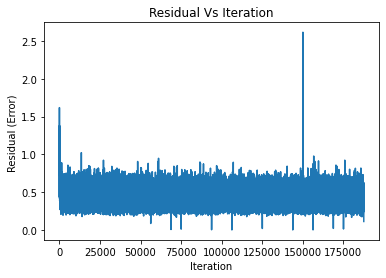

In [20]:
residual_plot(loss_list)

In [ ]:
iter(vowels).

In [ ]:
x=torch.tensor([1,0,0,0]).double()
y=torch.tensor([0,0,0,0]).double()

In [ ]:
loss =criterion(y,x)

In [29]:
noise=[1,2,3,4,5,6,7,8]
a_noisy=[9,10,11,12,13,14,15,16]

In [30]:
trainloader=torch.utils.data.DataLoader(tuple(zip(noise,a_noisy)),batch_size=4,shuffle=True)

In [31]:
for X,y in trainloader:
    print(X,y)

tensor([1, 7, 5, 2]) tensor([ 9, 15, 13, 10])
tensor([3, 8, 6, 4]) tensor([11, 16, 14, 12])
